In [13]:
#data loading
import pandas as pd

predata = pd.read_csv(r'C:/Users/BeatrizCarvalho/OneDrive - Closer Consultoria Lda/Documents/Entangled-Spaces/Datasets/2transfers_balanced_smore+rund.csv', low_memory = False) 

In [ ]:
#columns to consider for training
predata.columns

In [17]:
#visualize the whole output
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import sys
import numpy as np
np.set_printoptions(threshold = sys.maxsize)

In [ ]:
#-------------------------------------------------pre-processing--------------------------------------------------------------#

#begin of preprocessing
import time

start = time.time()

In [6]:
#convert amount and accountbalance to classes and assign a word to each interval  
import numpy as np 

#automatic labels
import string

class LabelCategorizer():
    def __init__(self, base_word = 'cat'):
        self.initial = 1
        self._alphabet_index = 0
        self.base_word = base_word
        self.current_word = self.base_word
        self.shift = 0

    def __str__(self):
        return 'Class: Label Categorizer\nBase word: ' + self.base_word + '\nCurrent Word: ' + self.current_word

    def get_next_word(self):
        if self.initial:
            self.initial = 0
            return self.current_word
               
        if self.shift > 0:
            self.current_word = self.current_word[-1] + self.current_word[:-1]
            self.shift -= 1
        else:
            self.current_word = self.current_word + string.ascii_lowercase[self._alphabet_index]
            self._alphabet_index = (self._alphabet_index + 1) % len(string.ascii_lowercase)
            self.shift = len(self.current_word) - 1

        return self.current_word

#replacement of the old columns with the new ones with classes 
def cutter(col, number, word, words_map):

    #make sure that only positives are assigned an interval
    col_min = max(predata[col].min(), 1)   
    col_max = max(predata[col].max(), 1)

    bins_a = np.geomspace(float(col_min), float(col_max), num = number)  
    bins_a[0] = bins_a[0]-1
    bins_aux = bins_a[1:]
    bins_aux = np.append(bins_aux, bins_a[-1]+1)
    bin_tuples = list(zip(bins_a, bins_aux))

    bins = pd.IntervalIndex.from_tuples(bin_tuples)
    
    #range of the intervals made
    print(bins)

    labels_a = []

    a = LabelCategorizer(base_word = word)

    for _ in range(number):
        labels_a.append(a.get_next_word())

    x = pd.cut(predata[col].to_list(), bins = bins)
    x.categories = labels_a
    predata[col] = x
   
    for i in range(number):
        words_map[labels_a[i]] = bins[i]       

#columns to apply the conversion        
columns = ['amount', 'accountbalance']  

#number of intervals for each column
number_bins = [40, 40]  

#base words assigned to each column on columns to apply the conversion
base_words = ['pink', 'red']

#get acess to the range of the interval based on the word that appears
values_map = {}

for i in range (len(columns)):
    cutter(columns[i], number_bins[i], base_words[i], values_map)

IntervalIndex([(0.0, 1.4129638602205492], (1.4129638602205492, 1.9964668702893555], (1.9964668702893555, 2.8209355358464863], (2.8209355358464863, 3.9858799641629745], (3.9858799641629745, 5.631904340539461] ... (179716.0592994492, 253932.296891375], (253932.296891375, 358797.15845030727], (358797.15845030727, 506967.41804011056], (506967.41804011056, 716326.64], (716326.64, 716327.64]], dtype='interval[float64, right]')
IntervalIndex([(0.0, 1.5754086471506301], (1.5754086471506301, 2.481912405516979], (2.481912405516979, 3.910026265121869], (3.910026265121869, 6.1598891886590765], (6.1598891886590765, 9.70434269330319] ... (8105183.876021702, 12768976.765030459], (12768976.765030459, 20116356.410894435], (20116356.410894435, 31691481.83888713], (31691481.83888713, 49927034.53], (49927034.53, 49927035.53]], dtype='interval[float64, right]')


In [7]:
#assign the word negaccount for negative values of accountbalance  
aux = predata['accountbalance'].values

vacc = []

for elm in aux:
    if str(elm) == 'nan':
        vacc.append('negaccount')
    else:
        vacc.append(elm)
        
    print(elm)
    
predata['accountbalance'] = vacc

nan
rbecdda
nan
nan
becddar
nan
nan
nan
rbecdda
ecddarb
daerbecd
erbecdda
rbecddae
cddarbe
aerbecdd
rbecddae
ecddarb
darbecd
becdar
daerbecd
rbecda
ddaerbec
erbecdda
rbecdda
becddar
rbecdda
nan
aerbecdd
nan
darbecd
ecdarb
becddar
ecdarb
nan
ddarbec
bedar
nan
ecddarb
nan
rbecddae
nan
ddarbec
erbecdda
arbecd
aerbecdd
nan
daerbecd
ecddaerb
cddarbe
nan
rbecda
darbe
ddaerbec
cddarbe
arbecdd
darbe
nan
arbecd
nan
darbecd
arbecdd
arbecd
darbec
nan
rbecddae
nan
nan
ecddarb
aerbecdd
cdarbe
rbecddae
ddarbec
nan
nan
ecdarb
erbecdda
cddaerbe
ddaerbec
darbecd
ecdarb
nan
nan
darbecd
cddarbe
nan
nan
nan
arbecdd
becdar
ddarbec
darbecd
arbecd
rbecdda
darbecd
ecddaerb
nan
arbecd
cdarbe
nan
aerbecdd
aerbecdd
rbecdda
ddarbec
arbecdd
aerbecdd
rbecda
nan
ecdarb
darbecd
nan
erbecdda
nan
becddar
ecdarb
aerbecdd
rbecdda
becddar
nan
cddarbe
erbecdda
aerbecdd
cddarbe
cdarbe
aerbecdd
rbecdda
becddar
arbecd
erbecdda
rbecda
becdar
becddar
cddaerbe
becddar
becddar
cddarbe
becddar
rbecddae
cddarbe
rbecddae
nan
arbecd


cdarbe
nan
arbecdd
ecddarb
arbecdd
becdar
rbecdda
ecddaerb
ddarbec
darbecd
nan
ecddarb
cddarbe
erbecdda
erbecdda
arbecd
aerbecdd
nan
ecddarb
rbecddae
rbecdda
darbec
becdar
ecddarb
rbecda
ddarbec
nan
ecddarb
rbecddae
rbecddae
nan
ecddarb
darbecd
ecddarb
nan
darbecd
nan
becddar
erbecdda
ecddarb
arbecdd
cddarbe
nan
ddarbec
becddar
nan
becddar
arbecd
ddaerbec
rbecddae
ecdarb
ecddarb
arbecd
ddarbec
darbe
arbecd
ddarbec
daerbecd
erbecdda
daerbecd
rbecdda
nan
daerfbecd
arbed
nan
erbecdda
becddar
cddaerbe
cddarbe
rbecdda
rbecda
arbecdd
nan
ddarbec
ecddarb
ddarbec
arbecdd
darbecd
darbec
becddaerf
becddar
rbeda
rbecda
nan
nan
darbecd
ecddarb
aerbecdd
cdarbe
rbecddae
ecdarb
arbecdd
nan
rbecddae
becddaerf
cdarbe
arbecdd
cdarbe
rbecdda
ddarbec
erbecdda
cddarbe
ecddarb
arbecdd
nan
becdar
daerbecd
nan
becdar
nan
cddarbe
arbecdd
arbecd
darbecd
arbecd
ecdarb
nan
nan
rbecda
rbecddae
becddar
rbecda
cddarbe
darbecd
rbecdda
ddarbec
nan
rbecddae
becdar
becdar
rbecdda
rbecdda
ecddarb
nan
ecddarb
nan
darbec
r

nan
darbecd
becdar
ddaerbec
cddarbe
becdar
ecddarb
arbed
becdar
ecddarb
ecddarb
rbecddae
cddaerbe
nan
rbecda
bedar
ddarbec
rbecda
darbecd
nan
nan
rbecda
cddarbe
becddar
daerbecd
arbecdd
rbecdda
becddar
aerbecdd
cddarbe
cddarbe
cddarbe
cddarbe
ecddarb
rbecdda
cddaerfbe
cddarbe
aerbecdd
nan
rbecddae
cddarbe
nan
rbecddae
rbecdda
darbec
arbecdd
aerbecdd
ddarbec
rbecda
cddarbe
ddaerbec
rbeda
cddarbe
arbecdd
ecddarb
edarb
rbecddae
nan
ddarbec
arbecd
becddar
aerbecdd
arbecdd
darbecd
ddarbec
ecddarb
darbecd
arbecdd
darbecd
ecddarb
ecddaerb
cdarbe
erbecdda
rbecdda
rbecda
becddaerf
erbecdda
becddaer
nan
cddaerbe
edarb
ddarbec
rbecdda
erbecdda
aerbecdd
cddarbe
arbecd
becddar
ddaerbec
nan
rbecddae
bedar
nan
rbecda
rbeda
cddarbe
erbecdda
darbecd
becddar
arbecdd
arbecdd
becddar
arbecdd
ecddarb
becdar
becddar
arbecdd
darbecd
rbecdda
arbecd
darbecd
ecddarb
arbecdd
darbec
nan
rbecdda
ddaerbec
ecddarb
becdar
becddaer
nan
rbecddae
nan
cddarbe
ddaerbec
becddar
rbecdda
nan
daerbecd
nan
ecddarb
nan
daerbecd

rbecddae
becdar
arbecd
aerbecdd
rbecdda
rbecdda
nan
rbecdda
cddarbe
nan
ddarbec
arbecd
ecdarb
nan
ecddarb
aerbecdd
ecddarb
daerbecd
nan
nan
nan
erbecdda
nan
aerbecdd
ecddarb
arbed
aerbecdd
nan
rbecddae
rbecddae
darbecd
arbecdd
becddar
darbecd
becddar
ddarbec
becddar
nan
erbecdda
rbecdda
becddar
cdarbe
nan
daerbecd
nan
nan
becdar
erbecdda
cddarbe
rbecdda
arbecdd
rbecddae
nan
ddarbec
nan
ddarbec
arbecd
becddar
ecddarb
erbecdda
becddar
darbecd
rbecda
nan
ecdarb
cddarbe
rfbecddae
ecdarb
cddarbe
nan
erbecdda
rbecdda
arbecdd
nan
nan
cddarbe
nan
nan
rbecddae
ddarbec
cdarbe
darbecd
ddarbec
nan
darbec
arbecd
nan
darbec
daerbecd
arbecdd
erbecdda
cddarbe
nan
becddar
darbec
ecddarb
arbecdd
rbecddae
nan
ddarbec
rbecdda
arbecdd
becddar
nan
bedar
nan
nan
ecddarb
cddarbe
becddar
erbecdda
arbecdd
daerbecd
becdar
cdarbe
rfbecddae
ecddaerb
ddarbec
arbecdd
nan
ddarbec
nan
darbecd
becddar
fbecddaer
nan
nan
ecddarb
nan
nan
becddar
ecddarb
ddarbec
nan
ecddaerb
erbecdda
erbecdda
aerbecdd
erbecdda
aerbecdd
aer

nan
daerbecd
daerbecd
cddarbe
rbecddae
arbecd
nan
ecddarb
erbecdda
daerbecd
daerbecd
darbecd
rbecda
arbecdd
nan
nan
arbecd
arbecd
becddar
rbecda
becddar
nan
cddarbe
arbecdd
rbecda
darbecd
erbecdda
arbecd
rbecda
erbecdda
cddaerbe
darbe
ecddarb
ddarbec
ddaerbec
cddarbe
darbecd
ddarbec
erbecdda
becddar
aerbecdd
aerbecdd
rbecdda
rbeda
ecddaerb
becdar
nan
nan
ecddaerb
arbecd
cddarbe
nan
rbecdda
nan
cddarbe
becddar
ecddaerb
arbecd
cddarbe
erbecdda
rbecdda
nan
rbecddae
daerbecd
erbecdda
arbecd
rbecddae
nan
becddar
cddarbe
arbecd
becdar
ddaerbec
becddar
nan
rbecddae
bedar
cdarbe
ddarbec
darbe
becddar
arbecd
nan
cdarbe
ddarbec
erbecdda
becddar
rbecda
nan
nan
rbecda
darbe
cddaerbe
cddarbe
darbecd
becdar
ecddarb
nan
darbe
arbed
nan
arbecd
darbecd
arbecdd
nan
becdar
rbecddae
daerbecd
becdar
nan
becddar
nan
daerbecd
darbecd
ddaerbec
becdar
nan
arbecd
cddarbe
nan
nan
rbecddae
ddarbec
ecddarb
cdarbe
ecddarb
cddaerbe
becddar
nan
rbecdda
rbecdda
arbed
rbecdda
nan
ddarbec
becdar
darbecd
erbecdda
becddar

erbecdda
daerbecd
arbecd
rbecdda
arbecdd
becddar
darbecd
ecddarb
becddar
darbecd
becdar
ddarbec
arbecd
ddarbec
ddarbec
rbecdda
rbecddae
ecddaerb
becddar
becddar
becddar
daerbecd
daerbecd
daerbecd
daerbecd
daerbecd
daerbecd
daerbecd
daerbecd
daerbecd
daerbecd
daerbecd
daerbecd
daerbecd
becddar
ddaerbec
erbecdda
erbecdda
erbecdda
ecddarb
ecddarb
cddaerbe
ddaerbec
rbecdda
ddarbec
ddarbec
ecddarb
ecddarb
arbecd
daerbecd
ecddarb
becddar
becddar
rbecddae
rbecddae
rbecddae
rbecddae
darbecd
erbecdda
erbecdda
erbecdda
daerbecd
rbecddae
rbecdda
erbecdda
cddarbe
cddarbe
arbecdd
ecddarb
cddarbe
cddarbe
cddarbe
darbecd
ecddarb
ecddarb
ecddarb
ecddarb
ecddarb
erbecdda
ecddarb
rbecdda
becddar
ecddarb
aerbecdd
erbecdda
erbecdda
erbecdda
erbecdda
erbecdda
aerbecdd
arbecdd
rbecdda
ddarbec
ddarbec
ddarbec
aerbecdd
rbecdda
darbecd
nan
becddar
daerbecd
nan
nan
nan
ddarbec
cddarbe
nan
daerbecd
arbecdd
ddarbec
ddarbec
darbecd
cdarbe
cdarbe
cdarbe
darbec
ecdarb
darbe
darbe
arbed
ecdarb
ecdarb
ecdarb
rbecda
cd

ecdarb
ddarbec
cddaerbe
rbecda
cddarbe
aerbecdd
darbecd
arbecd
becdar
darbec
darbecd
rbecdda
darbecd
darbec
darbec
cdarbe
cdarbe
aerbecdd
daerbecd
erbecdda
ecddarb
cddarbe
arbecd
rbecda
rbecddae
ddarbec
arbecdd
cdarbe
arbecd
aerbecdd
darbecd
rbecda
ecddarb
cddarbe
nan
becddar
cddarbe
ddaerbec
daerbecd
ddarbec
ecddarb
nan
cddarbe
ecddarb
rbecda
ecddarb
rbecddae
darbecd
ecddarb
rbecddae
becddar
arbecdd
erbecdda
arbecdd
erbecdda
rbecdda
nan
nan
rbecda
darbecd
rbecdda
cddarbe
ecdarb
becddar
arbecdd
ecdarb
rbecda
cdarbe
darbecd
becdar
cdarbe
ddarbec
darbecd
cddarbe
rbecdda
ddarbec
arbecdd
ddarbec
nan
becddar
daerbecd
nan
ecddarb
ecddarb
aerbecdd
becddar
darbe
nan
darbec
ecddarb
rbecdda
rbecdda
arbecd
arbecd
arbecd
cdarbe
cddarbe
becddar
ecddarb
ecddarb
darbe
rbecda
ddarbec
ddarbec
darbecd
rbecddae
rbecdda
daerbecd
nan
erbecdda
nan
darbe
daerbecd
ddaerbec
ecddarb
rbecdda
ecddarb
darbec
rbecdda
aerbecdd
arbecdd
ddarbec
rbecddae
becdar
ecdarb
becddar
nan
cdarbe
cdarbe
ddarbec
ddarbec
becdar
rb

ddarbec
arbecd
daerbecd
rbecda
becdar
rbecddae
ecdarb
nan
darbecd
darbe
becddar
daerbecd
ddarbec
becdar
ddarbec
cddarbe
daerbecd
darbec
daerbecd
becddar
erbecdda
darbe
nan
cddarbe
daerbecd
ecddarb
ddarbec
darbecd
rbecdda
ddaerbec
ecdarb
ddarbec
rbecdda
rbecda
darbec
cddarbe
daerbecd
darbec
rbecdda
daerbecd
becddar
darbecd
ddarbec
cddarbe
becddar
rbecddae
rbecddae
darbec
ecddarb
becddar
becddar
arbecd
becdar
erbecdda
rbecddae
ecdarb
cdarbe
darbec
cddarbe
ddaerbec
ddarbec
cddarbe
cddarbe
rbecddae
arbecdd
arbecdd
becddar
becdar
cddarbe
darbec
ecdarb
nan
nan
erbecdda
darbecd
arbecdd
ddarbec
rbecddae
arbecdd
ecddarb
rbecddae
nan
darbecd
arbecdd
ddarbec
ecddarb
darbecd
becddar
aerbecdd
arbecd
daerbecd
cdarbe
rbecda
ddarbec
ecddarb
nan
becddar
cddarbe
ddaerbec
darbecd
ddarbec
nan
rbecddae
nan
darbecd
ddaerbec
ddarbec
becddar
arbecdd
becddar
darbecd
ddarbec
darbecd
ddarbec
darbecd
rbecda
arbecdd
darbecd
darbecd
nan
ecdarb
nan
ddarbec
aerbecdd
darbecd
ecddarb
ddarbec
ddarbec
cddarbe
cddarbe
dda

darbecd
becddar
ecddarb
cddarbe
nan
darbecd
rbecdda
darbecd
arbecd
rbecdda
rbecdda
rbecda
ddarbec
cddarbe
darbec
daerbecd
nan
darbecd
darbecd
darbecd
ddarbec
arbecdd
darbe
rbecddae
arbecdd
cddarbe
cddarbe
ddaerbec
cdarbe
rbecddae
arbecdd
ecdarb
darbe
erbecdda
rbecda
ecddarb
ddarbec
becddar
becdar
becddar
rbecdda
daerbecd
ddaerbec
rbecda
ddarbec
cdarbe
arbecd
ddarbec
erbecdda
daerbecd
cddarbe
becddar
daerbecd
rbecdda
ddarbec
arbed
rbecda
ddarbec
darbecd
becdar
darbec
arbecd
rbecddae
cddaerbe
ddaerbec
darbecd
darbecd
rbecda
darbecd
cddarbe
arbecdd
rbecddae
ecdarb
ecddarb
darbecd
cdarbe
erbecdda
becddar
cddarbe
rbecdda
ddarbec
darbe
rbecdda
cdarbe
ddarbec
aerbecdd
cddarbe
ddarbec
ecddarb
cddarbe
ddarbec
arbecd
arbecdd
rbecdda
rbecddae
ddarbec
nan
nan
darbe
ddarbec
becdar
rbecddae
nan
cdarbe
arbecdd
ecddarb
arbecdd
arbecd
aerbecdd
cddarbe
arbecd
darbecd
daerbecd
becddar
rbecddae
arbecdd
ecddarb
darbec
nan
cddarbe
cddarbe
cdarbe
ecddarb
cddarbe
rbecda
daerbecd
arbecdd
ecddarb
cddarbe
darbec

In [8]:
#interval that a word corresponds to
#values_map['red']

Interval(0.0, 1.5754086471506301, closed='right')

In [4]:
#convert hours to classes and assign a word to each interval  
bins_hour = [0, 4, 8, 12, 16, 20, 24]

#labels assigned to each interval
labels_hour = ['dawn', 'earlymorning', 'morning', 'afternoon', 'dusk', 'night']

predata['hour'] = list(pd.cut(predata['hour'], bins = bins_hour, labels = labels_hour, retbins = True, include_lowest = True)[0])

In [5]:
#convert trusted_indicator to classes and assign a word to each interval  
bins_ti = [0.0, 0.5, 1.0]

#labels assigned to each interval
labels_ti = ['ntrusted', 'trusted']

predata['trusted_indicator'] = list(pd.cut(predata['trusted_indicator'], bins = bins_ti, labels = labels_ti, retbins = True, include_lowest = True)[0])

In [6]:
#add letter before number to distinguish between similar numbers from different columns
cols = ['entity', 'reference', 'iban_orig', 'iban_dest', 'ipaddress', 'clientid', 'week']

identifier = ['e', 'r', 'io', 'id', 'ip', 'c', 'w']  

for col in range(len(cols)):
    predata[cols[col]] = predata[cols[col]].apply(lambda x: identifier[col] + str(x))

In [7]:
#convert binary and chain of numbers to specific words bbbb
def apply_map(df, col, target_map):
    df[col] = df[col].apply(lambda x: target_map.get(str(x)))

cols_maps = [('is_fraud', {'0':'nfraud', '1':'fraud'}),
             ('weekday', {'0':'mon', '1':'tue', '2':'wed', '3':'thu', '4':'fri', '5':'sat', '6':'sun'}),
             ('month', {'1':'jan', '2':'feb', '3':'mar', '4':'apr', '5':'may', '6':'jun', '7':'jul', '8':'aug', '9':'sep', 
                       '10':'oct', '11':'nov', '12':'dec'})]           

for comb in cols_maps:
    apply_map(predata, comb[0], comb[1])

In [8]:
#make fraud column as the center column
new_order = ['canal', 'operativa', 'clientid', 'entity', 'reference', 'trusted_indicator', 'iban_orig', 'iban_dest', 'amount', 
             'is_fraud', 'accountbalance', 'ipaddress', 'browser_family', 'os_family', 'hour', 'week', 'weekday', 'month', 
             'device']

predata = predata[new_order]

In [9]:
#select data for train and test  
from sklearn.model_selection import train_test_split

#target column
y = predata['is_fraud']

#train and test
X_train, X_test, y_train, y_test = train_test_split(predata, y, stratify = y, test_size = 0.2)

In [10]:
#for entering the model
sentences = X_train.to_numpy()

sentences_aux = [list(curr) for curr in sentences]

sentences_series = pd.Series(sentences_aux)

In [11]:
#for the test metrics
X_test_np = X_test.copy()
del X_test_np['is_fraud']

sentences_np_test = X_test_np.to_numpy()

sentences_aux_np_test = [list(curr) for curr in sentences_np_test]

sentences_series_np_test = pd.Series(sentences_aux_np_test)

In [12]:
#for the training metrics
X_train_np = X_train.copy()
del X_train_np['is_fraud']

sentences_np_train = X_train_np.to_numpy()

sentences_aux_np_train = [list(curr) for curr in sentences_np_train]

sentences_series_np_train = pd.Series(sentences_aux_np_train)

In [13]:
#get size of the corpus 
token_count = sum([len(sentence) for sentence in sentences_series])

print("This corpus contains {} tokens".format(token_count))

This corpus contains 216201 tokens


In [ ]:
#end of preprocessing
stop = time.time()

print(f"Training time: {stop - start}s")

In [ ]:
#-----------------------------------------------------training----------------------------------------------------------------#

#begin of training
begin = time.time()

In [14]:
#callback to print loss after each epoch
import gensim.models.word2vec as w2v
from gensim.models.callbacks import CallbackAny2Vec

class callback(CallbackAny2Vec):
    
    def __init__(self):
        self.epoch = 0
        self.loss_to_be_subed = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        loss_now = loss - self.loss_to_be_subed
        self.loss_to_be_subed = loss
        print('Loss after epoch {}: {}'.format(self.epoch, loss_now))    
        
        self.epoch += 1

In [15]:
#inicialization and training word2vec - put equal to grid search
import multiprocessing

def training (sentences, cycles, dim, negative, exponent, alp, min_alp):
    model = w2v.Word2Vec (
        sg = 1, #skip-gram 
        workers = multiprocessing.cpu_count(), #use all cores 
        vector_size = dim, #dimension of the embedding space 
        window = 9, #words befores and after the center word
        sample = 0, #whithout subsampling 
        min_count = 1, #use every word
        negative = negative, #noise-words
        hs = 0, #negative sampling
        ns_exponent = exponent, #exponent to shape negative sampling 
        alpha = alp, #initial learning rate
        min_alpha = min_alp #final learning rate 
)
    
    #vocabulary creation
    model.build_vocab(sentences) 

    #model training
    model.train(sentences, epochs = cycles, total_examples = model.corpus_count, compute_loss = True, callbacks = [callback()])

    return model

#model creation
model = training(sentences_series, 5, 5, 5, 0, 0.025, 0.0001) 

Loss after epoch 0: 351180.25
Loss after epoch 1: 211145.5625
Loss after epoch 2: 197500.3125
Loss after epoch 3: 191741.375
Loss after epoch 4: 180962.125


In [16]:
#info about the trained model 
print(model)

Word2Vec(vocab=22484, vector_size=5, alpha=0.025)


In [ ]:
#words in the vocabulary
#model.wv.index_to_key

In [ ]:
#model's memory consuming members with their size in bytes
#model.estimate_memory()

In [18]:
#saving the model
model.save(r'C:/Users/BeatrizCarvalho/OneDrive - Closer Consultoria Lda/Documents/Entangled-Spaces/Datasets/3transfers_word2vec_matrix_originalcols.w2v')

In [ ]:
#end of training
end = time.time()

print(f"Training time: {end - begin}s")

In [ ]:
#grid-search
#save results
import sys
old_stdout = sys.stdout
log_file = open("results.log", "w")
sys.stdout = log_file

#create a dictionary for the hyperparameters that are going to vary
vector_size = [5, 50, 150, 300]  #[2, 5, 10, 50, 150, 300]
window = [2, 5, 9]  #[1 - 9]  
negative = [0, 5, 10, 20]  #[0, 5, 10, 15, 20]
ns_exponent =  #[-1, -0.75, 0, 0.75, 1] --- 1.0 samples exactly in proportion to the frequencies, 0.0 samples all words equally, while a negative value samples low-frequency words more than high-frequency words. The 0.75 was chosen by the original Word2Vec paper. In https://arxiv.org/abs/1804.04212, Caselles-Dupré, Lesaint, & Royo-Letelier suggest that other values may perform better for recommendation applications
alpha = [0.015, 0.025, 0.035]
min_alpha = [0.0001, 0.0006]
sample = [0, 0.001, 0.00001] 
epochs = [5, 10, 50, 100]
#can try sg = 0 /// hs = 1 (leads to negative = 0)

#train the model with the dictionary
for e in epochs:
    for a in alpha:
        curr_model = training(sentences_series, epoch = e, alpha = a)
        
        #metrics for each combination
        predict(curr_model, sentences_series_np_train, 0.5, verbose1 = False, verbose2 = False)

#save results 
sys.stdout = old_stdout
log_file.close()

In [ ]:
#option 1
python 3transfers_word2vec_matrix_originalcols_saving.py &> results.txt


#option 2
def fprint(output):
    print output
    with open("somefile.txt", "a") as f:
        f.write("{}\n".format(output))


#option 3
from contextlib import redirect_stdout

with open('results.log', 'w') as f:
    with redirect_stdout(f):
        print('generating')
        # the rest of your code or main function goes here

In [155]:
#------------------------------------------probability vector for a client----------------------------------------------------#

#weight matrices
m1 = model.wv.vectors 
m2 = model.syn1neg     #negative sampling
#m2 = model.syn1       #hierarchical-softmax 

In [156]:
#m2 shape
m2.shape

(22550, 5)

In [157]:
#update z - dictionary that saves the word and its position
def refresh_z(model, z, missingw):
    
    #looks for the missing word starting from the bottom
    for i in range(len(model.wv.index_to_key)-1, 0, -1):
          
        #assigns the new position of the missing word in the vocabulary
        if model.wv.index_to_key[i] == missingw:
            z[missingw] = i 
            
            #from the moment the word is found returns the new dictionary
            return z
        
    return z

In [158]:
#update probv - vector with the parameters of a transaction
from scipy.special import softmax 

def refresh_probv(model, cid):
    
    #obtain the representative vector of the clientid
    civ = model.wv.get_vector(cid)

    #multiplication of the clientid vector by the decode matrix (M2)  
    m2 = model.syn1neg
    #vector of len = vocab_size
    vout = np.dot(civ, m2.T)

    #apply softmax to the previous vector to obtain the conditional probabilities 
    probv = softmax(vout)
    
    return probv

In [159]:
#prediction method   
from scipy.special import softmax 


def predict(model, X, threshold, verbose1, verbose2):
    
    #save the predictions made by the model in a list
    predictions = []
    
    z = refresh_z(model)
    
    #for each transaction (eval_row)
    for eval_row in X:
        
        #print transaction parameters if verbose1 True
        if verbose1:
            print(eval_row)
        
        #cid is always in position 2 of the array
        curr_cid = eval_row[2]
        
        #if curr_cid is not known
        if curr_cid not in model.wv.index_to_key:
            #update model
            model.build_vocab([[curr_cid]], update = True)
            #update z
            z = refresh_z(model)
            
        else:      
            #for each sentence_series creates a current list
            curr = []                 

            #filter the parameters associated with the transaction made by the specific clientid (civ)
            for x in eval_row:
                if x != curr_cid:
                    if x in model.wv.index_to_key:
                        curr.append(z[x])

                    else:
                        #if the word is not known                        
                        #update model
                        model.build_vocab([[x]], update = True)

                        #update z
                        z = refresh_z(model)
                        curr.append(z[x])
                          
            #sum each value on the array to obtain the final probability
            probv = refresh_probv(model, curr_cid)  
            fprob = sum(probv[curr])
            
            #print results if verbose True
            if verbose2:
                print(f"Array content: {probv[curr]} \t Sum: {fprob} \n")

            #convert the values to binary and append to predictions
            if fprob > threshold:
                predictions.append(0)
            else:
                predictions.append(1)

    return predictions 

In [164]:
#apply the prediction method for the train set
predict(model, sentences_series_np_train, 0.5, verbose1 = True, verbose2 = True)

['nbe', 'trfsep', 'c9743488', 'e3', 'r3', 'ntrusted', 'io9743489', 'id4044492', 'ndkapbic', 'cddarbe', 'ip944613169', 'firefox', 'windows', 'morning', 'w6', 'tue', 'feb', 'pc']
Array content: [9.2753897e-13 2.7449109e-11 1.0766993e-04 9.8435372e-01 1.9449715e-03
 5.4723732e-27 5.8407978e-27 2.3707526e-25 6.8392708e-20 3.1508620e-27
 1.3658754e-20 4.7783378e-11 3.8418513e-16 1.8594750e-27 4.6379276e-22
 2.9298989e-27 1.9391105e-19] 	 Sum: 0.9864063626480303 

['nbe', 'trfsep', 'c796113', 'e3', 'r3', 'ntrusted', 'io796114', 'id969490', 'dkapbicn', 'aerbecdd', 'ip8313215786', 'chrome', 'windows', 'morning', 'w47', 'fri', 'nov', 'pc']
Array content: [4.3585678e-03 7.3609888e-03 7.0976883e-02 2.7309397e-01 1.1472991e-01
 8.8234319e-06 8.2248916e-06 5.8920374e-05 4.8015398e-05 9.3207436e-06
 7.9581244e-03 8.0251852e-03 1.4143244e-03 3.2708951e-05 5.4539592e-05
 4.2803353e-05 4.5914177e-04] 	 Sum: 0.48864045190566685 

['nbp', 'trfips', 'c3369933', 'e3', 'r3', 'ntrusted', 'io131609', 'id17811

Array content: [1.0185551e-11 6.5059302e-13 2.9640761e-03 9.0146935e-01 2.0061309e-02
 3.7915015e-18 1.5584774e-17 2.4337618e-16 2.7268383e-16 1.1206038e-17
 4.7570049e-07 4.2947769e-07 2.5569804e-16 3.7603478e-17 7.2166672e-14
 5.6726028e-17 2.8916693e-12] 	 Sum: 0.9244956396915873 

['nbe', 'trfsep', 'c1158155', 'e3', 'r3', 'ntrusted', 'io1158156', 'id7507971', 'pbicnka', 'erbecdda', 'ip1487112142', 'chrome', 'windows', 'dusk', 'w7', 'tue', 'feb', 'pc']
Array content: [4.1381954e-03 6.5728645e-03 5.2192327e-02 1.8017183e-01 7.9925112e-02
 1.3744302e-05 1.3760289e-05 6.6364330e-05 6.4005726e-05 1.5812822e-05
 8.6468412e-03 8.4250290e-03 1.1804423e-03 3.5767222e-05 2.6783266e-04
 5.7094843e-05 6.6102511e-04] 	 Sum: 0.3424480511530419 

['nbe', 'trfsep', 'c1603729', 'e3', 'r3', 'ntrusted', 'io1603730', 'id3873468', 'apbicnk', 'cddarbe', 'ip18882112165', 'chrome', 'windows', 'dusk', 'w47', 'mon', 'nov', 'pc']
Array content: [4.1559120e-03 7.0299054e-03 7.4002758e-02 3.1028908e-01 1.20313

Array content: [8.3662111e-05 7.1114628e-03 7.8727305e-02 3.0947018e-01 1.2394039e-01
 5.5980995e-06 5.8445767e-06 3.4066885e-05 3.8755887e-05 6.2234781e-06
 1.0686576e-03 9.8230981e-04 2.9367828e-05 3.1919331e-05 2.6851716e-05
 3.4450513e-05 2.6830368e-05] 	 Sum: 0.5216238759403495 

['mbp', 'trfint', 'c2119392', 'e3', 'r3', 'ntrusted', 'io79358', 'id79404', 'pink', 'negaccount', 'ip8719681136', 'other', 'android', 'dusk', 'w35', 'sat', 'aug', 'ttablet']
Array content: [2.6027649e-04 4.4190115e-03 5.1214546e-02 1.8163879e-01 8.2799800e-02
 1.3719551e-05 1.4346614e-05 3.2577671e-05 2.1064370e-03 1.3966017e-05
 1.3103641e-03 1.2224022e-03 1.1712448e-03 3.3954238e-05 4.8513793e-05
 4.0091250e-05 6.3599757e-05] 	 Sum: 0.3264036428563486 

['nbp', 'trfips', 'c10235205', 'e3', 'r3', 'ntrusted', 'io2489203', 'id10234505', 'kapbicnd', 'arbecdd', 'ip10424324298', 'chrome', 'windows', 'night', 'w52', 'mon', 'dec', 'pc']
Array content: [5.0485932e-16 1.0824452e-17 2.9009618e-04 9.6392733e-01 4.6

Array content: [3.7969672e-03 6.0331211e-03 4.1697096e-02 1.4239423e-01 1.9189134e-02
 1.4841164e-05 1.4432932e-05 9.3296061e-05 8.7250904e-05 1.7295766e-05
 7.2086732e-05 6.7218342e-03 1.0621463e-03 6.0804567e-05 6.9592548e-05
 7.1997485e-05 5.6284823e-04] 	 Sum: 0.221958975294001 

['nbp', 'trfint', 'c3235534', 'e3', 'r3', 'trusted', 'io1871237', 'id1871238', 'kapbicn', 'ddarbec', 'ip9595160191', 'edge', 'windows', 'morning', 'w5', 'sat', 'feb', 'pc']
Array content: [1.5671926e-18 1.1667812e-12 8.3327599e-05 9.7914433e-01 1.6035894e-07
 4.4111199e-27 2.7390520e-27 2.9099417e-25 2.0252121e-20 1.1660782e-27
 2.3627794e-26 4.2008771e-11 3.7351165e-16 2.9199130e-27 3.2510919e-27
 3.0600658e-27 1.6960323e-19] 	 Sum: 0.9792278227941896 

['nbp', 'trfsep', 'c4845315', 'e3', 'r3', 'ntrusted', 'io743750', 'id16241253', 'kapbicn', 'arbecdd', 'ip196119111182', 'chrome', 'windows', 'dusk', 'w17', 'wed', 'apr', 'pc']
Array content: [1.0451035e-17 6.6691319e-11 1.4272220e-04 9.7447538e-01 3.141215

Array content: [2.1970916e-05 7.1780500e-03 6.6085748e-02 2.5553057e-01 2.6449896e-02
 9.4625411e-06 9.9939871e-06 4.1493633e-05 4.1315964e-04 3.9443279e-05
 1.1431101e-03 5.7864486e-04 1.0185768e-03 2.2542577e-05 4.9224087e-05
 3.4658318e-05 3.9403501e-05] 	 Sum: 0.3586659449747458 

['nbp', 'trfips', 'c4854028', 'e3', 'r3', 'ntrusted', 'io4854029', 'id11612647', 'pbicnka', 'cddarbe', 'ip1682322070', 'chrome', 'windows', 'afternoon', 'w5', 'wed', 'jan', 'pc']
Array content: [8.4242737e-18 1.2130988e-19 1.2964405e-04 9.7991407e-01 2.5654093e-03
 2.6936478e-26 4.4025150e-26 8.8466688e-25 3.2175953e-19 8.9004181e-26
 1.2474226e-10 9.9686419e-11 3.9314132e-16 3.0440472e-26 3.8230477e-25
 6.7696345e-26 7.9107294e-19] 	 Sum: 0.9826091227357777 

['mbp', 'trfint', 'c2751718', 'e3', 'r3', 'ntrusted', 'io4699915', 'id2751720', 'pbinka', 'negaccount', 'ip85139455', 'safari', 'ios', 'afternoon', 'w16', 'fri', 'apr', 'tmobile']
Array content: [5.7554113e-05 3.3857042e-03 8.5856408e-02 4.3368292e-

Array content: [2.1091728e-04 4.5857378e-03 7.5423189e-02 2.9265085e-01 1.2341176e-01
 7.5151561e-06 6.7189881e-06 6.8391666e-05 3.4005911e-04 7.6747519e-06
 1.0939256e-03 9.9204795e-04 1.4310171e-03 3.1729342e-05 1.8403621e-04
 4.0160397e-05 2.9526947e-05] 	 Sum: 0.5005152551166248 

['mbp', 'trfsep', 'c2640544', 'e3', 'r3', 'ntrusted', 'io2640546', 'id11672502', 'cndkapbi', 'arbecdd', 'ip1682322070', 'other', 'android', 'dusk', 'w4', 'tue', 'jan', 'ttablet']
Array content: [1.1339868e-16 3.3627343e-09 5.6801544e-04 9.5377362e-01 7.7665499e-03
 5.6855000e-22 4.1451071e-22 6.5379604e-21 9.1300876e-21 1.6655311e-21
 1.4071537e-13 7.7279688e-14 5.2875059e-14 2.2305044e-21 8.1531959e-18
 1.3506212e-21 3.1137456e-22] 	 Sum: 0.9621081864912988 

['nbe', 'trfsep', 'c1206089', 'e3', 'r3', 'trusted', 'io1206090', 'id1536553', 'icndkapb', 'cddaerbe', 'ip881577693', 'ie', 'windows', 'morning', 'w17', 'fri', 'apr', 'pc']
Array content: [3.5874783e-03 6.3705719e-03 7.8915685e-02 3.9541319e-01 2.83

Array content: [2.98509234e-17 1.19976737e-10 1.55952846e-04 9.73539054e-01
 3.67682660e-03 1.73457891e-25 2.15843856e-25 2.05685037e-23
 2.21551684e-24 8.56807664e-25 2.48213089e-10 1.58213193e-10
 3.46144789e-24 5.20245435e-25 1.23634255e-24 7.86824017e-25
 2.55574904e-18] 	 Sum: 0.9773718343665554 

['mbe', 'trfint', 'c833383', 'e3', 'r3', 'trusted', 'io833384', 'id521472', 'kapbicnd', 'arbecdd', 'ipUNKNOWN', 'other', 'android', 'earlymorning', 'w7', 'sun', 'feb', 'ttablet']
Array content: [6.68146049e-06 3.86552094e-03 7.85381794e-02 3.73442918e-01
 2.85116453e-02 3.28026499e-06 2.92749201e-06 3.92557762e-04
 2.11475490e-05 1.57280283e-05 8.53431644e-04 7.81081209e-04
 1.38389623e-05 8.70176882e-06 1.36564095e-05 1.64259945e-05
 1.73499029e-05] 	 Sum: 0.4865050721159605 

['nbe', 'trfsep', 'c1071063', 'e3', 'r3', 'trusted', 'io280599', 'id695453', 'pbicnka', 'aerbecdd', 'ip622819014', 'ie', 'windows', 'morning', 'w16', 'wed', 'apr', 'pc']
Array content: [1.3856283e-04 3.9543898e-04

Array content: [5.7701305e-12 4.9514091e-19 1.7862220e-04 9.7708100e-01 3.0488241e-03
 9.5263065e-26 6.8670435e-25 6.5603320e-25 5.2191542e-24 3.6640161e-25
 2.6931868e-10 2.3244991e-10 3.3981260e-16 3.3887515e-25 2.9873145e-24
 3.2547062e-25 3.3600070e-18] 	 Sum: 0.9803084476571213 

['mbp', 'trfint', 'c3015198', 'e3', 'r3', 'ntrusted', 'io3015199', 'id4343211', 'apbicndke', 'negaccount', 'ip109482414', 'other', 'android', 'earlymorning', 'w11', 'sat', 'mar', 'ttablet']
Array content: [9.6770826e-05 2.9476110e-03 7.6789923e-02 4.4319117e-01 1.4707230e-01
 1.1922634e-06 1.4625467e-06 6.5654649e-06 9.9725090e-04 1.4537372e-06
 5.1764213e-04 4.6192607e-04 5.8414730e-06 5.6422805e-06 5.9156141e-06
 6.5838240e-06 6.7116680e-06] 	 Sum: 0.6721159638506151 

['mbp', 'trfint', 'c2075249', 'e3', 'r3', 'ntrusted', 'io688205', 'id2075250', 'inkapb', 'darbec', 'ip9592217131', 'other', 'android', 'dusk', 'w47', 'fri', 'nov', 'ttablet']
Array content: [9.8336001e-05 4.0343776e-03 8.2003705e-02 3.668

Array content: [4.1736322e-03 7.1043521e-03 7.2779126e-02 3.2022789e-01 1.2067992e-01
 5.6745935e-06 6.0237926e-06 3.6206442e-05 2.7339074e-05 7.0591154e-06
 2.6910563e-04 8.6094309e-03 1.4174726e-03 1.6842650e-05 1.7350409e-04
 2.2691751e-05 4.2773219e-04] 	 Sum: 0.535984007229672 

['nbp', 'trfint', 'c3235534', 'e3', 'r3', 'trusted', 'io1871237', 'id1871238', 'kapbicn', 'ddarbec', 'ip9595160191', 'edge', 'windows', 'morning', 'w5', 'sat', 'feb', 'pc']
Array content: [1.5671926e-18 1.1667812e-12 8.3327599e-05 9.7914433e-01 1.6035894e-07
 4.4111199e-27 2.7390520e-27 2.9099417e-25 2.0252121e-20 1.1660782e-27
 2.3627794e-26 4.2008771e-11 3.7351165e-16 2.9199130e-27 3.2510919e-27
 3.0600658e-27 1.6960323e-19] 	 Sum: 0.9792278227941896 

['nbe', 'trfsep', 'c1310594', 'e3', 'r3', 'ntrusted', 'io761250', 'id4583536', 'cnkapbi', 'darbecd', 'ip10951143239', 'chrome', 'windows', 'dusk', 'w14', 'mon', 'mar', 'pc']
Array content: [2.6930321e-03 5.0582625e-03 8.0323257e-02 4.4573694e-01 1.4345343e

Array content: [4.2027156e-03 7.0127905e-03 7.2910495e-02 2.8484726e-01 1.1427336e-01
 6.7822202e-06 6.4369920e-06 3.0824129e-05 4.0345043e-05 7.4717354e-06
 1.0391875e-02 1.0346688e-02 1.1232005e-03 2.2903447e-05 2.2811076e-04
 3.2950276e-05 6.1785663e-04] 	 Sum: 0.5061020678544992 

['nbe', 'trfsep', 'c2406696', 'e3', 'r3', 'ntrusted', 'io2406698', 'id1296283', 'pbicnka', 'ecddarb', 'ip1888315438', 'chrome', 'windows', 'morning', 'w4', 'tue', 'jan', 'pc']
Array content: [3.9951885e-03 6.9979923e-03 8.0205910e-02 3.4651417e-01 1.3597488e-01
 4.5145002e-06 5.5247124e-06 4.1814805e-05 2.7678849e-04 4.9083060e-06
 7.8743184e-03 7.5320075e-03 1.1783979e-03 2.6627387e-05 1.2787778e-04
 2.2861155e-05 3.5248368e-04] 	 Sum: 0.5911362647880196 

['mbp', 'trfint', 'c1878055', 'e3', 'r3', 'ntrusted', 'io1037448', 'id2647818', 'binkap', 'negaccount', 'ip89152170147', 'other', 'android', 'dawn', 'w9', 'thu', 'feb', 'ttablet']
Array content: [9.9257843e-05 4.2946856e-03 8.1555024e-02 3.3716494e-01 

Array content: [2.6081662e-10 2.5998837e-16 5.8576011e-04 9.5640409e-01 7.0193843e-03
 7.5241381e-22 8.0659425e-22 3.3038886e-20 1.3992159e-20 1.3769130e-21
 6.7937265e-09 6.1003780e-09 6.0741375e-13 2.0540611e-21 1.5222243e-17
 1.9352955e-21 1.2479430e-15] 	 Sum: 0.9640092474880095 

['nbp', 'trfsep', 'c4978018', 'e3', 'r3', 'ntrusted', 'io4978019', 'id14614926', 'bicndkap', 'becddar', 'ip14869167140', 'edge', 'windows', 'dusk', 'w13', 'tue', 'mar', 'pc']
Array content: [5.3691043e-04 7.1006571e-03 7.4691787e-02 3.3613855e-01 1.2512851e-01
 5.3770464e-06 1.0705349e-05 4.5141624e-05 3.1346644e-05 7.8549328e-06
 3.0886305e-05 8.0484357e-03 8.2145608e-04 2.2071805e-05 1.5438884e-04
 2.5468655e-05 3.7428486e-04] 	 Sum: 0.5531738267845867 

['nbe', 'trfsep', 'c1508857', 'e3', 'r3', 'ntrusted', 'io1508858', 'id3503911', 'cndkapbi', 'aerbecdd', 'ip622821682', 'chrome', 'windows', 'morning', 'w9', 'thu', 'feb', 'pc']
Array content: [2.05113422e-12 5.76469913e-11 1.40341828e-04 9.80235636e-01


Array content: [1.4472542e-13 5.7104518e-15 1.0633523e-03 9.3436307e-01 1.0809020e-02
 1.6539447e-21 1.0314102e-20 4.7316117e-19 6.2967553e-15 9.8295165e-21
 4.2852911e-08 3.3468481e-08 2.9078415e-12 2.5543038e-20 3.8600083e-16
 3.0078363e-19 2.9967860e-14] 	 Sum: 0.9462355159481929 

['nbp', 'trfint', 'c2064766', 'e3', 'r3', 'ntrusted', 'io2064767', 'id1594361', 'pbicnka', 'rbecda', 'ip21712912715', 'chrome', 'windows', 'morning', 'w35', 'sat', 'aug', 'pc']
Array content: [7.0537458e-04 4.7910153e-03 5.9382103e-02 2.3618181e-01 9.7630180e-02
 1.0017671e-05 9.8979690e-06 5.6438708e-05 5.1726161e-05 1.0118691e-05
 8.3727613e-03 7.8433575e-03 1.5358145e-03 2.5391824e-05 3.8198759e-05
 3.1139654e-05 4.9605878e-04] 	 Sum: 0.4171714057029021 

['nbe', 'trfips', 'c15215992', 'e3', 'r3', 'ntrusted', 'io15215993', 'id16370815', 'cndkapbi', 'darbecd', 'ip959336172', 'chrome', 'windows', 'morning', 'w17', 'tue', 'apr', 'pc']
Array content: [2.5882519e-12 1.2266963e-19 1.2425537e-04 9.7821474e-01

Array content: [4.4087386e-03 7.3945504e-03 7.1393579e-02 2.9401430e-01 2.7732302e-02
 6.6807916e-06 7.0991432e-06 5.2594871e-05 4.6183533e-05 8.2368942e-06
 8.1146052e-03 7.4706101e-03 1.0807418e-03 2.8164601e-05 3.7130256e-05
 2.4935993e-05 4.0291427e-04] 	 Sum: 0.42222337197699744 

['nbp', 'trfips', 'c10235205', 'e3', 'r3', 'trusted', 'io2489203', 'id10234505', 'dkapbicn', 'arbecd', 'ip10424324298', 'chrome', 'windows', 'night', 'w52', 'mon', 'dec', 'pc']
Array content: [5.0485932e-16 1.0824452e-17 2.9009618e-04 9.6392733e-01 1.3953402e-06
 6.5082149e-24 1.4803865e-23 1.2052002e-22 1.4464306e-22 1.3284534e-23
 1.6478146e-09 1.1127747e-09 1.1160066e-22 1.1602590e-23 3.6034260e-19
 1.4995405e-23 6.8344044e-17] 	 Sum: 0.9642188228718175 

['nbe', 'trfsep', 'c268509', 'e3', 'r3', 'ntrusted', 'io1243054', 'id3831809', 'ndkapbic', 'becddar', 'ip94613168', 'edge', 'windows', 'morning', 'w38', 'tue', 'sep', 'pc']
Array content: [4.19253344e-03 6.61106175e-03 4.99962084e-02 1.82985738e-01
 

Array content: [3.9589461e-03 6.9133276e-03 8.4418342e-02 3.4858602e-01 1.3275450e-01
 3.4268994e-06 4.8929905e-06 3.9570569e-04 3.5203335e-05 5.4167699e-06
 3.0855128e-05 8.9999093e-03 1.2970880e-03 2.6064075e-05 5.7540172e-05
 3.3620167e-05 4.1157223e-04] 	 Sum: 0.5879324374757289 

['mbp', 'trfsep', 'c2376644', 'e3', 'r3', 'trusted', 'io2376646', 'id2519712', 'cnkapbi', 'negaccount', 'ip775412922', 'other', 'android', 'night', 'w7', 'mon', 'feb', 'ttablet']
Array content: [5.2264147e-04 7.1678711e-03 6.0243275e-02 2.4016438e-01 2.5495304e-02
 9.6152398e-06 9.8916471e-06 7.1626360e-05 2.0101410e-03 1.0521161e-05
 1.1882735e-03 1.0732214e-03 6.1080864e-05 2.5210567e-05 2.0705821e-04
 3.6369787e-05 3.6515303e-05] 	 Sum: 0.3383330007927725 

['mbp', 'trfint', 'c2571672', 'e3', 'r3', 'ntrusted', 'io1224577', 'id2571673', 'kapbicn', 'negaccount', 'ip811935040', 'safari', 'ios', 'morning', 'w14', 'sat', 'apr', 'ttablet']
Array content: [6.1320803e-05 3.4081708e-03 7.9910740e-02 3.9848861e-

Array content: [3.1200238e-03 3.3234851e-03 8.5098214e-02 4.0851584e-01 2.7833171e-02
 1.9104480e-06 2.2659085e-06 2.0992604e-05 1.7276817e-04 2.2450399e-06
 1.6966769e-05 7.7092196e-03 6.0282898e-04 1.1907209e-05 9.9675693e-05
 1.5911999e-05 2.7603537e-04] 	 Sum: 0.5368234630759616 

['nbp', 'trfips', 'c12021037', 'e3', 'r3', 'ntrusted', 'io6906326', 'id12021039', 'ndkapbic', 'darbecd', 'ip77111246137', 'chrome', 'windows', 'dusk', 'w5', 'tue', 'jan', 'pc']
Array content: [1.7439678e-13 7.2873870e-15 1.2029659e-03 9.3920881e-01 1.1106920e-02
 1.4896224e-20 3.6807663e-20 1.6737882e-18 3.9375089e-15 5.7943039e-20
 4.1895770e-08 3.5889183e-08 1.1461510e-12 8.9967420e-20 4.7184426e-16
 1.8295440e-19 3.3252924e-14] 	 Sum: 0.9515187696296946 

['nbe', 'trfips', 'c788502', 'e3', 'r3', 'ntrusted', 'io788504', 'id202539', 'ndkapbic', 'daerbecd', 'ip622810518', 'firefox', 'windows', 'morning', 'w37', 'tue', 'sep', 'pc']
Array content: [5.6522885e-13 8.8604324e-21 8.2568826e-05 9.8331040e-01 1.3

Array content: [2.0261028e-18 1.2737872e-12 6.4127315e-05 9.6999890e-01 1.6083986e-07
 2.7065731e-27 5.1235514e-27 8.1819790e-27 1.5153460e-26 3.6610065e-28
 6.3657497e-17 5.8080714e-19 1.2234736e-16 1.1787528e-27 1.9174861e-25
 8.7034269e-27 1.3328726e-26] 	 Sum: 0.970063184277658 

['nbe', 'trfsep', 'c1508857', 'e3', 'r3', 'ntrusted', 'io1508858', 'id3503911', 'apbicnk', 'erbecdda', 'ip622821682', 'chrome', 'windows', 'morning', 'w9', 'thu', 'feb', 'pc']
Array content: [2.05113422e-12 5.76469913e-11 1.40341828e-04 9.80235636e-01
 2.70422222e-03 1.50447715e-26 1.95247172e-26 1.87559089e-18
 5.47981538e-25 1.29762827e-26 1.09871535e-10 9.89457474e-11
 1.19073647e-15 2.34993436e-26 1.92643896e-24 3.02055395e-26
 7.44310298e-19] 	 Sum: 0.9830802005519556 

['nbe', 'trfips', 'c788502', 'e3', 'r3', 'ntrusted', 'io788504', 'id202539', 'apbicndk', 'daerbecd', 'ip622810518', 'chrome', 'windows', 'morning', 'w37', 'tue', 'sep', 'pc']
Array content: [5.6522885e-13 8.8604324e-21 8.2568826e-05 9.

Array content: [3.9597454e-13 1.7404147e-14 1.3142325e-03 9.2610562e-01 1.2204523e-02
 3.8647300e-20 2.8581990e-19 1.5988650e-18 3.9034128e-14 6.0348792e-19
 8.1103522e-08 6.2762737e-08 7.4702518e-12 2.0408714e-19 2.1263366e-18
 6.5954062e-19 9.1933609e-14] 	 Sum: 0.9396245180245725 

['nbp', 'trfips', 'c7190618', 'e3', 'r3', 'ntrusted', 'io7136527', 'id15781383', 'nkapbi', 'negaccount', 'ip95948495', 'chrome', 'android', 'morning', 'w17', 'fri', 'apr', 'tmobile']
Array content: [6.8733544e-19 6.3855831e-21 6.1778235e-05 9.7516704e-01 2.1343494e-03
 1.0764813e-27 1.3114070e-27 8.7913525e-27 1.4912068e-15 1.0088255e-27
 4.7338876e-11 1.8897255e-17 2.1490658e-16 5.1357422e-27 1.1110980e-26
 6.5760100e-27 2.2536242e-27] 	 Sum: 0.9773631637690883 

['nbp', 'trfsep', 'c12855138', 'e3', 'r3', 'ntrusted', 'io2310271', 'id16241253', 'kapbicnd', 'aerbecdd', 'ip196119111182', 'chrome', 'windows', 'night', 'w17', 'wed', 'apr', 'pc']
Array content: [1.1587377e-15 1.1837429e-09 4.2657770e-04 9.5973

Array content: [2.6295106e-03 2.8916206e-03 8.0352984e-02 4.3665355e-01 1.4854448e-01
 1.2270355e-06 1.2713916e-06 1.0969708e-05 9.9740109e-06 1.2890482e-06
 6.7734723e-03 6.1993897e-03 4.4928319e-04 5.3205581e-06 5.7968573e-05
 1.0036165e-05 1.9850423e-04] 	 Sum: 0.6847908513688026 

['nbe', 'trfsep', 'c2271819', 'e3', 'r3', 'trusted', 'io2271820', 'id2273542', 'dkapbicn', 'rbecdda', 'ip946119437', 'edge', 'windows', 'dusk', 'w44', 'sat', 'nov', 'pc']
Array content: [2.74543115e-03 5.16363140e-03 8.00500959e-02 4.33725953e-01
 2.64480170e-02 1.48567756e-06 1.28774332e-06 1.09230750e-05
 1.23175287e-05 1.49527796e-06 1.08000295e-05 6.72690058e-03
 4.84024436e-04 6.39661494e-06 9.07114918e-06 8.93499418e-06
 2.08064565e-04] 	 Sum: 0.5556148302280235 

['mbp', 'trfsep', 'c2062879', 'e3', 'r3', 'trusted', 'io236664', 'id564862', 'apbicnk', 'negaccount', 'ip85241153141', 'other', 'android', 'dusk', 'w6', 'mon', 'feb', 'ttablet']
Array content: [1.19262055e-04 6.03173161e-03 7.90253356e-02 

Array content: [4.9735267e-05 4.9057114e-03 8.1848688e-02 4.5314679e-01 1.4656404e-01
 1.0120760e-06 1.1657547e-06 7.0826632e-06 9.4574218e-04 1.0320118e-06
 4.7270019e-04 1.8838038e-04 1.0255498e-05 6.1525620e-06 5.5849605e-06
 6.3774828e-06 6.3686762e-06] 	 Sum: 0.6881668116304809 

['nbe', 'trfsep', 'c1255182', 'e3', 'r3', 'ntrusted', 'io1255184', 'id5593886', 'icndkapb', 'rbecdda', 'ip18514244109', 'chrome', 'windows', 'dusk', 'w45', 'thu', 'nov', 'pc']
Array content: [2.8762133e-03 5.2993582e-03 7.9408661e-02 4.1120386e-01 1.4491482e-01
 1.6017547e-06 1.5344060e-06 1.1667453e-05 1.3114830e-05 2.1625060e-06
 7.9772994e-03 7.4235839e-03 5.7422975e-04 6.2845997e-06 2.3176652e-05
 8.3900732e-06 2.7256849e-04] 	 Sum: 0.6600185277976607 

['mbp', 'trfint', 'c2762743', 'e3', 'r3', 'ntrusted', 'io636114', 'id1810576', 'kapbicn', 'becdar', 'ip9593143192', 'other', 'android', 'earlymorning', 'w44', 'thu', 'oct', 'ttablet']
Array content: [5.1352414e-05 3.1617188e-03 8.4284566e-02 4.3791130e

Array content: [8.9348928e-04 1.9776626e-03 6.7158371e-02 5.4576439e-01 1.3811131e-01
 5.6967213e-08 5.3984362e-08 9.0829604e-07 6.3814826e-07 8.3166313e-08
 2.5709053e-03 2.4258946e-03 8.8112603e-05 3.5652283e-07 8.5842106e-07
 4.7771903e-07 3.0123761e-05] 	 Sum: 0.7590236873738263 

['mbp', 'trfint', 'c2414803', 'e3', 'r3', 'trusted', 'io600986', 'id220155', 'cnkapbi', 'cddarbe', 'ip14990174218', 'other', 'android', 'morning', 'w49', 'wed', 'dec', 'ttablet']
Array content: [2.2808161e-04 4.3606218e-03 7.6036416e-02 3.5808626e-01 2.8628765e-02
 5.1456118e-06 4.2991883e-06 3.0555071e-05 2.8545980e-04 5.1414913e-06
 9.1039872e-04 8.0484926e-04 1.1674204e-03 9.8996497e-06 2.4641837e-05
 1.6973161e-05 1.6259728e-05] 	 Sum: 0.470621186183962 

['mbp', 'trfsep', 'c1791598', 'e3', 'r3', 'trusted', 'io1703313', 'id5441944', 'cnkapbi', 'negaccount', 'ip21712922423', 'other', 'android', 'afternoon', 'w17', 'wed', 'apr', 'ttablet']
Array content: [2.0096905e-04 7.0605571e-03 7.4990414e-02 3.2149

Array content: [3.5770927e-03 6.2897056e-03 8.5946523e-02 3.8440871e-01 2.8893162e-02
 2.9900496e-06 3.0284880e-06 2.5726049e-05 1.1165432e-05 4.2789698e-06
 1.8017317e-05 8.8553987e-03 1.1744942e-03 9.4679299e-06 3.8892846e-05
 1.7818520e-05 3.6614703e-04] 	 Sum: 0.5196426204311138 

['nbp', 'trfips', 'c7190618', 'e3', 'r3', 'ntrusted', 'io7136527', 'id15781383', 'pbicnka', 'ecdarb', 'ip95948716', 'chrome', 'android', 'night', 'w16', 'fri', 'apr', 'tmobile']
Array content: [6.8733544e-19 6.3855831e-21 6.1778235e-05 9.7516704e-01 2.1343494e-03
 1.0764813e-27 1.3114070e-27 1.6117858e-26 3.4595156e-27 2.1202257e-29
 4.7338876e-11 1.8897255e-17 1.4609065e-26 1.0261126e-27 1.1110980e-26
 6.5760100e-27 2.2536242e-27] 	 Sum: 0.9773631637690866 

['nbe', 'trfint', 'c784726', 'e3', 'r3', 'trusted', 'io784727', 'id784728', 'bicndkap', 'daerbecd', 'ip28119663', 'firefox', 'windows', 'afternoon', 'w52', 'mon', 'dec', 'pc']
Array content: [4.2463676e-03 4.4780783e-03 7.1550414e-02 2.8715035e-01 2.

Array content: [9.2753897e-13 2.7449109e-11 1.0766993e-04 9.8435372e-01 1.9449715e-03
 5.4723732e-27 5.8407978e-27 8.7933025e-26 9.9676023e-21 3.1508620e-27
 1.3658754e-20 4.7783378e-11 3.8418513e-16 1.8594750e-27 4.6379276e-22
 2.9298989e-27 1.9391105e-19] 	 Sum: 0.9864063626480303 

['nbp', 'trfips', 'c16673812', 'e3', 'r3', 'ntrusted', 'io16673814', 'id16588683', 'bicndkap', 'becddar', 'ip196842219', 'chrome', 'windows', 'morning', 'w18', 'mon', 'apr', 'pc']
Array content: [5.42184301e-18 7.32639103e-20 1.20367673e-04 9.78905320e-01
 2.39589950e-03 1.07240363e-26 5.07513694e-26 9.45311448e-25
 1.80149009e-25 1.45499431e-26 1.25802188e-10 9.23226148e-11
 1.10558668e-15 4.64406174e-26 1.66952583e-21 1.00037263e-25
 6.76870315e-19] 	 Sum: 0.9814215875592999 

['nbe', 'trfsep', 'c1079872', 'e3', 'r3', 'ntrusted', 'io1079874', 'id40434', 'bicnkap', 'rbecdda', 'ip7829145112', 'firefox', 'windows', 'morning', 'w49', 'wed', 'dec', 'pc']
Array content: [3.4566538e-03 6.1849398e-03 7.7684358e

Array content: [2.0081425e-04 4.5730751e-03 7.0705160e-02 2.9490593e-01 1.2049132e-01
 6.9935481e-06 6.3800744e-06 1.6228420e-05 1.9346571e-03 7.6719716e-06
 1.1171493e-03 1.0445530e-03 1.5162196e-03 2.6387059e-05 5.3296968e-05
 3.3062210e-05 3.5270241e-05] 	 Sum: 0.4966741684415865 

['nbe', 'trfint', 'c829259', 'e3', 'r3', 'trusted', 'io829260', 'id8318', 'icnkapb', 'rbecdda', 'ip83240184114', 'chrome', 'windows', 'morning', 'w40', 'wed', 'oct', 'pc']
Array content: [4.4302398e-04 4.8588272e-04 5.5871397e-02 5.8028871e-01 1.0783023e-02
 1.3276884e-08 8.6221643e-09 2.1958724e-07 1.9275362e-07 1.3495691e-08
 1.6116202e-03 1.4844958e-03 7.2820047e-05 5.9131885e-08 2.0131000e-07
 8.7718071e-08 1.1437944e-05] 	 Sum: 0.6510532052565496 

['nbe', 'trfsep', 'c9743488', 'e3', 'r3', 'ntrusted', 'io9743489', 'id4044492', 'ndkapbic', 'cddarbe', 'ip944613169', 'firefox', 'windows', 'morning', 'w6', 'tue', 'feb', 'pc']
Array content: [9.2753897e-13 2.7449109e-11 1.0766993e-04 9.8435372e-01 1.94497

Array content: [3.0888310e-05 1.0703497e-04 2.5634199e-02 7.1062124e-01 7.9226062e-02
 9.2453501e-12 8.6948660e-12 8.7091317e-10 5.5134269e-10 1.9552183e-11
 3.6138631e-10 1.6696884e-04 8.9317609e-07 3.2815536e-10 2.0499378e-08
 3.6411929e-10 1.6569150e-07] 	 Sum: 0.8157874728313452 

['nbe', 'trfsep', 'c1089891', 'e3', 'r3', 'trusted', 'io1089893', 'id3139889', 'apbicnk', 'erbecdda', 'ip1499018475', 'chrome', 'windows', 'morning', 'w3', 'fri', 'jan', 'pc']
Array content: [2.2579478e-03 4.3639373e-03 7.9386175e-02 4.6825096e-01 2.4290882e-02
 5.9973701e-07 8.2364107e-07 1.4822459e-04 6.6670054e-06 7.5358219e-07
 5.5803475e-03 5.6272694e-03 5.9502048e-04 3.5034852e-06 9.0254662e-06
 6.2271411e-06 1.4112618e-04] 	 Sum: 0.5906694901431138 

['nbe', 'trfsep', 'c1534979', 'e3', 'r3', 'trusted', 'io1534980', 'id1781832', 'bicnkap', 'becddar', 'ip16123079199', 'chrome', 'windows', 'earlymorning', 'w15', 'wed', 'apr', 'pc']
Array content: [4.1159578e-03 7.1137622e-03 7.7839345e-02 3.2010025e-0

Array content: [2.5882519e-12 6.6131191e-11 1.2425537e-04 9.7821474e-01 2.1486210e-03
 5.8373260e-26 6.2410016e-26 4.6669558e-25 6.1068282e-20 7.8551003e-26
 1.7725663e-10 1.5043058e-10 1.3108592e-16 1.9779309e-25 4.6684967e-21
 3.0278466e-25 1.2078307e-18] 	 Sum: 0.980487617536577 

['nbe', 'trfips', 'c1284883', 'e3', 'r3', 'ntrusted', 'io1284884', 'id14378556', 'bicndkap', 'ecddarb', 'ip8524220641', 'chrome', 'windows', 'morning', 'w18', 'thu', 'apr', 'pc']
Array content: [1.17971995e-12 3.49694449e-20 1.06493906e-04 9.80359018e-01
 2.06295331e-03 5.19862033e-27 2.17983530e-26 4.76425247e-25
 7.96471468e-20 1.49234225e-26 8.95770957e-11 7.68221667e-11
 7.23453487e-16 2.75322686e-26 9.19462449e-25 5.79448533e-26
 3.92587725e-19] 	 Sum: 0.9825284652326954 

['mbp', 'trfint', 'c1812360', 'e3', 'r3', 'ntrusted', 'io2316072', 'id1812362', 'binkap', 'negaccount', 'ip8710359215', 'safari', 'ios', 'afternoon', 'w4', 'mon', 'jan', 'tmobile']
Array content: [1.1857378e-04 4.5125894e-03 7.13107

Array content: [1.1539214e-03 2.5509420e-05 6.9755711e-02 5.2114809e-01 1.7506698e-02
 1.0418825e-07 1.1255578e-07 2.5307754e-06 2.7296272e-05 1.2710188e-07
 1.1843488e-06 3.0559620e-03 2.4066017e-04 9.6691485e-07 1.7409830e-06
 1.1625484e-06 4.7595782e-05] 	 Sum: 0.6129693688576126 

['nbe', 'trfsep', 'c1086097', 'e3', 'r3', 'ntrusted', 'io1086099', 'id992755', 'pbicnka', 'cddaerbe', 'ip16123097111', 'chrome', 'windows', 'dusk', 'w12', 'tue', 'mar', 'pc']
Array content: [4.3696095e-03 7.3620910e-03 7.1266167e-02 2.8910679e-01 1.1343816e-01
 7.7505556e-06 8.0464470e-06 5.0756025e-05 2.5430891e-05 8.6753616e-06
 8.2008038e-03 8.4793530e-03 9.4588875e-04 3.1125404e-05 1.9451133e-04
 3.7629143e-05 4.4728967e-04] 	 Sum: 0.503980073242019 

['nbp', 'trfint', 'c137450', 'e3', 'r3', 'ntrusted', 'io561739', 'id398060', 'icndkapb', 'darbecd', 'ip849011436', 'chrome', 'windows', 'afternoon', 'w34', 'fri', 'aug', 'pc']
Array content: [5.5813683e-09 2.6647722e-06 1.0990238e-02 7.9773498e-01 4.7611

Array content: [4.1409926e-03 7.0906184e-03 7.3112354e-02 3.0769593e-01 2.8265078e-02
 6.0993984e-06 7.2725556e-06 4.0407576e-05 4.1781677e-05 7.2658036e-06
 8.8423062e-03 8.3888220e-03 1.1532266e-03 2.3404296e-05 1.6831965e-04
 2.8784729e-05 4.5188467e-04] 	 Sum: 0.4394645426787065 

['nbe', 'trfsep', 'c1762313', 'e3', 'r3', 'ntrusted', 'io1762314', 'id431223', 'cndkapbi', 'becddar', 'ip791687994', 'chrome', 'windows', 'afternoon', 'w41', 'thu', 'oct', 'pc']
Array content: [4.1889064e-03 7.1379961e-03 7.5464562e-02 3.2977256e-01 1.2473903e-01
 5.2386349e-06 6.0264529e-06 3.3824799e-05 3.1500920e-05 5.8931078e-06
 8.5772602e-03 7.8855641e-03 1.0462104e-03 1.3203945e-05 4.2870637e-05
 1.9462945e-05 3.8881885e-04] 	 Sum: 0.5593589294408048 

['nbe', 'trfips', 'c31516', 'e3', 'r3', 'ntrusted', 'io1200838', 'id17106261', 'bicndkap', 'rbecddae', 'ip144643581', 'edge', 'windows', 'morning', 'w19', 'mon', 'may', 'pc']
Array content: [3.0775790e-12 1.7799099e-19 1.5155537e-04 9.8114842e-01 2.8

Array content: [8.29152341e-05 3.96321481e-03 8.36197287e-02 3.58635813e-01
 1.38978720e-01 3.32441505e-06 3.93328583e-06 1.87014502e-05
 1.23540685e-05 4.83249050e-06 8.96662998e-04 4.00059071e-04
 3.42220483e-05 2.04820753e-05 2.28960216e-05 2.41207817e-05
 2.28491663e-05] 	 Sum: 0.5867448293101916 

['nbp', 'trfint', 'c3164533', 'e3', 'r3', 'trusted', 'io97212', 'id97213', 'pbinka', 'arbed', 'ip4650536', 'safari', 'ios', 'afternoon', 'w9', 'mon', 'apr', 'tmobile']
Array content: [2.0261028e-18 1.2737872e-12 6.4127315e-05 9.6999890e-01 1.6083986e-07
 2.7065731e-27 5.1235514e-27 9.5503523e-27 1.6968019e-27 3.6966516e-28
 6.3657497e-17 5.8080714e-19 1.2234736e-16 9.7358513e-28 5.7719062e-22
 2.7127142e-26 1.3328726e-26] 	 Sum: 0.970063184277658 

['mbp', 'trfint', 'c2100104', 'e3', 'r3', 'ntrusted', 'io2100105', 'id2100106', 'bicnkap', 'negaccount', 'ip80252341', 'other', 'android', 'morning', 'w36', 'mon', 'sep', 'ttablet']
Array content: [2.72334641e-04 4.76724189e-03 6.98276609e-02 

Array content: [3.7557280e-03 4.1097687e-03 8.3040394e-02 3.5619563e-01 2.8619934e-02
 3.9386459e-06 3.5101773e-06 3.6980509e-04 2.3978628e-05 3.9957595e-06
 2.6521908e-05 7.8491569e-03 7.6529069e-04 1.6543652e-05 1.1958756e-04
 1.9246230e-05 3.6974621e-04] 	 Sum: 0.48529277448847097 

['nbe', 'trfint', 'c787002', 'e3', 'r3', 'trusted', 'io787003', 'id787247', 'dkapbicn', 'rbecddae', 'ip2825021', 'chrome', 'windows', 'dusk', 'w5', 'fri', 'jan', 'pc']
Array content: [3.2081062e-03 3.4276007e-03 8.4617428e-02 4.3212113e-01 2.7787263e-02
 1.8391917e-06 1.9546471e-06 1.6096923e-05 1.7236620e-05 2.1312485e-06
 6.4509455e-03 6.5093394e-03 5.0066557e-04 9.9832705e-06 1.5580084e-05
 1.1210457e-05 2.0562035e-04] 	 Sum: 0.5649041290838568 

['mbp', 'trfint', 'c2403799', 'e3', 'r3', 'trusted', 'io1569496', 'id2403800', 'inkapb', 'arbecd', 'ip8524618369', 'safari', 'ios', 'dusk', 'w52', 'mon', 'dec', 'tmobile']
Array content: [9.8524863e-05 4.2620501e-03 8.2802676e-02 3.4451535e-01 2.9229451e-02
 

Array content: [6.4044500e-05 3.4502086e-03 8.5003801e-02 4.3037283e-01 1.4130524e-01
 1.8931580e-06 1.6441957e-06 1.2612685e-05 1.1763975e-03 1.9263005e-06
 6.1859068e-04 5.4770318e-04 1.6087515e-05 9.1142283e-06 8.1652019e-05
 1.0522355e-05 6.4240826e-06] 	 Sum: 0.6626806939318612 

['nbp', 'trfips', 'c3828399', 'e3', 'r3', 'ntrusted', 'io960231', 'id17378884', 'bicndkap', 'becddar', 'ip17679164224', 'chrome', 'windows', 'afternoon', 'w19', 'thu', 'may', 'pc']
Array content: [3.1046595e-15 8.6131055e-17 4.5590164e-04 9.6323633e-01 5.6103207e-03
 5.4714244e-23 9.9658054e-23 8.2632435e-21 1.5593008e-21 6.3248236e-23
 3.8829282e-09 3.0039358e-09 7.6365807e-14 2.4721275e-22 6.8730324e-21
 2.4666264e-22 3.7816831e-16] 	 Sum: 0.9693025611816437 

['mbp', 'trfint', 'c2274192', 'e3', 'r3', 'ntrusted', 'io1015798', 'id2274193', 'icnkapb', 'negaccount', 'ip83223251114', 'other', 'android', 'afternoon', 'w6', 'mon', 'feb', 'ttablet']
Array content: [1.5951677e-04 4.0617739e-03 7.7483766e-02 3.5

Array content: [1.3952797e-05 1.4580664e-08 2.0741912e-02 7.1338350e-01 7.0753597e-02
 4.3400322e-12 1.1716344e-11 1.5701551e-10 6.4393331e-11 5.2296292e-12
 1.1271418e-04 1.1608081e-04 7.1993151e-07 3.4266031e-11 2.8670138e-10
 1.0047229e-10 7.5904396e-08] 	 Sum: 0.8051225630039527 

['mbp', 'trfint', 'c2132387', 'e3', 'r3', 'trusted', 'io346354', 'id2132388', 'nkapi', 'negaccount', 'ip871037118', 'safari', 'ios', 'dusk', 'w11', 'thu', 'mar', 'tmobile']
Array content: [1.0053614e-04 4.4819154e-03 7.0615605e-02 2.7691486e-01 2.7782267e-02
 6.8106292e-06 7.2700664e-06 2.1989068e-05 1.9775543e-03 7.9738684e-06
 1.1656781e-03 5.5821543e-04 1.0677301e-03 3.0373954e-05 8.5510132e-05
 3.9822149e-05 4.2913503e-05] 	 Sum: 0.38490702914486974 

['nbe', 'trfint', 'c672106', 'e3', 'r3', 'ntrusted', 'io162594', 'id4277675', 'pbicnka', 'becddaer', 'ip1781661284', 'chrome', 'windows', 'afternoon', 'w2', 'mon', 'jan', 'pc']
Array content: [3.8898708e-03 3.9772848e-03 8.3233133e-02 3.5214722e-01 1.319

Array content: [2.4672982e-04 4.2076483e-03 7.6824494e-02 3.7006921e-01 1.3794729e-01
 3.8390654e-06 4.0734885e-06 2.1013435e-05 1.5559261e-03 3.7883153e-06
 8.5721200e-04 7.6777837e-04 6.9483655e-04 1.5090859e-05 1.1800837e-04
 1.6190637e-05 1.6423630e-05] 	 Sum: 0.593369549528461 

['nbp', 'trfint', 'c3157513', 'e3', 'r3', 'trusted', 'io49287', 'id447107', 'nkapbi', 'cddarbe', 'ip9413385194', 'safari', 'macosx', 'dusk', 'w45', 'tue', 'nov', 'pc']
Array content: [4.8583985e-04 4.4210097e-03 8.0677398e-02 3.6402616e-01 2.8668914e-02
 3.8487506e-06 3.6173392e-06 3.9502756e-05 2.6330160e-04 4.2648817e-06
 8.1534759e-04 2.3566205e-05 6.7479111e-04 1.7205415e-05 1.0981928e-04
 2.1173661e-05 2.9113801e-04] 	 Sum: 0.4805468967201705 

['nbe', 'trfsep', 'c1096716', 'e3', 'r3', 'ntrusted', 'io1096717', 'id2254901', 'ndkapbic', 'ddarbec', 'ip62284824', 'chrome', 'windows', 'dusk', 'w15', 'mon', 'apr', 'pc']
Array content: [7.5863156e-04 1.6976352e-03 6.2707171e-02 5.3333789e-01 1.2952116e-01
 4

Array content: [4.0729977e-03 4.3867454e-03 7.9612792e-02 3.4832782e-01 1.3160914e-01
 4.8751695e-06 5.1360958e-06 4.8760674e-04 2.1805085e-04 5.1484344e-06
 8.2993163e-03 7.5196913e-03 9.7305211e-04 1.2516131e-05 2.5655438e-05
 1.8874587e-05 3.5511260e-04] 	 Sum: 0.5859345276930981 

['mbp', 'trfint', 'c2016340', 'e3', 'r3', 'ntrusted', 'io5375894', 'id2016342', 'icnkapb', 'negaccount', 'ip217129365', 'safari', 'ios', 'night', 'w44', 'thu', 'oct', 'tmobile']
Array content: [5.90919481e-05 3.02890572e-03 7.88849816e-02 4.29913789e-01
 1.44970387e-01 1.40407019e-06 1.48645847e-06 1.24866365e-05
 1.08974846e-03 1.44073601e-06 5.53209684e-04 2.33650120e-04
 1.24939979e-05 5.09524216e-06 1.95096254e-05 7.50681147e-06
 1.05668332e-05] 	 Sum: 0.6588057541688386 

['nbe', 'trfint', 'c863338', 'e3', 'r3', 'trusted', 'io13674', 'id879818', 'bicnkap', 'arbecdd', 'ip6228134102', 'ie', 'windows', 'morning', 'w8', 'tue', 'feb', 'pc']
Array content: [5.6823163e-04 6.1550393e-04 6.0504965e-02 5.55829

['mbp', 'trfint', 'c1800375', 'e3', 'r3', 'ntrusted', 'io1800376', 'id184816', 'binkap', 'arbed', 'ip8719681103', 'other', 'android', 'afternoon', 'w37', 'sat', 'sep', 'ttablet']
Array content: [7.8760080e-05 4.0068473e-03 8.3739832e-02 3.7207854e-01 1.3502897e-01
 4.1776439e-06 3.4195734e-06 1.4396160e-05 1.3003515e-05 3.5080454e-06
 8.4961409e-04 7.6073513e-04 9.4410253e-04 1.8892200e-05 1.6713939e-05
 1.8526403e-05 1.3527242e-05] 	 Sum: 0.597593567038075 

['nbp', 'trfsep', 'c223256', 'e3', 'r3', 'ntrusted', 'io223257', 'id2538330', 'pbinka', 'darbec', 'ip91183154227', 'chrome', 'windows', 'morning', 'w36', 'wed', 'sep', 'pc']
Array content: [4.06365492e-04 6.15039794e-03 7.89087564e-02 3.70553732e-01
 1.38158873e-01 2.86826662e-06 3.23233621e-06 1.62830820e-05
 1.54679237e-05 3.65031315e-06 9.12665855e-03 8.71116109e-03
 1.24951894e-03 1.21680705e-05 3.04779205e-05 1.89211569e-05
 3.85780004e-04] 	 Sum: 0.6137543121080853 

['nbp', 'trfsep', 'c5115075', 'e3', 'r3', 'ntrusted', 'io3

Array content: [1.1156159e-09 2.9026947e-15 8.9853944e-04 9.4222677e-01 9.3216551e-03
 8.6635715e-21 7.1592934e-21 2.0751387e-19 1.5059958e-15 9.8679876e-21
 2.8048843e-08 2.1246164e-08 1.5031484e-12 1.6612108e-20 1.6967661e-16
 3.6547702e-20 1.3268033e-14] 	 Sum: 0.9524470125368123 

['mbp', 'trfint', 'c1917584', 'e3', 'r3', 'ntrusted', 'io3396941', 'id371205', 'nkapbi', 'arbecd', 'ip88157195129', 'safari', 'ios', 'morning', 'w46', 'tue', 'nov', 'ttablet']
Array content: [2.9843551e-04 4.3239873e-03 4.7823831e-02 1.5800901e-01 7.1546763e-02
 1.6029902e-05 1.5138831e-05 9.2854905e-05 9.2773204e-05 1.5425556e-05
 1.1785873e-03 5.8589276e-04 1.4523843e-03 5.9067213e-05 2.5266543e-04
 7.5679505e-05 4.2053995e-05] 	 Sum: 0.28588057789875165 

['nbp', 'trfint', 'c3164533', 'e3', 'r3', 'trusted', 'io97212', 'id97213', 'kapbin', 'cdarbe', 'ip83223234210', 'safari', 'ios', 'afternoon', 'w5', 'thu', 'jan', 'tmobile']
Array content: [2.0261028e-18 1.2737872e-12 6.4127315e-05 9.6999890e-01 1.6083

Array content: [3.8306103e-03 3.9666388e-03 8.3479807e-02 3.5927632e-01 1.3406239e-01
 3.4194593e-06 3.9113511e-06 3.2256063e-05 2.8961755e-05 3.7422094e-06
 9.0864568e-04 4.0264576e-04 1.0445216e-03 1.7837341e-05 2.0083293e-05
 2.1151582e-05 2.1315747e-05] 	 Sum: 0.5871242667381011 

['mbp', 'trfint', 'c2830643', 'e3', 'r3', 'ntrusted', 'io2830644', 'id2967414', 'pbicnka', 'cdarbe', 'ip8322324929', 'safari', 'ios', 'morning', 'w48', 'mon', 'nov', 'tmobile']
Array content: [9.9681492e-05 4.3730778e-03 7.6008871e-02 3.3558634e-01 1.2287729e-01
 5.3676295e-06 4.9533119e-06 3.1082480e-05 2.5302892e-05 5.1150669e-06
 9.7216078e-04 4.3864417e-04 1.3503528e-03 1.5381251e-05 1.7092953e-04
 2.0850286e-05 2.5291167e-05] 	 Sum: 0.5420106933693205 

['nbe', 'trfips', 'c788502', 'e3', 'r3', 'ntrusted', 'io788504', 'id3143791', 'ndkapbic', 'daerbecd', 'ip622810518', 'firefox', 'windows', 'morning', 'w37', 'tue', 'sep', 'pc']
Array content: [5.6522885e-13 8.8604324e-21 8.2568826e-05 9.8331040e-01 1.

Array content: [2.05113422e-12 5.76469913e-11 1.40341828e-04 9.80235636e-01
 2.70422222e-03 1.50447715e-26 1.95247172e-26 1.87608616e-24
 1.92009176e-25 1.29762827e-26 1.09871535e-10 9.89457474e-11
 1.19073647e-15 2.34993436e-26 1.92643896e-24 3.02055395e-26
 7.44310298e-19] 	 Sum: 0.9830802005519556 

['nbp', 'trfsep', 'c8345867', 'e3', 'r3', 'ntrusted', 'io1713356', 'id16241253', 'nkapbi', 'darbe', 'ip10513844125', 'chrome', 'android', 'dusk', 'w17', 'wed', 'apr', 'tmobile']
Array content: [6.6390525e-11 7.7090198e-07 4.3933392e-03 8.7242848e-01 2.7748864e-02
 1.3031114e-16 1.9618001e-15 3.2490289e-15 6.0538181e-16 2.2236372e-16
 1.4292256e-06 4.2440385e-10 3.3960371e-10 2.2792464e-15 4.1901136e-15
 2.6991452e-15 1.0049829e-15] 	 Sum: 0.9045728810696008 

['nbe', 'trfsep', 'c907505', 'e3', 'r3', 'ntrusted', 'io409805', 'id1615048', 'kapbicn', 'erbecdda', 'ip18880165142', 'chrome', 'windows', 'dusk', 'w5', 'wed', 'jan', 'pc']
Array content: [4.3533775e-03 7.4560298e-03 7.6502144e-02 3

Array content: [8.5555115e-08 6.6556217e-04 5.5856109e-02 5.6084377e-01 1.2276197e-02
 2.5377357e-08 1.7118497e-08 5.0316822e-07 2.9519146e-07 2.4516731e-07
 6.5102271e-05 5.6578825e-05 7.2431561e-05 1.2549251e-07 3.7181935e-06
 2.2784364e-07 2.0395881e-07] 	 Sum: 0.629841193146488 

['nbe', 'trfsep', 'c791404', 'e3', 'r3', 'ntrusted', 'io791405', 'id912818', 'apbicnk', 'rbecddae', 'ip7813011082', 'chrome', 'windows', 'afternoon', 'w33', 'wed', 'aug', 'pc']
Array content: [3.8066625e-03 6.7227897e-03 8.4847569e-02 3.7713933e-01 1.3532974e-01
 2.9179175e-06 3.7765628e-06 3.5310915e-04 3.0151927e-05 3.6841918e-06
 7.7225934e-03 8.1877690e-03 9.2845340e-04 1.2708977e-05 3.2244745e-05
 1.8676961e-05 3.2891240e-04] 	 Sum: 0.625471088464792 

['nbp', 'trfint', 'c3164533', 'e3', 'r3', 'trusted', 'io97212', 'id97213', 'bicnkap', 'ecdarb', 'ip8215520239', 'safari', 'ios', 'afternoon', 'w18', 'mon', 'apr', 'tmobile']
Array content: [2.02610281e-18 1.27378717e-12 6.41273145e-05 9.69998896e-01
 1.

Array content: [1.5671926e-18 1.1667812e-12 8.3327599e-05 9.7914433e-01 1.6035894e-07
 4.4111199e-27 2.7390520e-27 2.9099417e-25 2.0252121e-20 4.1728903e-28
 2.3627794e-26 4.2008771e-11 3.7351165e-16 5.0045397e-27 4.1965524e-26
 2.1213616e-26 1.6960323e-19] 	 Sum: 0.9792278227941896 

['nbp', 'trfips', 'c3458416', 'e3', 'r3', 'ntrusted', 'io1227189', 'id14197488', 'kapbicnd', 'rbecda', 'ip9461179172', 'chrome', 'windows', 'morning', 'w12', 'wed', 'mar', 'pc']
Array content: [1.0542059e-15 2.5820522e-17 3.5491708e-04 9.6710593e-01 4.7699981e-03
 3.3013766e-23 3.1522150e-23 7.3513222e-16 3.3279439e-22 1.9265943e-23
 2.0391697e-09 1.6467337e-09 9.0570130e-14 1.5417914e-23 3.7352761e-22
 4.3525423e-23 1.2088922e-16] 	 Sum: 0.9722308439857402 

['nbe', 'trfips', 'c1824965', 'e3', 'r3', 'ntrusted', 'io1824966', 'id9260917', 'apbicndk', 'becddar', 'ip85247183120', 'chrome', 'windows', 'morning', 'w20', 'mon', 'may', 'pc']
Array content: [1.33352426e-10 7.72663057e-17 4.74433560e-04 9.65572417

Array content: [6.00791593e-14 2.22598077e-15 8.71352851e-04 9.44677711e-01
 8.67322706e-06 7.10083917e-22 2.31372095e-20 1.50356465e-19
 1.14787544e-15 2.11277519e-20 2.41748186e-08 1.83656770e-08
 1.04278472e-19 1.72736621e-20 1.23168728e-16 2.02129144e-20
 1.02358595e-14] 	 Sum: 0.9455577791521597 

['mbp', 'trfsep', 'c2747468', 'e3', 'r3', 'trusted', 'io2747469', 'id9653520', 'kapbicn', 'negaccount', 'ip1487186153', 'other', 'android', 'night', 'w6', 'tue', 'feb', 'ttablet']
Array content: [3.5353506e-04 7.5055449e-03 7.0519097e-02 2.8431043e-01 2.7527394e-02
 7.2003832e-06 8.3236300e-06 7.7251527e-05 1.8722571e-03 7.5806238e-06
 1.0668898e-03 9.4142189e-04 5.3145817e-05 3.2350519e-05 1.7243715e-04
 2.9944829e-05 2.1075210e-05] 	 Sum: 0.3945058797244201 

['mbp', 'trfint', 'c2496368', 'e3', 'r3', 'ntrusted', 'io6578845', 'id1377177', 'nkapbi', 'negaccount', 'ip14464182130', 'other', 'android', 'dusk', 'w11', 'thu', 'mar', 'ttablet']
Array content: [1.0590901e-04 3.9578420e-03 8.532

Array content: [2.3841370e-04 4.6050451e-03 7.3127627e-02 2.9875433e-01 1.2367792e-01
 7.1792165e-06 6.1293294e-06 2.2625627e-05 1.4588378e-05 7.1707113e-06
 1.0886261e-03 1.0007865e-03 1.1759148e-03 2.7633523e-05 1.7651796e-04
 3.4734789e-05 3.1186137e-05] 	 Sum: 0.5039964305256035 

['nbe', 'trfips', 'c786347', 'e3', 'r3', 'ntrusted', 'io1088539', 'id14357615', 'bicndkap', 'becddar', 'ip8324018794', 'chrome', 'windows', 'morning', 'w14', 'thu', 'apr', 'pc']
Array content: [2.7654332e-10 2.6756270e-16 6.1125419e-04 9.6035981e-01 6.5040649e-03
 4.8730197e-22 5.0905040e-22 3.6627257e-20 8.2411762e-21 3.9833770e-22
 6.8742940e-09 5.8624146e-09 5.6537869e-13 5.1032586e-22 3.5934719e-20
 4.0124621e-21 1.1821959e-15] 	 Sum: 0.9674751438768407 

['nbp', 'trfips', 'c14765061', 'e3', 'r3', 'ntrusted', 'io14765063', 'id15789100', 'nkapbic', 'darbe', 'ip80172235158', 'chrome', 'windows', 'afternoon', 'w16', 'tue', 'apr', 'pc']
Array content: [1.4472542e-13 5.7104518e-15 1.0633523e-03 9.3436307e-

Array content: [1.4472542e-13 5.7104518e-15 1.0633523e-03 9.3436307e-01 1.0809020e-02
 1.5687282e-20 5.9969412e-20 5.5620551e-14 1.8444349e-19 6.2926330e-20
 4.2852911e-08 3.3468481e-08 2.9078415e-12 8.6657574e-20 3.8600083e-16
 3.0078363e-19 2.9967860e-14] 	 Sum: 0.9462355159482422 

['nbp', 'trfips', 'c3215173', 'e3', 'r3', 'ntrusted', 'io1923269', 'id11993909', 'dkapbicn', 'arbecd', 'ip28314133', 'chrome', 'windows', 'night', 'w13', 'tue', 'mar', 'pc']
Array content: [2.0429683e-10 1.7932135e-11 5.5515831e-03 8.6092013e-01 3.0534873e-02
 4.1535722e-16 1.4712497e-15 1.5403347e-14 1.7733709e-14 1.1246090e-15
 2.8126929e-06 2.4697677e-06 1.6978523e-14 3.0675061e-15 2.6748976e-12
 4.7618786e-15 7.2749445e-11] 	 Sum: 0.8970118698835817 

['nbe', 'trfips', 'c16662321', 'e3', 'r3', 'ntrusted', 'io6511728', 'id14962980', 'cndkapbi', 'darbecd', 'ip144645085', 'chrome', 'windows', 'morning', 'w19', 'thu', 'may', 'pc']
Array content: [6.3991007e-11 2.5975031e-17 3.4974932e-04 9.6892273e-01 4.6

Array content: [4.2500561e-03 4.4405926e-03 5.4259606e-02 1.8715084e-01 2.2717195e-02
 1.4221738e-05 1.3217615e-05 5.4698256e-05 4.3935841e-04 1.5734704e-05
 3.7248040e-04 7.7800048e-03 1.0825666e-03 3.5897556e-05 4.6456084e-05
 4.2363339e-05 5.7459209e-04] 	 Sum: 0.2832898765564096 

['mbp', 'trfsep', 'c1871725', 'e3', 'r3', 'ntrusted', 'io1785220', 'id8254347', 'nkapbi', 'negaccount', 'ip1446413496', 'safari', 'ios', 'dusk', 'w1', 'sun', 'jan', 'tmobile']
Array content: [6.1719351e-05 5.9141200e-03 8.3689056e-02 4.1330922e-01 1.4179838e-01
 1.9349984e-06 1.9950476e-06 1.4694413e-05 1.2609637e-03 2.1488881e-06
 6.6533562e-04 2.8192106e-04 5.7791750e-04 7.1671971e-06 9.4364877e-06
 1.3574878e-05 1.1235867e-05] 	 Sum: 0.647620814924494 

['nbp', 'trfips', 'c7190618', 'e3', 'r3', 'ntrusted', 'io7136527', 'id15781383', 'kapbin', 'negaccount', 'ip95948495', 'chrome', 'android', 'night', 'w20', 'sat', 'may', 'tmobile']
Array content: [6.8733544e-19 6.3855831e-21 6.1778235e-05 9.7516704e-01 

Array content: [3.7264137e-03 6.5166531e-03 7.8722350e-02 3.2988074e-01 1.3095334e-01
 3.8751432e-06 4.8181882e-06 2.6410322e-05 2.4950336e-05 4.1244311e-06
 1.0527199e-03 4.8482782e-04 4.1358559e-05 2.9501811e-05 6.0890099e-05
 4.3905744e-05 4.4525084e-05] 	 Sum: 0.5516214104854953 

['nbe', 'trfsep', 'c1669866', 'e3', 'r3', 'trusted', 'io1185534', 'id4559284', 'bicnkap', 'aerbecdd', 'ip10949115173', 'chrome', 'windows', 'afternoon', 'w45', 'fri', 'nov', 'pc']
Array content: [4.1595595e-03 7.0361937e-03 7.3706657e-02 3.0617061e-01 2.8378518e-02
 6.5359845e-06 6.8556456e-06 4.0585346e-05 2.9545425e-05 7.1113946e-06
 9.5937299e-03 9.0728933e-03 1.2317047e-03 1.8624864e-05 4.5823825e-05
 2.4066785e-05 5.0025654e-04] 	 Sum: 0.44002927449764684 

['nbe', 'trfsep', 'c1161848', 'e3', 'r3', 'ntrusted', 'io1161849', 'id2291229', 'dkapbicn', 'ddaerbec', 'ip622811733', 'chrome', 'windows', 'dusk', 'w8', 'mon', 'feb', 'pc']
Array content: [1.20413606e-03 2.55284528e-03 6.99811280e-02 5.35898328e-

Array content: [3.6328154e-05 5.2455319e-03 7.9544716e-02 4.1616133e-01 2.6751000e-02
 1.7632648e-06 1.4576146e-06 8.8722791e-06 1.1690058e-03 1.9423771e-06
 6.3062075e-04 5.8820803e-04 7.4108865e-04 5.5551545e-06 1.8273233e-05
 7.2427865e-06 1.1310726e-05] 	 Sum: 0.5309242452555054 

['nbp', 'trfips', 'c5101783', 'e3', 'r3', 'ntrusted', 'io2367109', 'id11603628', 'cndkapbi', 'arbecdd', 'ip18718253165', 'firefox', 'windows', 'morning', 'w3', 'mon', 'jan', 'pc']
Array content: [5.2250353e-11 3.9829867e-12 4.0390976e-03 8.8049275e-01 2.4515018e-02
 5.2487422e-17 5.6976948e-17 1.9618748e-15 2.1778278e-15 1.0265920e-16
 3.1233857e-12 1.0822635e-06 1.3314917e-09 1.5494087e-16 4.9678843e-13
 8.8279658e-16 1.6586033e-11] 	 Sum: 0.9090479459457973 

['mbp', 'trfint', 'c1824444', 'e3', 'r3', 'ntrusted', 'io3341', 'id1824445', 'pbinka', 'negaccount', 'ip283138203', 'other', 'android', 'night', 'w2', 'tue', 'jan', 'ttablet']
Array content: [1.5954157e-04 3.8863760e-03 8.3041817e-02 3.9608082e-01 

Array content: [3.7462162e-03 5.8185998e-03 3.8317468e-02 1.2968889e-01 5.9241567e-02
 1.6635382e-05 1.7012444e-05 8.9957903e-05 6.6693814e-05 1.7787466e-05
 6.3177021e-03 6.0024979e-03 9.7548787e-04 5.0583807e-05 7.5463795e-05
 7.1079943e-05 5.0665980e-04] 	 Sum: 0.25102030183370516 

['nbp', 'trfips', 'c10342579', 'e3', 'r3', 'ntrusted', 'io2289182', 'id10342580', 'bicndkap', 'rbecda', 'ip206123146194', 'chrome', 'windows', 'morning', 'w52', 'fri', 'dec', 'pc']
Array content: [5.1396717e-12 2.9724967e-13 2.4312446e-03 9.0302503e-01 1.7683052e-02
 2.3772724e-18 2.2088063e-18 2.2258861e-16 6.4085103e-17 2.4344093e-18
 3.5892214e-07 3.2139349e-07 1.9884998e-10 2.2897279e-17 1.2202063e-16
 2.7640998e-17 1.5883772e-12] 	 Sum: 0.9231400077272157 

['mbp', 'trfint', 'c1939430', 'e3', 'r3', 'ntrusted', 'io286467', 'id1939431', 'inkapb', 'negaccount', 'ip8524461218', 'other', 'android', 'morning', 'w35', 'fri', 'aug', 'ttablet']
Array content: [3.0337350e-04 4.5720958e-03 7.6704361e-02 3.5244

Array content: [3.8100020e-03 6.6554509e-03 8.2508735e-02 3.5068402e-01 2.8847333e-02
 4.0603950e-06 4.0306027e-06 1.1164792e-05 3.0698746e-05 4.7943217e-06
 9.0526035e-03 8.7501025e-03 8.3672407e-04 1.5722449e-05 1.3667230e-04
 2.0693236e-05 4.2267214e-04] 	 Sum: 0.49179547729318074 

['nbe', 'trfint', 'c1352155', 'e3', 'r3', 'trusted', 'io1352156', 'id2324243', 'bicndkap', 'ecddarb', 'ip1446493137', 'chrome', 'windows', 'dusk', 'w40', 'sun', 'oct', 'pc']
Array content: [3.25493980e-03 3.53185437e-03 8.17075297e-02 3.94148916e-01
 2.81378236e-02 2.35675861e-06 2.51522943e-06 2.13925650e-05
 1.93605054e-04 2.59471517e-06 7.77562102e-03 7.99577404e-03
 6.60570455e-04 1.26751465e-05 1.45887116e-05 1.63204713e-05
 3.06298636e-04] 	 Sum: 0.5277853762690938 

['mbp', 'trfmbw', 'c1854119', 'e3', 'r3', 'ntrusted', 'io264331', 'id14867298', 'apbink', 'negaccount', 'ip4650148', 'other', 'android', 'night', 'w18', 'thu', 'apr', 'ttablet']
Array content: [1.1605192e-04 1.3914395e-05 6.0276233e-02

Array content: [4.0335697e-03 6.9508380e-03 7.6495655e-02 3.5193539e-01 1.2624998e-01
 4.1113108e-06 4.4158978e-06 2.4193007e-05 2.9700593e-04 4.7383801e-06
 2.1822589e-05 8.2190474e-03 1.0049799e-03 1.2164439e-05 4.9986953e-05
 2.5973210e-05 3.6407422e-04] 	 Sum: 0.575697946514083 

['mbp', 'trfsep', 'c2514192', 'e3', 'r3', 'ntrusted', 'io624462', 'id15032328', 'dkapbicn', 'negaccount', 'ip7916833144', 'safari', 'ios', 'morning', 'w14', 'tue', 'mar', 'tmobile']
Array content: [1.1781575e-04 6.8219374e-03 8.1474878e-02 3.7588152e-01 1.3304563e-01
 3.6981246e-06 3.7073517e-06 2.5997122e-05 1.5179579e-03 3.8511480e-06
 8.1595319e-04 3.5900314e-04 1.0949306e-03 1.3683121e-05 1.1648547e-04
 1.5781050e-05 1.4525919e-05] 	 Sum: 0.6013273566925363 

['nbe', 'trfsep', 'c828362', 'e3', 'r3', 'trusted', 'io828363', 'id2692587', 'dkapbicn', 'ecddarb', 'ip871031571', 'firefox', 'windows', 'afternoon', 'w18', 'thu', 'apr', 'pc']
Array content: [4.1599860e-03 7.2327098e-03 7.9240568e-02 3.3387816e-0

Array content: [4.3479525e-03 4.5788093e-03 6.7803748e-02 2.5502369e-01 2.6737649e-02
 8.2650249e-06 8.8855732e-06 4.4307955e-05 5.1392148e-05 9.6441863e-06
 3.2682993e-04 8.8679111e-03 1.5961060e-03 3.8334114e-05 2.1715269e-04
 4.2667718e-05 5.6046061e-04] 	 Sum: 0.37026380382394564 

['nbe', 'trfint', 'c561738', 'e3', 'r3', 'ntrusted', 'io1284884', 'id398060', 'dkapbicn', 'arbecd', 'ip959336172', 'chrome', 'windows', 'dusk', 'w17', 'wed', 'apr', 'pc']
Array content: [3.4541705e-07 4.4176647e-07 6.2826257e-03 8.4815174e-01 3.4026254e-02
 4.2518301e-15 4.0168852e-15 3.5173440e-14 4.1019454e-14 4.7590639e-15
 4.0655018e-06 3.4391046e-06 1.7052271e-09 2.4495564e-14 4.3467383e-14
 2.9815976e-14 1.4064259e-10] 	 Sum: 0.8884689167363816 

['nbp', 'trfips', 'c3828399', 'e3', 'r3', 'ntrusted', 'io960231', 'id17378884', 'bicndkap', 'becddar', 'ip17679164224', 'chrome', 'windows', 'dusk', 'w19', 'thu', 'may', 'pc']
Array content: [3.1046595e-15 8.6131055e-17 4.5590164e-04 9.6323633e-01 5.610320

Array content: [5.69273903e-14 1.16056444e-08 8.77701328e-04 9.47716832e-01
 1.00449901e-02 3.63559289e-21 6.77264789e-21 5.91636733e-20
 5.62606700e-20 4.89702393e-21 1.76188966e-08 1.34890259e-08
 9.12504122e-13 5.21806735e-21 8.50013709e-17 1.54436026e-20
 7.00668788e-15] 	 Sum: 0.9586395663110463 

['mbe', 'trfips', 'c1358887', 'e3', 'r3', 'ntrusted', 'io1358888', 'id17611834', 'apbicndke', 'cddaerbe', 'ipUNKNOWN', 'safari', 'ios', 'afternoon', 'w21', 'mon', 'may', 'tmobile']
Array content: [1.0080835e-26 4.7879317e-20 1.0734225e-04 9.8628193e-01 2.5666428e-03
 2.6770223e-26 3.8786753e-26 5.9046701e-26 3.8134742e-27 4.1520304e-26
 7.3047744e-17 5.0623547e-19 8.7051985e-17 5.8807273e-27 3.3311574e-22
 2.9531938e-27 1.3457364e-27] 	 Sum: 0.9889559164803361 

['nbe', 'trfsep', 'c1066609', 'e3', 'r3', 'ntrusted', 'io1066610', 'id1974010', 'kapbicnd', 'erbecdda', 'ip281144251', 'safari', 'macosx', 'afternoon', 'w35', 'fri', 'aug', 'pc']
Array content: [4.32573631e-03 7.13855447e-03 6.67

Array content: [6.00791593e-14 1.34783462e-09 8.71352851e-04 9.44677711e-01
 9.00969934e-03 6.17216435e-22 1.02729507e-20 4.46735899e-19
 2.31338250e-15 5.02920208e-22 2.41748186e-08 1.83656770e-08
 3.28486934e-12 5.03872910e-21 1.23168728e-16 4.85724697e-21
 1.02358595e-14] 	 Sum: 0.9545588066134051 

['nbe', 'trfsep', 'c9743488', 'e3', 'r3', 'ntrusted', 'io9743489', 'id4044492', 'cndkapbi', 'cddarbe', 'ip944613169', 'firefox', 'windows', 'morning', 'w6', 'thu', 'feb', 'pc']
Array content: [9.2753897e-13 2.7449109e-11 1.0766993e-04 9.8435372e-01 1.9449715e-03
 5.4723732e-27 5.8407978e-27 7.5535139e-26 6.8392708e-20 3.1508620e-27
 1.3658754e-20 4.7783378e-11 3.8418513e-16 1.8594750e-27 2.4353946e-25
 2.9298989e-27 1.9391105e-19] 	 Sum: 0.9864063626480303 

['nbp', 'trfips', 'c4314092', 'e3', 'r3', 'ntrusted', 'io4554871', 'id16772174', 'icndkapb', 'arbecdd', 'ip852454856', 'chrome', 'windows', 'dusk', 'w18', 'sun', 'may', 'pc']
Array content: [1.2954757e-09 1.3445320e-10 8.2529709e-03 

Array content: [1.8241943e-05 1.5349982e-03 7.1485892e-02 5.1729029e-01 1.4218050e-01
 2.2778825e-07 2.4279356e-07 1.2443585e-06 4.3576554e-04 1.6647839e-07
 1.9485687e-04 6.7351262e-05 1.6185212e-04 8.6747036e-07 3.9495089e-06
 1.4497126e-06 1.4758194e-06] 	 Sum: 0.7333793783718363 

['mbp', 'trfsep', 'c2640544', 'e3', 'r3', 'ntrusted', 'io2640546', 'id11672502', 'kapbicn', 'negaccount', 'ip1682322070', 'other', 'android', 'morning', 'w4', 'tue', 'jan', 'ttablet']
Array content: [1.1339868e-16 3.3627343e-09 5.6801544e-04 9.5377362e-01 7.7665499e-03
 5.6855000e-22 4.1451071e-22 4.0551803e-20 2.6296177e-12 1.6655311e-21
 1.4071537e-13 7.7279688e-14 4.8062390e-13 2.2305044e-21 8.1531959e-18
 1.3506212e-21 3.1137456e-22] 	 Sum: 0.9621081864943561 

['nbp', 'trfint', 'c3235534', 'e3', 'r3', 'trusted', 'io1871237', 'id1871238', 'apbicnk', 'darbecd', 'ip9595160191', 'edge', 'windows', 'morning', 'w9', 'sat', 'feb', 'pc']
Array content: [1.5671926e-18 1.1667812e-12 8.3327599e-05 9.7914433e-01

Array content: [7.7897988e-14 2.8587610e-15 1.0213178e-03 9.3635410e-01 9.9719530e-03
 3.8873357e-21 1.1423728e-20 1.8807772e-19 2.3510815e-19 5.0631031e-21
 3.4842760e-08 2.9972696e-08 5.4731874e-12 1.4497907e-20 2.9589005e-19
 2.7718564e-20 2.1364392e-14] 	 Sum: 0.9473474363107722 

['nbp', 'trfips', 'c17865853', 'e3', 'r3', 'ntrusted', 'io842272', 'id15505012', 'kapbicn', 'rbecda', 'ip10949229206', 'chrome', 'windows', 'afternoon', 'w21', 'tue', 'may', 'pc']
Array content: [2.9972611e-10 2.6699394e-11 6.0068271e-03 8.4591252e-01 3.3658266e-02
 4.3176316e-16 1.2203977e-15 6.4893695e-14 2.3469342e-14 4.3763326e-16
 3.7467089e-06 3.2778883e-06 3.2896583e-09 6.6329634e-15 4.4075624e-12
 1.2199980e-14 1.2380126e-10] 	 Sum: 0.8855846376384431 

['nbp', 'trfips', 'c5115075', 'e3', 'r3', 'ntrusted', 'io325230', 'id16695657', 'nkapbi', 'darbe', 'ip19515824891', 'chrome', 'windows', 'night', 'w18', 'mon', 'apr', 'pc']
Array content: [2.9850923e-17 4.6509393e-19 1.5595285e-04 9.7353905e-01 3.6

Array content: [1.1948155e-04 4.3974533e-03 7.7570789e-02 3.0203822e-01 1.2492999e-01
 7.0902593e-06 6.2721638e-06 2.9265555e-05 1.9011814e-03 6.9702305e-06
 1.0876979e-03 9.9701597e-04 9.8687178e-04 3.1549116e-05 3.0002742e-05
 3.3365468e-05 2.9784991e-05] 	 Sum: 0.5142030004417393 

['mbe', 'trfsep', 'c1289735', 'e3', 'r3', 'trusted', 'io1289737', 'id2077485', 'apbicnk', 'ecddarb', 'ipUNKNOWN', 'other', 'android', 'afternoon', 'w9', 'sat', 'feb', 'ttablet']
Array content: [4.0906370e-06 5.5525969e-03 8.2003549e-02 4.2211547e-01 2.7323373e-02
 1.8952084e-06 1.7004585e-06 2.4773352e-04 1.6276445e-04 9.4547204e-06
 6.3159456e-04 5.7378877e-04 7.1459753e-04 7.7301975e-06 8.6365544e-06
 1.0101634e-05 8.8384140e-06] 	 Sum: 0.5393779198789161 

['nbe', 'trfips', 'c3815722', 'e3', 'r3', 'ntrusted', 'io12067828', 'id12081776', 'icndkapb', 'darbecd', 'ip7711124766', 'chrome', 'windows', 'dusk', 'w5', 'wed', 'jan', 'pc']
Array content: [3.3411061e-09 1.7404147e-14 1.3142325e-03 9.2610562e-01 1.

Array content: [6.5878009e-15 1.8863774e-16 5.4997898e-04 9.5325345e-01 6.3129081e-03
 1.3071550e-22 3.8882679e-22 5.2459891e-21 5.7158390e-21 1.5270244e-22
 3.9011659e-21 6.6335404e-09 6.0654314e-13 2.3058591e-22 3.5028588e-20
 4.3717808e-22 1.3637859e-15] 	 Sum: 0.96011634176678 

['nbe', 'trfips', 'c1265017', 'e3', 'r3', 'ntrusted', 'io1265018', 'id1364571', 'kapbicn', 'rbecdda', 'ip212145153141', 'chrome', 'windows', 'dusk', 'w5', 'wed', 'jan', 'pc']
Array content: [3.63748521e-03 4.12675668e-04 3.82193327e-02 1.17580488e-01
 5.61792068e-02 1.75695932e-05 1.72352229e-05 1.15516494e-04
 9.24623819e-05 2.06830355e-05 6.17701141e-03 5.89918951e-03
 9.87210195e-04 5.67406605e-05 7.41901167e-05 6.00016792e-05
 5.44062175e-04] 	 Sum: 0.23009106118297495 

['nbe', 'trfsep', 'c1167133', 'e3', 'r3', 'ntrusted', 'io1167134', 'id3426785', 'kapbicnd', 'becddar', 'ip624815499', 'chrome', 'windows', 'afternoon', 'w2', 'fri', 'jan', 'pc']
Array content: [3.7663882e-03 5.8034156e-03 3.9694641e-02 

Array content: [4.0097656e-03 4.1672187e-03 5.0133761e-02 1.7181823e-01 2.2057088e-02
 1.1932240e-05 1.5593998e-05 5.1527841e-05 4.2623043e-04 2.2216698e-05
 9.6074771e-03 9.2569236e-03 1.6066787e-03 4.2143245e-05 1.2697488e-04
 6.6765911e-05 7.8688870e-04] 	 Sum: 0.2742074132847847 

['mbp', 'trfint', 'c1732230', 'e3', 'r3', 'ntrusted', 'io1732232', 'id1796960', 'icnkapb', 'ecdarb', 'ip1486932135', 'safari', 'ios', 'afternoon', 'w35', 'thu', 'aug', 'tmobile']
Array content: [7.0709502e-05 3.8300387e-03 8.2147963e-02 3.7073964e-01 1.3754493e-01
 3.1191503e-06 3.3936385e-06 2.5549763e-05 1.8771907e-05 3.3912283e-06
 8.4064808e-04 3.8302559e-04 9.7855658e-04 1.0608029e-05 3.5430647e-05
 1.2994627e-05 1.9535915e-05] 	 Sum: 0.5966683054921305 

['nbe', 'trfips', 'c16662321', 'e3', 'r3', 'ntrusted', 'io6511728', 'id14962980', 'bicndkap', 'ddarbec', 'ip144645085', 'chrome', 'windows', 'morning', 'w19', 'thu', 'may', 'pc']
Array content: [6.3991007e-11 2.5975031e-17 3.4974932e-04 9.6892273e-0

Array content: [2.64425180e-04 7.24618323e-03 6.53909594e-02 2.63314307e-01
 1.07008696e-01 8.36591153e-06 9.00982286e-06 3.95723619e-05
 1.97358639e-03 9.13319673e-06 1.16492412e-03 1.05977920e-03
 9.82895377e-04 2.84000671e-05 5.13874402e-05 4.73345972e-05
 3.23183231e-05] 	 Sum: 0.44863127693861315 

['mbp', 'trfsep', 'c2127896', 'e3', 'r3', 'trusted', 'io2127898', 'id2934041', 'bicnkap', 'negaccount', 'ip849122141', 'other', 'android', 'morning', 'w6', 'tue', 'feb', 'ttablet']
Array content: [2.1623616e-04 7.5095831e-03 7.8810237e-02 3.2686472e-01 2.8969118e-02
 5.4726979e-06 5.8128921e-06 6.0690727e-05 1.7324947e-03 5.8002443e-06
 9.5780648e-04 8.4558298e-04 1.1893297e-03 3.1003819e-05 1.5194308e-04
 2.6090636e-05 1.4882578e-05] 	 Sum: 0.4473968048946517 

['nbp', 'trfsep', 'c3107239', 'e3', 'r3', 'trusted', 'io401893', 'id401894', 'kapbicn', 'arbecdd', 'ip14869195237', 'safari', 'ios', 'dusk', 'w48', 'sun', 'dec', 'tmobile']
Array content: [2.9138688e-04 5.4573570e-03 7.9915695e-

Array content: [4.1534710e-03 4.3977238e-03 7.6073848e-02 3.3424389e-01 2.9004240e-02
 5.3295521e-06 4.5077886e-06 3.9989103e-05 3.4071858e-05 4.9299747e-06
 8.6090853e-03 8.4808934e-03 1.0763236e-03 1.5795746e-05 3.9984185e-05
 2.2345977e-05 4.0038486e-04] 	 Sum: 0.46660681793855474 

['nbp', 'trfips', 'c4321443', 'e3', 'r3', 'ntrusted', 'io61309', 'id6466341', 'icndkapb', 'darbecd', 'ip8524019736', 'edge', 'windows', 'morning', 'w43', 'thu', 'oct', 'pc']
Array content: [7.7897988e-14 2.8587610e-15 1.0213178e-03 9.3635410e-01 9.9719530e-03
 3.8873357e-21 1.1423728e-20 2.1032794e-19 1.7362693e-15 5.0152381e-21
 1.6078490e-19 2.9972696e-08 5.4731874e-12 1.4497907e-20 1.2192140e-18
 2.7718564e-20 2.1364392e-14] 	 Sum: 0.9473474014680142 

['nbp', 'trfips', 'c4293162', 'e3', 'r3', 'trusted', 'io1483102', 'id10302018', 'dkapbicn', 'arbecd', 'ip172111133121', 'chrome', 'windows', 'afternoon', 'w52', 'thu', 'dec', 'pc']
Array content: [9.0413069e-14 3.5499227e-15 1.0191344e-03 9.4467771e-01 

Array content: [4.3525845e-03 7.3005608e-03 6.8874754e-02 2.8506956e-01 2.7941441e-02
 7.2985972e-06 8.5333641e-06 1.0592562e-05 1.5440908e-05 8.3105188e-06
 8.5019078e-03 8.7563377e-03 1.5098893e-03 3.3074793e-05 6.0221872e-05
 3.6770649e-05 4.6626458e-04] 	 Sum: 0.41295353813302427 

['mbp', 'trfsep', 'c2218913', 'e3', 'r3', 'ntrusted', 'io2218915', 'id4808853', 'bicnkap', 'arbed', 'ip148693787', 'other', 'android', 'dusk', 'w50', 'mon', 'dec', 'ttablet']
Array content: [5.1180532e-06 1.6528056e-03 6.2657677e-02 5.4865968e-01 1.3571617e-01
 3.1163939e-08 3.8712830e-08 8.2238211e-07 2.4166764e-07 3.4665106e-08
 8.8464891e-05 7.6683835e-05 7.1794391e-05 2.4164274e-07 5.5153523e-06
 4.0972802e-07 3.1251156e-07] 	 Sum: 0.7489360435801089 

['nbp', 'trfips', 'c7190618', 'e3', 'r3', 'ntrusted', 'io7136527', 'id15781383', 'pbinka', 'negaccount', 'ip95948495', 'chrome', 'android', 'dusk', 'w20', 'fri', 'may', 'tmobile']
Array content: [6.8733544e-19 6.3855831e-21 6.1778235e-05 9.7516704e-01 

Array content: [1.8040038e-06 5.0356636e-10 1.0620617e-02 8.1063443e-01 4.5564651e-02
 4.0985593e-14 1.1870550e-13 7.4387686e-13 5.7164185e-13 3.5224329e-14
 1.6102820e-05 1.4189887e-05 3.3033796e-08 1.5884036e-13 1.3959296e-12
 6.4960477e-13 1.8197495e-09] 	 Sum: 0.866851835092134 

['nbe', 'trfsep', 'c1344116', 'e3', 'r3', 'trusted', 'io1278951', 'id1387855', 'pbicnka', 'becddar', 'ip1888243223', 'chrome', 'windows', 'morning', 'w9', 'thu', 'feb', 'pc']
Array content: [4.1868337e-03 7.0136231e-03 7.2189346e-02 2.7801749e-01 2.7969901e-02
 7.6596452e-06 6.5682834e-06 4.2780823e-05 4.0908501e-05 9.0609374e-06
 1.0205375e-02 1.0385669e-02 1.7409606e-03 3.2702337e-05 9.2246686e-05
 4.3581564e-05 6.3139829e-04] 	 Sum: 0.41261610602578 

['nbe', 'trfips', 'c14260191', 'e3', 'r3', 'ntrusted', 'io12780193', 'id14378556', 'inkapb', 'cddarbe', 'ip1883713154', 'chrome', 'windows', 'dusk', 'w20', 'fri', 'may', 'pc']
Array content: [2.5987896e-11 6.5300690e-18 2.3489748e-04 9.6763730e-01 3.834804

Array content: [4.3579321e-03 7.1462854e-03 6.2002383e-02 2.1820344e-01 9.6622966e-02
 1.1809320e-05 1.2251360e-05 6.1708168e-05 4.1160343e-04 1.1539268e-05
 6.1243954e-05 7.5431997e-03 1.2425554e-03 4.1978343e-05 2.0856998e-04
 4.8055481e-05 5.0761667e-04] 	 Sum: 0.3984951383399675 

['mbp', 'trfint', 'c2990232', 'e3', 'r3', 'ntrusted', 'io2990233', 'id956348', 'cnkapbi', 'negaccount', 'ip83223235206', 'other', 'android', 'morning', 'w41', 'thu', 'oct', 'ttablet']
Array content: [1.3691209e-04 4.4292598e-03 7.7641770e-02 3.2085517e-01 1.2672864e-01
 5.1193470e-06 4.8762577e-06 5.0068826e-05 1.8095920e-03 5.5922565e-06
 1.0225361e-03 9.3658577e-04 1.3763709e-03 2.3335673e-05 6.0783230e-05
 2.9985922e-05 2.4005101e-05] 	 Sum: 0.5351406029953978 

['nbp', 'trfsep', 'c7286045', 'e3', 'r3', 'ntrusted', 'io6927141', 'id7286046', 'icnkapb', 'cdarbe', 'ip188250170215', 'chrome', 'android', 'afternoon', 'w11', 'thu', 'apr', 'tmobile']
Array content: [1.3325984e-18 1.8335828e-11 7.7896555e-05 9

Array content: [8.80077539e-04 9.56574164e-04 6.23341613e-02 5.30602396e-01
 1.30451635e-01 6.75200411e-08 5.70671546e-08 4.10210523e-05
 6.00225064e-07 6.18883007e-08 1.62121923e-05 2.96988804e-03
 1.05239065e-04 3.81484796e-07 2.10216217e-06 5.26093686e-07
 3.84903142e-05] 	 Sum: 0.7283994901201893 

['nbe', 'trfips', 'c1508857', 'e3', 'r3', 'trusted', 'io1508858', 'id3503911', 'bicndkap', 'erbecdda', 'ip622821682', 'chrome', 'windows', 'afternoon', 'w9', 'thu', 'mar', 'pc']
Array content: [2.05113422e-12 9.19103578e-20 1.40341828e-04 9.80235636e-01
 2.91331162e-07 1.50447715e-26 1.95247172e-26 1.21976375e-24
 5.47981538e-25 1.29762827e-26 1.09871535e-10 9.89457474e-11
 3.62849459e-16 2.34993436e-26 1.92643896e-24 3.50254088e-26
 7.44310298e-19] 	 Sum: 0.980376269604542 

['nbe', 'trfips', 'c15215992', 'e3', 'r3', 'ntrusted', 'io15215993', 'id16370815', 'cndkapbi', 'darbecd', 'ip959336172', 'chrome', 'windows', 'morning', 'w17', 'tue', 'apr', 'pc']
Array content: [2.5882519e-12 1.226

Array content: [3.9864499e-03 6.8012378e-03 7.6891638e-02 3.2727459e-01 2.8828658e-02
 4.8506040e-06 5.1149404e-06 2.8015227e-05 2.8657636e-05 5.5904702e-06
 2.5508826e-04 9.6269902e-03 9.5958705e-04 1.5349995e-05 5.8520145e-05
 2.0431293e-05 5.0176762e-04] 	 Sum: 0.4552925383877664 

['nbp', 'trfips', 'c8269392', 'e3', 'r3', 'ntrusted', 'io8269394', 'id16683011', 'apbicnk', 'becdar', 'ip19515824841', 'chrome', 'linux', 'afternoon', 'w18', 'sun', 'may', 'pc']
Array content: [4.66640561e-13 2.02964222e-14 1.37454830e-03 9.20976102e-01
 1.39029026e-02 4.66260806e-20 1.41573720e-19 1.76684554e-13
 1.27218072e-18 2.84596886e-20 8.29828224e-08 2.80788217e-19
 8.39369720e-12 1.06069070e-18 3.54351586e-19 6.95254507e-19
 1.07004676e-13] 	 Sum: 0.9362536362483792 

['nbe', 'trfips', 'c31516', 'e3', 'r3', 'ntrusted', 'io1200838', 'id17106261', 'bicndkap', 'rbecddae', 'ip144643581', 'edge', 'windows', 'morning', 'w19', 'mon', 'may', 'pc']
Array content: [3.0775790e-12 1.7799099e-19 1.5155537e-04

Array content: [1.3230745e-03 2.7825460e-03 6.8615332e-02 5.0227898e-01 1.8849827e-02
 1.6686431e-07 1.5090498e-07 2.5254399e-06 1.9642614e-06 2.0854461e-07
 3.8523220e-03 3.6564961e-03 2.3514537e-04 1.4976127e-06 2.8170846e-06
 1.9626400e-06 6.5253189e-05] 	 Sum: 0.601670273598188 

['mbp', 'trfsep', 'c2577238', 'e3', 'r3', 'trusted', 'io982761', 'id2577239', 'nkapbi', 'negaccount', 'ip9225010395', 'safari', 'ios', 'dusk', 'w6', 'sun', 'feb', 'tmobile']
Array content: [4.6403040e-04 5.8186580e-03 3.7948314e-02 1.3041320e-01 1.7722633e-02
 1.6906619e-05 1.6328986e-05 6.8780195e-05 1.8209476e-03 1.6761713e-05
 1.0870129e-03 5.8968831e-04 9.4744522e-04 3.9582097e-05 4.4563276e-05
 4.5894281e-05 5.0237999e-05] 	 Sum: 0.1971109889636864 

['nbp', 'trfips', 'c3121158', 'e3', 'r3', 'ntrusted', 'io1038163', 'id11603628', 'bicndkap', 'cddarbe', 'ip18825087105', 'chrome', 'windows', 'morning', 'w4', 'wed', 'jan', 'pc']
Array content: [2.4247594e-12 1.3242985e-13 1.9486997e-03 9.1519397e-01 1.56

Array content: [4.1542989e-03 6.9186306e-03 6.7063645e-02 2.6849774e-01 1.1037488e-01
 6.5225095e-06 7.5557805e-06 4.3838172e-05 4.2428190e-05 8.4060675e-06
 1.0601163e-02 1.0315554e-02 4.9877526e-05 2.4227269e-05 9.6339514e-05
 4.4584402e-05 6.4975675e-04] 	 Sum: 0.4788994453997475 

['nbp', 'trfips', 'c3458416', 'e3', 'r3', 'ntrusted', 'io1227189', 'id11993909', 'dkapbicn', 'arbecd', 'ip28314133', 'chrome', 'windows', 'night', 'w13', 'tue', 'mar', 'pc']
Array content: [1.0542059e-15 2.5820522e-17 3.5491708e-04 9.6710593e-01 4.7699981e-03
 3.3013766e-23 1.5711034e-23 4.6400339e-22 4.9405902e-22 9.0355891e-24
 2.0391697e-09 1.6467337e-09 3.6348423e-22 2.6575519e-23 9.6751770e-19
 4.3525423e-23 1.2088922e-16] 	 Sum: 0.9722308439856489 

['nbe', 'trfsep', 'c1297960', 'e3', 'r3', 'ntrusted', 'io1297961', 'id1298166', 'dkapbicn', 'cddarbe', 'ip6228219223', 'chrome', 'windows', 'morning', 'w44', 'thu', 'oct', 'pc']
Array content: [3.3365565e-03 5.9805987e-03 7.7182204e-02 3.9008075e-01 1.37

Array content: [9.7775104e-05 4.0912461e-03 7.6203167e-02 3.3671927e-01 1.3207032e-01
 4.1395906e-06 4.1905564e-06 4.6071556e-04 2.5729963e-04 5.0267877e-06
 9.7133039e-04 4.6218451e-04 1.1489469e-03 1.5223134e-05 1.6663717e-04
 2.5608333e-05 3.4357661e-05] 	 Sum: 0.5527374412358768 

['nbp', 'trfips', 'c15789097', 'e3', 'r3', 'ntrusted', 'io15789099', 'id15789100', 'bicnkap', 'ecdarb', 'ip80172235158', 'chrome', 'windows', 'morning', 'w16', 'tue', 'apr', 'pc']
Array content: [1.6059888e-15 3.9435174e-17 3.6844064e-04 9.6085823e-01 5.6847092e-03
 2.8372925e-23 6.5276864e-23 1.8205332e-21 2.3680627e-22 5.8233674e-23
 2.8296707e-09 1.8597333e-09 1.2499310e-13 7.5413178e-23 1.2282890e-18
 2.7436183e-22 1.9108427e-16] 	 Sum: 0.9669113803285597 

['nbe', 'trfsep', 'c1397301', 'e3', 'r3', 'trusted', 'io1397302', 'id144491', 'apbicndke', 'rbecdda', 'ip83240205165', 'firefox', 'windows', 'morning', 'w47', 'fri', 'nov', 'pc']
Array content: [3.5990763e-03 6.3933074e-03 8.2867064e-02 3.9020839e-

Array content: [9.27538970e-13 2.74491090e-11 1.07669926e-04 9.84353721e-01
 1.94497150e-03 5.47237317e-27 1.36451655e-27 2.49818444e-25
 5.74150223e-26 8.51962345e-30 1.36587536e-20 4.77833779e-11
 3.84185134e-16 1.83426743e-27 4.63792758e-22 2.82890008e-27
 1.93911053e-19] 	 Sum: 0.9864063626480303 

['mbp', 'trfsep', 'c2407730', 'e3', 'r3', 'ntrusted', 'io2407732', 'id4333711', 'kapbicnd', 'negaccount', 'ip1094911577', 'other', 'android', 'afternoon', 'w13', 'thu', 'mar', 'ttablet']
Array content: [1.9340630e-04 6.9378181e-03 7.1610078e-02 2.9800367e-01 1.2405841e-01
 6.6872108e-06 6.8212307e-06 5.4857146e-04 1.9383979e-03 6.5672248e-06
 1.1259884e-03 1.0456010e-03 1.2486875e-03 2.6224145e-05 5.8081296e-05
 3.2405325e-05 3.8179602e-05] 	 Sum: 0.5068855990289194 

['mbp', 'trfint', 'c2921173', 'e3', 'r3', 'ntrusted', 'io635477', 'id149136', 'bicnkap', 'becdar', 'ip9461191181', 'safari', 'ios', 'afternoon', 'w36', 'sun', 'sep', 'ttablet']
Array content: [6.0951916e-05 3.9809281e-03 8.

Array content: [8.5163048e-16 8.6680496e-10 3.2599102e-04 9.5872730e-01 5.7437159e-03
 6.7828761e-24 3.2580388e-23 1.1150709e-21 3.3365878e-22 1.9486650e-23
 2.2376343e-09 1.0874134e-14 7.8201375e-14 1.0605509e-22 5.7349249e-22
 1.1507649e-22 3.5515742e-23] 	 Sum: 0.9647970101991322 

['mbp', 'trfsep', 'c3097022', 'e3', 'r3', 'ntrusted', 'io3097024', 'id7119647', 'pbicnka', 'negaccount', 'ip282217143', 'other', 'android', 'night', 'w14', 'mon', 'mar', 'ttablet']
Array content: [1.80930889e-04 6.17855508e-03 8.34065974e-02 3.98013860e-01
 1.48054704e-01 2.73719070e-06 2.49547497e-06 2.64040245e-05
 1.36564882e-03 2.70168152e-06 7.23608653e-04 6.35214441e-04
 2.33154515e-05 1.21410621e-05 8.83556204e-05 1.33161375e-05
 1.11454519e-05] 	 Sum: 0.6387417314053891 

['nbp', 'trfips', 'c15006989', 'e3', 'r3', 'ntrusted', 'io1633875', 'id16588683', 'inkap', 'rbecdda', 'ip19685193211', 'chrome', 'android', 'dusk', 'w17', 'fri', 'apr', 'tmobile']
Array content: [3.8691150e-18 4.4734276e-20 1.016

Array content: [3.8018008e-03 6.5153078e-03 7.5969085e-02 3.2346234e-01 2.8772037e-02
 4.3410969e-06 4.6345785e-06 4.2734644e-04 2.4767340e-05 5.7032612e-06
 1.1120889e-02 1.0984459e-02 1.6814076e-03 1.9688479e-05 2.1004050e-04
 4.6687972e-05 5.9405691e-04] 	 Sum: 0.46364459086134957 

['mbe', 'trfips', 'c840627', 'e3', 'r3', 'ntrusted', 'io840629', 'id1913307', 'cnkapbi', 'becdar', 'ipUNKNOWN', 'safari', 'ios', 'dusk', 'w39', 'tue', 'sep', 'tmobile']
Array content: [1.5628508e-05 2.2953312e-04 8.1716411e-02 3.7957928e-01 1.3908373e-01
 3.9138472e-06 4.1226731e-06 3.7142509e-05 2.2837206e-05 2.0161087e-05
 7.6594163e-04 3.4056185e-04 6.2431669e-04 1.0784107e-05 9.9314937e-05
 1.2888805e-05 1.2117292e-05] 	 Sum: 0.6025786791128667 

['nbe', 'trfsep', 'c1396511', 'e3', 'r3', 'trusted', 'io1396512', 'id260819', 'nkapbi', 'daerbecd', 'ip94133883', 'chrome', 'windows', 'night', 'w36', 'mon', 'sep', 'pc']
Array content: [4.21165489e-03 7.16915634e-03 7.80048445e-02 3.40079755e-01
 2.88089532

Array content: [5.2083188e-15 1.5151919e-16 5.3533207e-04 9.5994598e-01 6.2129493e-03
 1.7990617e-22 2.7136098e-22 4.7004655e-21 7.4647207e-17 9.1349910e-23
 9.8787421e-17 4.5097854e-09 3.8567248e-13 1.8011080e-22 1.6844192e-20
 2.9557146e-22 7.5812937e-16] 	 Sum: 0.9666942626054084 

['nbe', 'trfips', 'c778582', 'e3', 'r3', 'ntrusted', 'io778584', 'id16241253', 'kapbicnd', 'aerbecdd', 'ip8918014170', 'chrome', 'windows', 'night', 'w19', 'wed', 'may', 'pc']
Array content: [2.7213003e-08 5.3053086e-13 2.7217017e-03 8.9615488e-01 1.9731611e-02
 5.9078033e-18 8.2822584e-17 6.7370809e-12 7.0369221e-17 7.0942202e-18
 4.8686900e-07 4.0223910e-07 1.7333632e-16 3.5909012e-17 2.0824693e-16
 5.4710232e-17 2.6730616e-12] 	 Sum: 0.9186091096168019 

['nbp', 'trfips', 'c5605521', 'e3', 'r3', 'ntrusted', 'io398468', 'id16728208', 'cnkapbi', 'arbecdd', 'ip196119111182', 'chrome', 'windows', 'night', 'w18', 'mon', 'apr', 'pc']
Array content: [1.4676147e-11 9.2634732e-13 2.9363574e-03 8.8418174e-01 2.1

Array content: [4.1902228e-03 4.4584959e-03 6.3738145e-02 2.4648327e-01 1.0562895e-01
 8.4885032e-06 9.0780804e-06 4.0680636e-05 3.5552024e-05 8.8102979e-06
 3.4623794e-05 9.6305991e-03 1.8091149e-03 2.8596536e-05 6.3384861e-05
 4.2563392e-05 6.7368482e-04] 	 Sum: 0.4368842593175941 

['nbe', 'trfsep', 'c1089253', 'e3', 'r3', 'trusted', 'io1089254', 'id1104131', 'cnkapbi', 'rbecddae', 'ip622843108', 'edge', 'windows', 'dusk', 'w51', 'tue', 'dec', 'pc']
Array content: [1.0719371e-03 2.3008334e-03 6.8487391e-02 5.2277637e-01 1.7131355e-02
 1.0921085e-07 8.3190585e-08 1.5231739e-06 1.3409505e-06 8.3268851e-08
 1.2136877e-06 3.3859434e-03 1.3286537e-04 6.7970382e-07 1.2160437e-05
 1.1178222e-06 4.9542075e-05] 	 Sum: 0.6153545435728915 

['mbe', 'trfsep', 'c1078853', 'e3', 'r3', 'ntrusted', 'io1078854', 'id1488482', 'icnkapb', 'arbecdd', 'ipUNKNOWN', 'safari', 'ios', 'afternoon', 'w36', 'tue', 'sep', 'tmobile']
Array content: [3.9223538e-05 7.1621072e-03 6.1383095e-02 2.2899431e-01 1.019262

Array content: [3.03644134e-04 5.34153823e-03 3.51486057e-02 1.07094355e-01
 5.13836481e-02 1.97044283e-05 1.87352252e-05 9.76493102e-05
 8.51513396e-05 2.03192321e-05 1.10683939e-03 6.04600296e-04
 1.18262821e-03 5.03614719e-05 8.10217025e-05 6.06901485e-05
 5.65452210e-05] 	 Sum: 0.202656037045017 

['nbp', 'trfint', 'c3164533', 'e3', 'r3', 'trusted', 'io97212', 'id97213', 'icnkapb', 'cdarbe', 'ip9413220664', 'safari', 'ios', 'afternoon', 'w9', 'sun', 'mar', 'tmobile']
Array content: [2.0261028e-18 1.2737872e-12 6.4127315e-05 9.6999890e-01 1.6083986e-07
 2.7065731e-27 5.1235514e-27 6.1218540e-26 1.5153460e-26 7.4561415e-28
 6.3657497e-17 5.8080714e-19 1.2234736e-16 9.7358513e-28 1.9958616e-27
 3.8274799e-27 1.3328726e-26] 	 Sum: 0.970063184277658 

['nbp', 'trfips', 'c3369933', 'e3', 'r3', 'ntrusted', 'io168362', 'id18138386', 'icndkapb', 'ddarbec', 'ip28317235', 'chrome', 'windows', 'morning', 'w19', 'fri', 'may', 'pc']
Array content: [7.6954034e-14 2.9026947e-15 8.9853944e-04 9.422

Array content: [1.23175736e-09 1.30457020e-10 8.47520214e-03 8.27272654e-01
 3.90741453e-02 1.86331367e-15 2.00681130e-14 4.31497909e-13
 1.54975616e-10 2.45453610e-15 8.72176679e-06 8.14719897e-06
 2.40790072e-08 6.88486540e-14 3.41193220e-13 1.08939645e-13
 6.00121730e-10] 	 Sum: 0.8748388961359789 

['nbp', 'trfsep', 'c7716492', 'e3', 'r3', 'ntrusted', 'io4828475', 'id15789100', 'bicndkap', 'ecddarb', 'ip8524319651', 'chrome', 'windows', 'morning', 'w18', 'wed', 'apr', 'pc']
Array content: [1.0313133e-06 2.2105416e-04 3.3322144e-02 6.4881253e-01 9.3937315e-02
 2.4446559e-10 1.1109402e-09 4.8396598e-09 3.4007351e-07 2.0236818e-10
 4.2152428e-04 4.2619466e-04 9.1350958e-06 3.2432375e-09 7.6825906e-09
 5.4882072e-09 9.1350825e-07] 	 Sum: 0.7771522076711281 

['mbp', 'trfint', 'c17173787', 'e3', 'r3', 'ntrusted', 'io13809081', 'id555542', 'kapbin', 'negaccount', 'ip1882511290', 'other', 'android', 'afternoon', 'w20', 'tue', 'may', 'ttablet']
Array content: [4.3790521e-17 3.9680207e-11 2

Array content: [4.3790521e-17 3.9680207e-11 2.2076342e-04 9.6052837e-01 5.4022507e-03
 3.1084612e-24 3.1747557e-24 2.9705886e-23 1.8238808e-13 2.3732060e-24
 7.1690717e-15 3.7461201e-15 7.5118329e-15 8.0626428e-24 1.1820989e-19
 6.5722081e-24 4.2922095e-24] 	 Sum: 0.9661513878635104 

['nbe', 'trfsep', 'c1102653', 'e3', 'r3', 'trusted', 'io1102655', 'id1609806', 'pbicnka', 'ddarbec', 'ip622843184', 'chrome', 'windows', 'dusk', 'w39', 'tue', 'sep', 'pc']
Array content: [1.6270044e-03 3.3303795e-03 7.6083422e-02 5.1381713e-01 2.0546453e-02
 3.2334847e-07 2.7914868e-07 3.9239194e-06 4.4882516e-05 3.1157893e-07
 3.7199939e-03 3.6130936e-03 1.8434114e-04 1.3072903e-06 1.9335181e-05
 1.7165974e-06 6.5297885e-05] 	 Sum: 0.6230591962593337 

['nbe', 'trfint', 'c1414276', 'e3', 'r3', 'trusted', 'io168995', 'id1338633', 'pbinka', 'erbecdda', 'ip6228112150', 'chrome', 'windows', 'dusk', 'w7', 'wed', 'feb', 'pc']
Array content: [3.7006706e-03 3.8185867e-03 8.3247662e-02 3.6749056e-01 2.9028689e-02

Array content: [3.0775790e-12 1.7799099e-19 1.5155537e-04 9.8114842e-01 2.8035811e-03
 6.6625966e-26 5.9895842e-26 3.3750522e-24 2.2986989e-24 5.1126011e-26
 1.0925886e-24 1.1833810e-10 1.6824391e-15 1.3442345e-25 4.7323831e-21
 9.1473907e-26 9.8885720e-19] 	 Sum: 0.9841035583281152 

['nbe', 'trfips', 'c243996', 'e3', 'r3', 'ntrusted', 'io1207427', 'id1031684', 'bicnkap', 'ecddarb', 'ip89115516', 'edge', 'windows', 'morning', 'w3', 'fri', 'jan', 'pc']
Array content: [3.2455493e-03 1.5799113e-04 8.0122195e-02 3.9524353e-01 1.4088932e-01
 2.3451807e-06 2.0385837e-06 2.0129542e-05 1.9425534e-04 2.3538926e-06
 1.6228201e-05 8.0907084e-03 1.0860245e-03 1.0589713e-05 2.6857966e-05
 1.9071776e-05 3.1044014e-04] 	 Sum: 0.6294396210844297 

['nbp', 'trfips', 'c5389645', 'e3', 'r3', 'ntrusted', 'io3038164', 'id14613413', 'icndkapb', 'ddarbec', 'ip8119323394', 'chrome', 'windows', 'morning', 'w13', 'tue', 'jan', 'pc']
Array content: [9.5013048e-14 3.6711979e-15 9.6609414e-04 9.4201475e-01 9.2140

Array content: [4.1744881e-03 7.1049551e-03 7.7092238e-02 3.3034700e-01 2.8634649e-02
 5.7329921e-06 4.7544722e-06 3.3634500e-05 2.3834186e-04 6.0295861e-06
 8.7740673e-03 7.9540843e-03 1.2916190e-03 1.2974838e-05 3.1226195e-05
 1.5367308e-05 4.0071356e-04] 	 Sum: 0.4661218773035216 

['nbe', 'trfsep', 'c1195243', 'e3', 'r3', 'ntrusted', 'io1195245', 'id1316590', 'kapbin', 'aerbecdd', 'ip82155193110', 'chrome', 'windows', 'afternoon', 'w4', 'fri', 'jan', 'pc']
Array content: [3.6938407e-03 6.5022479e-03 8.0627710e-02 3.7700233e-01 1.3255575e-01
 3.6350452e-06 3.4125301e-06 1.6003858e-05 1.8489865e-05 3.8542971e-06
 8.4013958e-03 8.5939020e-03 9.5962593e-04 2.1615628e-05 3.2843796e-05
 2.3895533e-05 3.4957592e-04] 	 Sum: 0.6188101299808295 

['nbp', 'trfips', 'c4459588', 'e3', 'r3', 'ntrusted', 'io7136527', 'id13614045', 'kapbicn', 'rbecda', 'ip95948495', 'chrome', 'android', 'dusk', 'w9', 'thu', 'may', 'tmobile']
Array content: [3.15820693e-13 1.34511144e-14 1.31202850e-03 9.28033054e-

Array content: [7.8648765e-05 4.1054478e-03 7.8659542e-02 3.3195573e-01 1.3106880e-01
 4.3236364e-06 4.5079692e-06 3.2831584e-05 1.7700717e-03 5.3539279e-06
 1.0045770e-03 4.7171308e-04 1.4475818e-03 1.8889930e-05 2.4428140e-05
 3.3077096e-05 3.2704149e-05] 	 Sum: 0.5507182253286373 

['nbp', 'trfips', 'c3264261', 'e3', 'r3', 'ntrusted', 'io22554', 'id6105394', 'pbicndka', 'cddarbe', 'ip1095114846', 'firefox', 'windows', 'morning', 'w42', 'thu', 'oct', 'pc']
Array content: [5.2083188e-15 1.5151919e-16 5.3533207e-04 9.5994598e-01 6.2129493e-03
 1.7792691e-22 1.8394503e-22 2.2555404e-21 3.5473893e-16 2.2656805e-22
 9.8787421e-17 4.5097854e-09 3.8567248e-13 1.8011080e-22 1.6844192e-20
 2.9557146e-22 7.5812937e-16] 	 Sum: 0.9666942626054086 

['nbp', 'trfips', 'c901994', 'e3', 'r3', 'trusted', 'io901995', 'id980341', 'bicnkap', 'ecdarb', 'ip89115224238', 'chrome', 'windows', 'afternoon', 'w36', 'thu', 'sep', 'pc']
Array content: [4.8062840e-04 2.2507252e-04 7.9192221e-02 3.3402497e-01 2.89

['nbp', 'trfsep', 'c4459588', 'e3', 'r3', 'ntrusted', 'io76096', 'id13614045', 'kapbicn', 'rbecda', 'ip51541741', 'chrome', 'android', 'dusk', 'w9', 'thu', 'feb', 'tmobile']
Array content: [3.1582069e-13 3.1576366e-08 1.3120285e-03 9.2803305e-01 1.3297301e-02
 3.7017751e-20 4.8536005e-20 6.3969785e-18 1.3349083e-18 5.4423728e-20
 6.0975545e-08 2.7512044e-12 1.9961968e-12 1.8478224e-19 4.5188836e-18
 2.3730310e-19 2.7119168e-19] 	 Sum: 0.9426424757179752 

['nbe', 'trfips', 'c16662321', 'e3', 'r3', 'ntrusted', 'io6511728', 'id14962980', 'dkapbicn', 'arbecdd', 'ip144645085', 'chrome', 'windows', 'morning', 'w19', 'thu', 'may', 'pc']
Array content: [6.3991007e-11 2.5975031e-17 3.4974932e-04 9.6892273e-01 4.6394411e-03
 3.7798381e-23 2.3447802e-23 4.7124203e-22 5.0988803e-22 4.1672540e-23
 1.8686936e-09 1.4912626e-09 8.2046146e-14 5.9635802e-23 1.6160934e-21
 5.1852421e-23 1.0391291e-16] 	 Sum: 0.9739119281482637 

['mbp', 'trfint', 'c1813395', 'e3', 'r3', 'ntrusted', 'io1813396', 'id18133

Array content: [1.36909468e-04 4.61864192e-03 7.21338093e-02 2.89852709e-01
 1.12996764e-01 7.15148644e-06 7.27915449e-06 3.70709568e-05
 1.89220160e-03 7.63144999e-06 1.09743385e-03 1.00373384e-03
 1.45302573e-03 2.38107514e-05 5.35000072e-05 3.94596827e-05
 2.51759211e-05] 	 Sum: 0.48538630820758044 

['mbp', 'trfint', 'c2912583', 'e3', 'r3', 'ntrusted', 'io2912585', 'id2912584', 'apbicnk', 'rbecda', 'ip9595187175', 'safari', 'ios', 'earlymorning', 'w51', 'fri', 'dec', 'tmobile']
Array content: [3.3648328e-05 3.4194842e-03 8.4333129e-02 4.0145546e-01 1.3822582e-01
 2.2003092e-06 2.2697495e-06 2.9339484e-04 1.5572270e-05 2.6017919e-06
 7.2734198e-04 3.1426613e-04 1.0516877e-05 8.7475228e-06 2.1851141e-05
 1.3798674e-05 1.3644576e-05] 	 Sum: 0.6288937532799537 

['nbe', 'trfint', 'c847588', 'e3', 'r3', 'trusted', 'io847589', 'id2082939', 'pbicnka', 'erbecdda', 'ip81193129240', 'chrome', 'windows', 'morning', 'w9', 'fri', 'feb', 'pc']
Array content: [8.0699479e-04 8.8245934e-04 6.580064

Array content: [4.5696558e-11 1.4322849e-17 3.3181754e-04 9.7232544e-01 4.3589338e-03
 1.5456426e-23 3.5990775e-23 2.9954308e-22 1.4079724e-17 2.8310435e-23
 1.2374891e-09 1.0977649e-09 4.9570913e-14 6.3576736e-23 1.7126801e-22
 3.4049912e-23 5.6896804e-17] 	 Sum: 0.9770161979194539 

['mbp', 'trfint', 'c1808171', 'e3', 'r3', 'ntrusted', 'io1808172', 'id1808173', 'inkapb', 'rbecda', 'ip871967367', 'other', 'android', 'afternoon', 'w51', 'sat', 'dec', 'ttablet']
Array content: [3.6490324e-04 4.7046659e-03 6.0860265e-02 2.1897371e-01 9.7455762e-02
 1.2014375e-05 1.1024232e-05 4.8936461e-05 6.4070766e-05 1.2745852e-05
 1.2147120e-03 1.0908397e-03 1.2777009e-03 3.9656683e-05 4.7235928e-05
 4.7235164e-05 3.9626666e-05] 	 Sum: 0.3862651063973317 

['nbe', 'trfsep', 'c1176719', 'e3', 'r3', 'trusted', 'io686891', 'id1800421', 'bicnkap', 'rbecdda', 'ip14869231213', 'chrome', 'macosx', 'morning', 'w36', 'fri', 'sep', 'pc']
Array content: [3.8454747e-03 6.7382585e-03 7.9763338e-02 3.4412098e-01 2

Array content: [5.2083188e-15 1.5151919e-16 5.3533207e-04 9.5994598e-01 6.2129493e-03
 1.7792691e-22 1.8394503e-22 2.2555404e-21 3.5473893e-16 2.2656805e-22
 9.8787421e-17 4.5097854e-09 3.8567248e-13 1.8011080e-22 1.6844192e-20
 2.9557146e-22 7.5812937e-16] 	 Sum: 0.9666942626054086 

['nbe', 'trfsep', 'c9743488', 'e3', 'r3', 'ntrusted', 'io9743489', 'id4044492', 'ndkapbic', 'darbecd', 'ip944613169', 'firefox', 'windows', 'morning', 'w6', 'tue', 'feb', 'pc']
Array content: [9.2753897e-13 2.7449109e-11 1.0766993e-04 9.8435372e-01 1.9449715e-03
 5.4723732e-27 5.8407978e-27 2.3707526e-25 9.9676023e-21 3.1508620e-27
 1.3658754e-20 4.7783378e-11 3.8418513e-16 1.8594750e-27 4.6379276e-22
 2.9298989e-27 1.9391105e-19] 	 Sum: 0.9864063626480303 

['nbp', 'trfips', 'c16673812', 'e3', 'r3', 'ntrusted', 'io16673814', 'id16588683', 'bicndkap', 'becddar', 'ip196842219', 'chrome', 'windows', 'morning', 'w18', 'mon', 'apr', 'pc']
Array content: [5.42184301e-18 7.32639103e-20 1.20367673e-04 9.78905320

Array content: [3.29763722e-03 5.93497418e-03 8.15957114e-02 3.80695134e-01
 1.39929086e-01 2.29957959e-06 2.79491132e-06 2.15251548e-05
 2.07402481e-04 3.14442377e-06 8.86784308e-03 9.06404108e-03
 9.73925751e-04 1.91962245e-05 1.19706456e-04 2.36059732e-05
 3.77999531e-04] 	 Sum: 0.6311360278182292 

['nbe', 'trfint', 'c1193225', 'e3', 'r3', 'trusted', 'io1193227', 'id790054', 'kapbicn', 'ecddarb', 'ip144644268', 'chrome', 'windows', 'dusk', 'w48', 'wed', 'nov', 'pc']
Array content: [4.1601132e-03 4.4659725e-03 7.2529763e-02 3.0324465e-01 2.8372781e-02
 5.7611196e-06 7.2665102e-06 4.7644102e-05 3.3460124e-04 7.1322183e-06
 9.2438227e-03 9.0566147e-03 9.7830279e-04 2.2432261e-05 5.1330429e-05
 2.8792525e-05 4.9080019e-04] 	 Sum: 0.43304778115589215 

['nbe', 'trfsep', 'c1416115', 'e3', 'r3', 'trusted', 'io1416116', 'id6260257', 'kapbicnd', 'erbecdda', 'ip10949163207', 'chrome', 'macosx', 'night', 'w9', 'tue', 'feb', 'pc']
Array content: [4.3072077e-03 7.3800972e-03 7.7902548e-02 3.245

Array content: [6.8733544e-19 6.3855831e-21 6.1778235e-05 9.7516704e-01 2.1343494e-03
 1.0764813e-27 1.3114070e-27 3.5369670e-26 1.4912068e-15 1.0088255e-27
 4.7338876e-11 1.8897255e-17 1.1662353e-17 9.6035399e-28 1.1110980e-26
 1.4956869e-27 2.2536242e-27] 	 Sum: 0.977363163769088 

['nbp', 'trfsep', 'c3291838', 'e3', 'r3', 'ntrusted', 'io17146517', 'id7286046', 'ndkapbic', 'arbecdd', 'ip1903647221', 'chrome', 'windows', 'night', 'w22', 'fri', 'may', 'pc']
Array content: [5.69273903e-14 1.16056444e-08 8.77701328e-04 9.47716832e-01
 1.00449901e-02 3.98121968e-22 3.70503858e-20 3.76446304e-19
 1.73794886e-19 2.62975984e-22 1.76188966e-08 1.34890259e-08
 1.56317361e-19 5.21806735e-21 7.44537127e-20 1.54436026e-20
 7.00668788e-15] 	 Sum: 0.9586395663101337 

['nbp', 'trfsep', 'c4845315', 'e3', 'r3', 'ntrusted', 'io743750', 'id16241253', 'cnkapbi', 'arbecdd', 'ip196119111182', 'chrome', 'windows', 'dusk', 'w17', 'wed', 'apr', 'pc']
Array content: [1.0451035e-17 6.6691319e-11 1.4272220e-04 

Array content: [3.1450196e-16 6.5300690e-18 2.3489748e-04 9.6763730e-01 3.8348048e-03
 4.4469955e-24 9.2642996e-25 7.8422979e-23 1.6071577e-17 3.4241371e-24
 1.2035359e-09 7.9007834e-10 2.6902740e-15 5.7233361e-24 3.9464098e-23
 9.3557547e-24 3.4524798e-17] 	 Sum: 0.9717070047190695 

['nbp', 'trfsep', 'c90513', 'e3', 'r3', 'ntrusted', 'io1447306', 'id1447307', 'keapbicnd', 'rbecdda', 'ip176794133', 'edge', 'windows', 'dusk', 'w34', 'fri', 'aug', 'pc']
Array content: [5.2516162e-04 6.9216629e-03 7.7032782e-02 3.1049746e-01 1.2149079e-01
 4.9533264e-06 6.1709488e-06 1.3654573e-05 3.7214981e-05 7.1615054e-06
 3.5397177e-05 1.0397358e-02 1.0522336e-03 2.3681849e-05 5.9660066e-05
 2.7202017e-05 5.6438363e-04] 	 Sum: 0.5286969324665733 

['nbp', 'trfsep', 'c4845315', 'e3', 'r3', 'ntrusted', 'io743750', 'id16241253', 'pbicnka', 'arbecdd', 'ip196119111182', 'chrome', 'windows', 'dusk', 'w17', 'wed', 'apr', 'pc']
Array content: [1.0451035e-17 6.6691319e-11 1.4272220e-04 9.7447538e-01 3.1412155

Array content: [6.2123773e-04 1.4320506e-03 5.9982721e-02 5.4462725e-01 1.2803185e-01
 2.7029982e-08 1.6261719e-08 2.7230178e-07 3.0857541e-07 3.9069704e-08
 2.3951295e-03 2.4115953e-03 1.3746183e-04 2.8838113e-07 7.0777037e-07
 5.4749449e-07 2.5128284e-05] 	 Sum: 0.7396666300403556 

['nbp', 'trfsep', 'c133019', 'e3', 'r3', 'ntrusted', 'io133020', 'id422324', 'cnkapbi', 'arbecd', 'ip212145153141', 'chrome', 'windows', 'afternoon', 'w31', 'fri', 'aug', 'pc']
Array content: [4.3367958e-04 6.5634153e-03 8.0927305e-02 3.7607154e-01 1.3868995e-01
 3.5102978e-06 3.1125417e-06 3.1346226e-05 2.6326808e-05 4.1580643e-06
 7.8767706e-03 7.6315561e-03 8.9309568e-04 8.9171608e-06 2.6832158e-05
 1.4926201e-05 3.1795693e-04] 	 Sum: 0.6195244011769319 

['nbe', 'trfips', 'c1824965', 'e3', 'r3', 'ntrusted', 'io1824966', 'id17603756', 'apbicndk', 'becddar', 'ip85247183120', 'chrome', 'windows', 'morning', 'w20', 'mon', 'nov', 'pc']
Array content: [1.3335243e-10 7.7266306e-17 4.7443356e-04 9.6557242e-01

Array content: [3.3807822e-03 1.7034613e-04 8.1813499e-02 4.0897310e-01 1.4340337e-01
 2.5749132e-06 3.6901170e-06 2.2151789e-05 1.7835266e-05 2.8859065e-06
 6.6864077e-04 2.8696211e-04 9.1437559e-04 8.0742657e-06 8.5989101e-05
 1.0953358e-05 1.1457136e-05] 	 Sum: 0.6397766819975459 

['nbp', 'trfint', 'c805341', 'e3', 'r3', 'trusted', 'io805342', 'id805343', 'icnkapb', 'rbecda', 'ip959419457', 'chrome', 'windows', 'dusk', 'w33', 'mon', 'aug', 'pc']
Array content: [4.7628567e-04 4.2192265e-03 8.0136716e-02 3.5118738e-01 2.9011697e-02
 4.2136389e-06 4.4009939e-06 4.1359071e-05 3.1707561e-05 5.6300305e-06
 7.9603447e-03 8.2723591e-03 7.9888105e-04 1.7632456e-05 1.5482749e-04
 2.6890591e-05 3.7148994e-04] 	 Sum: 0.48272103995350335 

['nbp', 'trfint', 'c158647', 'e3', 'r3', 'trusted', 'io294173', 'id1031533', 'nkapbi', 'cddarbe', 'ip7754160128', 'chrome', 'windows', 'dusk', 'w33', 'sun', 'aug', 'pc']
Array content: [4.6497464e-04 4.0943120e-03 8.2438499e-02 3.5730577e-01 2.9191399e-02
 4.

Array content: [1.5671926e-18 1.1667812e-12 8.3327599e-05 9.7914433e-01 2.2265804e-03
 5.1190163e-28 1.1829731e-28 1.3889958e-26 5.1161282e-20 1.7004678e-29
 5.7300627e-17 4.1310959e-19 4.9826523e-27 1.7968153e-26 4.1965524e-26
 2.1213616e-26 3.6750148e-27] 	 Sum: 0.9814542427932638 

['nbe', 'trfint', 'c1505113', 'e3', 'r3', 'ntrusted', 'io2406359', 'id1505115', 'kapbicnd', 'ecddarb', 'ip188250229225', 'firefox', 'windows', 'morning', 'w14', 'fri', 'apr', 'pc']
Array content: [3.8413217e-03 3.9773551e-03 7.8434587e-02 3.4734362e-01 1.2837259e-01
 4.3561054e-06 4.1677072e-06 4.4260253e-04 2.7277810e-04 5.8362166e-06
 2.3416922e-04 9.5631788e-03 1.4195965e-03 1.8240500e-05 4.2887605e-05
 3.5915909e-05 4.5026848e-04] 	 Sum: 0.5744634792436045 

['nbe', 'trfips', 'c2003499', 'e3', 'r3', 'ntrusted', 'io842272', 'id17501173', 'cndkapbi', 'arbecdd', 'ip144645085', 'chrome', 'windows', 'dusk', 'w21', 'thu', 'may', 'pc']
Array content: [1.1456038e-04 4.7038355e-07 3.8307201e-02 6.5046173e-01 9

Array content: [3.1476808e-05 2.7809530e-03 8.1022516e-02 4.3615496e-01 1.4461426e-01
 1.2034815e-06 1.2346760e-06 8.2564693e-06 1.0183451e-03 1.5011417e-06
 5.2557420e-04 2.1937094e-04 6.2478305e-04 5.6505837e-06 6.5992848e-05
 7.6133279e-06 9.0116537e-06] 	 Sum: 0.6670927091001886 

['nbe', 'trfips', 'c1283621', 'e3', 'r3', 'ntrusted', 'io1141432', 'id14378556', 'apbicndk', 'rbecddae', 'ip8524220641', 'chrome', 'windows', 'dusk', 'w19', 'wed', 'may', 'pc']
Array content: [5.7701305e-12 4.9514091e-19 1.7862220e-04 9.7708100e-01 3.0488241e-03
 9.5263065e-26 6.8670435e-25 1.9452178e-24 5.2191542e-24 3.6640161e-25
 2.6931868e-10 2.3244991e-10 3.3981260e-16 3.3887515e-25 2.9873145e-24
 3.2547062e-25 3.3600070e-18] 	 Sum: 0.9803084476571213 

['nbe', 'trfips', 'c12855138', 'e3', 'r3', 'ntrusted', 'io2310271', 'id16241253', 'kapbicnd', 'aerbecdd', 'ip8918014170', 'chrome', 'windows', 'night', 'w19', 'wed', 'may', 'pc']
Array content: [6.6769208e-11 2.7281374e-17 4.2657770e-04 9.5973361e-01 

Array content: [6.3883670e-04 1.4720110e-03 5.7950146e-02 5.4682356e-01 1.3126324e-02
 2.9762145e-08 2.8944287e-08 3.6748207e-07 1.3507249e-05 3.4578338e-08
 2.3213970e-03 2.1649771e-03 1.3155761e-04 1.3932878e-07 6.0109807e-07
 2.9897600e-07 2.2816983e-05] 	 Sum: 0.6246666353990964 

['nbp', 'trfips', 'c5389645', 'e3', 'r3', 'ntrusted', 'io3038164', 'id14613413', 'icndkapb', 'ddarbec', 'ip8119323394', 'chrome', 'windows', 'morning', 'w13', 'tue', 'jan', 'pc']
Array content: [9.5013048e-14 3.6711979e-15 9.6609414e-04 9.4201475e-01 9.2140744e-03
 1.4106207e-20 1.4193324e-20 3.2342576e-19 4.0438365e-15 1.4055125e-20
 3.1752659e-08 2.7860308e-08 5.4885649e-12 2.7730939e-20 2.7811932e-16
 9.3665583e-20 1.8216096e-14] 	 Sum: 0.9521949819312053 

['mbp', 'trfint', 'c1759384', 'e3', 'r3', 'ntrusted', 'io3621813', 'id1759386', 'inkapb', 'bedar', 'ip1486937195', 'safari', 'ios', 'morning', 'w51', 'wed', 'dec', 'tmobile']
Array content: [8.7316585e-05 3.8896778e-03 8.2542181e-02 3.7476370e-01 1.

Array content: [3.7301346e-03 3.8861590e-03 7.9516649e-02 3.6996827e-01 2.8860597e-02
 4.1123812e-06 5.2827945e-06 2.3676181e-05 2.1841535e-05 3.7362008e-06
 2.0536363e-04 8.5729873e-03 7.7379606e-04 8.8372763e-06 1.3249034e-04
 1.7526734e-05 3.7424668e-04] 	 Sum: 0.49610570218578687 

['nbp', 'trfsep', 'c4845315', 'e3', 'r3', 'ntrusted', 'io743750', 'id16476954', 'kapbicnd', 'ddarbec', 'ip105138104117', 'chrome', 'android', 'morning', 'w17', 'thu', 'apr', 'tmobile']
Array content: [1.0451035e-17 6.6691319e-11 1.4272220e-04 9.7447538e-01 3.1412155e-03
 2.2811126e-26 4.3789321e-26 7.7989103e-18 1.6243338e-19 1.9139188e-26
 1.9483731e-10 1.9425192e-16 1.8809101e-15 1.7493175e-25 1.3829381e-24
 2.1269132e-25 4.3718551e-26] 	 Sum: 0.9777593217582362 

['nbp', 'trfsep', 'c3137519', 'e3', 'r3', 'ntrusted', 'io232666', 'id6619315', 'apbink', 'ecddarb', 'ip10950244179', 'edge', 'windows', 'dusk', 'w51', 'fri', 'dec', 'pc']
Array content: [6.5262249e-04 7.1954210e-03 6.4940833e-02 2.6229075e-01

Array content: [4.3922225e-03 7.3081120e-03 6.5246940e-02 2.6368648e-01 1.0747732e-01
 9.5885198e-06 9.2903038e-06 4.4977598e-05 5.2898551e-05 9.7314769e-06
 8.1570419e-03 7.7266637e-03 1.1646565e-03 2.3566003e-05 1.9296506e-04
 3.3847969e-05 4.4958945e-04] 	 Sum: 0.46598589150744374 

['mbp', 'trfint', 'c2254696', 'e3', 'r3', 'ntrusted', 'io2254697', 'id2254698', 'pbinka', 'negaccount', 'ip3122167101', 'other', 'android', 'morning', 'w5', 'thu', 'jan', 'ttablet']
Array content: [6.4102976e-05 3.0361807e-03 8.0338962e-02 4.3041265e-01 1.4768524e-01
 1.4030235e-06 1.5637356e-06 9.2968094e-06 1.0889231e-03 1.4609074e-06
 5.6585786e-04 5.1947805e-04 8.1070897e-04 9.1671591e-06 2.1747692e-05
 1.1114829e-05 8.6164810e-06] 	 Sum: 0.664586479477066 

['nbe', 'trfips', 'c1283621', 'e3', 'r3', 'ntrusted', 'io1141432', 'id14378556', 'icndkapb', 'cddarbe', 'ip8524220641', 'chrome', 'windows', 'dusk', 'w18', 'tue', 'apr', 'pc']
Array content: [5.7701305e-12 4.9514091e-19 1.7862220e-04 9.7708100e-0

Array content: [3.1010341e-04 7.2402218e-03 7.5661577e-02 3.3820224e-01 1.2701334e-01
 5.6951139e-06 5.7049037e-06 4.2355987e-05 2.5052455e-05 5.5881301e-06
 9.0483308e-04 4.1473357e-04 2.3453407e-05 1.7155442e-05 2.9345039e-05
 2.1489199e-05 1.9440664e-05] 	 Sum: 0.5499423281999043 

['nbp', 'trfips', 'c16662321', 'e3', 'r3', 'ntrusted', 'io6511728', 'id14962980', 'bicndkap', 'ddarbec', 'ip144645085', 'chrome', 'windows', 'morning', 'w19', 'mon', 'may', 'pc']
Array content: [1.0414869e-15 2.5975031e-17 3.4974932e-04 9.6892273e-01 4.6394411e-03
 3.7798381e-23 2.3447802e-23 2.0064023e-21 2.5266784e-17 4.1672540e-23
 1.8686936e-09 1.4912626e-09 8.2046146e-14 5.9635802e-23 8.6025238e-19
 5.1852421e-23 1.0391291e-16] 	 Sum: 0.9739119280842737 

['nbp', 'trfips', 'c7190618', 'e3', 'r3', 'ntrusted', 'io7136527', 'id15781383', 'icndkapb', 'negaccount', 'ip95948495', 'chrome', 'android', 'dawn', 'w20', 'fri', 'may', 'tmobile']
Array content: [6.8733544e-19 6.3855831e-21 6.1778235e-05 9.7516704

Array content: [2.5882519e-12 6.6131191e-11 1.2425537e-04 9.7821474e-01 2.1486210e-03
 5.8373260e-26 6.2410016e-26 4.6669558e-25 6.1068282e-20 7.8551003e-26
 1.7725663e-10 1.5043058e-10 1.9813242e-15 1.9779309e-25 4.6684967e-21
 3.0278466e-25 1.2078307e-18] 	 Sum: 0.9804876175365789 

['nbe', 'trfsep', 'c794291', 'e3', 'r3', 'trusted', 'io794292', 'id2929493', 'icnkapb', 'daerbecd', 'ip624823737', 'edge', 'windows', 'dusk', 'w41', 'tue', 'oct', 'pc']
Array content: [3.4285979e-03 6.1253477e-03 7.8223787e-02 3.9008671e-01 2.7991341e-02
 2.4602093e-06 2.6011742e-06 2.1026486e-05 1.4329303e-05 2.7122246e-06
 1.5362517e-05 7.2518243e-03 6.4455124e-04 6.9418711e-06 9.7869051e-05
 1.0870948e-05 2.9593494e-04] 	 Sum: 0.514222268966023 

['nbe', 'trfsep', 'c694589', 'e3', 'r3', 'trusted', 'io890675', 'id3030706', 'apbicndk', 'erbecdda', 'ip8324014242', 'ie', 'windows', 'afternoon', 'w51', 'tue', 'dec', 'pc']
Array content: [3.3483824e-03 6.0023004e-03 8.1241876e-02 3.8781846e-01 2.7914355e-02


Array content: [2.9850923e-17 4.6509393e-19 1.5595285e-04 9.7353905e-01 3.6768266e-03
 3.8603401e-27 4.9609580e-26 3.7462314e-24 1.0710837e-25 1.4080787e-26
 2.4821309e-10 1.5821319e-10 3.4614479e-24 5.2024543e-25 8.1962492e-21
 7.8682402e-25 2.5557490e-18] 	 Sum: 0.9773718342465786 

['nbe', 'trfsep', 'c866568', 'e3', 'r3', 'trusted', 'io866570', 'id6812718', 'apbicnk', 'arbecd', 'ip312215122', 'chrome', 'windows', 'afternoon', 'w48', 'mon', 'nov', 'pc']
Array content: [4.2979633e-03 7.0354692e-03 6.1837543e-02 2.3199719e-01 2.5639175e-02
 1.1411631e-05 1.0532425e-05 5.7440199e-04 5.7892943e-05 1.2687252e-05
 9.1133518e-03 8.9177610e-03 1.3897056e-03 3.3440774e-05 2.5315190e-04
 4.1862164e-05 5.9757044e-04] 	 Sum: 0.3518211116697785 

['nbp', 'trfsep', 'c10991978', 'e3', 'r3', 'ntrusted', 'io8869797', 'id14088699', 'apbink', 'darbe', 'ip871967311', 'chrome', 'linux', 'night', 'w11', 'thu', 'mar', 'pc']
Array content: [7.17455931e-18 4.74784899e-11 1.05089930e-04 9.74007130e-01
 3.2554

Array content: [1.2296502e-04 3.8962045e-03 7.9908915e-02 3.7575644e-01 1.4188346e-01
 3.1666416e-06 3.1086586e-06 3.2032312e-05 2.3888391e-04 3.4616053e-06
 8.0799399e-04 3.5329847e-04 1.8111103e-05 1.6724191e-05 3.3587221e-05
 2.0690652e-05 2.2386739e-05] 	 Sum: 0.6031214351085055 

['nbe', 'trfint', 'c1284240', 'e3', 'r3', 'ntrusted', 'io1284241', 'id85905', 'ndkapbic', 'darbecd', 'ip10949216178', 'edge', 'windows', 'morning', 'w40', 'tue', 'oct', 'pc']
Array content: [4.2623184e-03 4.7657737e-03 5.5322841e-02 2.1600854e-01 9.2925116e-02
 1.2431682e-05 1.1894078e-05 6.2467370e-05 3.3763357e-04 1.2851333e-05
 4.8218270e-05 7.6136733e-03 1.5696263e-03 2.7936070e-05 2.2400996e-04
 3.8551112e-05 5.2431040e-04] 	 Sum: 0.3837681966688251 

['mbp', 'trfint', 'c2063076', 'e3', 'r3', 'ntrusted', 'io2063077', 'id115519', 'ndkapbic', 'darbecd', 'ip89155119219', 'other', 'android', 'dawn', 'w40', 'sun', 'oct', 'ttablet']
Array content: [3.3107219e-04 4.5808228e-03 7.9189502e-02 3.4143749e-01 1.


['nbp', 'trfsep', 'c4845315', 'e3', 'r3', 'ntrusted', 'io743750', 'id16241253', 'kapbicn', 'arbecdd', 'ip196119111182', 'chrome', 'windows', 'dusk', 'w17', 'wed', 'apr', 'pc']
Array content: [1.0451035e-17 6.6691319e-11 1.4272220e-04 9.7447538e-01 3.1412155e-03
 2.2811126e-26 2.5154450e-25 3.4220609e-24 7.1838728e-25 1.5094620e-25
 1.9483731e-10 1.2357997e-10 1.3614721e-16 1.7493175e-25 3.7022034e-25
 2.1269132e-25 1.4593360e-18] 	 Sum: 0.9777593218818141 

['mbp', 'trfint', 'c1840160', 'e3', 'r3', 'ntrusted', 'io351942', 'id687988', 'pink', 'ecdarb', 'ip280201168', 'other', 'android', 'dusk', 'w47', 'sun', 'nov', 'ttablet']
Array content: [3.2163374e-04 4.7312891e-03 5.8573890e-02 2.2411586e-01 9.5342934e-02
 1.1704363e-05 1.2037117e-05 2.7322863e-05 5.1749550e-05 1.2568390e-05
 1.2213371e-03 1.1220641e-03 1.0401940e-03 3.0104231e-05 4.1640345e-05
 3.9591006e-05 4.1214451e-05] 	 Sum: 0.3867371383621503 

['nbe', 'trfsep', 'c1255150', 'e3', 'r3', 'trusted', 'io1255151', 'id1014432', '

Array content: [4.2873151e-03 7.0268791e-03 6.1343946e-02 2.2559914e-01 2.5452038e-02
 1.0301126e-05 1.0648806e-05 6.5223110e-04 5.7546429e-05 1.4063920e-05
 8.8226842e-03 4.8173271e-05 1.7109483e-03 3.9727052e-05 2.7834231e-04
 5.4627202e-05 6.0792302e-04] 	 Sum: 0.3360165346693975 

['nbp', 'trfint', 'c553360', 'e3', 'r3', 'ntrusted', 'io61309', 'id398060', 'icndkapb', 'ddarbec', 'ip849011436', 'chrome', 'windows', 'afternoon', 'w34', 'fri', 'aug', 'pc']
Array content: [6.1687533e-10 5.8832666e-07 6.9190925e-03 8.2415742e-01 3.5703514e-02
 4.1138531e-15 8.7338126e-15 6.6232325e-14 7.2631318e-11 2.1070580e-15
 6.9693333e-06 5.9852141e-06 7.4780759e-09 9.6050690e-15 1.3170540e-13
 1.1557056e-14 3.4571049e-10] 	 Sum: 0.8667935744781263 

['mbe', 'trfips', 'c1494087', 'e3', 'r3', 'ntrusted', 'io261413', 'id12639619', 'pbicnka', 'arbecdd', 'ipUNKNOWN', 'safari', 'ios', 'afternoon', 'w14', 'wed', 'apr', 'tmobile']
Array content: [5.0049275e-06 1.4975571e-04 8.0873296e-02 3.9698389e-01 1.43

Array content: [2.2457712e-05 3.2549952e-08 2.3502858e-02 7.2746205e-01 7.5785719e-02
 5.3381809e-11 4.3144321e-11 2.6474509e-10 2.5510914e-08 6.7064042e-11
 1.2197483e-04 1.1952782e-04 5.4189991e-07 1.1589307e-10 7.5658024e-10
 1.6175240e-10 9.2313250e-08] 	 Sum: 0.8270152846084262 

['nbe', 'trfsep', 'c849179', 'e3', 'r3', 'ntrusted', 'io849180', 'id2731818', 'bicnkap', 'rbecda', 'ip87196152185', 'firefox', 'windows', 'dusk', 'w13', 'mon', 'mar', 'pc']
Array content: [2.3926262e-04 6.2640943e-04 4.5744207e-02 6.2285703e-01 1.0990662e-01
 1.3882158e-09 1.9779509e-09 5.5024646e-08 3.8699465e-08 2.3621103e-09
 1.5553621e-06 8.4421557e-04 1.4223284e-05 1.7117028e-08 6.5137976e-07
 2.2323748e-08 3.8233252e-06] 	 Sum: 0.780238142096572 

['nbp', 'trfint', 'c4312855', 'e3', 'r3', 'trusted', 'io256024', 'id426440', 'nkapbi', 'rbecda', 'ip52498350', 'chrome', 'android', 'night', 'w17', 'mon', 'mar', 'tmobile']
Array content: [2.6452938e-15 1.6584302e-10 3.8526912e-04 9.5191985e-01 2.4860021e-

['nbe', 'trfint', 'c766571', 'e3', 'r3', 'trusted', 'io891494', 'id766572', 'icnkapb', 'arbecdd', 'ip3718913231', 'chrome', 'windows', 'morning', 'w37', 'mon', 'sep', 'pc']
Array content: [3.6038023e-03 3.9943596e-03 8.4051788e-02 4.1234544e-01 2.8446734e-02
 2.4813287e-06 2.6083655e-06 2.7661050e-05 2.3249795e-05 2.9204482e-06
 6.3276784e-03 6.0771061e-03 8.4069057e-04 1.3289636e-05 8.0480015e-05
 1.0281458e-05 2.1078979e-04] 	 Sum: 0.5460613599450426 

['nbp', 'trfsep', 'c12855138', 'e3', 'r3', 'ntrusted', 'io2310271', 'id16241253', 'ndkapbic', 'aerbecdd', 'ip196119111182', 'chrome', 'windows', 'night', 'w17', 'wed', 'apr', 'pc']
Array content: [1.1587377e-15 1.1837429e-09 4.2657770e-04 9.5973361e-01 5.6820642e-03
 1.8144233e-23 2.1282150e-22 1.3517293e-21 2.1283369e-22 2.2490866e-22
 3.0887450e-09 2.4656359e-09 5.1968092e-22 2.2447753e-22 6.0704500e-22
 3.1051696e-22 2.5168771e-16] 	 Sum: 0.9658422540384408 

['nbe', 'trfsep', 'c1695099', 'e3', 'r3', 'trusted', 'io1085514', 'id67009

Array content: [2.12281011e-04 5.63308713e-04 4.42581475e-02 6.08074725e-01
 1.11184984e-01 2.24722774e-09 1.54445134e-09 4.13070147e-08
 2.21636765e-06 2.64850275e-09 1.37359086e-06 8.65161652e-04
 3.14055651e-05 8.74235617e-09 5.86349415e-07 1.23846018e-08
 4.10481880e-06] 	 Sum: 0.7651983635396925 

['mbp', 'trfint', 'c2856735', 'e3', 'r3', 'ntrusted', 'io1348471', 'id6087622', 'nkapbi', 'ddarbec', 'ip85245117137', 'safari', 'ios', 'night', 'w52', 'wed', 'dec', 'tmobile']
Array content: [1.2379939e-04 4.5320229e-03 7.5749516e-02 3.0461854e-01 1.1900524e-01
 7.1630766e-06 6.9963103e-06 4.0812054e-05 3.0462825e-04 7.7300647e-06
 1.0630882e-03 4.8695592e-04 4.6154517e-05 3.5149526e-05 4.9900409e-05
 3.5244619e-05 2.8694965e-05] 	 Sum: 0.5061416345656653 

['nbe', 'trfint', 'c1259785', 'e3', 'r3', 'trusted', 'io175898', 'id1735971', 'ndkapbic', 'erbecdda', 'ip14871177111', 'ie', 'windows', 'afternoon', 'w51', 'fri', 'dec', 'pc']
Array content: [2.6572619e-03 2.8843686e-03 8.0791660e-02 

Array content: [3.33110685e-03 5.99294854e-03 8.15567374e-02 3.87789249e-01
 2.82589719e-02 2.54873999e-06 2.54067572e-06 2.15124928e-05
 1.50739152e-05 2.73956448e-06 8.44718143e-03 1.43042080e-05
 9.06871457e-04 9.56655276e-06 1.43126135e-05 1.65430047e-05
 3.38918500e-04] 	 Sum: 0.5167211272689656 

['nbp', 'trfsep', 'c15006989', 'e3', 'r3', 'ntrusted', 'io1633875', 'id16588683', 'ndkapbic', 'rbecdda', 'ip19685193211', 'chrome', 'android', 'dusk', 'w17', 'fri', 'apr', 'pc']
Array content: [3.8691150e-18 3.3197462e-11 1.0169475e-04 9.7149867e-01 2.9189016e-03
 8.5508609e-27 1.9120361e-26 2.6066146e-25 1.5117094e-25 6.8529318e-27
 1.3272211e-10 8.6796657e-17 5.7923018e-17 4.5626886e-26 8.8998067e-26
 5.7558219e-26 6.0195432e-19] 	 Sum: 0.9745192647300707 

['nbp', 'trfips', 'c3264261', 'e3', 'r3', 'ntrusted', 'io22554', 'id6105394', 'bicndkap', 'darbecd', 'ip1095114846', 'firefox', 'windows', 'morning', 'w42', 'thu', 'oct', 'pc']
Array content: [5.2083188e-15 1.5151919e-16 5.3533207e-

Array content: [1.3335243e-10 7.7266306e-17 4.7443356e-04 9.6557242e-01 5.3285286e-03
 1.4097800e-22 3.1440847e-23 1.5917728e-21 2.0076197e-21 1.6921716e-22
 3.4093435e-09 3.3546050e-09 2.2803881e-13 3.0010008e-22 4.2798945e-18
 1.6863526e-22 3.6591162e-16] 	 Sum: 0.9713753858231156 

['nbp', 'trfips', 'c10318192', 'e3', 'r3', 'trusted', 'io10318193', 'id10319333', 'ndkapbic', 'rbecddae', 'ip172111133121', 'chrome', 'windows', 'dusk', 'w52', 'thu', 'dec', 'pc']
Array content: [8.7022852e-15 2.5998837e-16 5.8576011e-04 9.5640409e-01 4.2866855e-06
 4.2596399e-22 2.6340268e-22 2.6483767e-20 1.3992159e-20 1.3769130e-21
 6.7937265e-09 6.1003780e-09 6.6408664e-14 2.2161203e-21 5.0091796e-20
 1.9352955e-21 1.2479430e-15] 	 Sum: 0.9569941496136398 

['mbe', 'trfips', 'c1358887', 'e3', 'r3', 'ntrusted', 'io1358888', 'id17611834', 'apbicndke', 'ddaerbec', 'ipUNKNOWN', 'safari', 'ios', 'afternoon', 'w21', 'mon', 'may', 'tmobile']
Array content: [1.0080835e-26 4.7879317e-20 1.0734225e-04 9.8628193

Array content: [5.7674613e-04 4.6596457e-03 7.3424198e-02 3.1715611e-01 1.2662728e-01
 6.3734215e-06 6.2449230e-06 3.6938334e-05 3.5025816e-05 6.4822889e-06
 8.1092203e-03 9.3096925e-04 1.0598054e-03 2.4600087e-05 4.0360821e-05
 3.0010870e-05 2.9652041e-05] 	 Sum: 0.5327596606789484 

['nbp', 'trfips', 'c7156489', 'e3', 'r3', 'ntrusted', 'io7157657', 'id12021039', 'dkapbicn', 'arbecdd', 'ip77111246137', 'chrome', 'windows', 'dusk', 'w5', 'tue', 'jan', 'pc']
Array content: [2.0779770e-13 8.5315920e-15 1.2637887e-03 9.3170792e-01 1.1299444e-02
 1.6541727e-20 4.8148009e-20 8.6864800e-19 1.0351480e-18 9.4142369e-20
 5.6757891e-08 5.2491867e-08 1.7134044e-12 1.4722067e-19 7.9547109e-16
 3.9226138e-19 5.6275866e-14] 	 Sum: 0.9442712609266559 

['nbp', 'trfips', 'c5868361', 'e3', 'r3', 'ntrusted', 'io61309', 'id6466341', 'cndkapbi', 'negaccount', 'ip1931261933', 'chrome', 'windows', 'morning', 'w43', 'thu', 'oct', 'pc']
Array content: [6.5878009e-15 1.8863774e-16 5.4997898e-04 9.5325345e-01 6

Array content: [3.83643783e-04 6.19103247e-03 8.30262974e-02 3.84165347e-01
 2.85229590e-02 2.24832229e-06 3.12107250e-06 3.23485292e-04
 2.02303672e-05 2.94463393e-06 8.64188652e-03 8.36926792e-03
 1.14599883e-03 1.06692487e-05 1.14745824e-04 1.64217654e-05
 3.48673610e-04] 	 Sum: 0.5212889726574303 

['nbe', 'trfsep', 'c906234', 'e3', 'r3', 'ntrusted', 'io906235', 'id16145192', 'dkapbicn', 'cddarbe', 'ip18883130133', 'chrome', 'windows', 'afternoon', 'w16', 'fri', 'apr', 'pc']
Array content: [4.0358803e-03 7.0325877e-03 7.6536663e-02 3.5377306e-01 1.3074957e-01
 4.7716785e-06 4.3125715e-06 3.1053001e-05 2.8937502e-04 4.9255573e-06
 7.7306698e-03 7.3882309e-03 9.2621549e-04 2.2670316e-05 2.9994646e-05
 2.7309290e-05 3.2255464e-04] 	 Sum: 0.588909839561893 

['mbp', 'trfsep', 'c2588052', 'e3', 'r3', 'ntrusted', 'io2588054', 'id12235979', 'bicndkap', 'negaccount', 'ip28229209', 'safari', 'ios', 'dusk', 'w5', 'fri', 'jan', 'tmobile']
Array content: [1.4889386e-04 6.8150871e-03 7.6704584e

Array content: [3.65040542e-05 7.27388496e-03 6.44353703e-02 2.37662882e-01
 1.02689266e-01 1.15853700e-05 1.19565839e-05 6.26497495e-05
 6.27374029e-05 5.23185772e-05 1.13996502e-03 5.56398300e-04
 4.62145945e-05 3.79843586e-05 5.80115448e-05 4.39093055e-05
 3.70609851e-05] 	 Sum: 0.41421869889018126 

['nbp', 'trfips', 'c3216529', 'e3', 'r3', 'ntrusted', 'io499172', 'id11716171', 'ndkapbic', 'arbecdd', 'ip19436111106', 'chrome', 'windows', 'morning', 'w4', 'wed', 'jan', 'pc']
Array content: [1.36871564e-16 2.76051553e-18 2.20471396e-04 9.76969182e-01
 3.95258190e-03 9.51810183e-25 2.57693603e-24 1.17078785e-22
 4.12198882e-23 1.68340077e-24 3.85138643e-10 3.03961606e-10
 9.79888456e-15 7.87349842e-24 1.11044715e-23 2.18789330e-24
 7.43138980e-18] 	 Sum: 0.9811422364779762 

['nbe', 'trfips', 'c1088950', 'e3', 'r3', 'ntrusted', 'io1088951', 'id9765118', 'apbicndke', 'becddar', 'ip8911588237', 'chrome', 'windows', 'morning', 'w51', 'mon', 'dec', 'pc']
Array content: [1.7055897e-11 2.84

Array content: [4.2351871e-03 7.1476893e-03 7.0832923e-02 2.6927882e-01 2.7611041e-02
 7.4019968e-06 8.2864835e-06 5.1687279e-04 5.3295902e-05 9.1085803e-06
 9.0856515e-03 9.6025672e-03 1.0977808e-03 3.8655668e-05 7.6956807e-05
 5.0416205e-05 5.7484891e-04] 	 Sum: 0.4002275080351865 

['nbp', 'trfint', 'c10236259', 'e3', 'r3', 'ntrusted', 'io268916', 'id398060', 'icndkapb', 'ddarbec', 'ip18882224157', 'chrome', 'windows', 'afternoon', 'w34', 'fri', 'aug', 'pc']
Array content: [6.00791593e-14 1.34783462e-09 8.71352851e-04 9.44677711e-01
 9.00969934e-03 6.25285788e-22 1.02729507e-20 1.50356465e-19
 2.31338250e-15 8.16541214e-22 2.41748186e-08 1.83656770e-08
 1.20647134e-12 5.03872910e-21 9.95616880e-20 4.85724697e-21
 1.02358595e-14] 	 Sum: 0.9545588066113266 

['nbe', 'trfsep', 'c1312934', 'e3', 'r3', 'ntrusted', 'io1312935', 'id1087012', 'kapbin', 'darbecd', 'ip83486285', 'chrome', 'windows', 'dusk', 'w48', 'tue', 'nov', 'pc']
Array content: [4.4360640e-03 7.4185519e-03 7.2754353e-02 2

Array content: [8.2956678e-05 4.0193833e-03 8.1169620e-02 3.6869851e-01 1.3442317e-01
 3.5006196e-06 4.1115536e-06 3.6399229e-04 1.5613269e-03 3.8871649e-06
 8.6468121e-04 7.9318060e-04 1.1979360e-03 1.5631727e-05 1.7200133e-05
 2.0283976e-05 1.6053431e-05] 	 Sum: 0.5932554198643629 

['nbe', 'trfsep', 'c1088950', 'e3', 'r3', 'ntrusted', 'io1088951', 'id21631', 'kapbicnd', 'rbecddae', 'ip8911588237', 'chrome', 'windows', 'dusk', 'w51', 'fri', 'dec', 'pc']
Array content: [1.7055897e-11 3.7184661e-10 2.7062331e-04 9.7334969e-01 4.1148355e-03
 2.1983846e-24 3.8215479e-24 1.1764818e-16 7.5096819e-23 2.3702655e-24
 5.8781541e-10 6.0353211e-10 1.5365368e-15 2.3412575e-24 4.0970321e-23
 7.0564121e-24 1.7738384e-17] 	 Sum: 0.9777351508469156 

['nbe', 'trfsep', 'c1314118', 'e3', 'r3', 'ntrusted', 'io1298712', 'id1530733', 'apbink', 'arbecdd', 'ip14871192193', 'ie', 'windows', 'morning', 'w52', 'thu', 'dec', 'pc']
Array content: [4.1303970e-03 7.1697477e-03 7.7691391e-02 3.2738227e-01 1.3238899

Array content: [2.7839700e-04 4.4828109e-03 8.0134884e-02 3.3482870e-01 1.3516812e-01
 5.0773428e-06 5.3132007e-06 2.7380718e-05 3.1108371e-05 5.6149524e-06
 9.3144883e-04 4.3456847e-04 2.4892890e-05 2.0302536e-05 1.3028111e-04
 2.3139615e-05 2.1564831e-05] 	 Sum: 0.5565536091025933 

['nbe', 'trfsep', 'c1603989', 'e3', 'r3', 'ntrusted', 'io132677', 'id1603990', 'kapbin', 'becddar', 'ip8423199119', 'chrome', 'windows', 'afternoon', 'w35', 'tue', 'aug', 'pc']
Array content: [3.34046944e-03 5.97290415e-03 7.80139938e-02 3.75655740e-01
 1.38818443e-01 2.68201211e-06 3.01661771e-06 1.46139855e-05
 1.66458085e-05 3.01724208e-06 9.16668400e-03 8.69319309e-03
 9.69982590e-04 9.55563792e-06 1.19079312e-04 1.22990295e-05
 3.76979646e-04] 	 Sum: 0.6211892996821007 

['nbp', 'trfint', 'c1156361', 'e3', 'r3', 'trusted', 'io1156363', 'id43617', 'bicnkap', 'ecddarb', 'ip82155108112', 'chrome', 'macosx', 'night', 'w36', 'mon', 'sep', 'pc']
Array content: [6.7420286e-04 4.9180994e-03 6.6410460e-02 2.5

Array content: [2.9941276e-04 4.8580999e-03 6.4075388e-02 2.6279777e-01 1.0278773e-01
 9.4837087e-06 1.0049861e-05 4.8552301e-05 1.9192355e-03 1.0367276e-05
 1.0785733e-03 5.1921781e-04 1.4103678e-03 3.2208325e-05 1.9398431e-04
 2.9315697e-05 3.1644246e-05] 	 Sum: 0.44011140664042614 

['nbe', 'trfips', 'c1085894', 'e3', 'r3', 'ntrusted', 'io1085895', 'id3349643', 'icnkapb', 'darbecd', 'ip85247126168', 'edge', 'windows', 'morning', 'w14', 'tue', 'mar', 'pc']
Array content: [8.9792523e-04 1.5590846e-05 6.8188451e-02 5.2712983e-01 1.3710240e-01
 6.4523014e-08 7.0373837e-08 1.1546967e-06 1.4875229e-05 9.7288591e-08
 9.1640430e-07 3.1050071e-03 2.0571215e-04 5.7681427e-07 9.1112652e-06
 7.5601736e-07 4.1499134e-05] 	 Sum: 0.7367140325360708 

['nbe', 'trfint', 'c1333057', 'e3', 'r3', 'trusted', 'io1689713', 'id881540', 'bicnkap', 'becddar', 'ip2133011118', 'chrome', 'windows', 'morning', 'w16', 'thu', 'apr', 'pc']
Array content: [4.3150648e-03 4.4507086e-03 6.7368709e-02 2.5652409e-01 2.70

Array content: [2.05113422e-12 9.19103578e-20 1.40341828e-04 9.80235636e-01
 2.70422222e-03 1.50447715e-26 1.95247172e-26 5.35896280e-18
 5.47981538e-25 1.29762827e-26 1.09871535e-10 9.89457474e-11
 3.62849459e-16 2.58793709e-26 1.92643896e-24 3.02055395e-26
 7.44310298e-19] 	 Sum: 0.9830802004943077 

['nbe', 'trfips', 'c15215992', 'e3', 'r3', 'ntrusted', 'io15215993', 'id16370815', 'cndkapbi', 'darbecd', 'ip959336172', 'chrome', 'windows', 'morning', 'w17', 'tue', 'apr', 'pc']
Array content: [2.5882519e-12 1.2266963e-19 1.2425537e-04 9.7821474e-01 2.1486210e-03
 5.8373260e-26 6.2410016e-26 4.6669558e-25 6.1068282e-20 7.8551003e-26
 1.7725663e-10 1.5043058e-10 1.9813242e-15 1.9779309e-25 4.6684967e-21
 3.0278466e-25 1.2078307e-18] 	 Sum: 0.9804876174704477 

['mbe', 'trfips', 'c771751', 'e3', 'r3', 'ntrusted', 'io771753', 'id862289', 'kapbicn', 'rbecddae', 'ipUNKNOWN', 'safari', 'ios', 'morning', 'w45', 'tue', 'nov', 'tmobile']
Array content: [1.9872952e-05 3.4071744e-04 6.5410949e-02

Array content: [3.7378299e-03 3.9157909e-03 8.0979027e-02 3.4236088e-01 2.8910525e-02
 4.3025148e-06 3.2748262e-06 3.2302425e-05 2.7252754e-05 4.8114248e-06
 9.7744155e-04 2.3981282e-05 1.4267886e-03 2.0998410e-05 4.4764663e-05
 2.6045092e-05 4.7891398e-04] 	 Sum: 0.4629749342930154 

['nbe', 'trfsep', 'c1199176', 'e3', 'r3', 'ntrusted', 'io1199177', 'id481552', 'kapbicnd', 'ddaerbec', 'ip85245117127', 'chrome', 'windows', 'afternoon', 'w9', 'thu', 'feb', 'pc']
Array content: [4.21138154e-03 7.05716433e-03 7.29007646e-02 3.06247115e-01
 1.15933955e-01 6.94549317e-06 5.56461373e-06 5.27888187e-04
 2.69959928e-05 6.33582385e-06 9.84804332e-03 9.59175825e-03
 1.26863329e-03 2.11701081e-05 7.22134064e-05 3.08004164e-05
 5.15293155e-04] 	 Sum: 0.528272022431338 

['nbp', 'trfips', 'c15006989', 'e3', 'r3', 'ntrusted', 'io1633875', 'id16588683', 'inkap', 'rbecdda', 'ip19685193211', 'chrome', 'android', 'dusk', 'w17', 'fri', 'apr', 'tmobile']
Array content: [3.8691150e-18 4.4734276e-20 1.01694

Array content: [6.1673571e-05 3.5172650e-03 8.6575679e-02 4.1857022e-01 1.4270677e-01
 2.0181662e-06 2.2634033e-06 1.7555725e-05 1.2452169e-03 2.0516532e-06
 6.6113705e-04 2.6693786e-04 5.5861776e-04 1.3432409e-05 8.7380140e-05
 1.4113728e-05 9.9249082e-06] 	 Sum: 0.6543122549428517 

['mbp', 'trfint', 'c2073687', 'e3', 'r3', 'ntrusted', 'io2073689', 'id4810588', 'nkapbi', 'negaccount', 'ip9463136233', 'other', 'android', 'dusk', 'w3', 'thu', 'jan', 'ttablet']
Array content: [6.8640031e-05 3.1466528e-03 7.6901756e-02 4.2842194e-01 1.4248538e-01
 1.6889254e-06 1.7000839e-06 1.0272579e-05 1.1195303e-03 1.7938647e-06
 5.9511641e-04 5.4792053e-04 5.0196884e-04 6.0390412e-06 2.1955771e-05
 1.1290487e-05 9.1523098e-06] 	 Sum: 0.6538528027715529 

['nbe', 'trfsep', 'c1287117', 'e3', 'r3', 'ntrusted', 'io1287119', 'id9947741', 'bicnkap', 'ecddarb', 'ip624815410', 'chrome', 'windows', 'dusk', 'w51', 'thu', 'dec', 'pc']
Array content: [4.4146897e-03 7.4176746e-03 6.9660880e-02 2.7070633e-01 1.13

Array content: [5.42184301e-18 7.32639103e-20 1.20367673e-04 9.78905320e-01
 2.39589950e-03 1.07240363e-26 5.07513694e-26 3.96086834e-18
 1.80149009e-25 1.45499431e-26 1.25802188e-10 9.23226148e-11
 1.10558668e-15 4.64406174e-26 1.66952583e-21 1.00037263e-25
 6.76870315e-19] 	 Sum: 0.9814215875592999 

['mbp', 'trfsep', 'c2845521', 'e3', 'r3', 'trusted', 'io2023575', 'id2845522', 'icnkapb', 'darbec', 'ip85241247247', 'other', 'android', 'night', 'w40', 'fri', 'oct', 'ttablet']
Array content: [8.67675553e-05 6.43546088e-03 7.77416453e-02 3.69719267e-01
 2.88128406e-02 3.61993443e-06 3.20551544e-06 2.59820044e-05
 1.71586162e-05 3.44361410e-06 8.63513036e-04 8.13734950e-04
 2.93394151e-05 1.36538965e-05 3.56025084e-05 1.94245040e-05
 1.95505636e-05] 	 Sum: 0.4846442097398267 

['nbp', 'trfsep', 'c7286045', 'e3', 'r3', 'ntrusted', 'io6927141', 'id7286046', 'bicnkap', 'ecdarb', 'ip188250170215', 'chrome', 'android', 'afternoon', 'w10', 'mon', 'apr', 'tmobile']
Array content: [1.33259841e-1

Array content: [3.8691150e-18 4.4734276e-20 1.0169475e-04 9.7149867e-01 2.9189016e-03
 8.5508609e-27 1.9120361e-26 4.4072870e-26 1.5117094e-25 6.8529318e-27
 1.3272211e-10 8.6796657e-17 5.7923018e-17 4.5626886e-26 8.8998067e-26
 5.7558219e-26 2.0518006e-26] 	 Sum: 0.9745192646968732 

['nbe', 'trfint', 'c831752', 'e3', 'r3', 'trusted', 'io1711888', 'id911564', 'nkapbi', 'becdar', 'ip1883721753', 'chrome', 'windows', 'morning', 'w44', 'thu', 'oct', 'pc']
Array content: [6.4612308e-04 7.1558193e-04 5.6770787e-02 5.6192952e-01 1.3077531e-02
 2.5663816e-08 2.1239277e-08 2.9062934e-07 2.6585670e-07 3.3164415e-08
 2.2047446e-03 2.0363017e-03 1.2223731e-04 1.0887516e-07 8.2191951e-07
 1.9790114e-07 1.9680614e-05] 	 Sum: 0.6375242760479622 

['nbp', 'trfips', 'c3264261', 'e3', 'r3', 'ntrusted', 'io22554', 'id6105394', 'icndkapb', 'darbecd', 'ip1095114846', 'firefox', 'windows', 'morning', 'w42', 'thu', 'oct', 'pc']
Array content: [5.2083188e-15 1.5151919e-16 5.3533207e-04 9.5994598e-01 6.21294

Array content: [3.5534466e-03 3.9095650e-03 7.6680079e-02 3.6625585e-01 1.3773224e-01
 3.2053229e-06 3.7129457e-06 3.5165067e-04 2.1608310e-05 3.1601282e-06
 1.9488882e-04 8.1482297e-03 9.6893229e-04 1.3772355e-05 3.5204477e-05
 2.1484200e-05 3.6989150e-04] 	 Sum: 0.5982669186364546 

['mbe', 'trfips', 'c1358887', 'e3', 'r3', 'ntrusted', 'io1358888', 'id17611834', 'apbicndke', 'ddaerbec', 'ipUNKNOWN', 'safari', 'ios', 'afternoon', 'w21', 'mon', 'may', 'tmobile']
Array content: [1.0080835e-26 4.7879317e-20 1.0734225e-04 9.8628193e-01 2.5666428e-03
 2.6770223e-26 3.8786753e-26 5.9046701e-26 6.4589404e-26 4.1520304e-26
 7.3047744e-17 5.0623547e-19 8.7051985e-17 5.8807273e-27 3.3311574e-22
 2.9531938e-27 1.3457364e-27] 	 Sum: 0.9889559164803361 

['mbe', 'trfips', 'c1358887', 'e3', 'r3', 'ntrusted', 'io1358888', 'id17611834', 'apbicndke', 'ddaerbec', 'ipUNKNOWN', 'safari', 'ios', 'afternoon', 'w21', 'mon', 'may', 'tmobile']
Array content: [1.0080835e-26 4.7879317e-20 1.0734225e-04 9.862819

Array content: [2.9850923e-17 1.1997674e-10 1.5595285e-04 9.7353905e-01 3.6768266e-03
 1.7345789e-25 3.4135956e-26 1.9711901e-17 2.2155168e-24 8.5680766e-25
 2.4821309e-10 1.5821319e-10 3.4614479e-24 5.2024543e-25 4.7433283e-24
 7.8682402e-25 2.5557490e-18] 	 Sum: 0.9773718343665554 

['nbe', 'trfsep', 'c967053', 'e3', 'r3', 'ntrusted', 'io967055', 'id3061374', 'apbicnk', 'arbecdd', 'ip89152117150', 'chrome', 'windows', 'dusk', 'w37', 'mon', 'sep', 'pc']
Array content: [6.4050150e-04 1.4935585e-03 5.9935488e-02 5.6891513e-01 1.3402596e-01
 3.3449844e-08 2.6301246e-08 1.9695033e-05 4.5000937e-07 2.8009389e-08
 1.8528189e-03 1.6975899e-03 5.2244635e-05 2.2391180e-07 3.5309802e-06
 2.0404616e-07 1.6055543e-05] 	 Sum: 0.7686535383733801 

['nbe', 'trfsep', 'c1179694', 'e3', 'r3', 'trusted', 'io1179695', 'id2151786', 'kapbicn', 'aerbecdd', 'ip8524782127', 'ie', 'windows', 'dusk', 'w48', 'thu', 'nov', 'pc']
Array content: [3.6797784e-03 6.4331996e-03 8.1184253e-02 3.6292076e-01 2.8801439e-02

Array content: [8.9397639e-05 4.4038743e-03 6.2066250e-02 2.2509819e-01 9.5526785e-02
 9.8096070e-06 9.6931208e-06 4.1975018e-05 3.5139470e-05 1.2010732e-05
 1.2823867e-03 1.2171878e-03 1.2109829e-03 4.5308494e-05 2.7564313e-04
 5.4667904e-05 5.0573097e-05] 	 Sum: 0.3914298768677327 

['nbp', 'trfips', 'c4052763', 'e3', 'r3', 'trusted', 'io9961501', 'id10342580', 'pbicndka', 'rbecda', 'ip9225010025', 'chrome', 'windows', 'morning', 'w44', 'thu', 'oct', 'pc']
Array content: [4.2320369e-09 5.1783577e-10 1.0682745e-02 8.0989885e-01 5.6871463e-04
 2.3848435e-14 6.0489306e-14 7.8475003e-13 1.1867840e-12 1.6024401e-14
 1.4370304e-05 1.2667485e-05 5.5917177e-08 1.7609243e-13 2.8607128e-12
 3.7197800e-13 1.6266053e-09] 	 Sum: 0.8211774129282491 

['nbe', 'trfint', 'c1304160', 'e3', 'r3', 'trusted', 'io1304162', 'id1464503', 'kapbicnd', 'rbecdda', 'ip18825127235', 'edge', 'windows', 'afternoon', 'w5', 'mon', 'jan', 'pc']
Array content: [4.3306686e-03 4.4435179e-03 7.6075293e-02 2.9533345e-01 2.

Array content: [3.49840382e-03 6.26501720e-03 8.04589540e-02 3.83853346e-01
 1.38803616e-01 2.90082880e-06 2.83087888e-06 3.72239447e-04
 1.77697148e-05 3.09220991e-06 8.10448080e-03 8.09617247e-03
 1.13258220e-03 1.40626325e-05 4.02338082e-05 2.44693165e-05
 3.25226807e-04] 	 Sum: 0.6310153983959026 

['nbp', 'trfsep', 'c10991978', 'e3', 'r3', 'ntrusted', 'io8869797', 'id14088699', 'apbink', 'darbe', 'ip871967311', 'chrome', 'linux', 'night', 'w11', 'thu', 'mar', 'pc']
Array content: [7.17455931e-18 4.74784899e-11 1.05089930e-04 9.74007130e-01
 3.25540081e-03 2.53376114e-26 4.46208047e-26 1.55581588e-25
 3.00780245e-26 1.38486365e-26 1.14945574e-10 1.08430002e-26
 5.28292999e-25 1.57705159e-26 5.26287567e-25 2.37565831e-26
 5.80860340e-19] 	 Sum: 0.9773676205682815 

['nbe', 'trfsep', 'c1267066', 'e3', 'r3', 'trusted', 'io1267068', 'id1138579', 'ndkapbic', 'cddarbe', 'ip62287822', 'chrome', 'windows', 'dusk', 'w50', 'wed', 'dec', 'pc']
Array content: [3.6654025e-03 6.4543178e-03 8.227

Array content: [4.3329885e-03 7.2972057e-03 7.3472530e-02 3.0408362e-01 1.1701697e-01
 6.0009088e-06 6.7403275e-06 5.1707815e-05 4.3133139e-05 6.7759815e-06
 8.5781273e-03 2.9616516e-05 1.4073005e-03 1.9777493e-05 1.7755985e-04
 2.7175751e-05 4.3829356e-04] 	 Sum: 0.5169955196270166 

['mbp', 'trfint', 'c1793718', 'e3', 'r3', 'ntrusted', 'io1793719', 'id1812908', 'pbinka', 'negaccount', 'ip8719673125', 'safari', 'ios', 'dusk', 'w3', 'wed', 'jan', 'tmobile']
Array content: [5.8742462e-05 4.0265555e-03 8.2533367e-02 3.3890092e-01 1.3211782e-01
 4.5335873e-06 4.3532482e-06 2.3475672e-05 1.7231032e-03 4.7925937e-06
 9.8810880e-04 4.5764539e-04 9.0645684e-04 1.7389246e-05 4.0313927e-05
 3.0079580e-05 2.6455040e-05] 	 Sum: 0.5618641185533306 

['nbe', 'trfsep', 'c1508857', 'e3', 'r3', 'ntrusted', 'io1508858', 'id3503911', 'apbicnk', 'erbecdda', 'ip622821682', 'chrome', 'windows', 'morning', 'w9', 'thu', 'feb', 'pc']
Array content: [2.05113422e-12 5.76469913e-11 1.40341828e-04 9.80235636e-01


Array content: [7.04067716e-05 4.29355912e-03 7.12177232e-02 2.87409246e-01
 1.16351746e-01 6.51931941e-06 6.56204747e-06 2.27339242e-05
 1.98147330e-03 6.76148966e-06 1.17258704e-03 5.73183876e-04
 1.73537107e-03 2.85909737e-05 3.08676972e-05 3.86450884e-05
 5.17352382e-05] 	 Sum: 0.4849977121352822 

['nbp', 'trfint', 'c3235534', 'e3', 'r3', 'ntrusted', 'io14774135', 'id6522101', 'pbicndka', 'cddarbe', 'ip21320520034', 'safari', 'ios', 'dawn', 'w17', 'fri', 'apr', 'tmobile']
Array content: [1.5671926e-18 1.1667812e-12 8.3327599e-05 9.7914433e-01 2.2265804e-03
 1.2205020e-27 4.9723181e-29 1.3889958e-26 5.1161282e-20 5.9090747e-30
 5.7300627e-17 4.1310959e-19 4.9826523e-27 1.7968153e-26 4.1965524e-26
 2.1213616e-26 3.6750148e-27] 	 Sum: 0.9814542427932638 

['nbp', 'trfsep', 'c632347', 'e3', 'r3', 'ntrusted', 'io632348', 'id632349', 'icndkapb', 'ecddarb', 'ip1888125169', 'chrome', 'windows', 'morning', 'w32', 'thu', 'aug', 'pc']
Array content: [6.81377074e-04 6.85732346e-03 6.21515140e

Array content: [1.0596205e-04 6.8155029e-03 7.9099081e-02 3.5550299e-01 1.3063863e-01
 3.9257907e-06 4.3992609e-06 2.1143898e-05 1.8925110e-05 3.7946718e-06
 9.2294114e-04 8.2861527e-04 1.2422380e-03 1.1520882e-05 3.9093393e-05
 1.9601475e-05 1.7019147e-05] 	 Sum: 0.575295386476455 

['nbp', 'trfips', 'c5389645', 'e3', 'r3', 'ntrusted', 'io3038164', 'id14613413', 'bicndkap', 'ddarbec', 'ip8119323394', 'chrome', 'windows', 'morning', 'w4', 'tue', 'jan', 'pc']
Array content: [9.5013048e-14 3.6711979e-15 9.6609414e-04 9.4201475e-01 9.2140744e-03
 1.4106207e-20 1.4193324e-20 1.0448041e-18 4.0438365e-15 1.4055125e-20
 3.1752659e-08 2.7860308e-08 5.4885649e-12 1.0093107e-19 2.7811932e-16
 9.3665583e-20 1.8216096e-14] 	 Sum: 0.9521949819312053 

['mbp', 'trfsep', 'c2916129', 'e3', 'r3', 'ntrusted', 'io2916131', 'id4250635', 'nkapbi', 'negaccount', 'ip959544239', 'other', 'android', 'dusk', 'w15', 'sat', 'apr', 'ttablet']
Array content: [2.3260851e-04 7.2339652e-03 7.7350728e-02 3.2856584e-01 

Array content: [3.9045943e-04 4.7007846e-03 7.3834062e-02 3.2259175e-01 1.2851971e-01
 5.5993278e-06 6.3443249e-06 4.5420718e-05 1.7973711e-03 6.5940535e-06
 1.0021102e-03 9.0274640e-04 1.0143759e-03 2.0866477e-05 3.0254903e-05
 2.4673134e-05 2.2873606e-05] 	 Sum: 0.534916001475267 

['mbp', 'trfsep', 'c11523292', 'e3', 'r3', 'ntrusted', 'io3998421', 'id2279331', 'nkapbic', 'negaccount', 'ip946215067', 'safari', 'ios', 'dusk', 'w22', 'fri', 'may', 'tmobile']
Array content: [1.3077219e-17 2.6015781e-10 2.0205369e-04 9.6611404e-01 4.9436544e-03
 7.3914147e-25 2.0614760e-24 1.4258478e-23 8.9415136e-14 2.3477134e-25
 2.2997796e-15 3.1204836e-17 9.4502375e-16 5.5686372e-25 9.1882479e-24
 1.4383683e-24 2.0425096e-24] 	 Sum: 0.9712597525487112 

['mbp', 'trfint', 'c2415375', 'e3', 'r3', 'ntrusted', 'io4384191', 'id2415377', 'nkapi', 'negaccount', 'ip842321215', 'other', 'android', 'afternoon', 'w45', 'thu', 'nov', 'ttablet']
Array content: [3.0578437e-04 4.7395988e-03 7.3847301e-02 3.1024587e

Array content: [9.0490436e-16 2.0031027e-17 3.6994478e-04 9.5833606e-01 5.7741422e-03
 1.8672765e-23 1.4927146e-23 2.9125560e-22 4.2130019e-22 7.3397790e-23
 2.5046742e-09 1.8917528e-09 9.6371089e-15 9.7201787e-23 8.3817963e-19
 8.9401083e-23 1.7026924e-16] 	 Sum: 0.9644801466801568 

['nbp', 'trfint', 'c3815722', 'e3', 'r3', 'ntrusted', 'io97212', 'id7312460', 'kapbicnd', 'red', 'ip7711124766', 'safari', 'ios', 'night', 'w2', 'tue', 'jan', 'tmobile']
Array content: [3.9597454e-13 4.6345892e-09 1.3142325e-03 9.2610562e-01 1.2204523e-02
 1.0949363e-19 7.2524534e-20 2.8588565e-13 8.0020774e-21 6.3401242e-20
 4.9531742e-12 1.6273747e-13 1.7326872e-18 4.1326228e-20 1.3618571e-15
 6.5954062e-19 3.8758196e-19] 	 Sum: 0.9396243787906868 

['mbp', 'trfint', 'c2016932', 'e3', 'r3', 'ntrusted', 'io2016933', 'id2016934', 'pbinka', 'negaccount', 'ip85138154210', 'other', 'android', 'afternoon', 'w8', 'thu', 'feb', 'ttablet']
Array content: [1.70217187e-04 4.58119391e-03 7.02554956e-02 2.88702041e-

Array content: [6.98154035e-04 4.55013616e-03 6.04572631e-02 2.17452481e-01
 2.47641783e-02 9.55410724e-06 9.76465526e-06 7.19282398e-05
 5.32607919e-05 1.13004835e-05 8.98076408e-03 8.55763443e-03
 1.12946343e-03 3.34638717e-05 6.89785738e-05 3.94100753e-05
 6.13950368e-04] 	 Sum: 0.3275016861489348 

['nbp', 'trfsep', 'c4845315', 'e3', 'r3', 'ntrusted', 'io743750', 'id16241253', 'kapbin', 'arbecdd', 'ip196119111182', 'chrome', 'windows', 'dusk', 'w17', 'wed', 'apr', 'pc']
Array content: [1.0451035e-17 6.6691319e-11 1.4272220e-04 9.7447538e-01 3.1412155e-03
 2.2811126e-26 2.5154450e-25 2.7041713e-25 7.1838728e-25 1.5094620e-25
 1.9483731e-10 1.2357997e-10 1.3614721e-16 1.7493175e-25 3.7022034e-25
 2.1269132e-25 1.4593360e-18] 	 Sum: 0.9777593218818141 

['nbe', 'trfips', 'c778582', 'e3', 'r3', 'ntrusted', 'io778584', 'id16241253', 'kapbicnd', 'aerbecdd', 'ip8918014170', 'chrome', 'windows', 'night', 'w17', 'wed', 'apr', 'pc']
Array content: [2.72130034e-08 5.30530860e-13 2.72170175e-0

Array content: [5.4811564e-09 6.9691330e-10 1.1557193e-02 8.0902499e-01 4.8419390e-02
 4.4638697e-14 4.4960580e-14 3.4908675e-12 1.1226990e-12 4.9193337e-13
 1.7155557e-05 1.6269281e-05 4.1268269e-08 2.9234891e-13 2.4159004e-12
 8.4523805e-13 2.2972702e-09] 	 Sum: 0.8690350466106749 

['nbe', 'trfsep', 'c1114212', 'e3', 'r3', 'ntrusted', 'io593288', 'id54742', 'bicnkap', 'darbecd', 'ip7916850222', 'chrome', 'windows', 'night', 'w16', 'mon', 'apr', 'pc']
Array content: [3.5423520e-03 6.3258652e-03 8.1422910e-02 3.9484909e-01 1.4047354e-01
 2.5843403e-06 2.4108811e-06 2.4866626e-05 1.6189690e-04 3.0521710e-06
 7.6313671e-03 7.0965346e-03 2.0301510e-05 1.3422779e-05 9.7018936e-05
 1.7994875e-05 2.7688564e-04] 	 Sum: 0.641962099943612 

['nbe', 'trfips', 'c16662321', 'e3', 'r3', 'ntrusted', 'io6511728', 'id14962980', 'cndkapbi', 'darbecd', 'ip144645085', 'chrome', 'windows', 'dawn', 'w19', 'thu', 'may', 'pc']
Array content: [6.3991007e-11 2.5975031e-17 3.4974932e-04 9.6892273e-01 4.6394411

Array content: [3.0041067e-03 5.5208206e-03 7.9467982e-02 4.2654377e-01 1.4504521e-01
 1.8562064e-06 1.5493811e-06 1.5477028e-05 9.8027895e-06 1.5228136e-06
 9.0884760e-06 6.2765591e-03 6.4347580e-04 7.0322185e-06 1.6808599e-05
 9.7988077e-06 2.1318016e-04] 	 Sum: 0.6667880388952199 

['mbp', 'trfint', 'c2966340', 'e3', 'r3', 'ntrusted', 'io2966341', 'id4228697', 'kapbicn', 'ecdarb', 'ip8719672207', 'other', 'android', 'dusk', 'w38', 'fri', 'sep', 'ttablet']
Array content: [1.0390958e-04 4.3151225e-03 7.6539144e-02 3.3286810e-01 1.2483471e-01
 5.5712089e-06 5.5865053e-06 3.4820754e-05 2.4836312e-05 4.6420810e-06
 1.0074610e-03 9.1298536e-04 8.7281788e-04 1.2965623e-05 3.4705979e-05
 2.2597507e-05 2.1306136e-05] 	 Sum: 0.5416212804116185 

['mbe', 'trfint', 'c1239181', 'e3', 'r3', 'ntrusted', 'io1239183', 'id1079846', 'ndkapbic', 'ecddarb', 'ipUNKNOWN', 'other', 'android', 'dusk', 'w41', 'tue', 'oct', 'ttablet']
Array content: [2.0194109e-05 4.5979097e-03 7.5391687e-02 3.1373566e-01 1.2

Array content: [4.3152436e-03 4.6812859e-03 7.5499475e-02 3.2131663e-01 2.8731702e-02
 6.8860954e-06 6.3083485e-06 3.2207652e-05 4.5235440e-05 6.6232719e-06
 7.6536187e-03 7.7201966e-03 1.0249241e-03 2.1695261e-05 1.6434464e-04
 2.7466369e-05 3.6535715e-04] 	 Sum: 0.45161919969996234 

['nbe', 'trfsep', 'c1183658', 'e3', 'r3', 'ntrusted', 'io1183659', 'id7413024', 'apbicnk', 'aerbecdd', 'ip8524613207', 'ie', 'windows', 'dusk', 'w50', 'thu', 'dec', 'pc']
Array content: [4.4794218e-03 7.5280471e-03 7.1719430e-02 2.8776908e-01 1.1420647e-01
 8.3361820e-06 7.6137635e-06 5.0723559e-04 4.4075234e-05 7.8579224e-06
 4.1753039e-05 7.2495248e-03 8.4708061e-04 2.4402458e-05 5.2089810e-05
 3.1516727e-05 3.8134315e-04] 	 Sum: 0.49490527828811537 

['mbe', 'trfips', 'c1358887', 'e3', 'r3', 'ntrusted', 'io1358888', 'id17611834', 'apbicndke', 'cddaerbe', 'ipUNKNOWN', 'safari', 'ios', 'afternoon', 'w21', 'mon', 'may', 'tmobile']
Array content: [1.0080835e-26 4.7879317e-20 1.0734225e-04 9.8628193e-01 2.

Array content: [4.39513860e-06 5.81374113e-03 7.84879401e-02 3.83199006e-01
 1.39946565e-01 2.53536291e-06 2.25295844e-06 1.48571662e-05
 2.21808470e-04 1.32496461e-05 7.68771861e-04 3.49509559e-04
 1.18183787e-03 8.42328063e-06 1.10652531e-04 1.20950435e-05
 2.25990807e-05] 	 Sum: 0.6101602405760786 

['nbp', 'trfint', 'c3164533', 'e3', 'r3', 'trusted', 'io97212', 'id97213', 'bicnkap', 'ecdarb', 'ip4650536', 'safari', 'ios', 'afternoon', 'w18', 'sun', 'mar', 'tmobile']
Array content: [2.02610281e-18 1.27378717e-12 6.41273145e-05 9.69998896e-01
 1.60839861e-07 2.70657310e-27 5.12355143e-27 6.82512410e-26
 1.08573214e-26 3.69665160e-28 6.36574972e-17 5.80807142e-19
 1.22347358e-16 7.20194800e-27 1.99586162e-27 3.82747993e-27
 1.33287264e-26] 	 Sum: 0.970063184277658 

['nbe', 'trfips', 'c1284883', 'e3', 'r3', 'ntrusted', 'io1284884', 'id14378556', 'bicndkap', 'ecddarb', 'ip8524220641', 'chrome', 'windows', 'morning', 'w18', 'thu', 'apr', 'pc']
Array content: [1.17971995e-12 3.49694449e-

Array content: [5.1429530e-04 4.1575073e-03 7.4197091e-02 3.3013755e-01 1.2891290e-01
 4.5448123e-06 5.4717061e-06 2.9890163e-05 2.5885423e-05 5.7884299e-06
 1.0116819e-02 9.6401229e-04 9.2446647e-04 1.4390065e-05 4.8320646e-05
 2.4111629e-05 3.5402645e-05] 	 Sum: 0.5501184441077385 

['mbe', 'trfips', 'c1121254', 'e3', 'r3', 'ntrusted', 'io1118674', 'id10693217', 'nkapbic', 'arbecd', 'ipUNKNOWN', 'other', 'android', 'earlymorning', 'w7', 'tue', 'feb', 'ttablet']
Array content: [7.5511489e-06 2.1143163e-04 7.9225756e-02 3.4899086e-01 1.3495559e-01
 3.7580421e-06 3.4263635e-06 2.1004520e-05 2.7009050e-05 2.0264062e-05
 9.4638008e-04 8.8486745e-04 1.8858447e-05 1.3319402e-05 1.4291357e-04
 2.3393317e-05 2.5326068e-05] 	 Sum: 0.5655217019852898 

['mbp', 'trfsep', 'c11993908', 'e3', 'r3', 'ntrusted', 'io10610792', 'id11993909', 'apbink', 'negaccount', 'ip9225010342', 'other', 'android', 'afternoon', 'w5', 'tue', 'jan', 'ttablet']
Array content: [9.0339789e-05 6.8703135e-03 8.0675244e-02 3

Array content: [4.2983158e-03 7.2856871e-03 7.5678177e-02 3.0600539e-01 2.8339883e-02
 6.4563087e-06 7.6169517e-06 5.0227794e-05 4.0857230e-05 7.3705451e-06
 1.0349515e-03 4.8719210e-04 1.1309243e-03 2.8968025e-05 4.1097290e-05
 3.6288435e-05 2.2612878e-05] 	 Sum: 0.42450201539713817 

['nbe', 'trfitc', 'c2975587', 'e3', 'r3', 'trusted', 'io6866782', 'id6866783', 'bicndkap', 'rbecdda', 'ip10950137130', 'edge', 'windows', 'morning', 'w7', 'wed', 'feb', 'pc']
Array content: [3.3694024e-03 5.0661411e-06 7.8882575e-02 3.6799875e-01 2.8419346e-02
 2.6375874e-06 2.7345136e-06 2.4319726e-05 2.0386489e-05 3.7569491e-06
 1.8146580e-05 9.6946564e-03 1.3475681e-03 1.0873789e-05 3.7666698e-05
 2.1786200e-05 4.3047991e-04] 	 Sum: 0.49029015110022556 

['mbp', 'trfsep', 'c2038882', 'e3', 'r3', 'trusted', 'io2038884', 'id517691', 'icnkapb', 'negaccount', 'ip8215418064', 'safari', 'ios', 'morning', 'w14', 'wed', 'apr', 'tmobile']
Array content: [4.7659509e-05 6.6396049e-03 8.1854001e-02 3.6029708e-01 

Array content: [3.2062846e-05 3.1362826e-03 8.5321523e-02 4.2613393e-01 1.4211395e-01
 1.5421548e-06 1.5565047e-06 1.5402242e-05 1.1512524e-03 1.7105982e-06
 6.1307533e-04 5.5338355e-04 8.8171952e-04 8.0188465e-06 1.7262875e-05
 1.4092101e-05 7.7124878e-06] 	 Sum: 0.6600044817939761 

['mbp', 'trfsep', 'c2015890', 'e3', 'r3', 'ntrusted', 'io2015892', 'id14619519', 'inkap', 'negaccount', 'ip8710358172', 'other', 'android', 'afternoon', 'w13', 'tue', 'mar', 'ttablet']
Array content: [5.9941111e-05 5.4429728e-03 8.3480604e-02 4.3331954e-01 1.4535081e-01
 1.5081615e-06 1.5999592e-06 5.8459482e-06 1.1063544e-03 1.5308469e-06
 5.8003113e-04 5.1481277e-04 6.3750602e-04 7.4582586e-06 6.8446017e-05
 8.5329330e-06 6.8841518e-06] 	 Sum: 0.6705943811656425 

['mbe', 'trfips', 'c1358887', 'e3', 'r3', 'ntrusted', 'io1358888', 'id17611834', 'apbicndke', 'ddaerbec', 'ipUNKNOWN', 'safari', 'ios', 'afternoon', 'w21', 'mon', 'may', 'tmobile']
Array content: [1.0080835e-26 4.7879317e-20 1.0734225e-04 9.86

Array content: [3.8906923e-04 3.7911255e-03 7.8921705e-02 3.9512631e-01 2.7854733e-02
 2.8171221e-06 2.5597847e-06 1.6449383e-05 1.7126165e-05 2.7021531e-06
 7.6243728e-03 6.6562218e-04 1.4060809e-05 1.1846453e-05 1.9125069e-05
 1.3223175e-05 1.5350772e-05] 	 Sum: 0.5144882022552792 

['nbp', 'trfips', 'c4854028', 'e3', 'r3', 'ntrusted', 'io4854029', 'id11612647', 'ndkapbic', 'cddarbe', 'ip1682322070', 'chrome', 'windows', 'afternoon', 'w4', 'mon', 'jan', 'pc']
Array content: [8.4242737e-18 1.2130988e-19 1.2964405e-04 9.7991407e-01 2.5654093e-03
 2.6936478e-26 4.4025150e-26 1.7330256e-24 3.2175953e-19 8.9004181e-26
 1.2474226e-10 9.9686419e-11 3.9314132e-16 1.1007835e-25 2.7145741e-21
 6.7696345e-26 7.9107294e-19] 	 Sum: 0.9826091227357777 

['nbe', 'trfint', 'c15215992', 'e3', 'r3', 'ntrusted', 'io15215993', 'id16370815', 'cndkapbi', 'darbecd', 'ip959336172', 'chrome', 'windows', 'morning', 'w17', 'tue', 'apr', 'pc']
Array content: [2.5882519e-12 3.5313163e-12 1.2425537e-04 9.7821474e

Array content: [5.0839258e-04 4.2591533e-03 7.5260520e-02 3.3698654e-01 2.9030820e-02
 4.9168702e-06 4.5544402e-06 3.2879994e-05 2.6581832e-04 5.1390602e-06
 2.9234117e-05 9.0175131e-03 8.8540011e-04 1.4804735e-05 4.5223707e-05
 2.1088901e-05 4.2540403e-04] 	 Sum: 0.45679740534478697 

['nbp', 'trfips', 'c4854028', 'e3', 'r3', 'ntrusted', 'io4854029', 'id11612647', 'kapbicnd', 'cddarbe', 'ip1682322070', 'chrome', 'windows', 'afternoon', 'w6', 'mon', 'feb', 'pc']
Array content: [8.4242737e-18 1.2130988e-19 1.2964405e-04 9.7991407e-01 2.5654093e-03
 2.6936478e-26 4.4025150e-26 6.0692814e-18 3.2175953e-19 8.9004181e-26
 1.2474226e-10 9.9686419e-11 3.9314132e-16 2.0403893e-26 2.7145741e-21
 2.9231577e-26 7.9107294e-19] 	 Sum: 0.9826091227357777 

['nbp', 'trfips', 'c4254454', 'e3', 'r3', 'ntrusted', 'io307770', 'id17455716', 'icndkapb', 'ddarbec', 'ip1952359233', 'chrome', 'windows', 'morning', 'w19', 'fri', 'may', 'pc']
Array content: [3.70147291e-08 5.68848835e-09 1.66262072e-02 7.570514

Array content: [8.1064558e-04 9.0233755e-04 6.5095849e-02 5.6139392e-01 1.4649060e-02
 5.3465648e-08 4.8679357e-08 9.2089340e-07 1.3863664e-05 4.9302987e-08
 6.7890119e-07 2.1696980e-03 1.0237103e-04 3.8510470e-07 5.6856006e-06
 3.9216988e-07 2.2899470e-05] 	 Sum: 0.6451688549823444 

['nbe', 'trfint', 'c1182465', 'e3', 'r3', 'ntrusted', 'io1182466', 'id495880', 'nkapbi', 'ddarbec', 'ip18883206118', 'edge', 'windows', 'afternoon', 'w51', 'fri', 'dec', 'pc']
Array content: [4.3582460e-03 4.8538740e-03 6.5388091e-02 2.7294555e-01 1.1023319e-01
 9.0957938e-06 9.3651961e-06 4.6650810e-05 3.4245179e-04 8.4588373e-06
 4.0254112e-05 7.6781460e-03 1.1472180e-03 2.4713687e-05 4.4726003e-05
 3.2722273e-05 4.4178442e-04] 	 Sum: 0.4676045385976977 

['mbp', 'trfint', 'c2990330', 'e3', 'r3', 'ntrusted', 'io2990332', 'id2990331', 'pbicnka', 'negaccount', 'ip8719680175', 'safari', 'ios', 'morning', 'w37', 'sun', 'sep', 'tmobile']
Array content: [1.34726099e-04 3.57559184e-03 7.82213956e-02 4.06751305

Array content: [2.2329550e-11 4.6550772e-18 2.4380046e-04 9.7572148e-01 3.6233179e-03
 6.1020655e-24 6.3980539e-25 2.8068271e-23 5.2115569e-23 1.1284968e-25
 6.3550482e-10 5.3538152e-10 1.8721744e-14 1.0345922e-24 1.2682359e-19
 1.6132523e-23 1.6095935e-17] 	 Sum: 0.9795885980420057 

['nbe', 'trfips', 'c788502', 'e3', 'r3', 'ntrusted', 'io788504', 'id14378556', 'apbicndke', 'daerbecd', 'ip622810518', 'firefox', 'windows', 'morning', 'w37', 'tue', 'sep', 'pc']
Array content: [5.6522885e-13 8.8604324e-21 8.2568826e-05 9.8331040e-01 1.3776770e-03
 6.9392419e-27 7.7539334e-27 1.2588270e-27 1.0640500e-26 7.4898976e-27
 7.2408394e-21 4.7703244e-11 2.9449867e-16 1.1031785e-27 2.9582074e-22
 9.8526811e-28 1.4123712e-19] 	 Sum: 0.9847706472765568 

['mbp', 'trfsep', 'c7644554', 'e3', 'r3', 'ntrusted', 'io7644556', 'id17937382', 'cnkapbi', 'negaccount', 'ip8119350105', 'other', 'android', 'morning', 'w8', 'fri', 'feb', 'ttablet']
Array content: [1.7907588e-08 1.0961253e-04 2.4306292e-02 7.08887

Array content: [1.8956242e-04 4.6550329e-03 6.8069063e-02 2.7300647e-01 2.7382836e-02
 8.2941688e-06 7.9523697e-06 4.5700228e-05 4.0885880e-05 9.4143670e-06
 1.1303950e-03 5.4557726e-04 1.5418851e-03 2.8754108e-05 3.5718851e-05
 3.6593006e-05 4.0982417e-05] 	 Sum: 0.37677511591027724 

['nbp', 'trfint', 'c3235534', 'e3', 'r3', 'trusted', 'io1871237', 'id1871238', 'apbink', 'darbecd', 'ip931027348', 'edge', 'windows', 'morning', 'w11', 'fri', 'mar', 'pc']
Array content: [1.56719262e-18 1.16678119e-12 8.33275990e-05 9.79144335e-01
 1.60358937e-07 4.41111990e-27 2.73905198e-27 1.11421765e-26
 7.34020689e-21 2.44148228e-29 2.36277939e-26 4.20087715e-11
 3.73511645e-16 1.46230507e-27 4.19655235e-26 4.04442900e-27
 1.69603226e-19] 	 Sum: 0.9792278227941896 

['mbp', 'trfsep', 'c2756738', 'e3', 'r3', 'ntrusted', 'io1801152', 'id2856699', 'cnkapbi', 'negaccount', 'ip8719672245', 'other', 'android', 'dusk', 'w3', 'tue', 'jan', 'ttablet']
Array content: [8.81408414e-05 7.07234722e-03 6.54952228e

Array content: [4.1837683e-03 4.4704471e-03 7.2750956e-02 3.0278084e-01 1.2057075e-01
 6.5166400e-06 6.5320401e-06 4.8529389e-04 1.1035887e-05 6.2153640e-06
 2.8106724e-05 8.7425914e-03 1.4893278e-03 2.4877108e-05 1.7315267e-04
 2.7665586e-05 4.9381063e-04] 	 Sum: 0.5162518827169151 

['nbe', 'trfint', 'c1215249', 'e3', 'r3', 'trusted', 'io534919', 'id2493581', 'kapbin', 'ecddarb', 'ip1767812389', 'chrome', 'windows', 'afternoon', 'w10', 'tue', 'mar', 'pc']
Array content: [4.4957297e-03 4.9316236e-03 6.1220657e-02 2.3658082e-01 2.5135176e-02
 1.1665906e-05 1.1552987e-05 5.1760111e-05 4.0237512e-04 9.5974392e-06
 7.3404596e-03 6.7785773e-03 1.0944076e-03 2.5269541e-05 1.8622918e-04
 3.3603370e-05 4.1191190e-04] 	 Sum: 0.34872141565665515 

['nbe', 'trfips', 'c3150439', 'e3', 'r3', 'ntrusted', 'io54638', 'id17199187', 'bicndkap', 'cddarbe', 'ip10949221191', 'chrome', 'windows', 'dusk', 'w19', 'thu', 'may', 'pc']
Array content: [1.86290993e-06 5.36244049e-10 1.04829185e-02 7.85021305e-01


Array content: [4.3122694e-03 7.3422482e-03 7.6024234e-02 3.0527025e-01 1.2330435e-01
 6.2806093e-06 7.2664689e-06 2.8132146e-05 3.3176786e-04 7.2492962e-06
 8.0668246e-03 7.7591059e-03 4.5783810e-05 2.5139741e-05 3.8684324e-05
 2.7679072e-05 4.1079737e-04] 	 Sum: 0.5330080699000064 

['nbp', 'trfsep', 'c3164533', 'e3', 'r3', 'trusted', 'io97212', 'id97213', 'nkapbic', 'rbecda', 'ip83223234210', 'safari', 'ios', 'afternoon', 'w5', 'thu', 'jan', 'tmobile']
Array content: [2.0261028e-18 2.0412845e-11 6.4127315e-05 9.6999890e-01 1.6083986e-07
 2.7065731e-27 5.1235514e-27 8.5579745e-27 1.8223839e-26 3.6610065e-28
 6.3657497e-17 5.8080714e-19 1.2234736e-16 1.1787528e-27 1.9174861e-25
 8.7034269e-27 1.3328726e-26] 	 Sum: 0.9700631842967972 

['nbe', 'trfsep', 'c1190446', 'e3', 'r3', 'trusted', 'io879512', 'id687478', 'bicndkap', 'rbecddae', 'ip7916943141', 'chrome', 'windows', 'afternoon', 'w41', 'wed', 'oct', 'pc']
Array content: [1.0305996e-03 2.2252409e-03 6.9120720e-02 5.2690119e-01 1.68

Array content: [4.2615524e-03 6.9148308e-03 5.9914716e-02 2.1319674e-01 9.3338653e-02
 1.0919482e-05 1.0792843e-05 6.4541884e-05 4.2689554e-04 1.2511764e-05
 9.0483483e-03 8.9401137e-03 1.1684635e-03 3.9754075e-05 7.9285273e-05
 4.8248905e-05 6.4228702e-04] 	 Sum: 0.3981186539922419 

['nbp', 'trfips', 'c4854028', 'e3', 'r3', 'ntrusted', 'io4854029', 'id11612647', 'ndkapbic', 'ecddarb', 'ip1682322070', 'chrome', 'windows', 'afternoon', 'w4', 'mon', 'jan', 'pc']
Array content: [8.4242737e-18 1.2130988e-19 1.2964405e-04 9.7991407e-01 2.5654093e-03
 2.6936478e-26 4.4025150e-26 1.7330256e-24 2.3393885e-19 8.9004181e-26
 1.2474226e-10 9.9686419e-11 3.9314132e-16 1.1007835e-25 2.7145741e-21
 6.7696345e-26 7.9107294e-19] 	 Sum: 0.9826091227357777 

['nbe', 'trfips', 'c31516', 'e3', 'r3', 'ntrusted', 'io1200838', 'id17106261', 'bicndkap', 'rbecddae', 'ip144643581', 'edge', 'windows', 'morning', 'w19', 'mon', 'may', 'pc']
Array content: [3.0775790e-12 1.7799099e-19 1.5155537e-04 9.8114842e-01 2

Array content: [9.5013048e-14 3.6711979e-15 9.6609414e-04 9.4201475e-01 9.2140744e-03
 1.4106207e-20 6.6323867e-21 1.0448041e-18 4.0438365e-15 1.4055125e-20
 3.1752659e-08 2.7860308e-08 5.4885649e-12 1.0093107e-19 2.7811932e-16
 9.3665583e-20 1.8216096e-14] 	 Sum: 0.9521949819312053 

['nbe', 'trfint', 'c1230507', 'e3', 'r3', 'trusted', 'io168422', 'id613515', 'ndkeapbic', 'erbecdda', 'ip18881164155', 'chrome', 'windows', 'dusk', 'w8', 'thu', 'feb', 'pc']
Array content: [4.0245480e-03 4.1807168e-03 8.0610566e-02 3.1997266e-01 2.9027387e-02
 5.6049107e-06 6.2808367e-06 1.3543494e-05 3.9341769e-05 6.0353850e-06
 9.1296490e-03 9.7578187e-03 9.7893039e-04 2.4810792e-05 7.3056828e-05
 3.5028956e-05 5.0612929e-04] 	 Sum: 0.45839211259635704 

['nbe', 'trfsep', 'c1429764', 'e3', 'r3', 'trusted', 'io1429765', 'id1334615', 'bicnkap', 'aerbecdd', 'ip946358161', 'ie', 'windows', 'afternoon', 'w50', 'tue', 'dec', 'pc']
Array content: [4.4407239e-03 7.3036598e-03 6.3122191e-02 2.5117338e-01 2.60649

Array content: [1.3878381e-04 4.0056724e-03 8.1653707e-02 3.7587041e-01 1.3987958e-01
 3.9084166e-06 3.4113261e-06 3.4738053e-04 2.0394169e-05 3.4412371e-06
 8.0240984e-04 3.6092469e-04 6.9676188e-04 1.1682172e-05 3.1057501e-05
 1.5205303e-05 1.6897544e-05] 	 Sum: 0.6038616284981799 

['nbe', 'trfips', 'c859106', 'e3', 'r3', 'ntrusted', 'io7867628', 'id14378556', 'apbicndk', 'ecddarb', 'ip8524220641', 'chrome', 'windows', 'morning', 'w12', 'thu', 'mar', 'pc']
Array content: [3.6390146e-09 1.7879036e-14 1.4924622e-03 9.3307012e-01 1.2033336e-02
 6.2780553e-20 7.3942859e-19 1.3939591e-18 3.1500417e-14 5.5083565e-19
 7.5776235e-08 6.6512683e-08 1.8980142e-11 1.4524431e-19 9.1175023e-18
 3.6311476e-19 9.3899301e-14] 	 Sum: 0.9465960672446142 

['nbp', 'trfsep', 'c3150439', 'e3', 'r3', 'ntrusted', 'io54638', 'id18317467', 'bicndkap', 'cddarbe', 'ip1767918643', 'firefox', 'windows', 'afternoon', 'w21', 'thu', 'may', 'pc']
Array content: [4.59380622e-09 9.19522245e-06 1.04829185e-02 7.8502130

Array content: [2.6002682e-14 8.9325723e-16 7.3222036e-04 9.5263183e-01 7.6696277e-03
 2.4516557e-21 2.5182536e-21 1.7054135e-19 3.5660105e-20 1.1682366e-21
 1.3352640e-08 1.1446939e-08 1.5603314e-12 1.6264659e-20 5.2909179e-17
 2.3481494e-20 3.8845308e-15] 	 Sum: 0.9610337039968501 

['nbp', 'trfips', 'c3264261', 'e3', 'r3', 'ntrusted', 'io22554', 'id6105394', 'icndkapb', 'ddarbec', 'ip1095114846', 'firefox', 'windows', 'morning', 'w42', 'thu', 'oct', 'pc']
Array content: [5.2083188e-15 1.5151919e-16 5.3533207e-04 9.5994598e-01 6.2129493e-03
 1.7792691e-22 1.8394503e-22 5.3074424e-21 1.5735261e-16 2.2656805e-22
 9.8787421e-17 4.5097854e-09 3.8567248e-13 1.8011080e-22 1.6844192e-20
 2.9557146e-22 7.5812937e-16] 	 Sum: 0.9666942626054084 

['nbp', 'trfips', 'c10235205', 'e3', 'r3', 'trusted', 'io2489203', 'id10234505', 'kapbicnd', 'rbecda', 'ip10424324298', 'chrome', 'windows', 'night', 'w52', 'mon', 'dec', 'pc']
Array content: [5.0485932e-16 1.0824452e-17 2.9009618e-04 9.6392733e-01 1.

Array content: [3.9711129e-03 6.9021680e-03 7.6671012e-02 3.3196017e-01 2.8628780e-02
 3.9479651e-06 5.4079896e-06 4.2649532e-05 2.9396283e-04 6.1815808e-06
 8.7488797e-03 8.3026141e-03 3.8600338e-05 1.8844174e-05 1.4802780e-04
 2.3873097e-05 4.1715169e-04] 	 Sum: 0.4661833844629655 

['nbp', 'trfips', 'c7190618', 'e3', 'r3', 'ntrusted', 'io7136527', 'id15781383', 'apbink', 'negaccount', 'ip95948495', 'chrome', 'android', 'night', 'w20', 'sat', 'may', 'tmobile']
Array content: [6.8733544e-19 6.3855831e-21 6.1778235e-05 9.7516704e-01 2.1343494e-03
 1.0764813e-27 1.3114070e-27 2.7188357e-27 1.4912068e-15 1.0088255e-27
 4.7338876e-11 1.8897255e-17 1.4609065e-26 9.6035399e-28 7.0813950e-28
 1.4956869e-27 2.2536242e-27] 	 Sum: 0.977363163769088 

['mbp', 'trfint', 'c1908066', 'e3', 'r3', 'ntrusted', 'io1908068', 'id1908067', 'pbicnka', 'negaccount', 'ip87196803', 'other', 'android', 'dusk', 'w7', 'sun', 'feb', 'ttablet']
Array content: [2.36824257e-04 4.00648406e-03 7.71273151e-02 3.9678329

Array content: [8.9381056e-06 3.6152167e-05 1.7648313e-02 7.5277781e-01 1.3809787e-03
 6.7003884e-13 8.4325940e-12 3.5155653e-11 2.5815922e-11 9.3665386e-13
 6.4124375e-05 5.8190239e-05 2.9840430e-07 1.3082448e-11 5.0999104e-11
 2.5298930e-11 2.4939736e-08] 	 Sum: 0.7719748351845568 

['nbp', 'trfips', 'c10310252', 'e3', 'r3', 'trusted', 'io4089773', 'id10310253', 'pbicndka', 'cddarbe', 'ip172111133121', 'chrome', 'windows', 'afternoon', 'w52', 'thu', 'dec', 'pc']
Array content: [6.8385695e-08 1.1228191e-08 1.9565031e-02 7.3737627e-01 1.6559042e-03
 3.5920338e-12 1.9843187e-12 4.2367491e-11 2.1166441e-08 2.5417817e-11
 9.3522329e-05 9.0538597e-05 5.1323570e-07 3.2493515e-11 2.8961764e-10
 4.5766689e-11 4.8825161e-08] 	 Sum: 0.7587819320458462 

['nbe', 'trfint', 'c1410262', 'e3', 'r3', 'trusted', 'io1410263', 'id1509917', 'kapbicnd', 'arbecd', 'ip95136110173', 'edge', 'windows', 'afternoon', 'w11', 'thu', 'mar', 'pc']
Array content: [3.40650696e-03 3.57323629e-03 8.33268538e-02 3.76826

Array content: [1.1194731e-05 6.8740002e-03 7.7483475e-02 3.4500590e-01 2.8903304e-02
 4.2376973e-06 4.7174590e-06 3.7440605e-05 2.8159673e-04 2.2770877e-05
 9.3107449e-04 4.2713643e-04 1.3007181e-03 1.5171191e-05 4.7701113e-05
 1.9603176e-05 2.4884323e-05] 	 Sum: 0.4613949256113301 

['nbp', 'trfsep', 'c7286045', 'e3', 'r3', 'ntrusted', 'io6927141', 'id7286046', 'apbicnk', 'becdar', 'ip188250170215', 'chrome', 'android', 'afternoon', 'w17', 'mon', 'mar', 'tmobile']
Array content: [1.3325984e-18 1.8335828e-11 7.7896555e-05 9.7803193e-01 2.4265470e-03
 3.1541090e-27 5.1586168e-27 2.9891004e-19 1.3402298e-26 2.1343154e-27
 5.0593252e-11 2.8429675e-17 7.6053315e-17 1.1707453e-26 2.5709590e-22
 2.4562257e-27 3.0106019e-27] 	 Sum: 0.9805363769299115 

['nbp', 'trfint', 'c3235534', 'e3', 'r3', 'trusted', 'io1871237', 'id1871238', 'bicnkap', 'ddarbec', 'ip9595160191', 'edge', 'windows', 'morning', 'w21', 'sat', 'may', 'pc']
Array content: [1.5671926e-18 1.1667812e-12 8.3327599e-05 9.7914433e-

Array content: [4.2122994e-03 7.1303248e-03 7.4991703e-02 3.0375725e-01 2.8145915e-02
 6.1289261e-06 6.0790735e-06 4.8689879e-05 4.0205887e-05 6.1358855e-06
 3.5044261e-05 8.3843628e-03 9.3285606e-04 2.1648304e-05 3.8838767e-05
 3.5823447e-05 4.7211949e-04] 	 Sum: 0.42826542520651856 

['nbe', 'trfint', 'c1687653', 'e3', 'r3', 'ntrusted', 'io1687654', 'id769045', 'kapbicnd', 'rbecdda', 'ip85242110173', 'chrome', 'windows', 'morning', 'w47', 'tue', 'nov', 'pc']
Array content: [9.3241577e-04 1.0399588e-03 6.4161241e-02 5.4669994e-01 1.3393639e-01
 6.6986544e-08 6.0091381e-08 4.3763237e-05 8.8132600e-07 5.6998406e-08
 2.7068462e-03 2.4653357e-03 1.7470255e-04 2.5064594e-07 7.4927498e-06
 3.8816694e-07 3.0739848e-05] 	 Sum: 0.7522005315349283 

['nbp', 'trfint', 'c3235534', 'e3', 'r3', 'trusted', 'io1871237', 'id1871238', 'kapbicn', 'darbecd', 'ip9595160191', 'edge', 'windows', 'morning', 'w5', 'sat', 'feb', 'pc']
Array content: [1.5671926e-18 1.1667812e-12 8.3327599e-05 9.7914433e-01 1.60

Array content: [1.39076947e-05 4.48010955e-03 7.53963664e-02 3.31964910e-01
 1.21828884e-01 5.34761057e-06 5.65465371e-06 3.41598316e-05
 3.23780958e-04 2.50597441e-05 9.91954817e-04 9.06294794e-04
 1.32458878e-03 2.18572477e-05 1.71264852e-04 2.49252698e-05
 1.91911549e-05] 	 Sum: 0.5375382572942726 

['nbp', 'trfips', 'c9484502', 'e3', 'r3', 'trusted', 'io1490407', 'id10302018', 'kapbicnd', 'rbecda', 'ip172111133121', 'chrome', 'windows', 'afternoon', 'w52', 'thu', 'dec', 'pc']
Array content: [2.3084725e-15 6.3106959e-17 4.2397069e-04 9.6640891e-01 2.4420324e-06
 3.8031820e-23 7.2516121e-23 1.6258311e-15 1.0736958e-21 1.4009290e-22
 2.7602967e-09 2.0364257e-09 4.8784148e-14 1.3590603e-22 2.8683980e-21
 1.2134903e-22 2.1483527e-16] 	 Sum: 0.9668353258867776 

['nbp', 'trfips', 'c16889630', 'e3', 'r3', 'ntrusted', 'io16370477', 'id16241253', 'dkapbicn', 'arbecd', 'ip196119111182', 'chrome', 'windows', 'night', 'w18', 'mon', 'apr', 'pc']
Array content: [3.4856985e-08 5.2453810e-09 1.685

Array content: [3.8691150e-18 3.3197462e-11 1.0169475e-04 9.7149867e-01 2.9189016e-03
 8.5508609e-27 8.8992932e-27 7.5603166e-26 1.5117094e-25 5.6030627e-28
 1.3038571e-16 1.4656678e-26 1.3937574e-25 4.5626886e-26 3.1435419e-25
 5.7558219e-26 2.0518006e-26] 	 Sum: 0.9745192645973485 

['nbp', 'trfips', 'c15789097', 'e3', 'r3', 'ntrusted', 'io15789099', 'id15789100', 'icnkapb', 'cdarbe', 'ip80172235158', 'chrome', 'windows', 'morning', 'w16', 'tue', 'apr', 'pc']
Array content: [1.6059888e-15 3.9435174e-17 3.6844064e-04 9.6085823e-01 5.6847092e-03
 2.8372925e-23 6.5276864e-23 1.4093881e-21 2.4962258e-22 5.8233674e-23
 2.8296707e-09 1.8597333e-09 1.2499310e-13 7.5413178e-23 1.2282890e-18
 2.7436183e-22 1.9108427e-16] 	 Sum: 0.9669113803285597 

['nbe', 'trfint', 'c1106329', 'e3', 'r3', 'trusted', 'io1106331', 'id304193', 'icndkapb', 'cddaerbe', 'ip77542327', 'ie', 'windows', 'dusk', 'w36', 'mon', 'sep', 'pc']
Array content: [3.2974549e-03 3.5764615e-03 8.4201977e-02 3.9397869e-01 2.813983

Array content: [1.22076075e-04 3.83725017e-03 8.24414045e-02 3.94832879e-01
 1.41985387e-01 2.76853666e-06 2.72617604e-06 1.69442610e-05
 1.39831961e-03 2.63683546e-06 7.52292981e-04 6.72185968e-04
 6.28150243e-04 1.18658672e-05 1.02896047e-04 1.40615330e-05
 1.15403345e-05] 	 Sum: 0.6268353850189214 

['nbe', 'trfsep', 'c1044929', 'e3', 'r3', 'ntrusted', 'io1044930', 'id1046025', 'apbicndk', 'rbecddae', 'ip89115229246', 'firefox', 'macosx', 'morning', 'w38', 'thu', 'sep', 'pc']
Array content: [4.0806239e-03 6.9510434e-03 7.5432688e-02 3.0285996e-01 1.2078447e-01
 5.5041392e-06 5.8554224e-06 3.1320229e-05 3.9461600e-05 7.0780511e-06
 2.8765094e-04 3.1580570e-05 1.6563607e-03 2.4899326e-05 9.1914830e-05
 4.1615094e-05 5.7291554e-04] 	 Sum: 0.512904942599107 

['nbe', 'trfint', 'c796583', 'e3', 'r3', 'trusted', 'io796585', 'id1368069', 'dkapbicn', 'rbecddae', 'ip83240205165', 'firefox', 'windows', 'afternoon', 'w41', 'fri', 'oct', 'pc']
Array content: [3.6063173e-03 3.9301664e-03 8.23508

Array content: [5.6848937e-04 4.6200431e-03 4.9975161e-02 1.8055885e-01 8.1780419e-02
 1.4060447e-05 1.5714309e-05 9.2026661e-05 5.2945186e-05 1.5171524e-05
 1.1665206e-03 6.1082118e-04 1.5017204e-03 4.0086281e-05 6.6431581e-05
 5.2364401e-05 5.5162916e-05] 	 Sum: 0.32118598265697074 

['nbp', 'trfint', 'c3235534', 'e3', 'r3', 'trusted', 'io1871237', 'id1871238', 'ndkapbic', 'ddarbec', 'ip89180211103', 'safari', 'ios', 'afternoon', 'w17', 'fri', 'apr', 'tmobile']
Array content: [1.5671926e-18 1.1667812e-12 8.3327599e-05 9.7914433e-01 1.6035894e-07
 4.4111199e-27 2.7390520e-27 1.2612171e-25 2.0252121e-20 4.1728903e-28
 5.7300627e-17 4.1310959e-19 9.7994347e-17 1.7968153e-26 4.1965524e-26
 2.1213616e-26 3.6750148e-27] 	 Sum: 0.9792278227521808 

['nbe', 'trfsep', 'c1193263', 'e3', 'r3', 'ntrusted', 'io179635', 'id171289', 'bicnkap', 'becddar', 'ip87196125250', 'chrome', 'windows', 'dusk', 'w3', 'tue', 'jan', 'pc']
Array content: [4.0820348e-03 6.9932556e-03 8.0313832e-02 3.4097737e-01 1.

Array content: [6.25009779e-05 1.72709761e-07 3.26771997e-02 6.88139260e-01
 8.89867619e-02 5.24553560e-11 2.50678062e-10 1.87747151e-09
 2.82357315e-09 1.04911364e-10 2.96582788e-04 2.87938863e-04
 2.23960819e-06 8.68112027e-10 3.08968207e-09 1.27045763e-09
 4.74650051e-07] 	 Sum: 0.8104531413090785 

['nbp', 'trfsep', 'c4845315', 'e3', 'r3', 'ntrusted', 'io743750', 'id16241253', 'pbicnka', 'arbecdd', 'ip196119111182', 'chrome', 'windows', 'dusk', 'w17', 'wed', 'apr', 'pc']
Array content: [1.0451035e-17 6.6691319e-11 1.4272220e-04 9.7447538e-01 3.1412155e-03
 2.2811126e-26 2.5154450e-25 1.1558981e-24 7.1838728e-25 1.5094620e-25
 1.9483731e-10 1.2357997e-10 1.3614721e-16 1.7493175e-25 3.7022034e-25
 2.1269132e-25 1.4593360e-18] 	 Sum: 0.9777593218818141 

['mbe', 'trfint', 'c1289929', 'e3', 'r3', 'trusted', 'io1289931', 'id774894', 'pbicnka', 'ddarbec', 'ipUNKNOWN', 'other', 'android', 'dawn', 'w52', 'mon', 'dec', 'ttablet']
Array content: [2.7873291e-05 4.5937635e-03 5.5202495e-02 2.0

Array content: [6.0546695e-04 4.3313606e-03 6.8445995e-02 2.7680051e-01 2.7642421e-02
 7.2933158e-06 6.4064566e-06 2.3607414e-05 2.6504486e-05 8.1500039e-06
 1.1901227e-03 2.8470438e-05 1.7764446e-03 1.7766308e-05 5.9502163e-05
 2.2313418e-05 6.3743518e-04] 	 Sum: 0.3816297741368544 

['mbp', 'trfsep', 'c2379701', 'e3', 'r3', 'ntrusted', 'io2379703', 'id6669603', 'pink', 'darbe', 'ip19421016875', 'safari', 'ios', 'afternoon', 'w45', 'tue', 'nov', 'tmobile']
Array content: [2.6531029e-04 7.0544896e-03 6.6758633e-02 2.6138282e-01 1.1355235e-01
 7.9058718e-06 8.9010600e-06 2.2989141e-05 3.6060264e-05 8.2802508e-06
 1.1638260e-03 5.9110351e-04 1.3215606e-03 2.9447589e-05 2.0219364e-04
 3.6452257e-05 5.0745039e-05] 	 Sum: 0.4524930627476351 

['mbp', 'trfint', 'c1733971', 'e3', 'r3', 'ntrusted', 'io1567099', 'id27200', 'cnkapbi', 'negaccount', 'ip1094819285', 'other', 'android', 'night', 'w5', 'fri', 'jan', 'ttablet']
Array content: [7.7503231e-05 4.3171681e-03 7.4626923e-02 2.9035348e-01 1

Array content: [6.00791593e-14 2.22598077e-15 8.71352851e-04 9.44677711e-01
 8.67322706e-06 7.15492095e-22 2.31372095e-20 4.46735899e-19
 2.31338250e-15 2.11277519e-20 2.41748186e-08 1.83656770e-08
 1.04278472e-19 1.72736621e-20 1.23168728e-16 2.02129144e-20
 1.02358595e-14] 	 Sum: 0.9455577791521609 

['mbp', 'trfint', 'c1832821', 'e3', 'r3', 'ntrusted', 'io2681353', 'id1832823', 'nkapbi', 'rbecda', 'ip14871107105', 'other', 'android', 'earlymorning', 'w48', 'sun', 'dec', 'ttablet']
Array content: [9.3784736e-05 4.2080171e-03 7.8946695e-02 3.2101583e-01 1.3082378e-01
 4.7205190e-06 5.9489194e-06 3.6991987e-05 3.5350320e-05 5.8679443e-06
 1.0382974e-03 9.7192160e-04 2.8137003e-05 2.7772305e-05 2.8310315e-05
 3.5531721e-05 3.0480856e-05] 	 Sum: 0.5373374384639646 

['nbe', 'trfsep', 'c1508857', 'e3', 'r3', 'ntrusted', 'io1508858', 'id3503911', 'apbicnk', 'erbecdda', 'ip622821682', 'chrome', 'windows', 'morning', 'w9', 'thu', 'feb', 'pc']
Array content: [2.05113422e-12 5.76469913e-11 1.4

Array content: [5.6522885e-13 8.8604324e-21 8.2568826e-05 9.8331040e-01 1.3776770e-03
 6.9392419e-27 2.2655623e-27 2.7798426e-26 1.0640500e-26 7.4898976e-27
 7.2408394e-21 4.7703244e-11 2.9449867e-16 1.1031785e-27 2.9582074e-22
 9.8526811e-28 1.4123712e-19] 	 Sum: 0.9847706472765568 

['mbp', 'trfint', 'c2147996', 'e3', 'r3', 'ntrusted', 'io1846430', 'id2147997', 'bicnkap', 'negaccount', 'ip95924253', 'safari', 'ios', 'afternoon', 'w13', 'wed', 'mar', 'tmobile']
Array content: [1.6618581e-04 4.6332069e-03 6.7988448e-02 2.6557422e-01 1.0844720e-01
 8.4872327e-06 9.5130845e-06 5.8005295e-05 1.9843467e-03 9.6451613e-06
 1.1503570e-03 5.5647548e-04 1.2787383e-03 3.4076405e-05 5.8513280e-05
 3.9101371e-05 4.0138802e-05] 	 Sum: 0.4520366569095131 

['mbp', 'trfsep', 'c2579487', 'e3', 'r3', 'trusted', 'io2579488', 'id2579489', 'apbink', 'negaccount', 'ip21313825050', 'other', 'android', 'dusk', 'w16', 'wed', 'apr', 'ttablet']
Array content: [8.9528519e-05 7.1540656e-03 7.4889429e-02 3.0762464

Array content: [4.1929791e-03 7.1379179e-03 7.7707544e-02 3.3377501e-01 1.2263519e-01
 5.5987616e-06 4.9197783e-06 2.4656152e-05 3.0242745e-04 6.3130187e-06
 8.6690970e-03 8.6391345e-03 1.0935735e-03 1.5982947e-05 1.6545111e-04
 2.6476268e-05 4.0947300e-04] 	 Sum: 0.564811751257821 

['mbp', 'trfint', 'c2648744', 'e3', 'r3', 'ntrusted', 'io2648746', 'id2317919', 'apbink', 'arbecdd', 'ip89180169176', 'safari', 'ios', 'dusk', 'w51', 'thu', 'dec', 'tmobile']
Array content: [4.55402333e-04 3.90906166e-03 3.64643075e-02 1.16188414e-01
 5.48316240e-02 1.97099343e-05 1.82303265e-05 7.76502420e-05
 9.23174375e-05 1.92887146e-05 1.08843308e-03 5.78511332e-04
 9.43929714e-04 5.81267886e-05 9.78556127e-05 6.45041000e-05
 5.38454115e-05] 	 Sum: 0.2149612125758722 

['nbe', 'trfips', 'c1284883', 'e3', 'r3', 'ntrusted', 'io1284884', 'id14378556', 'bicndkap', 'ecddarb', 'ip8524220641', 'chrome', 'windows', 'morning', 'w18', 'thu', 'apr', 'pc']
Array content: [1.17971995e-12 3.49694449e-20 1.06493906e

Array content: [1.5080026e-05 7.0185778e-03 7.6363795e-02 3.2009232e-01 1.2911233e-01
 5.4913253e-06 5.2225082e-06 4.4883182e-04 3.8212529e-05 2.8526723e-05
 1.0347146e-03 9.2552946e-04 2.4360697e-05 2.2129767e-05 3.5656230e-05
 2.7940785e-05 2.4986673e-05] 	 Sum: 0.5352237089559821 

['nbp', 'trfips', 'c5868361', 'e3', 'r3', 'ntrusted', 'io358920', 'id6466341', 'ndkapbic', 'arbecdd', 'ip8524019736', 'chrome', 'windows', 'morning', 'w43', 'thu', 'oct', 'pc']
Array content: [6.58780086e-15 1.88637745e-16 5.49978984e-04 9.53253448e-01
 6.31290814e-03 2.58178952e-22 3.88826789e-22 1.04354424e-20
 5.71583904e-21 1.52793345e-22 8.29791436e-09 6.63354038e-09
 6.06543136e-13 2.30585911e-22 3.50285883e-20 4.37178080e-22
 1.36378594e-15] 	 Sum: 0.9601163500646943 

['nbp', 'trfsep', 'c12855138', 'e3', 'r3', 'ntrusted', 'io2310271', 'id16241253', 'ndkapbic', 'aerbecdd', 'ip196119111182', 'chrome', 'windows', 'night', 'w17', 'wed', 'apr', 'pc']
Array content: [1.1587377e-15 1.1837429e-09 4.265777

Array content: [1.3482520e-04 7.1792584e-03 6.4978436e-02 2.5634897e-01 1.0215935e-01
 9.1999764e-06 1.0738735e-05 4.7418951e-05 2.4608957e-05 9.3388771e-06
 1.1995954e-03 1.1059056e-03 1.6087947e-03 2.6924798e-05 5.7618698e-05
 3.1473566e-05 3.4385488e-05] 	 Sum: 0.434966841628011 

['nbe', 'trfips', 'c1069325', 'e3', 'r3', 'ntrusted', 'io854373', 'id15854906', 'bicndkap', 'cddarbe', 'ip8524124492', 'chrome', 'windows', 'afternoon', 'w18', 'tue', 'apr', 'pc']
Array content: [1.3395839e-10 8.4949503e-17 4.5008172e-04 9.6064562e-01 5.6161019e-03
 1.0453361e-22 2.7133511e-22 9.2960383e-21 2.0712904e-16 1.2084505e-22
 4.1504351e-09 3.6295595e-09 8.8389264e-14 8.6595359e-22 4.4248248e-18
 1.3274872e-21 4.5346195e-16] 	 Sum: 0.9667118075863813 

['nbe', 'trfsep', 'c818238', 'e3', 'r3', 'trusted', 'io756607', 'id921110', 'bicnkap', 'cddarbe', 'ip93108177224', 'ie', 'windows', 'dusk', 'w45', 'tue', 'nov', 'pc']
Array content: [1.0331769e-03 2.2243327e-03 6.4013943e-02 5.3808612e-01 1.6407734e

Array content: [1.0542059e-15 2.5820522e-17 3.5491708e-04 9.6710593e-01 4.7699981e-03
 3.3013766e-23 1.5711034e-23 4.6400339e-22 4.9405902e-22 9.0355891e-24
 2.0391697e-09 1.6467337e-09 3.6348423e-22 2.6575519e-23 9.6751770e-19
 4.3525423e-23 1.2088922e-16] 	 Sum: 0.9722308439856489 

['nbp', 'trfips', 'c4571119', 'e3', 'r3', 'ntrusted', 'io167826', 'id16696514', 'icndkapb', 'becddar', 'ip196848328', 'chrome', 'windows', 'afternoon', 'w18', 'mon', 'apr', 'pc']
Array content: [2.6002682e-14 8.9325723e-16 7.3222036e-04 9.5263183e-01 7.6696277e-03
 1.8293535e-21 2.2914270e-21 5.3633951e-20 3.5660105e-20 1.1682366e-21
 1.3352640e-08 1.1446939e-08 5.5488762e-13 1.6264659e-20 5.2909179e-17
 2.3481494e-20 3.8845308e-15] 	 Sum: 0.9610337039958446 

['mbp', 'trfint', 'c2103306', 'e3', 'r3', 'ntrusted', 'io3630207', 'id2103308', 'apbink', 'rbeda', 'ip1486946122', 'safari', 'ios', 'morning', 'w38', 'thu', 'sep', 'tmobile']
Array content: [8.15816602e-05 4.24836250e-03 7.52066374e-02 3.20774704e-0

Array content: [1.60201598e-04 4.61670198e-03 6.87936172e-02 2.84599632e-01
 1.13506764e-01 6.90396109e-06 7.74334512e-06 3.47800669e-05
 4.32398083e-05 9.47818353e-06 1.11779082e-03 5.23682742e-04
 1.24175998e-03 2.88412775e-05 6.40963772e-05 3.72041941e-05
 4.32304914e-05] 	 Sum: 0.47483566820346823 

['mbp', 'trfint', 'c2177941', 'e3', 'r3', 'ntrusted', 'io101916', 'id2177942', 'apbink', 'arbecdd', 'ip85245182235', 'safari', 'ios', 'earlymorning', 'w52', 'thu', 'dec', 'tmobile']
Array content: [1.6656058e-04 4.3213163e-03 7.6434545e-02 3.2794255e-01 1.3223302e-01
 5.0275980e-06 5.1481152e-06 2.9135479e-05 3.5066627e-05 6.0156635e-06
 9.8745874e-04 4.6554103e-04 2.5398364e-05 2.7455815e-05 5.3001819e-05
 2.9787661e-05 3.2947828e-05] 	 Sum: 0.5427999806242951 

['nbp', 'trfips', 'c4685440', 'e3', 'r3', 'ntrusted', 'io399265', 'id2717851', 'pbicndka', 'cddarbe', 'ip52544066', 'chrome', 'windows', 'afternoon', 'w4', 'wed', 'jan', 'pc']
Array content: [2.9599654e-09 3.4588460e-10 9.87383

Array content: [4.2149676e-03 4.5842011e-03 7.2259262e-02 3.1735155e-01 2.8602690e-02
 5.7512934e-06 6.1900992e-06 2.7454847e-05 3.1301599e-05 6.6693142e-06
 8.4928405e-03 8.2940310e-03 8.8080135e-04 2.1836891e-05 4.3765238e-05
 2.2552425e-05 4.0962512e-04] 	 Sum: 0.4452554899785355 

['mbp', 'trfsep', 'c1808424', 'e3', 'r3', 'trusted', 'io1808426', 'id5277376', 'pbinka', 'darbe', 'ip148691110', 'other', 'android', 'afternoon', 'w44', 'fri', 'nov', 'ttablet']
Array content: [1.5854175e-04 5.2694310e-03 3.4402434e-02 1.0855875e-01 1.6441332e-02
 1.9462350e-05 1.7862501e-05 6.5782915e-05 5.9879007e-05 2.2580123e-05
 1.2324949e-03 1.2127026e-03 1.4063049e-03 6.4269785e-05 1.3867533e-04
 8.2807841e-05 9.0074653e-05] 	 Sum: 0.1692433873322443 

['nbe', 'trfips', 'c1283621', 'e3', 'r3', 'ntrusted', 'io1284884', 'id14378556', 'bicndkap', 'ddarbec', 'ip8524220641', 'chrome', 'windows', 'morning', 'w18', 'thu', 'apr', 'pc']
Array content: [5.7701305e-12 4.9514091e-19 1.7862220e-04 9.7708100e-01

Array content: [4.2665643e-03 7.1367063e-03 7.0282400e-02 2.6433733e-01 1.1144253e-01
 7.5519915e-06 1.0038568e-05 4.9006656e-05 3.0226569e-04 1.0035811e-05
 3.2187402e-04 9.5756222e-03 1.6619922e-03 3.6131347e-05 6.9379763e-05
 4.3692384e-05 5.9178943e-04] 	 Sum: 0.47014490988613034 

['nbe', 'trfips', 'c786347', 'e3', 'r3', 'ntrusted', 'io1088539', 'id14357615', 'icndkapb', 'becddar', 'ip8324018794', 'chrome', 'windows', 'morning', 'w14', 'mon', 'apr', 'pc']
Array content: [2.76543316e-10 2.67562700e-16 6.11254189e-04 9.60359812e-01
 6.50406489e-03 4.87301974e-22 5.09050402e-22 1.20600631e-20
 8.24117621e-21 3.98337700e-22 6.87429402e-09 5.86241455e-09
 5.65378690e-13 5.10325858e-22 1.19303135e-17 4.01246211e-21
 1.18219594e-15] 	 Sum: 0.9674751438768407 

['mbp', 'trfint', 'c2020608', 'e3', 'r3', 'ntrusted', 'io2020609', 'id1559352', 'pbicnka', 'negaccount', 'ip8719680121', 'other', 'android', 'night', 'w3', 'tue', 'jan', 'ttablet']
Array content: [1.4669959e-04 4.5520132e-03 7.8082

Array content: [3.84826283e-03 4.02537500e-03 8.08935836e-02 3.54876667e-01
 1.32425740e-01 4.80908966e-06 3.94703511e-06 2.13744352e-05
 2.37861837e-04 5.84324471e-06 2.20399714e-04 8.78662802e-03
 1.29599241e-03 1.40278335e-05 1.45431142e-04 2.22992076e-05
 4.04886028e-04] 	 Sum: 0.5872331290488546 

['nbe', 'trfsep', 'c2495964', 'e3', 'r3', 'trusted', 'io768716', 'id700236', 'kapbin', 'becddar', 'ip1888322891', 'edge', 'windows', 'morning', 'w39', 'wed', 'sep', 'pc']
Array content: [4.1630957e-03 7.1760686e-03 7.8254230e-02 3.5356832e-01 2.8768895e-02
 4.3403847e-06 5.1815500e-06 2.7251403e-05 2.9971428e-05 5.4588686e-06
 2.8386718e-05 6.8495781e-03 1.0957438e-03 1.1718783e-05 2.3516992e-05
 1.5413792e-05 3.0535134e-04] 	 Sum: 0.48033251857987125 

['nbe', 'trfsep', 'c819075', 'e3', 'r3', 'trusted', 'io819077', 'id805165', 'kapbicn', 'daerbecd', 'ip8910986211', 'chrome', 'macosx', 'morning', 'w40', 'fri', 'oct', 'pc']
Array content: [4.0404326e-03 6.9827028e-03 7.4141212e-02 3.23677

Array content: [4.23390465e-03 6.90503838e-03 6.51814193e-02 2.48102278e-01
 2.66296752e-02 8.61302215e-06 9.09870960e-06 4.27632040e-05
 3.24609544e-04 1.01070109e-05 3.46797926e-04 1.03704715e-02
 1.87893701e-03 3.95218594e-05 2.58271437e-04 6.34166063e-05
 7.12156121e-04] 	 Sum: 0.3651170789371463 

['nbp', 'trfsep', 'c3132302', 'e3', 'r3', 'ntrusted', 'io131786', 'id3179490', 'nkapbic', 'arbecd', 'ip19523103158', 'chrome', 'windows', 'morning', 'w6', 'mon', 'feb', 'pc']
Array content: [4.3454379e-04 6.5298295e-03 8.2455635e-02 3.5893965e-01 1.3540074e-01
 3.6952304e-06 4.0632185e-06 2.0842592e-05 2.6919482e-05 5.4408856e-06
 9.0262033e-03 9.0647805e-03 1.2994107e-03 1.8160708e-05 1.4457958e-04
 2.2327382e-05 4.1592144e-04] 	 Sum: 0.6038127433782847 

['mbp', 'trfitc', 'c16241252', 'e3', 'r3', 'ntrusted', 'io14774135', 'id16241253', 'icnkapb', 'negaccount', 'ip1541505193', 'other', 'android', 'dawn', 'w17', 'mon', 'apr', 'ttablet']
Array content: [2.9833506e-17 8.1601059e-25 1.74421

Array content: [1.3344978e-04 6.0814256e-03 8.2279921e-02 3.9430308e-01 1.4643690e-01
 2.5247848e-06 2.3565653e-06 2.9596174e-04 1.3806936e-03 2.7553326e-06
 7.3949766e-04 6.6184992e-04 2.2885761e-05 9.4329516e-06 9.6147407e-05
 1.3750923e-05 1.2894792e-05] 	 Sum: 0.632475530728243 

['nbe', 'trfsep', 'c1123469', 'e3', 'r3', 'ntrusted', 'io1123470', 'id1112925', 'dkapbicn', 'ddaerbec', 'ip2832463', 'chrome', 'windows', 'morning', 'w38', 'mon', 'sep', 'pc']
Array content: [4.20907093e-03 6.72701281e-03 5.40860705e-02 2.03655243e-01
 8.77816901e-02 1.19865645e-05 1.27134508e-05 4.84498487e-05
 4.32139605e-05 1.36698700e-05 9.53742117e-03 8.43733456e-03
 1.74242235e-03 2.49325913e-05 2.52137310e-04 4.38251336e-05
 6.37879071e-04] 	 Sum: 0.3772650731016256 

['nbp', 'trfint', 'c104276', 'e3', 'r3', 'trusted', 'io104278', 'id222765', 'pbicnka', 'darbecd', 'ip78137219160', 'chrome', 'windows', 'morning', 'w36', 'mon', 'sep', 'pc']
Array content: [4.2834572e-04 3.8975128e-03 8.4785528e-02 3.6

Array content: [3.7217929e-03 5.8237379e-03 3.9042540e-02 1.2637755e-01 1.7389106e-02
 1.7760227e-05 1.7631664e-05 1.1417188e-04 8.2456769e-05 1.8629215e-05
 5.6853653e-03 5.3858459e-03 1.2683751e-03 4.6181725e-05 2.1566919e-04
 5.1125728e-05 4.6013528e-04] 	 Sum: 0.20571807712804002 

['nbe', 'trfsep', 'c2461247', 'e3', 'r3', 'trusted', 'io2461248', 'id2461249', 'dkapbicn', 'rbecddae', 'ip946012420', 'chrome', 'windows', 'morning', 'w45', 'tue', 'nov', 'pc']
Array content: [3.4380392e-03 6.1606742e-03 8.2774177e-02 4.0591741e-01 2.8325481e-02
 2.6146417e-06 2.7532365e-06 1.7989983e-05 1.9078143e-05 3.0117455e-06
 7.5279069e-03 7.2497255e-03 9.7509770e-04 7.9147212e-06 9.3973824e-05
 1.0501303e-05 2.6658297e-04] 	 Sum: 0.5427929286840936 

['nbe', 'trfint', 'c777038', 'e3', 'r3', 'trusted', 'io777039', 'id844692', 'kapbicn', 'rbecdda', 'ip6228219245', 'firefox', 'windows', 'dusk', 'w39', 'mon', 'sep', 'pc']
Array content: [4.3064971e-03 4.5263106e-03 5.8061752e-02 2.0107096e-01 2.36305

Array content: [4.3526613e-03 7.0268828e-03 5.5267893e-02 2.0050895e-01 2.3315644e-02
 1.2979144e-05 1.3357003e-05 7.5647680e-05 3.9034791e-04 1.4242232e-05
 6.9883579e-05 6.9833086e-03 1.3994350e-03 6.1577251e-05 2.2672531e-04
 5.6611101e-05 4.5626395e-04] 	 Sum: 0.30023241170783876 

['mbp', 'trfint', 'c2115230', 'e3', 'r3', 'ntrusted', 'io1009301', 'id1322539', 'apbink', 'darbec', 'ip871968038', 'other', 'android', 'morning', 'w39', 'tue', 'sep', 'ttablet']
Array content: [3.0695746e-04 4.7741737e-03 6.7818105e-02 2.5964519e-01 1.0901576e-01
 9.1796001e-06 8.6710770e-06 4.7032259e-05 3.8936785e-05 9.6480690e-06
 1.1502384e-03 1.0249035e-03 1.4369667e-03 2.8433211e-05 1.8883563e-04
 3.4717170e-05 2.9725712e-05] 	 Sum: 0.4455674811861172 

['nbe', 'trfsep', 'c1290166', 'e3', 'r3', 'ntrusted', 'io1290168', 'id341169', 'kapbin', 'becdar', 'ip9463250158', 'chrome', 'linux', 'morning', 'w41', 'tue', 'oct', 'pc']
Array content: [4.23549814e-03 7.06018321e-03 6.97967708e-02 2.77578771e-01
 

Array content: [4.2925007e-03 7.3630810e-03 7.5463980e-02 3.1666106e-01 1.2386985e-01
 6.3823322e-06 6.4927513e-06 3.9275154e-05 3.6455873e-05 6.6710822e-06
 9.8261191e-04 3.1355616e-05 1.2643408e-03 2.1625627e-05 3.9807797e-05
 2.9374018e-05 3.7323814e-04] 	 Sum: 0.5304881042998204 

['nbe', 'trfsep', 'c1642873', 'e3', 'r3', 'ntrusted', 'io1642874', 'id1643121', 'nkapbic', 'ddarbec', 'ip18837163244', 'chrome', 'windows', 'dusk', 'w52', 'mon', 'dec', 'pc']
Array content: [4.06761980e-03 6.90896763e-03 7.32503310e-02 3.02752554e-01
 1.19593903e-01 5.76391130e-06 6.66025653e-06 2.74346148e-05
 3.03241017e-04 6.94274513e-06 1.01016350e-02 1.02849305e-02
 1.06928207e-03 3.29016075e-05 2.31547921e-04 3.98452830e-05
 5.68020041e-04] 	 Sum: 0.5292515811852354 

['nbe', 'trfips', 'c1894971', 'e3', 'r3', 'ntrusted', 'io42468', 'id11727930', 'kapbicn', 'rbecda', 'ip51541741', 'chrome', 'windows', 'dawn', 'w22', 'thu', 'may', 'pc']
Array content: [2.8592363e-05 5.1023605e-08 2.3501379e-02 7.03791

Array content: [4.4178972e-03 7.3939618e-03 7.2334133e-02 2.7623802e-01 2.7619218e-02
 8.1205690e-06 8.1082262e-06 6.1420217e-04 5.8329810e-05 8.9525820e-06
 8.1926705e-03 8.4319534e-03 1.2110927e-03 3.7150516e-05 7.2376395e-05
 3.6653884e-05 4.7296830e-04] 	 Sum: 0.40715581380663934 

['nbe', 'trfips', 'c788502', 'e3', 'r3', 'ntrusted', 'io788504', 'id3143791', 'ndkapbic', 'daerbecd', 'ip622810518', 'firefox', 'windows', 'morning', 'w37', 'tue', 'sep', 'pc']
Array content: [5.6522885e-13 8.8604324e-21 8.2568826e-05 9.8331040e-01 1.3776770e-03
 6.9392419e-27 2.2655623e-27 2.7798426e-26 1.0640500e-26 7.4898976e-27
 7.2408394e-21 4.7703244e-11 2.9449867e-16 1.1031785e-27 2.9582074e-22
 9.8526811e-28 1.4123712e-19] 	 Sum: 0.9847706472765568 

['nbp', 'trfips', 'c14260191', 'e3', 'r3', 'ntrusted', 'io12780193', 'id17935682', 'bicndkap', 'cddarbe', 'ip1883713154', 'chrome', 'windows', 'dusk', 'w20', 'fri', 'may', 'pc']
Array content: [3.1450196e-16 6.5300690e-18 2.3489748e-04 9.6763730e-01 

Array content: [5.42184301e-18 7.32639103e-20 1.20367673e-04 9.78905320e-01
 2.39589950e-03 1.07240363e-26 5.07513694e-26 1.59561734e-18
 1.80149009e-25 1.45499431e-26 1.25802188e-10 9.23226148e-11
 1.10558668e-15 4.64406174e-26 1.66952583e-21 1.00037263e-25
 6.76870315e-19] 	 Sum: 0.9814215875592999 

['mbp', 'trfsep', 'c11523292', 'e3', 'r3', 'ntrusted', 'io3998421', 'id2279331', 'pbinka', 'negaccount', 'ip946215067', 'safari', 'ios', 'dusk', 'w22', 'fri', 'may', 'tmobile']
Array content: [1.3077219e-17 2.6015781e-10 2.0205369e-04 9.6611404e-01 4.9436544e-03
 7.3914147e-25 2.0614760e-24 9.9705913e-24 8.9415136e-14 2.3477134e-25
 2.2997796e-15 3.1204836e-17 9.4502375e-16 5.5686372e-25 9.1882479e-24
 1.4383683e-24 2.0425096e-24] 	 Sum: 0.9712597525487112 

['nbe', 'trfsep', 'c780263', 'e3', 'r3', 'trusted', 'io546955', 'id1614727', 'bicnkap', 'ddarbec', 'ip83240236222', 'chrome', 'windows', 'dusk', 'w48', 'wed', 'nov', 'pc']
Array content: [6.4573128e-04 1.4845681e-03 5.7780288e-02 5.4

Array content: [2.8646147e-04 1.2737121e-04 8.5623778e-02 4.2343390e-01 2.7192878e-02
 1.6219916e-06 1.9432573e-06 1.0710731e-05 1.1808662e-04 1.9803301e-06
 7.0022717e-03 7.1220947e-03 6.9923350e-04 7.7067525e-06 1.7710179e-05
 1.0315913e-05 2.4023320e-04] 	 Sum: 0.5518982974896289 

['nbp', 'trfips', 'c3619616', 'e3', 'r3', 'ntrusted', 'io131609', 'id17455716', 'bicndkap', 'cddarbe', 'ip1952359233', 'chrome', 'windows', 'morning', 'w19', 'fri', 'may', 'pc']
Array content: [3.8707480e-04 1.7906821e-04 8.2496539e-02 3.8659286e-01 1.4104015e-01
 3.5920516e-06 4.9159135e-06 2.3175369e-05 2.2924742e-04 3.8769062e-06
 8.4243901e-03 7.8156041e-03 1.0889268e-03 1.1116048e-05 2.1982507e-05
 1.4069970e-05 3.2669064e-04] 	 Sum: 0.628663280956971 

['nbe', 'trfint', 'c813547', 'e3', 'r3', 'ntrusted', 'io813549', 'id813677', 'cnkapbi', 'darbecd', 'ip85245234166', 'chrome', 'windows', 'morning', 'w36', 'thu', 'sep', 'pc']
Array content: [3.80073511e-03 4.19158395e-03 4.10906896e-02 1.38663098e-01


Array content: [1.3529664e-15 1.2281921e-08 8.7192142e-04 9.2841899e-01 1.1301686e-02
 7.6027885e-22 5.7054916e-21 7.3930127e-20 1.8724128e-11 5.5933448e-21
 1.2637564e-12 7.9400950e-13 1.6132397e-12 1.8247128e-20 2.2181355e-19
 3.1220982e-20 2.6230997e-20] 	 Sum: 0.9405926137339888 

['nbp', 'trfips', 'c15006989', 'e3', 'r3', 'ntrusted', 'io1633875', 'id16588683', 'inkap', 'rbecdda', 'ip19685193211', 'chrome', 'android', 'dusk', 'w17', 'fri', 'apr', 'tmobile']
Array content: [3.8691150e-18 4.4734276e-20 1.0169475e-04 9.7149867e-01 2.9189016e-03
 8.5508609e-27 1.9120361e-26 2.3345027e-27 1.5117094e-25 6.8529318e-27
 1.3272211e-10 8.6796657e-17 5.7923018e-17 4.5626886e-26 8.8998067e-26
 5.7558219e-26 2.0518006e-26] 	 Sum: 0.9745192646968732 

['nbe', 'trfsep', 'c1681921', 'e3', 'r3', 'trusted', 'io1681922', 'id2455176', 'icnkapb', 'cddarbe', 'ip82155180103', 'chrome', 'windows', 'afternoon', 'w46', 'mon', 'nov', 'pc']
Array content: [3.0548081e-03 5.5300002e-03 7.9793319e-02 3.8649037e-

Array content: [1.5671926e-18 1.1667812e-12 8.3327599e-05 9.7914433e-01 1.6035894e-07
 4.4111199e-27 2.7390520e-27 2.9099417e-25 2.0252121e-20 1.1660782e-27
 2.3627794e-26 4.2008771e-11 3.7351165e-16 2.9199130e-27 3.2510919e-27
 3.0600658e-27 1.6960323e-19] 	 Sum: 0.9792278227941896 

['nbe', 'trfsep', 'c1088950', 'e3', 'r3', 'ntrusted', 'io1088951', 'id21631', 'apbicnk', 'rbecddae', 'ip8911588237', 'chrome', 'windows', 'dusk', 'w52', 'thu', 'dec', 'pc']
Array content: [1.7055897e-11 3.7184661e-10 2.7062331e-04 9.7334969e-01 4.1148355e-03
 2.1983846e-24 3.8215479e-24 4.5480081e-17 7.5096819e-23 2.3702655e-24
 5.8781541e-10 6.0353211e-10 1.5365368e-15 9.7091675e-24 2.2223330e-22
 7.0564121e-24 1.7738384e-17] 	 Sum: 0.9777351508469154 

['nbp', 'trfips', 'c7190618', 'e3', 'r3', 'ntrusted', 'io7136527', 'id15781383', 'pbinka', 'edar', 'ip95948495', 'chrome', 'android', 'night', 'w17', 'fri', 'apr', 'tmobile']
Array content: [6.8733544e-19 6.3855831e-21 6.1778235e-05 9.7516704e-01 2.134349

Array content: [3.9356593e-03 4.0182718e-03 7.4440621e-02 3.1638545e-01 2.8839054e-02
 5.5596383e-06 4.3866380e-06 2.9527764e-05 3.1248105e-04 6.6739713e-06
 1.0838868e-02 1.0896295e-02 1.3627171e-03 1.7020380e-05 5.9904538e-05
 3.5589372e-05 5.8681850e-04] 	 Sum: 0.4517748958946868 

['mbp', 'trfsep', 'c2646910', 'e3', 'r3', 'ntrusted', 'io2646912', 'id5191484', 'kapbin', 'arbed', 'ip87196809', 'safari', 'ios', 'morning', 'w44', 'tue', 'oct', 'tmobile']
Array content: [1.21934354e-04 7.26009347e-03 6.94769695e-02 2.69412667e-01
 1.09049655e-01 8.28810425e-06 7.80456048e-06 3.86590982e-05
 2.77550680e-05 9.79932156e-06 1.16512307e-03 5.48429147e-04
 1.58045837e-03 3.13093879e-05 2.17667723e-04 4.15247086e-05
 4.13186608e-05] 	 Sum: 0.459039456636674 

['nbe', 'trfint', 'c857341', 'e3', 'r3', 'trusted', 'io857343', 'id857342', 'cnkapbi', 'cdarbe', 'ip46189216235', 'chrome', 'windows', 'dusk', 'w44', 'sat', 'nov', 'pc']
Array content: [8.3386071e-04 9.1645902e-04 6.5065809e-02 5.3409070e

Array content: [1.7953075e-04 4.5513967e-03 7.3394515e-02 2.9046732e-01 1.1946828e-01
 6.7561205e-06 7.1950499e-06 4.1849991e-05 1.9278793e-03 7.5415769e-06
 1.1218784e-03 1.0076493e-03 1.2283452e-03 2.5491934e-05 5.2356958e-05
 2.9215724e-05 2.9477091e-05] 	 Sum: 0.49354667981197053 

['nbe', 'trfips', 'c1283621', 'e3', 'r3', 'ntrusted', 'io1141432', 'id14378556', 'apbicndke', 'rbecddae', 'ip8524220641', 'chrome', 'windows', 'dusk', 'w19', 'wed', 'may', 'pc']
Array content: [5.7701305e-12 4.9514091e-19 1.7862220e-04 9.7708100e-01 3.0488241e-03
 9.5263065e-26 6.8670435e-25 6.5603320e-25 5.2191542e-24 3.6640161e-25
 2.6931868e-10 2.3244991e-10 3.3981260e-16 3.3887515e-25 2.9873145e-24
 3.2547062e-25 3.3600070e-18] 	 Sum: 0.9803084476571213 

['nbp', 'trfips', 'c7190618', 'e3', 'r3', 'ntrusted', 'io7136527', 'id15781383', 'cnkapbi', 'arbed', 'ip95948495', 'chrome', 'android', 'morning', 'w17', 'fri', 'apr', 'tmobile']
Array content: [6.8733544e-19 6.3855831e-21 6.1778235e-05 9.7516704e-0

Array content: [8.4242737e-18 1.2130988e-19 1.2964405e-04 9.7991407e-01 2.5654093e-03
 2.6936478e-26 4.4025150e-26 3.3962722e-24 3.2175953e-19 8.9004181e-26
 1.2474226e-10 9.9686419e-11 3.9314132e-16 1.1007835e-25 2.7145741e-21
 6.7696345e-26 7.9107294e-19] 	 Sum: 0.9826091227357777 

['nbp', 'trfsep', 'c4845315', 'e3', 'r3', 'ntrusted', 'io743750', 'id16241253', 'nkapbic', 'arbecdd', 'ip196119111182', 'chrome', 'windows', 'dusk', 'w17', 'wed', 'apr', 'pc']
Array content: [1.0451035e-17 6.6691319e-11 1.4272220e-04 9.7447538e-01 3.1412155e-03
 2.2811126e-26 2.5154450e-25 2.7635402e-25 7.1838728e-25 1.5094620e-25
 1.9483731e-10 1.2357997e-10 1.3614721e-16 1.7493175e-25 3.7022034e-25
 2.1269132e-25 1.4593360e-18] 	 Sum: 0.9777593218818141 

['nbe', 'trfint', 'c782646', 'e3', 'r3', 'ntrusted', 'io782647', 'id717406', 'kapbicn', 'ddarbec', 'ip9462132154', 'chrome', 'windows', 'morning', 'w18', 'tue', 'apr', 'pc']
Array content: [4.3837172e-03 4.7303867e-03 6.4973049e-02 2.5678182e-01 1.0502

Array content: [4.1127345e-03 7.1188048e-03 8.0826111e-02 3.6116883e-01 1.2891339e-01
 4.7822523e-06 5.1464808e-06 3.6478617e-05 3.1842377e-05 5.4415914e-06
 3.1017571e-05 7.6191430e-03 9.2675711e-04 1.3817822e-05 1.3151973e-04
 1.8632270e-05 3.1968640e-04] 	 Sum: 0.5912841349095288 

['nbp', 'trfsep', 'c5115075', 'e3', 'r3', 'ntrusted', 'io325230', 'id16695657', 'icnkapb', 'darbec', 'ip196119111182', 'chrome', 'windows', 'night', 'w18', 'wed', 'apr', 'pc']
Array content: [2.98509234e-17 1.19976737e-10 1.55952846e-04 9.73539054e-01
 3.67682660e-03 1.73457891e-25 2.15843856e-25 1.00371451e-23
 4.17023922e-25 8.56807664e-25 2.48213089e-10 1.58213193e-10
 3.46144789e-24 5.20245435e-25 1.23634255e-24 7.86824017e-25
 2.55574904e-18] 	 Sum: 0.9773718343665554 

['nbp', 'trfips', 'c14260191', 'e3', 'r3', 'ntrusted', 'io12780193', 'id17199187', 'icndkapb', 'cddarbe', 'ip1883713154', 'chrome', 'windows', 'dusk', 'w20', 'fri', 'may', 'pc']
Array content: [3.1450196e-16 6.5300690e-18 2.3489748e-0

Array content: [1.2070391e-04 4.4149784e-03 7.1465649e-02 2.8829071e-01 1.1912402e-01
 7.1574909e-06 7.0788342e-06 3.4201166e-05 1.9744730e-03 6.5830013e-06
 1.1388316e-03 5.5878481e-04 3.3917411e-05 3.1199284e-05 2.1536912e-04
 3.7703932e-05 4.7006295e-05] 	 Sum: 0.4875083639303739 

['nbe', 'trfsep', 'c1177510', 'e3', 'r3', 'ntrusted', 'io505799', 'id275724', 'cnkapbi', 'daerbecd', 'ip93108246107', 'chrome', 'windows', 'morning', 'w13', 'fri', 'mar', 'pc']
Array content: [3.9304662e-03 6.8610911e-03 8.0698714e-02 3.5143027e-01 1.3477398e-01
 4.5928759e-06 5.1742368e-06 3.8329872e-05 2.5951495e-05 4.2030679e-06
 8.3470689e-03 7.9886094e-03 1.2190744e-03 1.8581415e-05 3.1023843e-05
 2.0595466e-05 3.7209748e-04] 	 Sum: 0.5957698250767862 

['nbe', 'trfips', 'c859106', 'e3', 'r3', 'ntrusted', 'io7867628', 'id7868070', 'apbicndk', 'ecddarb', 'ip1094823617', 'chrome', 'windows', 'morning', 'w46', 'fri', 'nov', 'pc']
Array content: [3.6390146e-09 1.7879036e-14 1.4924622e-03 9.3307012e-01 1.

Array content: [1.50502790e-04 3.59247671e-03 7.92053640e-02 4.11630362e-01
 1.45849153e-01 2.06237974e-06 2.24988389e-06 1.94959375e-05
 1.27176708e-03 2.55380814e-06 6.42127765e-04 2.74227263e-04
 7.05533719e-04 8.15464591e-06 1.15641096e-05 1.10315304e-05
 1.32791965e-05] 	 Sum: 0.6433919064800193 

['nbp', 'trfips', 'c5868361', 'e3', 'r3', 'ntrusted', 'io358920', 'id6466341', 'ndkapbic', 'arbecdd', 'ip8524019736', 'chrome', 'windows', 'morning', 'w43', 'thu', 'oct', 'pc']
Array content: [6.58780086e-15 1.88637745e-16 5.49978984e-04 9.53253448e-01
 6.31290814e-03 2.58178952e-22 3.88826789e-22 1.04354424e-20
 5.71583904e-21 1.52793345e-22 8.29791436e-09 6.63354038e-09
 6.06543136e-13 2.30585911e-22 3.50285883e-20 4.37178080e-22
 1.36378594e-15] 	 Sum: 0.9601163500646943 

['nbe', 'trfsep', 'c1018897', 'e3', 'r3', 'ntrusted', 'io116239', 'id1096557', 'kapbicn', 'rbecddae', 'ip852444128', 'edge', 'windows', 'dusk', 'w14', 'thu', 'apr', 'pc']
Array content: [4.2246198e-03 7.0774513e-03 

Array content: [2.0261028e-18 1.2737872e-12 6.4127315e-05 9.6999890e-01 1.6083986e-07
 2.7065731e-27 5.1235514e-27 7.4774831e-26 1.5153460e-26 2.2692274e-29
 6.3657497e-17 5.8080714e-19 1.2234736e-16 6.2920314e-28 5.7719062e-22
 3.8274799e-27 1.3328726e-26] 	 Sum: 0.970063184277658 

['nbp', 'trfint', 'c822373', 'e3', 'r3', 'trusted', 'io1467342', 'id1467343', 'bicnkap', 'cddarbe', 'ip871967256', 'chrome', 'android', 'dusk', 'w34', 'sat', 'aug', 'tmobile']
Array content: [5.6379131e-04 4.3840371e-03 7.4536517e-02 3.0859223e-01 2.8496858e-02
 5.8666851e-06 6.4274836e-06 3.7617301e-05 3.5686116e-04 6.1939672e-06
 9.6239056e-03 9.9558127e-04 9.6742774e-04 1.8797722e-05 2.2685475e-05
 1.9281044e-05 3.1225121e-05] 	 Sum: 0.42866530410765336 

['nbe', 'trfint', 'c1262391', 'e3', 'r3', 'trusted', 'io1262392', 'id338685', 'kapbicn', 'ecddarb', 'ip3718919886', 'chrome', 'macosx', 'morning', 'w5', 'fri', 'jan', 'pc']
Array content: [4.2337128e-03 4.4458788e-03 5.0594740e-02 1.7701451e-01 2.17829

Array content: [9.2753897e-13 2.7449109e-11 1.0766993e-04 9.8435372e-01 1.9449715e-03
 5.4723732e-27 2.3013002e-28 3.8372640e-25 4.9024316e-26 3.1508620e-27
 1.3658754e-20 4.7783378e-11 3.8418513e-16 1.8594750e-27 3.5813225e-26
 2.9298989e-27 1.9391105e-19] 	 Sum: 0.9864063626480303 

['nbe', 'trfint', 'c1104515', 'e3', 'r3', 'trusted', 'io1104517', 'id432222', 'kapbicn', 'darbecd', 'ip1446414157', 'chrome', 'windows', 'morning', 'w7', 'wed', 'feb', 'pc']
Array content: [3.4419727e-03 3.6957171e-03 8.3011016e-02 4.0822533e-01 2.8210962e-02
 2.6612852e-06 2.6394418e-06 2.3768802e-05 1.4874939e-04 2.6721650e-06
 7.3488890e-03 6.9115409e-03 9.3660183e-04 6.8028785e-06 1.7697450e-05
 1.1144070e-05 2.5341808e-04] 	 Sum: 0.5422515811956146 

['nbp', 'trfips', 'c7190618', 'e3', 'r3', 'ntrusted', 'io7136527', 'id15781383', 'nkapbi', 'negaccount', 'ip95948495', 'chrome', 'android', 'morning', 'w20', 'fri', 'may', 'tmobile']
Array content: [6.8733544e-19 6.3855831e-21 6.1778235e-05 9.7516704e-01

Array content: [4.3491842e-03 7.3389197e-03 7.3334552e-02 2.9945603e-01 2.8118484e-02
 6.9544544e-06 6.7996157e-06 5.2227748e-05 4.2111184e-05 7.7456498e-06
 8.3088670e-03 7.9973824e-03 8.9627400e-04 2.0482661e-05 5.4453372e-05
 3.2198899e-05 4.2531153e-04] 	 Sum: 0.4304479786369484 

['nbp', 'trfsep', 'c7286045', 'e3', 'r3', 'ntrusted', 'io6927141', 'id7286046', 'dkapbicn', 'arbecdd', 'ip188250170215', 'chrome', 'android', 'night', 'w11', 'wed', 'mar', 'tmobile']
Array content: [1.3325984e-18 1.8335828e-11 7.7896555e-05 9.7803193e-01 2.4265470e-03
 3.1541090e-27 5.1586168e-27 3.4694026e-26 3.7439705e-26 2.1343154e-27
 5.0593252e-11 2.8429675e-17 4.8024043e-26 1.1685183e-27 2.0767548e-26
 2.4562257e-27 3.0106019e-27] 	 Sum: 0.9805363769299114 

['nbe', 'trfsep', 'c1434526', 'e3', 'r3', 'trusted', 'io454900', 'id2073319', 'dkapbicn', 'ddaerbec', 'ip852473210', 'chrome', 'windows', 'morning', 'w48', 'sat', 'nov', 'pc']
Array content: [4.2568753e-03 6.9451993e-03 6.1952736e-02 2.1455087e-

Array content: [2.9296428e-04 4.4432338e-03 5.1071420e-02 1.7841902e-01 2.2243932e-02
 1.4944248e-05 1.4322827e-05 8.7662345e-05 7.0182730e-05 1.4580352e-05
 1.2528134e-03 6.5379485e-04 9.0584195e-05 5.5937955e-05 2.8588180e-04
 6.0879764e-05 7.1580609e-05] 	 Sum: 0.2591437391274667 

['mbp', 'trfmbw', 'c2116666', 'e3', 'r3', 'ntrusted', 'io699604', 'id15945758', 'nkapbic', 'negaccount', 'ip9461246203', 'other', 'android', 'night', 'w16', 'tue', 'apr', 'ttablet']
Array content: [2.0023405e-04 1.4144410e-05 6.6243120e-02 2.6752850e-01 1.0774538e-01
 8.1227145e-06 8.3842660e-06 4.0243249e-05 1.9736814e-03 8.0237724e-06
 1.1612001e-03 1.0772853e-03 5.5311048e-05 4.0322157e-05 2.0994277e-04
 5.2285508e-05 3.3682230e-05] 	 Sum: 0.446399865812964 

['nbp', 'trfsep', 'c4459588', 'e3', 'r3', 'ntrusted', 'io76096', 'id16476954', 'kapbicn', 'rbecda', 'ip105138104117', 'chrome', 'android', 'dusk', 'w17', 'thu', 'apr', 'tmobile']
Array content: [3.1582069e-13 3.1576366e-08 1.3120285e-03 9.2803305e

Array content: [1.0451035e-17 6.6691319e-11 1.4272220e-04 9.7447538e-01 3.1412155e-03
 2.2811126e-26 2.5154450e-25 7.1808588e-25 7.1838728e-25 1.5094620e-25
 1.9483731e-10 1.2357997e-10 1.3614721e-16 1.7493175e-25 3.7022034e-25
 2.1269132e-25 1.4593360e-18] 	 Sum: 0.9777593218818141 

['nbe', 'trfsep', 'c1548983', 'e3', 'r3', 'ntrusted', 'io1548984', 'id1180398', 'apbicndk', 'aerbecdd', 'ip6228161', 'firefox', 'windows', 'morning', 'w4', 'mon', 'jan', 'pc']
Array content: [4.3600583e-03 7.3367185e-03 6.8656571e-02 2.7842319e-01 1.1360044e-01
 8.0492946e-06 7.7415734e-06 4.3270378e-05 4.0849904e-05 8.0523041e-06
 2.9929171e-04 7.7973264e-03 1.4022939e-03 4.2829772e-05 1.8915212e-04
 3.6661644e-05 4.3689323e-04] 	 Sum: 0.4826893907675185 

['nbe', 'trfsep', 'c903745', 'e3', 'r3', 'trusted', 'io903747', 'id1458325', 'kapbicn', 'rbecddae', 'ip9592532', 'chrome', 'windows', 'afternoon', 'w51', 'tue', 'dec', 'pc']
Array content: [4.4953031e-03 7.3902640e-03 7.0940070e-02 2.7649131e-01 2.7379

Array content: [4.2597079e-03 2.9942789e-04 7.0612982e-02 3.0246511e-01 1.1693152e-01
 6.8388435e-06 7.5851508e-06 4.1068335e-05 3.5646368e-05 7.1250120e-06
 9.2815645e-03 8.4195631e-03 1.1702874e-03 1.5230976e-05 4.0900970e-05
 2.0045156e-05 4.5925126e-04] 	 Sum: 0.5140738561058242 

['mbp', 'trfint', 'c2283373', 'e3', 'r3', 'ntrusted', 'io900287', 'id476794', 'kapbicn', 'arbecd', 'ip871967315', 'other', 'android', 'dusk', 'w52', 'fri', 'dec', 'ttablet']
Array content: [1.55567221e-04 4.63311188e-03 6.73194155e-02 2.73184896e-01
 1.09991975e-01 8.03695275e-06 8.63912464e-06 6.40484723e-05
 5.19106870e-05 8.31674242e-06 1.15748239e-03 1.10181887e-03
 1.03418191e-03 4.95605054e-05 7.22925106e-05 4.87342440e-05
 3.70023627e-05] 	 Sum: 0.458926990024338 

['nbp', 'trfips', 'c3295216', 'e3', 'r3', 'ntrusted', 'io168362', 'id17398083', 'icndkapb', 'darbecd', 'ip28317235', 'chrome', 'windows', 'morning', 'w19', 'fri', 'may', 'pc']
Array content: [1.23175736e-09 1.30457020e-10 8.47520214e-03 


['nbp', 'trfint', 'c610614', 'e3', 'r3', 'ntrusted', 'io268916', 'id398060', 'ndkapbic', 'arbecdd', 'ip10424324298', 'chrome', 'windows', 'afternoon', 'w34', 'fri', 'aug', 'pc']
Array content: [7.60432883e-10 6.92953847e-07 7.32364645e-03 8.26011300e-01
 3.78660373e-02 1.74440856e-15 1.10871260e-14 1.48785023e-13
 1.05569796e-13 2.50563323e-14 6.96186635e-06 6.04501065e-06
 8.18100876e-09 1.48390719e-14 1.59784770e-13 1.83793224e-14
 3.72779002e-10] 	 Sum: 0.871214693023776 

['nbe', 'trfint', 'c925948', 'e3', 'r3', 'ntrusted', 'io925949', 'id816820', 'nkapbic', 'ecddarb', 'ip959510947', 'chrome', 'windows', 'dusk', 'w3', 'fri', 'jan', 'pc']
Array content: [1.12051249e-03 1.19143946e-03 6.87976182e-02 5.22227228e-01
 1.35106638e-01 1.31355705e-07 1.01183424e-07 8.87418707e-07
 2.96091457e-05 1.44558811e-07 3.58784944e-03 3.39416484e-03
 1.37363546e-04 5.30803732e-07 1.73141427e-06 1.21154710e-06
 5.22426417e-05] 	 Sum: 0.7356494037557084 

['nbe', 'trfips', 'c1658871', 'e3', 'r3', 'nt

Array content: [5.6680838e-09 2.6475773e-06 1.1690861e-02 7.9347384e-01 4.9419414e-02
 5.5159322e-13 4.7313103e-13 2.9391624e-12 2.0975099e-12 5.0368255e-14
 3.5517640e-08 3.7859329e-09 2.5292069e-08 1.5710642e-12 1.6741142e-10
 2.0727886e-12 9.9140596e-13] 	 Sum: 0.8545868326452102 

['nbp', 'trfips', 'c11672501', 'e3', 'r3', 'ntrusted', 'io2640546', 'id11672502', 'cndkapbi', 'darbecd', 'ip77111246137', 'chrome', 'windows', 'dusk', 'w4', 'tue', 'jan', 'pc']
Array content: [9.0490436e-16 2.0031027e-17 3.6994478e-04 9.5833606e-01 5.7741422e-03
 1.8672765e-23 1.4927146e-23 2.9125560e-22 1.0239515e-17 1.0877112e-23
 2.5046742e-09 1.8917528e-09 9.6371089e-15 9.7201787e-23 8.3817963e-19
 8.9401083e-23 1.7026924e-16] 	 Sum: 0.9644801466801568 

['mbp', 'trfsep', 'c3066618', 'e3', 'r3', 'ntrusted', 'io3066619', 'id3066620', 'pbicnka', 'becdar', 'ip85138100206', 'safari', 'ios', 'dusk', 'w46', 'mon', 'nov', 'tmobile']
Array content: [2.7058614e-04 6.9814674e-03 5.6330793e-02 2.0056823e-01 8.51

Array content: [4.2213276e-03 4.2942469e-03 7.4721783e-02 2.8993595e-01 1.1605885e-01
 7.3727174e-06 7.1600307e-06 5.6765642e-04 4.1198808e-05 7.7830209e-06
 9.9818623e-03 1.0129307e-02 1.3783926e-03 4.1729712e-05 2.1871980e-04
 5.1023635e-05 5.8751850e-04] 	 Sum: 0.512251878040388 

['mbe', 'trfips', 'c1328982', 'e3', 'r3', 'trusted', 'io432882', 'id1618209', 'apbicnk', 'arbecdd', 'ipUNKNOWN', 'other', 'android', 'afternoon', 'w46', 'mon', 'nov', 'ttablet']
Array content: [1.1094168e-05 2.3531227e-04 7.9480939e-02 3.4906307e-01 2.8996579e-02
 3.9651368e-06 4.7314170e-06 4.0336294e-04 3.0540476e-05 2.2113396e-05
 9.3992916e-04 8.5340196e-04 1.0376362e-03 1.4652251e-05 1.4549885e-04
 1.9591029e-05 1.8876244e-05] 	 Sum: 0.46128129207409074 

['nbp', 'trfips', 'c5000420', 'e3', 'r3', 'ntrusted', 'io11264695', 'id18404081', 'ndkapbic', 'rbecddae', 'ip1708141183', 'chrome', 'windows', 'afternoon', 'w16', 'fri', 'apr', 'pc']
Array content: [4.3912923e-08 6.9276944e-09 1.7294291e-02 7.5638169

Array content: [4.1581872e-03 7.1021537e-03 7.4658744e-02 3.2160357e-01 2.8598625e-02
 5.5259297e-06 4.5988718e-06 4.1536787e-05 3.3158740e-05 6.4082897e-06
 8.7669082e-03 8.2980935e-03 8.7805337e-04 2.5912692e-05 3.9032708e-05
 3.5200315e-05 4.2113976e-04] 	 Sum: 0.45467684569302946 

['mbp', 'trfint', 'c2733240', 'e3', 'r3', 'ntrusted', 'io2733242', 'id4287444', 'kapbicn', 'becdar', 'ip188251627', 'other', 'android', 'afternoon', 'w44', 'thu', 'oct', 'ttablet']
Array content: [1.9621254e-04 4.2097173e-03 8.2682975e-02 3.8039210e-01 1.3857189e-01
 3.7692480e-06 3.7543739e-06 4.0693285e-05 2.2333195e-05 3.6880833e-06
 8.0830808e-04 7.0337916e-04 8.2712149e-04 1.2443686e-05 3.0231426e-05
 1.5624693e-05 1.1049683e-05] 	 Sum: 0.6085352934426282 

['nbp', 'trfsep', 'c10991978', 'e3', 'r3', 'ntrusted', 'io8869797', 'id14088699', 'pbinka', 'darbe', 'ip871967311', 'chrome', 'linux', 'night', 'w11', 'thu', 'mar', 'pc']
Array content: [7.17455931e-18 4.74784899e-11 1.05089930e-04 9.74007130e-01

Array content: [1.9579868e-04 4.2749871e-03 7.6129004e-02 3.5282257e-01 1.3466375e-01
 4.3210971e-06 3.8279477e-06 2.5084228e-05 1.6588686e-03 5.1029447e-06
 9.2263578e-04 8.4843440e-04 3.5007517e-05 2.3523453e-05 2.2141230e-05
 3.0406298e-05 2.1289479e-05] 	 Sum: 0.5716867509459007 

['nbp', 'trfsep', 'c7286045', 'e3', 'r3', 'ntrusted', 'io6927141', 'id7286046', 'icnkapb', 'cdarbe', 'ip188250170215', 'chrome', 'android', 'afternoon', 'w22', 'sun', 'apr', 'tmobile']
Array content: [1.3325984e-18 1.8335828e-11 7.7896555e-05 9.7803193e-01 2.4265470e-03
 3.1541090e-27 5.1586168e-27 1.2031543e-25 1.1956592e-26 2.1343154e-27
 5.0593252e-11 2.8429675e-17 7.6053315e-17 5.2219515e-28 1.6611415e-27
 1.2378608e-26 3.0106019e-27] 	 Sum: 0.9805363769299115 

['nbe', 'trfsep', 'c787607', 'e3', 'r3', 'trusted', 'io787608', 'id734456', 'kapbicnd', 'cddaerbe', 'ip93108153172', 'ie', 'windows', 'morning', 'w51', 'tue', 'dec', 'pc']
Array content: [4.2551747e-03 7.1560820e-03 6.9324903e-02 2.7979240e-01

Array content: [4.4195973e-03 4.6554790e-03 7.0160285e-02 2.6372194e-01 2.7057236e-02
 9.8371493e-06 9.7255206e-06 6.3289062e-04 3.4587987e-04 9.6484555e-06
 8.4095886e-03 8.3958413e-03 1.2464341e-03 3.1234591e-05 5.5080909e-05
 3.6885813e-05 4.9901864e-04] 	 Sum: 0.3896966054890072 

['nbp', 'trfips', 'c15006989', 'e3', 'r3', 'ntrusted', 'io1633875', 'id16588683', 'binkap', 'rbecdda', 'ip19685193211', 'chrome', 'android', 'dusk', 'w17', 'fri', 'apr', 'tmobile']
Array content: [3.8691150e-18 4.4734276e-20 1.0169475e-04 9.7149867e-01 2.9189016e-03
 8.5508609e-27 1.9120361e-26 7.2475317e-27 1.5117094e-25 6.8529318e-27
 1.3272211e-10 8.6796657e-17 5.7923018e-17 4.5626886e-26 8.8998067e-26
 5.7558219e-26 2.0518006e-26] 	 Sum: 0.9745192646968732 

['nbp', 'trfips', 'c7190618', 'e3', 'r3', 'ntrusted', 'io7136527', 'id15781383', 'icnkapb', 'darbe', 'ip95948495', 'chrome', 'android', 'morning', 'w17', 'fri', 'apr', 'tmobile']
Array content: [6.8733544e-19 6.3855831e-21 6.1778235e-05 9.7516704e

Array content: [3.9365492e-03 6.9876858e-03 8.2122110e-02 3.6522725e-01 2.8944803e-02
 4.1726666e-06 3.9564529e-06 3.7261451e-04 2.5360959e-04 4.5022593e-06
 7.0584160e-03 7.0136832e-03 1.0575802e-03 1.8745966e-05 2.7258162e-05
 2.0246232e-05 2.9483068e-04] 	 Sum: 0.5033480164402135 

['nbe', 'trfint', 'c1338944', 'e3', 'r3', 'trusted', 'io1338946', 'id1257601', 'nkapbi', 'ddarbec', 'ip852476214', 'chrome', 'windows', 'morning', 'w17', 'wed', 'apr', 'pc']
Array content: [4.2642090e-03 4.5002424e-03 5.7106692e-02 2.0465794e-01 2.3913078e-02
 1.2652538e-05 1.3642975e-05 5.5246572e-05 3.9798857e-04 1.3354417e-05
 8.9623854e-03 8.3475783e-03 1.6668247e-03 5.5899665e-05 6.7160829e-05
 6.1760802e-05 6.1863021e-04] 	 Sum: 0.31471528873589705 

['nbe', 'trfint', 'c1937126', 'e3', 'r3', 'trusted', 'io1937128', 'id4942911', 'kapbicn', 'arbecd', 'ip95949571', 'chrome', 'windows', 'morning', 'w1', 'tue', 'dec', 'pc']
Array content: [4.1514770e-03 4.3071606e-03 8.2012147e-02 3.4751424e-01 2.9250575

Array content: [3.24446425e-08 4.82344964e-09 1.65093187e-02 7.47344315e-01
 6.31214082e-02 2.31897899e-12 1.34532645e-11 3.18820560e-11
 2.42239839e-11 1.44371286e-11 5.89293086e-05 5.29176759e-05
 2.85191020e-11 1.44824968e-11 1.47982682e-09 2.63283596e-11
 2.08251745e-08] 	 Sum: 0.8270869487136614 

['nbp', 'trfint', 'c2672', 'e3', 'r3', 'trusted', 'io2673', 'id2674', 'apbink', 'ddarbec', 'ip93108139199', 'chrome', 'windows', 'earlymorning', 'w34', 'wed', 'aug', 'pc']
Array content: [7.1559491e-04 4.8151822e-03 5.9418216e-02 2.3214504e-01 2.5224386e-02
 1.0976603e-05 1.0128307e-05 5.1670104e-05 3.8181187e-04 1.0877616e-05
 8.3707608e-03 7.7454359e-03 4.1573010e-05 3.3237447e-05 5.8121910e-05
 3.5905261e-05 5.1213545e-04] 	 Sum: 0.33958105478723155 

['mbe', 'trfips', 'c1358887', 'e3', 'r3', 'ntrusted', 'io1358888', 'id17611834', 'apbicndke', 'ddaerbec', 'ipUNKNOWN', 'safari', 'ios', 'afternoon', 'w21', 'mon', 'may', 'tmobile']
Array content: [1.0080835e-26 4.7879317e-20 1.0734225e-0

Array content: [5.7701305e-12 4.9514091e-19 1.7862220e-04 9.7708100e-01 3.0488241e-03
 9.5263065e-26 6.8670435e-25 6.5603320e-25 5.2191542e-24 3.6640161e-25
 2.6931868e-10 2.3244991e-10 3.3981260e-16 3.3887515e-25 2.9873145e-24
 3.2547062e-25 3.3600070e-18] 	 Sum: 0.9803084476571213 

['nbe', 'trfsep', 'c677337', 'e3', 'r3', 'ntrusted', 'io677338', 'id4653185', 'pbicnka', 'rbecda', 'ip28219941', 'chrome', 'windows', 'earlymorning', 'w2', 'fri', 'jan', 'pc']
Array content: [3.9194841e-03 6.8201940e-03 8.3001278e-02 3.5355550e-01 1.3409053e-01
 4.1906642e-06 4.8416337e-06 3.1793221e-05 2.8248529e-05 5.1991815e-06
 8.5973982e-03 8.4154243e-03 1.9289395e-05 1.4452546e-05 3.2152686e-05
 2.4110019e-05 3.9168121e-04] 	 Sum: 0.5989557663206142 

['mbp', 'trfint', 'c2115456', 'e3', 'r3', 'ntrusted', 'io1371670', 'id2115457', 'pbinka', 'negaccount', 'ip871967242', 'safari', 'ios', 'dawn', 'w6', 'wed', 'feb', 'tmobile']
Array content: [9.1589412e-05 4.4026547e-03 7.2949514e-02 3.0399430e-01 1.183

Array content: [7.18871946e-04 4.44328506e-03 5.33892326e-02 1.78518251e-01
 2.20321231e-02 1.28625034e-05 1.45384065e-05 1.04093866e-04
 4.05249564e-04 1.67799626e-05 7.44711841e-03 1.08387647e-03
 5.26668991e-05 4.49869913e-05 8.24667586e-05 4.82090727e-05
 4.49230720e-05] 	 Sum: 0.2684595352247925 

['mbp', 'trfint', 'c2258450', 'e3', 'r3', 'trusted', 'io2258451', 'id2026242', 'inkapb', 'negaccount', 'ip8710320165', 'other', 'android', 'dusk', 'w4', 'sun', 'jan', 'ttablet']
Array content: [3.1160435e-04 4.7620917e-03 7.2288275e-02 3.0526677e-01 2.8058626e-02
 7.6516435e-06 6.8158597e-06 2.8319146e-05 1.8357354e-03 7.7393288e-06
 1.0512115e-03 9.2708867e-04 8.5081573e-04 3.0395775e-05 2.4048315e-05
 2.8283168e-05 2.1318858e-05] 	 Sum: 0.41550678767634963 

['nbp', 'trfint', 'c88456', 'e3', 'r3', 'trusted', 'io88457', 'id88556', 'kapbin', 'rbecda', 'ip8719672235', 'chrome', 'windows', 'afternoon', 'w33', 'mon', 'aug', 'pc']
Array content: [6.5069995e-04 4.6457350e-03 6.5608971e-02 2.7

Array content: [4.3593058e-03 7.4009211e-03 7.2733127e-02 2.9546162e-01 2.7979426e-02
 7.5952121e-06 7.7444383e-06 4.6575547e-05 5.1984502e-05 8.1066955e-06
 7.8214044e-03 7.7193649e-03 1.0931017e-03 2.8914617e-05 3.0182653e-05
 3.1627860e-05 4.0626532e-04] 	 Sum: 0.4251872722979897 

['nbe', 'trfips', 'c1135147', 'e3', 'r3', 'ntrusted', 'io593142', 'id1730300', 'apbicndk', 'ddaerbec', 'ip8915421310', 'chrome', 'windows', 'afternoon', 'w19', 'fri', 'may', 'pc']
Array content: [1.5506199e-04 8.0856586e-07 4.1470870e-02 6.4785171e-01 1.0349200e-01
 1.6714988e-09 1.2792527e-09 1.3362168e-08 1.1220955e-08 1.6096461e-09
 6.1711791e-04 5.8000564e-04 1.1918286e-05 7.6922095e-09 1.8806443e-08
 8.9740499e-09 1.8624480e-06] 	 Sum: 0.7941814145952784 

['nbe', 'trfsep', 'c1082645', 'e3', 'r3', 'ntrusted', 'io163891', 'id1083825', 'nkapbic', 'darbecd', 'ip62289728', 'chrome', 'windows', 'afternoon', 'w34', 'mon', 'aug', 'pc']
Array content: [4.2047519e-03 6.7771520e-03 5.7777230e-02 2.0819192e-01 

Array content: [1.6636166e-06 4.1958664e-10 1.0779291e-02 8.0425549e-01 4.4824880e-02
 1.2381470e-14 9.8751777e-14 9.4852663e-13 3.3591235e-10 2.6065647e-14
 1.7217020e-05 1.6129070e-05 1.7304105e-08 2.4989621e-13 4.1084094e-12
 5.3674670e-13 2.0657189e-09] 	 Sum: 0.859894686380678 

['mbp', 'trfint', 'c3121371', 'e3', 'r3', 'ntrusted', 'io630619', 'id503643', 'icnkapb', 'negaccount', 'ip941324732', 'safari', 'ios', 'morning', 'w7', 'sun', 'feb', 'tmobile']
Array content: [7.2110524e-05 3.9818487e-03 7.8128204e-02 3.5653275e-01 1.3222836e-01
 3.6906906e-06 4.4215658e-06 2.6795286e-05 1.6291679e-03 4.2811289e-06
 9.0594607e-04 4.1198850e-04 1.3252863e-03 1.2135888e-05 1.8017627e-05
 2.2098366e-05 2.6573505e-05] 	 Sum: 0.575333677984645 

['nbe', 'trfips', 'c788502', 'e3', 'r3', 'ntrusted', 'io788504', 'id3141250', 'ndkapbic', 'daerbecd', 'ip622810518', 'firefox', 'windows', 'morning', 'w37', 'tue', 'sep', 'pc']
Array content: [5.6522885e-13 8.8604324e-21 8.2568826e-05 9.8331040e-01 1.37

Array content: [3.0197352e-04 4.7172052e-03 6.6097125e-02 2.6643166e-01 1.1190751e-01
 8.8816423e-06 8.8137185e-06 4.7469355e-05 2.0075499e-03 1.0892232e-05
 1.1838170e-03 1.0799418e-03 1.0081386e-03 2.9045204e-05 3.3253491e-05
 4.6952307e-05 3.8040220e-05] 	 Sum: 0.4549582709942115 

['nbe', 'trfips', 'c859106', 'e3', 'r3', 'ntrusted', 'io7867628', 'id14378556', 'apbicndk', 'ecddarb', 'ip8524220641', 'chrome', 'windows', 'morning', 'w46', 'thu', 'mar', 'pc']
Array content: [3.6390146e-09 1.7879036e-14 1.4924622e-03 9.3307012e-01 1.2033336e-02
 6.2780553e-20 7.3942859e-19 1.3939591e-18 3.1500417e-14 5.5083565e-19
 7.5776235e-08 6.6512683e-08 1.8980142e-11 7.2418370e-20 9.1175023e-18
 3.6311476e-19 9.3899301e-14] 	 Sum: 0.9465960672446142 

['mbp', 'trfint', 'c2858418', 'e3', 'r3', 'ntrusted', 'io2858419', 'id2858420', 'dkapbicn', 'negaccount', 'ip831329159', 'other', 'android', 'night', 'w48', 'thu', 'nov', 'ttablet']
Array content: [7.5949625e-05 4.3104170e-03 7.0163295e-02 2.7574638e

Array content: [4.3263449e-03 7.0758620e-03 6.0745191e-02 2.3382436e-01 9.7346246e-02
 1.0861994e-05 9.8652781e-06 5.0414619e-05 5.5895511e-05 1.1632100e-05
 8.8394769e-03 8.6331591e-03 1.6450405e-03 2.8843313e-05 6.9261034e-05
 3.9246101e-05 5.5976381e-04] 	 Sum: 0.42327146160096163 

['nbe', 'trfips', 'c1288441', 'e3', 'r3', 'ntrusted', 'io1288443', 'id1297649', 'kapbicnd', 'arbecd', 'ip19714843188', 'edge', 'windows', 'morning', 'w38', 'sat', 'sep', 'pc']
Array content: [4.2431410e-03 2.8095939e-04 7.3675379e-02 3.1415364e-01 1.1842942e-01
 6.2798185e-06 6.2686772e-06 5.2709912e-04 3.4692745e-05 7.1209770e-06
 3.2643169e-05 8.7447343e-03 1.4430656e-03 1.4766099e-05 2.1634436e-05
 2.5933854e-05 4.5517742e-04] 	 Sum: 0.5221019596683618 

['nbe', 'trfips', 'c859106', 'e3', 'r3', 'ntrusted', 'io7867628', 'id14378556', 'apbicndk', 'ecddarb', 'ip1094823617', 'chrome', 'windows', 'morning', 'w46', 'thu', 'nov', 'pc']
Array content: [3.6390146e-09 1.7879036e-14 1.4924622e-03 9.3307012e-01 1

Array content: [3.7414816e-04 4.7557969e-03 5.6344870e-02 2.1128501e-01 8.7054558e-02
 1.1492187e-05 1.0922158e-05 3.9418159e-05 3.3596624e-04 1.3972464e-05
 1.1694825e-03 1.0283459e-03 3.6867383e-05 3.1164553e-05 5.0212755e-05
 3.2679392e-05 2.8333976e-05] 	 Sum: 0.36260324122486054 

['nbp', 'trfsep', 'c7286045', 'e3', 'r3', 'ntrusted', 'io6927141', 'id7286046', 'cnkapbi', 'darbec', 'ip188250170215', 'chrome', 'android', 'afternoon', 'w22', 'sun', 'apr', 'tmobile']
Array content: [1.3325984e-18 1.8335828e-11 7.7896555e-05 9.7803193e-01 2.4265470e-03
 3.1541090e-27 5.1586168e-27 1.7387593e-25 4.3496619e-27 2.1343154e-27
 5.0593252e-11 2.8429675e-17 7.6053315e-17 5.2219515e-28 1.6611415e-27
 1.2378608e-26 3.0106019e-27] 	 Sum: 0.9805363769299115 

['nbp', 'trfips', 'c3216529', 'e3', 'r3', 'ntrusted', 'io116579', 'id1611396', 'kapbicnd', 'arbecd', 'ip10916911211', 'chrome', 'windows', 'afternoon', 'w4', 'wed', 'jan', 'pc']
Array content: [1.36871564e-16 2.76051553e-18 2.20471396e-04 9.7

Array content: [3.8379219e-03 6.7481138e-03 7.9086103e-02 3.4354323e-01 1.3701992e-01
 4.2695860e-06 4.3380842e-06 4.1557352e-05 3.2186155e-05 4.4252906e-06
 8.6166058e-03 8.2450565e-03 8.2475768e-04 1.7704944e-05 1.4313494e-04
 2.2813632e-05 4.0184020e-04] 	 Sum: 0.5885939771960693 

['nbe', 'trfsep', 'c781004', 'e3', 'r3', 'trusted', 'io781005', 'id775150', 'eapbicndk', 'becddaer', 'ip946349146', 'chrome', 'windows', 'morning', 'w42', 'mon', 'oct', 'pc']
Array content: [3.8967230e-03 6.0122288e-03 4.3043029e-02 1.3992696e-01 1.8933875e-02
 1.5945769e-05 1.6379285e-05 3.5864978e-05 4.0060826e-05 1.7048664e-05
 7.2747832e-03 6.8370216e-03 1.5163518e-03 4.2201358e-05 2.4511907e-04
 4.6919587e-05 5.9113395e-04] 	 Sum: 0.22849164106082753 

['nbe', 'trfint', 'c751763', 'e3', 'r3', 'ntrusted', 'io2744462', 'id29401', 'kapbicnd', 'arbecd', 'ip524993229', 'edge', 'windows', 'morning', 'w13', 'fri', 'mar', 'pc']
Array content: [4.3967655e-03 4.6617170e-03 7.1588233e-02 2.7587473e-01 1.1145602

Array content: [1.4676147e-11 9.2634732e-13 2.9363574e-03 8.8418174e-01 2.1736674e-02
 1.7605983e-17 1.5211736e-17 2.7167256e-16 5.9913267e-13 3.8695747e-17
 6.8134580e-07 5.5716208e-07 8.6624589e-11 1.6590800e-16 1.1415187e-13
 1.4378202e-16 4.8855152e-12] 	 Sum: 0.9088560079256867 

['nbe', 'trfips', 'c788502', 'e3', 'r3', 'ntrusted', 'io788504', 'id3143791', 'ndkapbic', 'daerbecd', 'ip622810518', 'firefox', 'windows', 'morning', 'w37', 'tue', 'sep', 'pc']
Array content: [5.6522885e-13 8.8604324e-21 8.2568826e-05 9.8331040e-01 1.3776770e-03
 6.9392419e-27 2.2655623e-27 2.7798426e-26 1.0640500e-26 7.4898976e-27
 7.2408394e-21 4.7703244e-11 2.9449867e-16 1.1031785e-27 2.9582074e-22
 9.8526811e-28 1.4123712e-19] 	 Sum: 0.9847706472765568 

['nbp', 'trfsep', 'c7286045', 'e3', 'r3', 'ntrusted', 'io6927141', 'id7286046', 'apbink', 'ecdarb', 'ip188250170215', 'chrome', 'android', 'afternoon', 'w19', 'tue', 'may', 'tmobile']
Array content: [1.33259841e-18 1.83358276e-11 7.78965550e-05 9.7803

Array content: [1.6059888e-15 3.9435174e-17 3.6844064e-04 9.6085823e-01 5.6847092e-03
 2.8372925e-23 6.5276864e-23 6.2328771e-22 1.7326021e-17 5.8233674e-23
 2.8296707e-09 1.8597333e-09 4.0423272e-14 7.5413178e-23 1.2282890e-18
 2.7436183e-22 1.9108427e-16] 	 Sum: 0.9669113803284751 

['nbp', 'trfint', 'c3235534', 'e3', 'r3', 'trusted', 'io1871237', 'id1871238', 'kapbicn', 'ddarbec', 'ip9595160191', 'edge', 'windows', 'morning', 'w5', 'sat', 'feb', 'pc']
Array content: [1.5671926e-18 1.1667812e-12 8.3327599e-05 9.7914433e-01 1.6035894e-07
 4.4111199e-27 2.7390520e-27 2.9099417e-25 2.0252121e-20 1.1660782e-27
 2.3627794e-26 4.2008771e-11 3.7351165e-16 2.9199130e-27 3.2510919e-27
 3.0600658e-27 1.6960323e-19] 	 Sum: 0.9792278227941896 

['nbp', 'trfint', 'c3155991', 'e3', 'r3', 'trusted', 'io35523', 'id55419', 'apbicnk', 'ecddarb', 'ip946349117', 'other', 'macosx', 'dusk', 'w47', 'tue', 'nov', 'pc']
Array content: [6.6773139e-04 4.7107181e-03 6.6132024e-02 2.5104022e-01 2.6251646e-02
 9.

Array content: [7.26971310e-04 6.59748865e-03 5.22246398e-02 1.80647030e-01
 2.22355556e-02 1.26293671e-05 1.25444885e-05 6.20672188e-04
 2.04144861e-03 1.34244947e-05 5.25548130e-05 7.85139110e-03
 1.12358679e-03 3.46187444e-05 8.21620924e-05 4.88272381e-05
 6.22861437e-04] 	 Sum: 0.2749484071673578 

['nbp', 'trfips', 'c7190618', 'e3', 'r3', 'ntrusted', 'io7136527', 'id15781383', 'inkapb', 'negaccount', 'ip95948495', 'chrome', 'android', 'night', 'w20', 'fri', 'may', 'tmobile']
Array content: [6.8733544e-19 6.3855831e-21 6.1778235e-05 9.7516704e-01 2.1343494e-03
 1.0764813e-27 1.3114070e-27 7.3085242e-28 1.4912068e-15 1.0088255e-27
 4.7338876e-11 1.8897255e-17 1.4609065e-26 9.6035399e-28 1.1110980e-26
 1.4956869e-27 2.2536242e-27] 	 Sum: 0.977363163769088 

['nbe', 'trfips', 'c1894971', 'e3', 'r3', 'ntrusted', 'io101859', 'id3691599', 'ndkapbic', 'arbecdd', 'ip1767955163', 'chrome', 'windows', 'dusk', 'w22', 'thu', 'may', 'pc']
Array content: [2.8592363e-05 5.1023605e-08 2.3501379e-0

Array content: [4.2416523e-03 7.0213997e-03 6.3580722e-02 2.4968334e-01 1.0713971e-01
 8.9996383e-06 9.2710980e-06 5.7302128e-05 3.1539114e-04 1.0395135e-05
 1.1803387e-03 3.7045051e-05 1.3435484e-03 2.6105992e-05 2.2021944e-04
 3.2266369e-05 5.7591370e-04] 	 Sum: 0.4354836124339272 

['nbe', 'trfips', 'c1283621', 'e3', 'r3', 'ntrusted', 'io1284884', 'id14378556', 'icndkapb', 'cddarbe', 'ip8524220641', 'chrome', 'windows', 'morning', 'w18', 'thu', 'apr', 'pc']
Array content: [5.7701305e-12 4.9514091e-19 1.7862220e-04 9.7708100e-01 3.0488241e-03
 1.7394625e-25 6.8670435e-25 3.5585429e-24 1.3299222e-18 3.6640161e-25
 2.6931868e-10 2.3244991e-10 4.4196358e-15 9.0844196e-25 1.6330970e-23
 1.3345121e-24 3.3600070e-18] 	 Sum: 0.9803084476571254 

['nbe', 'trfsep', 'c9743488', 'e3', 'r3', 'ntrusted', 'io9743489', 'id4044492', 'cndkapbi', 'cddarbe', 'ip185174156205', 'firefox', 'windows', 'morning', 'w4', 'fri', 'jan', 'pc']
Array content: [9.2753897e-13 2.7449109e-11 1.0766993e-04 9.8435372e-

Array content: [4.2208247e-03 6.8584285e-03 6.1687138e-02 2.2028007e-01 2.5504351e-02
 1.1045574e-05 1.0838175e-05 1.9030751e-05 4.5715049e-05 1.2338833e-05
 1.0074707e-02 1.0551800e-02 1.9396878e-03 4.1941687e-05 1.0199877e-04
 5.5598215e-05 7.5094862e-04] 	 Sum: 0.34216645808737667 

['nbp', 'trfips', 'c10318192', 'e3', 'r3', 'trusted', 'io10318193', 'id10319333', 'apbicndk', 'rbecddae', 'ip172111133121', 'chrome', 'windows', 'dusk', 'w52', 'thu', 'dec', 'pc']
Array content: [8.7022852e-15 2.5998837e-16 5.8576011e-04 9.5640409e-01 4.2866855e-06
 4.2596399e-22 2.6340268e-22 6.1554730e-21 1.3992159e-20 1.3769130e-21
 6.7937265e-09 6.1003780e-09 6.6408664e-14 2.2161203e-21 5.0091796e-20
 1.9352955e-21 1.2479430e-15] 	 Sum: 0.9569941496136398 

['nbe', 'trfint', 'c913910', 'e3', 'r3', 'ntrusted', 'io929752', 'id931158', 'icnkapb', 'becddar', 'ip89152115122', 'chrome', 'windows', 'night', 'w33', 'wed', 'aug', 'pc']
Array content: [8.3273742e-05 9.3516617e-05 3.4619953e-02 6.6635329e-01 9.

Array content: [4.2727413e-03 6.9572511e-03 6.0829539e-02 2.1785620e-01 2.4851371e-02
 1.0797856e-05 1.5903426e-05 7.0575574e-05 5.1596588e-05 1.2092137e-05
 8.9930799e-03 4.8700233e-05 1.1406915e-03 3.8555634e-05 7.2314368e-05
 4.5971068e-05 6.2169175e-04] 	 Sum: 0.32588907036097226 

['nbe', 'trfsep', 'c1932880', 'e3', 'r3', 'trusted', 'io1770999', 'id1408007', 'apbicndk', 'ecddarb', 'ip3718929208', 'chrome', 'windows', 'morning', 'w45', 'wed', 'nov', 'pc']
Array content: [3.5048574e-03 6.2840790e-03 8.5584506e-02 4.0488011e-01 2.8553005e-02
 2.4591045e-06 2.3236837e-06 1.8150387e-05 1.9899267e-04 3.1020811e-06
 7.2949026e-03 7.2601661e-03 9.6314115e-04 9.2614746e-06 2.0674004e-05
 1.2348556e-05 2.6654510e-04] 	 Sum: 0.544858621520234 

['nbe', 'trfips', 'c1098831', 'e3', 'r3', 'trusted', 'io1098832', 'id1100304', 'pbicnka', 'rbecdda', 'ip89115106114', 'chrome', 'android', 'night', 'w42', 'tue', 'oct', 'tmobile']
Array content: [7.5460668e-04 1.1451564e-05 6.4459980e-02 5.3960979e-01

Array content: [2.5774783e-04 7.0131049e-03 5.7671010e-02 2.2214943e-01 9.2740789e-02
 1.1519740e-05 1.2002888e-05 4.4924356e-05 2.0305868e-03 1.1159300e-05
 1.1802205e-03 6.0007977e-04 1.2960172e-03 3.6056172e-05 6.0900264e-05
 4.2954161e-05 4.1034902e-05] 	 Sum: 0.38519954003550083 

['nbe', 'trfips', 'c1165313', 'e3', 'r3', 'ntrusted', 'io1165314', 'id3836370', 'pbicndka', 'erbecdda', 'ip77542329', 'chrome', 'windows', 'morning', 'w45', 'tue', 'apr', 'pc']
Array content: [2.2329550e-11 4.6550772e-18 2.4380046e-04 9.7572148e-01 3.6233179e-03
 6.1020655e-24 6.3370583e-26 2.8068271e-23 5.2115569e-23 1.3588923e-25
 6.3550482e-10 5.3538152e-10 1.8721744e-14 5.3034650e-25 1.2682359e-19
 1.6132523e-23 1.6095935e-17] 	 Sum: 0.9795885980420057 

['mbp', 'trfsep', 'c1837723', 'e3', 'r3', 'trusted', 'io1837724', 'id1837725', 'cnkapbi', 'becdar', 'ip9513620195', 'safari', 'ios', 'morning', 'w43', 'sat', 'oct', 'tmobile']
Array content: [3.1869920e-04 7.1891858e-03 6.4964652e-02 2.5915512e-01 2.

Array content: [3.9330237e-03 6.8845823e-03 7.9534322e-02 3.4955209e-01 1.3596711e-01
 4.4761396e-06 4.7741323e-06 4.4126627e-05 1.6556831e-05 4.8924862e-06
 8.9072087e-04 2.3068753e-05 3.3405329e-05 2.0030997e-05 2.9364943e-05
 2.2532411e-05 3.5978906e-04] 	 Sum: 0.5773248671675901 

['nbe', 'trfsep', 'c992557', 'e3', 'r3', 'trusted', 'io992558', 'id2075593', 'bicnkap', 'becddar', 'ip18882136172', 'chrome', 'windows', 'dusk', 'w37', 'tue', 'sep', 'pc']
Array content: [4.3425239e-03 7.0194146e-03 6.2725648e-02 2.1846955e-01 2.5129903e-02
 1.0685389e-05 1.0767418e-05 6.8655878e-05 6.0412676e-05 1.4434777e-05
 8.9946836e-03 9.2917802e-03 1.1712884e-03 5.0853221e-05 2.5280786e-04
 5.5572345e-05 6.4250571e-04] 	 Sum: 0.33831148258013855 

['nbe', 'trfsep', 'c9743488', 'e3', 'r3', 'ntrusted', 'io9743489', 'id4044492', 'ndkapbic', 'arbecdd', 'ip944613169', 'firefox', 'windows', 'morning', 'w6', 'tue', 'feb', 'pc']
Array content: [9.2753897e-13 2.7449109e-11 1.0766993e-04 9.8435372e-01 1.9449

Array content: [2.6452938e-15 1.6584302e-10 3.8526912e-04 9.5191985e-01 2.4860021e-06
 6.3769351e-23 1.1751910e-22 3.1052659e-21 9.5281432e-22 6.4678264e-23
 4.0950301e-09 3.1466308e-14 1.5919610e-21 6.0178317e-23 2.3700739e-18
 1.5998318e-22 2.4558199e-22] 	 Sum: 0.9523076130655381 

['nbe', 'trfsep', 'c1055353', 'e3', 'r3', 'ntrusted', 'io230732', 'id1271801', 'apbicnk', 'cddaerbe', 'ip19313610282', 'chrome', 'windows', 'afternoon', 'w43', 'tue', 'oct', 'pc']
Array content: [4.4083265e-03 7.2078072e-03 6.2769935e-02 2.4689308e-01 1.0108015e-01
 9.9132258e-06 1.0377831e-05 5.6553556e-04 2.8939667e-05 1.0738807e-05
 8.6039314e-03 7.8455163e-03 1.2262021e-03 2.7373095e-05 2.0215893e-04
 3.0620122e-05 4.9260928e-04] 	 Sum: 0.441413212018233 

['nbp', 'trfitc', 'c9817060', 'e3', 'r3', 'ntrusted', 'io9897169', 'id9897170', 'pbicndka', 'cddarbe', 'ip2012426965', 'firefox', 'windows', 'afternoon', 'w51', 'fri', 'dec', 'pc']
Array content: [7.52574747e-14 1.97155559e-20 9.01333871e-04 9.53555

Array content: [5.3080934e-04 6.9301669e-03 7.7790961e-02 3.1407845e-01 2.8709408e-02
 5.8292467e-06 5.6858880e-06 4.5572448e-05 3.2310218e-05 6.0414259e-06
 9.4549693e-03 9.5380219e-03 1.5112420e-03 2.6378555e-05 1.7606335e-04
 3.4454391e-05 5.1576883e-04] 	 Sum: 0.4493921325033625 

['nbp', 'trfint', 'c14774132', 'e3', 'r3', 'ntrusted', 'io9897169', 'id6522101', 'pbicndka', 'cddarbe', 'ip1025143232', 'safari', 'ios', 'dawn', 'w17', 'fri', 'apr', 'tmobile']
Array content: [8.5808574e-12 3.5555800e-08 2.7013249e-03 8.8589007e-01 2.1471391e-02
 8.5762499e-18 2.2360967e-18 7.1930885e-17 1.0981318e-12 4.8330236e-18
 8.9650593e-11 4.4474806e-12 5.2586227e-17 1.2561525e-16 2.5165796e-16
 1.5925907e-16 7.1067375e-17] 	 Sum: 0.910062817660328 

['nbp', 'trfsep', 'c4845315', 'e3', 'r3', 'ntrusted', 'io743750', 'id16241253', 'pbinka', 'arbecdd', 'ip196119111182', 'chrome', 'windows', 'dusk', 'w17', 'wed', 'apr', 'pc']
Array content: [1.0451035e-17 6.6691319e-11 1.4272220e-04 9.7447538e-01 3.141

Array content: [5.1007944e-04 4.2667575e-03 7.7435382e-02 3.3677161e-01 2.8895793e-02
 4.4053231e-06 5.1890861e-06 1.5942895e-05 2.5913161e-05 5.5502510e-06
 8.9469757e-03 9.0810383e-04 1.3592717e-03 1.7825811e-05 3.9085266e-05
 2.4692343e-05 2.7281620e-05] 	 Sum: 0.45925985652502277 

['nbp', 'trfint', 'c260797', 'e3', 'r3', 'trusted', 'io260798', 'id260799', 'inkapb', 'cdarbe', 'ip891099960', 'chrome', 'android', 'dusk', 'w31', 'thu', 'aug', 'tmobile']
Array content: [7.2917447e-04 4.3576327e-03 4.7994938e-02 1.6897804e-01 2.1366427e-02
 1.4687058e-05 1.6026081e-05 4.6079836e-05 5.8964612e-05 1.6611395e-05
 7.7534509e-03 1.1579815e-03 1.0938843e-03 3.0789844e-05 1.0715814e-04
 4.4821136e-05 5.9676739e-05] 	 Sum: 0.2538263386441031 

['nbe', 'trfsep', 'c1145090', 'e3', 'r3', 'trusted', 'io1145091', 'id1948098', 'kapbicnd', 'becddar', 'ip946118677', 'firefox', 'windows', 'morning', 'w1', 'thu', 'jan', 'pc']
Array content: [4.3145525e-03 7.1486984e-03 6.6025436e-02 2.6985314e-01 2.74000

Array content: [4.3108673e-03 7.0714839e-03 6.4760305e-02 2.4168403e-01 2.6088187e-02
 1.0217513e-05 1.0333715e-05 5.0091749e-05 4.3054888e-04 1.2146841e-05
 1.2143020e-03 4.1195352e-05 1.6622022e-03 2.8823735e-05 6.2964755e-05
 4.3996490e-05 6.0021627e-04] 	 Sum: 0.34808191759930196 

['nbp', 'trfips', 'c5101783', 'e3', 'r3', 'ntrusted', 'io2367109', 'id11225829', 'icndkapb', 'ddarbec', 'ip18718253165', 'firefox', 'windows', 'morning', 'w3', 'mon', 'jan', 'pc']
Array content: [5.2250353e-11 3.9829867e-12 4.0390976e-03 8.8049275e-01 2.4515018e-02
 5.2487422e-17 1.6426052e-17 2.2509744e-15 4.3525500e-12 1.0265920e-16
 3.1233857e-12 1.0822635e-06 1.3314917e-09 1.5494087e-16 4.9678843e-13
 8.8279658e-16 1.6586033e-11] 	 Sum: 0.9090479459501477 

['nbe', 'trfips', 'c18131271', 'e3', 'r3', 'ntrusted', 'io564585', 'id9260917', 'apbicndk', 'ddaerbec', 'ip213305718', 'chrome', 'windows', 'afternoon', 'w49', 'fri', 'may', 'pc']
Array content: [6.73414024e-06 4.39610037e-09 1.62739623e-02 7.7189

Array content: [2.02610281e-18 1.27378717e-12 6.41273145e-05 9.69998896e-01
 1.60839861e-07 2.70657310e-27 5.12355143e-27 6.82512410e-26
 1.08573214e-26 3.46602420e-29 6.36574972e-17 5.80807142e-19
 1.22347358e-16 1.13770671e-27 3.65055091e-26 3.82747993e-27
 1.33287264e-26] 	 Sum: 0.970063184277658 

['nbe', 'trfips', 'c1658871', 'e3', 'r3', 'ntrusted', 'io854373', 'id15854906', 'icndkapb', 'darbecd', 'ip1486362121', 'chrome', 'windows', 'afternoon', 'w18', 'tue', 'apr', 'pc']
Array content: [1.7825188e-08 2.5920200e-13 2.3397824e-03 9.1102105e-01 1.7135276e-02
 3.9989906e-18 8.2344953e-18 6.9937294e-17 1.5327274e-13 2.0599887e-18
 2.9428273e-07 2.4447669e-07 6.2695162e-11 2.5595554e-17 2.4337550e-14
 4.1778835e-17 1.0826504e-12] 	 Sum: 0.9304966683938409 

['nbp', 'trfsep', 'c7286045', 'e3', 'r3', 'ntrusted', 'io6927141', 'id7286046', 'icnkapb', 'cdarbe', 'ip188250170215', 'chrome', 'android', 'dusk', 'w15', 'mon', 'apr', 'tmobile']
Array content: [1.3325984e-18 1.8335828e-11 7.78965

Array content: [4.23804345e-03 7.16346689e-03 7.29482621e-02 3.04096073e-01
 1.22193314e-01 6.36890081e-06 7.00388728e-06 3.82911821e-05
 4.04566636e-05 7.10132372e-06 8.95396248e-03 7.95204006e-03
 1.37797126e-03 1.63873156e-05 1.54320238e-04 2.10377784e-05
 4.42236109e-04] 	 Sum: 0.5296563366700866 

['mbp', 'trfsep', 'c2813315', 'e3', 'r3', 'trusted', 'io424398', 'id8699203', 'pbicnka', 'negaccount', 'ip9460197190', 'other', 'android', 'dusk', 'w2', 'tue', 'jan', 'ttablet']
Array content: [1.0378222e-04 7.3646926e-03 7.6733187e-02 3.0969426e-01 2.8637379e-02
 6.4505111e-06 6.4312667e-06 4.0481518e-05 1.8096912e-03 6.3525586e-06
 1.0449924e-03 9.3329564e-04 9.0194267e-04 1.7985078e-05 1.7164109e-04
 3.1897271e-05 1.9130815e-05] 	 Sum: 0.42752359342966884 

['nbe', 'trfsep', 'c1362046', 'e3', 'r3', 'ntrusted', 'io1362047', 'id11002560', 'cndkapbi', 'aerbecdd', 'ip18837123193', 'chrome', 'windows', 'dusk', 'w2', 'wed', 'jan', 'pc']
Array content: [3.7466164e-03 6.6275471e-03 8.2513303e

Array content: [6.8733544e-19 6.3855831e-21 6.1778235e-05 9.7516704e-01 2.1343494e-03
 1.0764813e-27 1.3114070e-27 3.5481138e-27 1.4912068e-15 1.0088255e-27
 4.7338876e-11 1.8897255e-17 2.1490658e-16 5.1357422e-27 1.1110980e-26
 6.5760100e-27 2.2536242e-27] 	 Sum: 0.9773631637690883 

['mbe', 'trfips', 'c1358887', 'e3', 'r3', 'ntrusted', 'io1358888', 'id17611834', 'apbicndk', 'ddaerbec', 'ipUNKNOWN', 'safari', 'ios', 'afternoon', 'w21', 'mon', 'may', 'tmobile']
Array content: [1.0080835e-26 4.7879317e-20 1.0734225e-04 9.8628193e-01 2.5666428e-03
 2.6770223e-26 3.8786753e-26 1.3380696e-25 6.4589404e-26 4.1520304e-26
 7.3047744e-17 5.0623547e-19 8.7051985e-17 5.8807273e-27 3.3311574e-22
 2.9531938e-27 1.3457364e-27] 	 Sum: 0.9889559164803361 

['nbp', 'trfsep', 'c7286045', 'e3', 'r3', 'ntrusted', 'io6927141', 'id7286046', 'cnkapbi', 'darbec', 'ip188250170215', 'chrome', 'android', 'dusk', 'w14', 'sun', 'apr', 'tmobile']
Array content: [1.3325984e-18 1.8335828e-11 7.7896555e-05 9.7803193e

Array content: [9.2753897e-13 2.7449109e-11 1.0766993e-04 9.8435372e-01 1.9449715e-03
 5.4723732e-27 5.8407978e-27 7.5535139e-26 6.8392708e-20 3.1508620e-27
 1.3658754e-20 4.7783378e-11 1.1576900e-16 1.8594750e-27 4.6379276e-22
 2.9298989e-27 1.9391105e-19] 	 Sum: 0.98640636264803 

['nbe', 'trfips', 'c1137240', 'e3', 'r3', 'trusted', 'io1137241', 'id842194', 'dkapbicn', 'arbecd', 'ip10949102109', 'firefox', 'windows', 'morning', 'w47', 'thu', 'nov', 'pc']
Array content: [3.9824508e-03 2.4851321e-04 7.7132903e-02 3.4545103e-01 2.8770378e-02
 4.4236999e-06 4.4238727e-06 3.0823452e-05 3.2877644e-05 4.7495005e-06
 2.2883240e-04 7.8468891e-03 1.2429857e-03 1.4369289e-05 4.1835585e-05
 1.9367291e-05 3.6774031e-04] 	 Sum: 0.4654245899346279 

['nbe', 'trfsep', 'c9743488', 'e3', 'r3', 'ntrusted', 'io9743489', 'id4044492', 'cndkapbi', 'ddarbec', 'ip944613169', 'firefox', 'windows', 'morning', 'w6', 'tue', 'feb', 'pc']
Array content: [9.2753897e-13 2.7449109e-11 1.0766993e-04 9.8435372e-01 1.94

Array content: [3.5341289e-03 3.7998073e-03 3.7648261e-02 1.1465641e-01 1.6808618e-02
 1.8252698e-05 1.9831963e-05 9.4226263e-05 4.5201805e-04 1.9870149e-05
 6.3951761e-03 6.3857147e-03 1.2871940e-03 6.9771042e-05 7.0662994e-05
 7.3061150e-05 6.1126467e-04] 	 Sum: 0.1919442694816098 

['nbp', 'trfsep', 'c47112', 'e3', 'r3', 'trusted', 'io762770', 'id762771', 'cnkapbi', 'rbecdda', 'ip109492665', 'chrome', 'windows', 'morning', 'w33', 'mon', 'aug', 'pc']
Array content: [6.4579258e-04 7.1302704e-03 6.5955102e-02 2.5148571e-01 2.6726114e-02
 8.7289063e-06 9.1969760e-06 5.4203538e-05 5.2311443e-05 9.2705941e-06
 9.3733640e-03 9.3937628e-03 1.6873889e-03 2.5622379e-05 2.4883362e-04
 3.5416426e-05 5.9045700e-04] 	 Sum: 0.3734315409692499 

['nbe', 'trfsep', 'c2533097', 'e3', 'r3', 'ntrusted', 'io1334649', 'id7011633', 'cndkapbi', 'cddarbe', 'ip946023491', 'chrome', 'windows', 'night', 'w14', 'thu', 'apr', 'pc']
Array content: [4.1667041e-03 6.6396650e-03 5.3309914e-02 1.9144507e-01 8.4343947e

Array content: [3.6780329e-03 6.3830083e-03 7.6455176e-02 3.4757921e-01 1.3007002e-01
 4.3517912e-06 3.6582765e-06 3.8724538e-04 2.6646731e-04 4.2880961e-06
 1.0264222e-02 9.7277472e-03 1.4609736e-03 1.0997319e-05 1.7373979e-05
 1.8599781e-05 4.7634359e-04] 	 Sum: 0.586807711797519 

['nbe', 'trfint', 'c1504025', 'e3', 'r3', 'trusted', 'io1980161', 'id1504026', 'icndkapb', 'cddarbe', 'ip1883719113', 'firefox', 'windows', 'morning', 'w16', 'wed', 'apr', 'pc']
Array content: [4.3371725e-03 4.6590348e-03 5.8345117e-02 2.1154672e-01 2.4139632e-02
 1.2750229e-05 1.2769954e-05 6.1776707e-05 4.4532178e-04 1.1798525e-05
 3.5162317e-04 7.6424703e-03 1.5165956e-03 4.4527762e-05 6.0050566e-05
 5.4948956e-05 5.2958215e-04] 	 Sum: 0.3137718902517008 

['nbp', 'trfips', 'c8269392', 'e3', 'r3', 'ntrusted', 'io2417860', 'id16683011', 'cnkapbi', 'darbec', 'ip1852011886', 'chrome', 'linux', 'afternoon', 'w18', 'sun', 'may', 'pc']
Array content: [4.66640561e-13 2.02964222e-14 1.37454830e-03 9.20976102e-0

Array content: [2.03020230e-04 4.02777875e-03 8.12443495e-02 3.92395914e-01
 1.41071096e-01 3.14275394e-06 3.18180787e-06 2.20304410e-05
 1.41902873e-03 3.12383304e-06 7.68521568e-04 6.65625674e-04
 2.10032576e-05 1.10691208e-05 9.11352035e-05 1.21822595e-05
 1.05555628e-05] 	 Sum: 0.6219727583365966 

['nbp', 'trfsep', 'c10991978', 'e3', 'r3', 'ntrusted', 'io8869797', 'id14088699', 'apbink', 'cdarbe', 'ip871967311', 'chrome', 'linux', 'night', 'w11', 'thu', 'mar', 'pc']
Array content: [7.17455931e-18 4.74784899e-11 1.05089930e-04 9.74007130e-01
 3.25540081e-03 2.53376114e-26 4.46208047e-26 1.55581588e-25
 1.56868233e-25 1.38486365e-26 1.14945574e-10 1.08430002e-26
 5.28292999e-25 1.57705159e-26 5.26287567e-25 2.37565831e-26
 5.80860340e-19] 	 Sum: 0.9773676205682815 

['nbp', 'trfint', 'c4312855', 'e3', 'r3', 'trusted', 'io256024', 'id426440', 'bicnkap', 'rbecda', 'ip52498350', 'chrome', 'android', 'night', 'w14', 'wed', 'mar', 'tmobile']
Array content: [2.6452938e-15 1.6584302e-10 3.

Array content: [4.4818488e-03 4.8063253e-03 6.6589363e-02 2.6809859e-01 2.6939632e-02
 8.4560388e-06 8.3295226e-06 5.1072999e-05 2.7256810e-05 9.9695508e-06
 8.1041949e-03 7.7582700e-03 1.4082913e-03 2.8502820e-05 4.6268793e-05
 4.2886626e-05 4.3630550e-04] 	 Sum: 0.3888455670012263 

['mbp', 'trfsep', 'c1864439', 'e3', 'r3', 'ntrusted', 'io1864441', 'id9027720', 'dkapbicn', 'arbecd', 'ip8513920924', 'other', 'android', 'morning', 'w49', 'tue', 'dec', 'ttablet']
Array content: [1.3585725e-04 7.2393310e-03 6.7679293e-02 2.4920970e-01 1.0371718e-01
 9.1575039e-06 8.8566057e-06 5.6526671e-05 5.7807923e-05 9.9496901e-06
 1.1895043e-03 1.0885566e-03 1.5766617e-03 3.3199180e-05 2.1802381e-04
 4.6036221e-05 3.3801745e-05] 	 Sum: 0.43230944379592984 

['nbp', 'trfint', 'c33071', 'e3', 'r3', 'trusted', 'io33072', 'id141513', 'cnkapbi', 'negaccount', 'ip17218224251', 'ie', 'windows', 'morning', 'w34', 'fri', 'aug', 'pc']
Array content: [7.4517541e-04 4.3189349e-03 4.3467853e-02 1.5258063e-01 1.9

Array content: [5.0937117e-04 4.3098233e-03 7.6903887e-02 3.3627000e-01 1.3205534e-01
 4.4863496e-06 5.1494067e-06 4.2821233e-05 2.9978688e-05 5.7537950e-06
 8.5011581e-03 9.1300753e-04 4.3016596e-05 1.7696741e-05 2.6102283e-05
 2.6298076e-05 3.0800620e-05] 	 Sum: 0.5596946976570507 

['mbp', 'trfmbw', 'c3054490', 'e3', 'r3', 'ntrusted', 'io585818', 'id15389623', 'apbink', 'negaccount', 'ip8719672112', 'other', 'android', 'afternoon', 'w15', 'sun', 'apr', 'ttablet']
Array content: [5.9876894e-04 1.9028483e-05 6.9022797e-02 2.8236681e-01 1.1399830e-01
 8.1077851e-06 8.3634632e-06 4.5328114e-05 1.8731331e-03 7.9623560e-06
 1.0667377e-03 9.2247082e-04 1.0251469e-03 2.5406867e-05 2.8573637e-05
 3.4380242e-05 2.0763413e-05] 	 Sum: 0.47107208245506627 

['mbp', 'trfint', 'c1863229', 'e3', 'r3', 'ntrusted', 'io214046', 'id3640554', 'icnkapb', 'negaccount', 'ip3122166215', 'other', 'android', 'afternoon', 'w10', 'tue', 'mar', 'ttablet']
Array content: [3.4222653e-04 4.7543934e-03 7.3289111e-02

Array content: [4.4254852e-03 7.2077215e-03 6.2930688e-02 2.3033890e-01 2.5308758e-02
 8.6589707e-06 9.7309385e-06 7.2821094e-05 6.3109692e-05 1.1987548e-05
 3.4172492e-04 4.5817225e-05 1.4938719e-03 3.0866664e-05 2.1340534e-04
 3.6455524e-05 5.1065767e-04] 	 Sum: 0.3330506616866842 

['nbe', 'trfint', 'c1679131', 'e3', 'r3', 'trusted', 'io1679133', 'id4185132', 'dkapbicn', 'becddaer', 'ip8324015432', 'chrome', 'windows', 'afternoon', 'w43', 'mon', 'oct', 'pc']
Array content: [6.19660830e-04 6.81395584e-04 6.05281629e-02 5.81432104e-01
 1.28060123e-02 2.62830930e-08 2.02465689e-08 3.88355403e-07
 1.03973065e-07 2.86498310e-08 1.73627655e-03 1.78226340e-03
 7.14966300e-05 1.74628823e-07 3.79811854e-06 2.10442181e-07
 1.48705758e-05] 	 Sum: 0.6596769935369124 

['nbe', 'trfsep', 'c791600', 'e3', 'r3', 'ntrusted', 'io1755247', 'id1755248', 'nkapbi', 'darbecd', 'ip1888312231', 'edge', 'windows', 'afternoon', 'w48', 'fri', 'nov', 'pc']
Array content: [7.2511774e-04 1.6316363e-03 6.2766463e-

Array content: [5.9289095e-04 4.5913765e-03 7.0958480e-02 3.0091435e-01 2.8204264e-02
 6.3028701e-06 5.9539821e-06 4.9347422e-05 3.2857017e-05 6.8583004e-06
 2.8276816e-04 8.5985586e-03 2.9210401e-05 1.7431053e-05 5.1135627e-05
 2.7769947e-05 4.6135794e-04] 	 Sum: 0.4148309103243264 

['nbp', 'trfint', 'c820020', 'e3', 'r3', 'trusted', 'io941752', 'id941731', 'cnkapbi', 'becdar', 'ip9122710018', 'chrome', 'windows', 'morning', 'w33', 'thu', 'aug', 'pc']
Array content: [6.6443143e-04 4.4957916e-03 6.3090049e-02 2.2949670e-01 2.5729313e-02
 9.3990084e-06 1.0153529e-05 6.7725028e-05 4.9621656e-05 1.7693012e-05
 8.9230863e-03 9.3095154e-03 1.7120867e-03 3.3744251e-05 1.1211073e-04
 4.8229307e-05 6.1498990e-04] 	 Sum: 0.3443846426653181 

['nbp', 'trfips', 'c9484502', 'e3', 'r3', 'ntrusted', 'io1483102', 'id10302018', 'kapbicnd', 'arbecd', 'ip1767955163', 'chrome', 'windows', 'afternoon', 'w52', 'thu', 'dec', 'pc']
Array content: [2.3084725e-15 6.3106959e-17 4.2397069e-04 9.6640891e-01 5.57

Array content: [4.2378153e-03 4.4582514e-03 5.2483018e-02 1.7846191e-01 2.1936728e-02
 1.5604694e-05 1.3094834e-05 9.2105067e-05 6.1897779e-05 1.2583430e-05
 7.1531823e-03 7.0997365e-03 1.4512959e-03 4.0611714e-05 6.7163070e-05
 5.2367646e-05 5.1683706e-04] 	 Sum: 0.2781542021293717 

['nbe', 'trfint', 'c1508290', 'e3', 'r3', 'ntrusted', 'io1508291', 'id1100818', 'cndkapbi', 'darbecd', 'ip89115229142', 'chrome', 'windows', 'dusk', 'w48', 'fri', 'nov', 'pc']
Array content: [4.13157884e-03 4.30170912e-03 5.70307970e-02 2.01169550e-01
 8.98181349e-02 1.09412995e-05 1.22751480e-05 5.19592249e-05
 3.60026897e-04 1.32590758e-05 9.94829647e-03 9.95428488e-03
 1.30823522e-03 4.35534348e-05 1.03430670e-04 5.44110662e-05
 7.68838974e-04] 	 Sum: 0.3790812826537149 

['nbe', 'trfsep', 'c1597430', 'e3', 'r3', 'trusted', 'io1597431', 'id178284', 'apbicnk', 'daerbecd', 'ip1446428198', 'edge', 'windows', 'morning', 'w44', 'mon', 'oct', 'pc']
Array content: [4.3628453e-03 7.0228898e-03 5.9407223e-02 2.

Array content: [1.3325984e-18 1.8335828e-11 7.7896555e-05 9.7803193e-01 2.4265470e-03
 3.1541090e-27 5.1586168e-27 1.7387593e-25 4.3496619e-27 2.1343154e-27
 5.0593252e-11 2.8429675e-17 1.7455784e-17 1.1707453e-26 9.1112769e-26
 2.4562257e-27 3.0106019e-27] 	 Sum: 0.9805363769299114 

['nbe', 'trfsep', 'c1099003', 'e3', 'r3', 'ntrusted', 'io1099004', 'id5579178', 'cnkapbi', 'becddar', 'ip8524310159', 'chrome', 'windows', 'morning', 'w50', 'mon', 'dec', 'pc']
Array content: [3.5298946e-03 5.3941859e-03 3.6955144e-02 1.1442920e-01 5.4147329e-02
 1.7204578e-05 1.7077222e-05 7.6167882e-05 7.2126408e-05 2.2312439e-05
 7.6581854e-03 7.7113812e-03 1.7599680e-03 5.2532512e-05 3.4629888e-04
 8.2803497e-05 7.6090021e-04] 	 Sum: 0.23303271041731932 

['nbe', 'trfsep', 'c1080529', 'e3', 'r3', 'trusted', 'io482063', 'id401888', 'bicnkap', 'rbecddae', 'ip9461250220', 'chrome', 'windows', 'dusk', 'w50', 'mon', 'dec', 'pc']
Array content: [4.1701705e-03 6.7529036e-03 5.7367202e-02 2.0695430e-01 2.4408

Array content: [4.1177562e-03 6.3941670e-03 4.6675269e-02 1.6435727e-01 2.0747896e-02
 1.5463911e-05 1.4556192e-05 2.4102064e-05 2.6998387e-05 1.6202670e-05
 3.8130497e-04 7.0462832e-03 4.0228937e-05 3.7839302e-05 5.9802078e-05
 4.3724354e-05 5.5880053e-04] 	 Sum: 0.25055766934747226 

['mbp', 'trfint', 'c1883781', 'e3', 'r3', 'ntrusted', 'io1883782', 'id1883783', 'inkapb', 'negaccount', 'ip9225010113', 'other', 'android', 'dawn', 'w35', 'fri', 'aug', 'ttablet']
Array content: [2.9784068e-04 4.2307829e-03 4.6378754e-02 1.5031554e-01 6.9136605e-02
 1.5757634e-05 1.5531796e-05 5.9932194e-05 1.9302581e-03 1.5870564e-05
 1.1834033e-03 1.0742992e-03 6.1486120e-05 5.2711217e-05 8.1962455e-05
 6.1263636e-05 4.3820284e-05] 	 Sum: 0.2749558168779913 

['mbp', 'trfint', 'c1785503', 'e3', 'r3', 'ntrusted', 'io1785504', 'id1785505', 'nkapbi', 'negaccount', 'ip871967212', 'safari', 'ios', 'afternoon', 'w42', 'thu', 'oct', 'tmobile']
Array content: [4.9371761e-04 4.3995865e-03 4.7132012e-02 1.594948

Array content: [7.3632296e-14 1.2835084e-08 9.0963760e-04 9.3258262e-01 1.0765935e-02
 3.7862205e-21 1.7075609e-20 4.5441017e-19 1.4060923e-19 9.2675758e-20
 3.0424612e-08 2.3162166e-08 5.6263230e-13 3.7660554e-20 2.0053254e-19
 1.2760684e-19 1.6254691e-14] 	 Sum: 0.9442582561244551 

['nbe', 'trfips', 'c1135147', 'e3', 'r3', 'ntrusted', 'io593142', 'id9260917', 'pbicndka', 'ddaerbec', 'ip62283835', 'chrome', 'windows', 'afternoon', 'w50', 'fri', 'dec', 'pc']
Array content: [1.5506199e-04 8.0856586e-07 4.1470870e-02 6.4785171e-01 1.0349200e-01
 1.6714988e-09 3.7774721e-09 1.2867464e-08 1.1220955e-08 1.7393704e-09
 6.1711791e-04 5.8000564e-04 1.1918286e-05 4.3276560e-09 1.8806443e-08
 9.6699315e-09 1.8624480e-06] 	 Sum: 0.7941814140598463 

['nbe', 'trfsep', 'c1289621', 'e3', 'r3', 'trusted', 'io1289622', 'id1042712', 'kapbin', 'rbecda', 'ip89153204254', 'chrome', 'windows', 'dusk', 'w51', 'sun', 'dec', 'pc']
Array content: [4.3025748e-03 7.1456209e-03 7.0284143e-02 2.5956744e-01 2.7188

Array content: [6.9318641e-11 5.2774256e-12 4.3259528e-03 8.7030447e-01 2.7862890e-02
 9.0178873e-17 1.3793288e-17 6.2766107e-15 8.4524497e-12 1.1317482e-16
 1.4722222e-06 1.2839946e-06 8.0686996e-10 8.6669322e-16 4.3789901e-15
 1.6123236e-15 2.2967113e-11] 	 Sum: 0.9024960649622863 

['nbp', 'trfsep', 'c8778777', 'e3', 'r3', 'ntrusted', 'io8778778', 'id16485234', 'kapbicnd', 'ecddarb', 'ip1027816987', 'chrome', 'windows', 'morning', 'w17', 'thu', 'apr', 'pc']
Array content: [5.6203666e-05 2.1308290e-03 6.3083738e-02 5.2490002e-01 1.3858074e-01
 1.0830827e-07 8.7776314e-08 4.9750492e-05 2.4512876e-05 1.3826310e-07
 3.0774609e-03 2.7894115e-03 2.1198524e-04 1.0369921e-06 1.8557108e-06
 1.1386882e-06 3.9647988e-05] 	 Sum: 0.7349486641692664 

['nbe', 'trfips', 'c15215992', 'e3', 'r3', 'ntrusted', 'io15215993', 'id16370815', 'cndkapbi', 'darbecd', 'ip959336172', 'chrome', 'windows', 'morning', 'w17', 'tue', 'apr', 'pc']
Array content: [2.5882519e-12 1.2266963e-19 1.2425537e-04 9.7821474e-

Array content: [6.3675252e-05 4.0202783e-03 7.8481726e-02 3.4835076e-01 1.3012150e-01
 3.7730279e-06 4.4010067e-06 2.8178196e-05 1.6747430e-03 3.7227919e-06
 9.5593621e-04 8.9327031e-04 1.3773985e-03 1.2896489e-05 1.9384865e-05
 2.3553892e-05 2.2812173e-05] 	 Sum: 0.5660580130361268 

['nbp', 'trfips', 'c15789097', 'e3', 'r3', 'ntrusted', 'io15789099', 'id15789100', 'binkap', 'negaccount', 'ip80172235158', 'chrome', 'windows', 'dawn', 'w16', 'tue', 'apr', 'pc']
Array content: [1.6059888e-15 3.9435174e-17 3.6844064e-04 9.6085823e-01 5.6847092e-03
 2.8372925e-23 6.5276864e-23 5.0412235e-23 7.1844375e-13 5.8233674e-23
 2.8296707e-09 1.8597333e-09 8.9641155e-23 7.5413178e-23 1.2282890e-18
 2.7436183e-22 1.9108427e-16] 	 Sum: 0.9669113803291531 

['nbp', 'trfint', 'c551630', 'e3', 'r3', 'trusted', 'io1846327', 'id1846328', 'apbicndk', 'ecddarb', 'ip21712931135', 'chrome', 'windows', 'dusk', 'w35', 'thu', 'aug', 'pc']
Array content: [6.4227352e-04 4.7953487e-03 6.8433464e-02 2.8299144e-01 2.

Array content: [4.3741772e-03 2.0091951e-05 6.8375438e-02 2.7305388e-01 1.0875170e-01
 7.8197445e-06 8.7408353e-06 5.9687812e-04 1.6135224e-05 8.3166633e-06
 8.8237356e-03 8.6653940e-03 1.5304281e-03 2.3208435e-05 5.5876590e-05
 3.1767522e-05 4.9823924e-04] 	 Sum: 0.4748418315521121 

['nbe', 'trfsep', 'c885454', 'e3', 'r3', 'ntrusted', 'io885455', 'id6714825', 'apbicnk', 'erbecdda', 'ip8490112208', 'chrome', 'windows', 'morning', 'w44', 'mon', 'oct', 'pc']
Array content: [4.14028391e-03 7.19615538e-03 7.83497319e-02 3.50731850e-01
 1.33396164e-01 5.06724746e-06 5.14311978e-06 4.11917979e-04
 3.32287636e-05 5.51680432e-06 7.32351374e-03 6.62001735e-03
 1.07168884e-03 1.39310714e-05 1.11180685e-04 1.69677569e-05
 2.97803781e-04] 	 Sum: 0.5897301615341348 

['mbe', 'trfsep', 'c790944', 'e3', 'r3', 'ntrusted', 'io790945', 'id1016107', 'icnkapb', 'arbecdd', 'ipUNKNOWN', 'safari', 'ios', 'morning', 'w40', 'mon', 'sep', 'tmobile']
Array content: [1.5635216e-05 7.0946906e-03 7.2522290e-02 3.1

Array content: [4.3802694e-03 7.1662203e-03 6.1005045e-02 2.4181291e-01 9.9247672e-02
 9.2387854e-06 1.0196098e-05 5.3730608e-05 4.1641775e-05 1.0036165e-05
 8.5349595e-03 7.9057636e-03 5.3931646e-05 4.4037250e-05 7.1295966e-05
 5.1008989e-05 4.9755123e-04] 	 Sum: 0.4308955123851774 

['nbp', 'trfsep', 'c7286045', 'e3', 'r3', 'ntrusted', 'io6927141', 'id7286046', 'cnkapbi', 'darbec', 'ip188250170215', 'chrome', 'android', 'afternoon', 'w14', 'mon', 'apr', 'tmobile']
Array content: [1.3325984e-18 1.8335828e-11 7.7896555e-05 9.7803193e-01 2.4265470e-03
 3.1541090e-27 5.1586168e-27 1.7387593e-25 4.3496619e-27 2.1343154e-27
 5.0593252e-11 2.8429675e-17 7.6053315e-17 1.0027978e-27 2.5709590e-22
 1.2378608e-26 3.0106019e-27] 	 Sum: 0.9805363769299115 

['nbp', 'trfsep', 'c8345867', 'e3', 'r3', 'ntrusted', 'io8345869', 'id16241253', 'cnkapbi', 'darbec', 'ip10513844125', 'chrome', 'android', 'dusk', 'w17', 'wed', 'apr', 'tmobile']
Array content: [6.6390525e-11 7.7090198e-07 4.3933392e-03 8.724

Array content: [6.8733544e-19 6.3855831e-21 6.1778235e-05 9.7516704e-01 2.1343494e-03
 1.0764813e-27 1.3114070e-27 2.6865262e-26 3.9012138e-27 2.1202257e-29
 4.7338876e-11 1.8897255e-17 2.1490658e-16 5.1357422e-27 1.1110980e-26
 6.5760100e-27 2.2536242e-27] 	 Sum: 0.9773631637690868 

['nbe', 'trfint', 'c816625', 'e3', 'r3', 'trusted', 'io816627', 'id703717', 'apbicnk', 'becddar', 'ip8215524057', 'ie', 'windows', 'earlymorning', 'w40', 'mon', 'sep', 'pc']
Array content: [4.2917579e-03 4.5179334e-03 6.8340458e-02 2.8000727e-01 2.7797241e-02
 7.5597159e-06 7.6989954e-06 5.2079954e-04 3.9675902e-05 8.2852830e-06
 3.3655451e-05 9.3749193e-03 2.9777437e-05 2.2916402e-05 2.3431599e-04
 3.7293252e-05 5.3427328e-04] 	 Sum: 0.39580583358429067 

['nbp', 'trfint', 'c3152885', 'e3', 'r3', 'trusted', 'io340709', 'id340710', 'apbicnk', 'ddarbec', 'ip8524210243', 'chrome', 'windows', 'night', 'w39', 'fri', 'sep', 'pc']
Array content: [5.0097128e-04 4.3213717e-03 8.0563612e-02 3.5065827e-01 2.8846025

Array content: [3.7868056e-04 4.6445988e-03 5.2656859e-02 1.9934779e-01 8.7407783e-02
 1.3111103e-05 1.1652585e-05 7.3030082e-05 3.4974798e-04 1.5734389e-05
 1.1999066e-03 6.2729028e-04 1.3169985e-03 3.2411630e-05 2.5670405e-04
 4.5445631e-05 6.1894119e-05] 	 Sum: 0.34843964219089685 

['mbp', 'trfsep', 'c2388216', 'e3', 'r3', 'ntrusted', 'io2388217', 'id7242152', 'icnkapb', 'negaccount', 'ip6228100172', 'other', 'android', 'dusk', 'w2', 'wed', 'jan', 'ttablet']
Array content: [1.6628728e-04 7.1418332e-03 6.4353324e-02 2.2804281e-01 9.8074287e-02
 1.0758016e-05 1.0127350e-05 7.2909272e-05 2.0351729e-03 1.0370589e-05
 1.2134379e-03 1.1028145e-03 1.0829899e-03 3.5373352e-05 6.6716588e-05
 5.0840856e-05 3.6773174e-05] 	 Sum: 0.40350682754615264 

['nbp', 'trfint', 'c3235534', 'e3', 'r3', 'trusted', 'io1871237', 'id1871238', 'kapbicnd', 'ddarbec', 'ip9595160191', 'edge', 'windows', 'morning', 'w5', 'sat', 'may', 'pc']
Array content: [1.5671926e-18 1.1667812e-12 8.3327599e-05 9.7914433e-01 

Array content: [3.0443599e-04 4.7164899e-03 6.7641869e-02 2.7933648e-01 1.1620039e-01
 8.4530311e-06 7.1874715e-06 3.2308464e-05 1.9774968e-03 8.2818460e-06
 1.1494774e-03 1.0610691e-03 5.5068776e-05 2.5379963e-05 2.0438788e-04
 3.3649194e-05 3.6820580e-05] 	 Sum: 0.4727992453740626 

['nbe', 'trfsep', 'c2671270', 'e3', 'r3', 'ntrusted', 'io1455553', 'id1596573', 'pbicnka', 'aerbecdd', 'ip1486321668', 'chrome', 'windows', 'morning', 'w15', 'tue', 'apr', 'pc']
Array content: [4.2843581e-03 7.2660884e-03 7.3366247e-02 3.1591028e-01 1.1991322e-01
 5.8396126e-06 6.3008210e-06 3.9289764e-05 3.0903542e-05 6.0924976e-06
 8.3718225e-03 8.0569368e-03 1.3443405e-03 2.0828840e-05 1.6558592e-04
 3.5904162e-05 4.0133923e-04] 	 Sum: 0.5392253780009924 

['nbe', 'trfips', 'c31516', 'e3', 'r3', 'ntrusted', 'io1200838', 'id17106261', 'bicndkap', 'rbecddae', 'ip144643581', 'edge', 'windows', 'morning', 'w19', 'mon', 'may', 'pc']
Array content: [3.0775790e-12 1.7799099e-19 1.5155537e-04 9.8114842e-01 2.8

Array content: [4.1693891e-03 4.4466509e-03 5.5253033e-02 1.9061778e-01 2.3197915e-02
 1.2391592e-05 1.3307886e-05 5.4500339e-05 6.0871520e-05 1.5053502e-05
 3.7488429e-04 8.3670095e-03 8.4080362e-05 4.9455452e-05 5.9546779e-05
 6.4609871e-05 6.2810892e-04] 	 Sum: 0.28746859281636716 

['nbe', 'trfsep', 'c1149233', 'e3', 'r3', 'trusted', 'io1149234', 'id183814', 'kapbicn', 'becddar', 'ip82154169204', 'firefox', 'windows', 'afternoon', 'w36', 'fri', 'sep', 'pc']
Array content: [1.8374491e-04 5.0423108e-04 4.2511366e-02 6.3321489e-01 6.8292017e-03
 1.1436436e-09 7.6893009e-10 4.5338162e-08 2.4269388e-08 8.0383927e-10
 1.0053307e-06 6.7060511e-04 1.5247850e-05 9.2724193e-09 3.1135837e-08
 1.3865679e-08 2.4921667e-06] 	 Sum: 0.6839329120146989 

['mbp', 'trfint', 'c1758751', 'e3', 'r3', 'trusted', 'io58237', 'id2562875', 'kapbin', 'ecdarb', 'ip821541442', 'safari', 'ios', 'dusk', 'w41', 'fri', 'oct', 'tmobile']
Array content: [3.1362957e-04 3.7619027e-03 3.4643319e-02 1.1089679e-01 1.62506

Array content: [1.1711143e-14 3.5676641e-16 6.3403696e-04 9.5265365e-01 7.6566483e-03
 1.8623690e-22 1.5052446e-21 6.7090345e-20 1.2207950e-20 1.4161138e-21
 8.7224352e-09 7.3696551e-09 8.0911878e-13 5.3180217e-21 1.4870562e-20
 3.6250403e-21 1.8751503e-15] 	 Sum: 0.9609443478096595 

['mbp', 'trfint', 'c1920788', 'e3', 'r3', 'ntrusted', 'io4440564', 'id1920790', 'apbicnk', 'arbecd', 'ip95933198', 'safari', 'ios', 'afternoon', 'w45', 'wed', 'nov', 'tmobile']
Array content: [1.81490817e-04 4.52355109e-03 5.53177260e-02 2.03623191e-01
 8.77926573e-02 1.25174565e-05 1.18468824e-05 5.92370459e-04
 6.78060023e-05 1.34226511e-05 1.25341758e-03 6.23582979e-04
 1.39638735e-03 4.46002232e-05 9.20984821e-05 5.67480201e-05
 6.59356010e-05] 	 Sum: 0.35566934941653017 

['nbp', 'trfips', 'c7190618', 'e3', 'r3', 'ntrusted', 'io7136527', 'id15781383', 'cnkapbi', 'bedar', 'ip95948495', 'chrome', 'android', 'morning', 'w17', 'fri', 'apr', 'tmobile']
Array content: [6.8733544e-19 6.3855831e-21 6.1778235

Array content: [1.7825188e-08 2.5920200e-13 2.3397824e-03 9.1102105e-01 1.7135276e-02
 3.9989906e-18 8.2344953e-18 1.7741845e-16 2.7915769e-13 2.0599887e-18
 2.9428273e-07 2.4447669e-07 6.2695162e-11 2.5595554e-17 2.5110873e-14
 4.1778835e-17 1.0826504e-12] 	 Sum: 0.9304966683939676 

['nbe', 'trfsep', 'c1824408', 'e3', 'r3', 'ntrusted', 'io1824409', 'id1824410', 'apbicndk', 'becddar', 'ip83223249184', 'chrome', 'windows', 'dusk', 'w35', 'thu', 'aug', 'pc']
Array content: [4.45047766e-03 7.36682490e-03 6.78626522e-02 2.60143638e-01
 1.07075766e-01 8.15155909e-06 9.99909753e-06 4.91369901e-05
 5.27325356e-05 9.77123273e-06 8.07376299e-03 7.72331515e-03
 9.47453780e-04 2.60312099e-05 5.96905156e-05 3.04424502e-05
 4.59097995e-04] 	 Sum: 0.4643489436930395 

['mbp', 'trfsep', 'c1866490', 'e3', 'r3', 'ntrusted', 'io1866492', 'id7325898', 'cnkapbi', 'rbecda', 'ip891541405', 'other', 'android', 'morning', 'w45', 'wed', 'nov', 'ttablet']
Array content: [1.87684971e-04 6.41205907e-03 4.8200987

Array content: [4.15742025e-03 2.79007509e-04 7.20406547e-02 3.07894081e-01
 1.18186049e-01 6.37133689e-06 6.74527246e-06 3.20063591e-05
 3.21419539e-05 6.03545413e-06 1.02072870e-02 9.21860989e-03
 1.24755490e-03 1.34616475e-05 1.82544129e-04 3.44178370e-05
 5.12734056e-04] 	 Sum: 0.5240571223898769 

['nbe', 'trfsep', 'c1089288', 'e3', 'r3', 'trusted', 'io980549', 'id9461827', 'icnkapb', 'ecddarb', 'ip9310824188', 'chrome', 'windows', 'afternoon', 'w51', 'wed', 'dec', 'pc']
Array content: [3.8918355e-03 6.1039235e-03 4.4683415e-02 1.4839680e-01 2.0046545e-02
 1.4371386e-05 1.5475049e-05 7.8674573e-05 4.5981485e-04 1.7992008e-05
 7.9039317e-03 8.0305366e-03 1.4469827e-03 5.3915192e-05 1.0617741e-04
 7.4597847e-05 6.7888247e-04] 	 Sum: 0.2420038763229968 

['nbp', 'trfsep', 'c334625', 'e3', 'r3', 'trusted', 'io334626', 'id11496', 'apbicnk', 'arbecd', 'ip89153221107', 'chrome', 'windows', 'night', 'w37', 'mon', 'sep', 'pc']
Array content: [7.0057245e-04 6.1912364e-03 4.7996562e-02 1.579

Array content: [6.8733544e-19 6.3855831e-21 6.1778235e-05 9.7516704e-01 2.1343494e-03
 1.0764813e-27 1.3114070e-27 8.7913525e-27 7.1097076e-28 1.0088255e-27
 4.7338876e-11 1.8897255e-17 2.1490658e-16 5.1357422e-27 1.1110980e-26
 6.5760100e-27 2.2536242e-27] 	 Sum: 0.9773631637690868 

['nbe', 'trfsep', 'c1177205', 'e3', 'r3', 'ntrusted', 'io1177206', 'id2380278', 'kapbicn', 'ecddarb', 'ip871031721', 'safari', 'ios', 'dawn', 'w2', 'thu', 'jan', 'ttablet']
Array content: [4.20477614e-03 6.75791921e-03 5.61743602e-02 1.83916658e-01
 8.24765190e-02 1.33049798e-05 1.34766897e-05 1.09261644e-04
 4.33679787e-04 1.51852173e-05 1.26972387e-03 6.29770628e-04
 5.82748762e-05 5.42340422e-05 1.20217046e-04 6.89344452e-05
 4.54660039e-05] 	 Sum: 0.3363617620052537 

['nbe', 'trfint', 'c1085507', 'e3', 'r3', 'ntrusted', 'io719526', 'id914740', 'pbicnka', 'cddarbe', 'ip9310220525', 'firefox', 'windows', 'morning', 'w35', 'mon', 'aug', 'pc']
Array content: [4.22107009e-03 4.40652529e-03 7.49914199e-02 

Array content: [4.2870883e-03 7.0791626e-03 6.6484191e-02 2.6319507e-01 2.7209038e-02
 8.7089338e-06 9.4002726e-06 5.9420877e-04 3.0749687e-04 8.4323874e-06
 9.8491143e-03 9.6681770e-03 1.3950856e-03 2.8937458e-05 6.7449218e-05
 3.5985646e-05 5.9469882e-04] 	 Sum: 0.3908222423224288 

['nbp', 'trfips', 'c9484502', 'e3', 'r3', 'ntrusted', 'io1483102', 'id10302018', 'kapbicnd', 'arbecd', 'ip525481170', 'chrome', 'windows', 'afternoon', 'w52', 'thu', 'dec', 'pc']
Array content: [2.3084725e-15 6.3106959e-17 4.2397069e-04 9.6640891e-01 5.5750972e-03
 3.9515318e-23 7.2516121e-23 1.6258311e-15 1.5976188e-21 1.5383840e-23
 2.7602967e-09 2.0364257e-09 4.8784148e-14 1.3590603e-22 2.8683980e-21
 1.2134903e-22 2.1483527e-16] 	 Sum: 0.9724079810203968 

['nbe', 'trfsep', 'c1366058', 'e3', 'r3', 'trusted', 'io378212', 'id1366059', 'cndkapbi', 'ecddarb', 'ip775410741', 'firefox', 'windows', 'dusk', 'w6', 'wed', 'feb', 'pc']
Array content: [4.3319780e-03 7.0454096e-03 5.7722405e-02 2.0262441e-01 2.382

Array content: [1.8940702e-04 7.3297494e-03 7.0630319e-02 2.6801446e-01 2.7378032e-02
 7.1800996e-06 7.1316131e-06 8.4479827e-05 5.9208323e-05 9.6558742e-06
 1.1459284e-03 5.3594611e-04 1.0059167e-03 3.7173872e-05 2.2142888e-04
 4.9998394e-05 3.1811087e-05] 	 Sum: 0.3767378278466822 

['mbe', 'trfips', 'c1358887', 'e3', 'r3', 'ntrusted', 'io1358888', 'id17611834', 'apbicndke', 'ddaerbec', 'ipUNKNOWN', 'safari', 'ios', 'afternoon', 'w21', 'mon', 'may', 'tmobile']
Array content: [1.0080835e-26 4.7879317e-20 1.0734225e-04 9.8628193e-01 2.5666428e-03
 2.6770223e-26 3.8786753e-26 5.9046701e-26 6.4589404e-26 4.1520304e-26
 7.3047744e-17 5.0623547e-19 8.7051985e-17 5.8807273e-27 3.3311574e-22
 2.9531938e-27 1.3457364e-27] 	 Sum: 0.9889559164803361 

['nbp', 'trfsep', 'c5396822', 'e3', 'r3', 'ntrusted', 'io5396823', 'id2279331', 'ndkapbic', 'arbecdd', 'ip1486988161', 'chrome', 'windows', 'dusk', 'w18', 'wed', 'apr', 'pc']
Array content: [7.3632296e-14 1.2835084e-08 9.0963760e-04 9.3258262e-01 

['nbp', 'trfips', 'c5101783', 'e3', 'r3', 'ntrusted', 'io2367109', 'id11224372', 'icndkapb', 'darbecd', 'ip18718253165', 'firefox', 'windows', 'morning', 'w3', 'mon', 'jan', 'pc']
Array content: [5.2250353e-11 3.9829867e-12 4.0390976e-03 8.8049275e-01 2.4515018e-02
 5.2487422e-17 5.2141181e-17 2.2509744e-15 2.5564785e-12 1.0265920e-16
 3.1233857e-12 1.0822635e-06 1.3314917e-09 1.5494087e-16 4.9678843e-13
 8.8279658e-16 1.6586033e-11] 	 Sum: 0.9090479459483517 

['nbp', 'trfitc', 'c11653127', 'e3', 'r3', 'ntrusted', 'io10896779', 'id1611396', 'apbicnk', 'darbec', 'ip19436111106', 'chrome', 'windows', 'morning', 'w4', 'wed', 'jan', 'pc']
Array content: [1.2395667e-11 1.4570839e-17 2.8104447e-03 8.9464176e-01 2.1223102e-02
 1.6225333e-17 3.2766573e-17 5.2889737e-12 7.5689508e-17 4.0521249e-17
 5.1686953e-07 4.1781198e-07 3.5175793e-10 1.1717610e-16 2.8311939e-16
 1.0019316e-16 3.1222182e-12] 	 Sum: 0.918676238513242 

['nbp', 'trfips', 'c4571119', 'e3', 'r3', 'ntrusted', 'io167826', 'id16

Array content: [1.2395667e-11 7.8874011e-13 2.8104447e-03 8.9464176e-01 2.1223102e-02
 1.6225333e-17 3.2766573e-17 5.2889737e-12 7.5689508e-17 4.0521249e-17
 5.1686953e-07 4.1781198e-07 3.5175793e-10 1.1717610e-16 2.8311939e-16
 1.0019316e-16 3.1222182e-12] 	 Sum: 0.9186762385140308 

['nbe', 'trfips', 'c16662321', 'e3', 'r3', 'ntrusted', 'io6511728', 'id14962980', 'cndkapbi', 'darbecd', 'ip144645085', 'chrome', 'windows', 'morning', 'w19', 'thu', 'may', 'pc']
Array content: [6.3991007e-11 2.5975031e-17 3.4974932e-04 9.6892273e-01 4.6394411e-03
 3.7798381e-23 2.3447802e-23 4.9733603e-22 1.1406501e-17 4.1672540e-23
 1.8686936e-09 1.4912626e-09 8.2046146e-14 5.9635802e-23 1.6160934e-21
 5.1852421e-23 1.0391291e-16] 	 Sum: 0.9739119281482637 

['nbe', 'trfips', 'c16662321', 'e3', 'r3', 'ntrusted', 'io6511728', 'id17146518', 'cndkapbi', 'darbecd', 'ip144645085', 'chrome', 'windows', 'afternoon', 'w19', 'thu', 'may', 'pc']
Array content: [6.3991007e-11 2.5975031e-17 3.4974932e-04 9.6892273e

Array content: [4.1579041e-03 6.7415237e-03 5.6263387e-02 1.9655539e-01 2.3466026e-02
 1.3153070e-05 1.2415995e-05 8.2536862e-05 3.9195344e-05 1.2443413e-05
 8.7622777e-03 8.2642650e-03 1.6826532e-03 4.5809840e-05 2.4016654e-04
 5.2813768e-05 6.4230326e-04] 	 Sum: 0.30703426636773656 

['nbe', 'trfips', 'c11705929', 'e3', 'r3', 'ntrusted', 'io10542941', 'id11716171', 'icndkapb', 'ddarbec', 'ip19436111106', 'chrome', 'windows', 'dusk', 'w4', 'wed', 'jan', 'pc']
Array content: [4.5696558e-11 1.4322849e-17 3.3181754e-04 9.7232544e-01 4.3589338e-03
 1.5456426e-23 3.5990775e-23 2.9954308e-22 1.4079724e-17 2.8310435e-23
 1.2374891e-09 1.0977649e-09 4.6159344e-15 6.3576736e-23 1.7126801e-22
 3.4049912e-23 5.6896804e-17] 	 Sum: 0.9770161979194091 

['nbp', 'trfsep', 'c3137785', 'e3', 'r3', 'trusted', 'io70871', 'id550875', 'apbink', 'ecdarb', 'ip1851805155', 'edge', 'windows', 'morning', 'w50', 'tue', 'dec', 'pc']
Array content: [5.4797984e-04 7.0731700e-03 7.6178901e-02 3.2740757e-01 2.859689

Array content: [3.0775790e-12 1.7799099e-19 1.5155537e-04 9.8114842e-01 2.8035811e-03
 6.6625966e-26 5.9895842e-26 3.3750522e-24 2.2986989e-24 5.1126011e-26
 1.0925886e-24 1.1833810e-10 1.6824391e-15 1.3442345e-25 4.7323831e-21
 9.1473907e-26 9.8885720e-19] 	 Sum: 0.9841035583281152 

['nbp', 'trfsep', 'c453517', 'e3', 'r3', 'ntrusted', 'io453518', 'id453519', 'pbicnka', 'becddar', 'ip280168207', 'chrome', 'windows', 'dawn', 'w31', 'sat', 'aug', 'pc']
Array content: [7.10724213e-04 5.20771742e-03 3.37479562e-02 1.03574894e-01
 5.06064147e-02 1.78264054e-05 1.82776766e-05 9.23194675e-05
 7.92271458e-05 1.98560556e-05 6.21764408e-03 5.82999783e-03
 6.44845422e-05 3.72086652e-05 6.04269662e-05 5.27405318e-05
 5.82481793e-04] 	 Sum: 0.20692019799207628 

['mbp', 'trfsep', 'c1977875', 'e3', 'r3', 'ntrusted', 'io1154953', 'id4418929', 'binkap', 'cdarbe', 'ip7916913416', 'other', 'android', 'night', 'w39', 'mon', 'sep', 'ttablet']
Array content: [2.2887300e-04 6.8886150e-03 5.6397472e-02 1.91

Array content: [6.34966418e-04 7.22009456e-03 6.94071352e-02 2.72125036e-01
 1.13147624e-01 8.26086398e-06 7.77265086e-06 5.49142242e-05
 5.22858063e-05 7.68247082e-06 1.13208767e-03 5.50570956e-04
 1.52344781e-03 2.69550637e-05 1.96860114e-04 3.58122415e-05
 3.96783980e-05] 	 Sum: 0.4661711838452902 

['mbp', 'trfsep', 'c11523292', 'e3', 'r3', 'ntrusted', 'io3998421', 'id2279331', 'icnkapb', 'negaccount', 'ip946215067', 'safari', 'ios', 'dusk', 'w22', 'fri', 'may', 'tmobile']
Array content: [1.3077219e-17 2.6015781e-10 2.0205369e-04 9.6611404e-01 4.9436544e-03
 7.3914147e-25 2.0614760e-24 8.4285275e-23 8.9415136e-14 2.3477134e-25
 2.2997796e-15 3.1204836e-17 9.4502375e-16 5.5686372e-25 9.1882479e-24
 1.4383683e-24 2.0425096e-24] 	 Sum: 0.9712597525487112 

['nbe', 'trfsep', 'c1577484', 'e3', 'r3', 'ntrusted', 'io1579187', 'id677827', 'ndkapbic', 'cddarbe', 'ip2133029126', 'chrome', 'windows', 'afternoon', 'w8', 'fri', 'feb', 'pc']
Array content: [4.0173405e-03 6.3196304e-03 4.7195271e

Array content: [4.3448042e-03 7.2881645e-03 7.4738316e-02 2.8892541e-01 2.8161220e-02
 6.7471574e-06 6.8925801e-06 5.4898828e-05 4.7560752e-05 8.7204198e-06
 1.1185864e-03 3.5998142e-05 9.9593645e-04 3.0125771e-05 5.4049917e-05
 4.5329067e-05 5.0259876e-04] 	 Sum: 0.40636535872999957 

['nbp', 'trfips', 'c3369933', 'e3', 'r3', 'ntrusted', 'io168362', 'id18138386', 'icndkapb', 'ddarbec', 'ip28317235', 'chrome', 'windows', 'afternoon', 'w21', 'tue', 'may', 'pc']
Array content: [7.6954034e-14 2.9026947e-15 8.9853944e-04 9.4222677e-01 9.3216551e-03
 8.6635715e-21 3.0659876e-21 2.0751387e-19 3.0357379e-15 1.1143316e-20
 2.8048843e-08 2.1246164e-08 1.5031484e-12 1.6612108e-20 1.6967661e-16
 3.6547702e-20 1.3268033e-14] 	 Sum: 0.9524470114212747 

['nbp', 'trfsep', 'c18811801', 'e3', 'r3', 'ntrusted', 'io281792', 'id7286046', 'ndkapbic', 'arbecdd', 'ip89154139175', 'chrome', 'windows', 'earlymorning', 'w22', 'fri', 'may', 'pc']
Array content: [5.4811564e-09 1.0762839e-05 1.1557193e-02 8.09024

Array content: [6.8733544e-19 6.3855831e-21 6.1778235e-05 9.7516704e-01 2.1343494e-03
 1.0764813e-27 1.3114070e-27 3.1311756e-27 1.4912068e-15 1.0088255e-27
 4.7338876e-11 1.8897255e-17 1.4609065e-26 9.6035399e-28 7.0813950e-28
 1.4956869e-27 2.2536242e-27] 	 Sum: 0.977363163769088 

['nbp', 'trfips', 'c15789097', 'e3', 'r3', 'ntrusted', 'io15789099', 'id15789100', 'pbicnka', 'ecdarb', 'ip80172235158', 'chrome', 'windows', 'morning', 'w16', 'tue', 'apr', 'pc']
Array content: [1.6059888e-15 3.9435174e-17 3.6844064e-04 9.6085823e-01 5.6847092e-03
 2.8372925e-23 6.5276864e-23 9.6438415e-22 2.3680627e-22 5.8233674e-23
 2.8296707e-09 1.8597333e-09 1.2499310e-13 7.5413178e-23 1.2282890e-18
 2.7436183e-22 1.9108427e-16] 	 Sum: 0.9669113803285597 

['nbp', 'trfips', 'c4293162', 'e3', 'r3', 'trusted', 'io1490407', 'id10302018', 'kapbicnd', 'rbecda', 'ip172111133121', 'chrome', 'windows', 'afternoon', 'w52', 'thu', 'dec', 'pc']
Array content: [9.0413069e-14 3.5499227e-15 1.0191344e-03 9.4467771e

Array content: [1.9588872e-04 6.9912984e-03 6.1222527e-02 2.2923225e-01 9.9730045e-02
 1.1181895e-05 1.0465701e-05 6.6911307e-05 5.8667778e-05 1.0181678e-05
 1.2597623e-03 1.1893070e-03 1.7079413e-03 3.6186488e-05 2.6380707e-04
 4.8744467e-05 5.1727442e-05] 	 Sum: 0.4020868949528449 

['nbe', 'trfint', 'c163776', 'e3', 'r3', 'trusted', 'io280599', 'id282778', 'kapbicnd', 'rbecdda', 'ip622819014', 'chrome', 'windows', 'morning', 'w5', 'fri', 'jan', 'pc']
Array content: [8.16126703e-04 9.06486239e-04 6.43716455e-02 5.29778719e-01
 1.49315773e-02 8.18027885e-08 4.96130639e-08 3.92427319e-05
 8.53690040e-07 1.04789734e-07 2.77588284e-03 2.69558863e-03
 1.79600625e-04 4.98451413e-07 1.11418547e-06 7.08532127e-07
 3.46989655e-05] 	 Sum: 0.6165329794505183 

['nbe', 'trfips', 'c788502', 'e3', 'r3', 'ntrusted', 'io788504', 'id202539', 'apbicndk', 'daerbecd', 'ip622810518', 'chrome', 'windows', 'morning', 'w37', 'tue', 'sep', 'pc']
Array content: [5.6522885e-13 8.8604324e-21 8.2568826e-05 9.833

Array content: [4.28514695e-03 6.98800897e-03 6.49440214e-02 2.37426609e-01
 2.61207130e-02 9.83895097e-06 1.13046335e-05 4.92243707e-05
 5.17433291e-05 1.06206016e-05 1.00611588e-02 9.79332440e-03
 1.50039978e-03 2.89107029e-05 9.26033099e-05 5.72821300e-05
 6.76969066e-04] 	 Sum: 0.36210787917843845 

['nbp', 'trfips', 'c16662321', 'e3', 'r3', 'ntrusted', 'io6511728', 'id14962980', 'bicndkap', 'arbecd', 'ip144645085', 'chrome', 'windows', 'morning', 'w19', 'mon', 'may', 'pc']
Array content: [1.0414869e-15 2.5975031e-17 3.4974932e-04 9.6892273e-01 4.6394411e-03
 3.7798381e-23 2.3447802e-23 2.0064023e-21 4.7883468e-22 4.1672540e-23
 1.8686936e-09 1.4912626e-09 8.2046146e-14 5.9635802e-23 8.6025238e-19
 5.1852421e-23 1.0391291e-16] 	 Sum: 0.9739119280842737 

['nbp', 'trfips', 'c3264261', 'e3', 'r3', 'ntrusted', 'io22554', 'id6105394', 'bicndkap', 'ddarbec', 'ip1095114846', 'firefox', 'windows', 'morning', 'w42', 'fri', 'oct', 'pc']
Array content: [5.2083188e-15 1.5151919e-16 5.3533207e

Array content: [4.4521629e-03 7.2559160e-03 6.4597338e-02 2.5644165e-01 2.6454803e-02
 9.9663475e-06 1.0010117e-05 5.0723847e-05 3.5351870e-04 1.1392025e-05
 8.8409018e-03 8.1071714e-03 1.5048902e-03 2.5130537e-05 6.3481893e-05
 3.2085482e-05 4.9254938e-04] 	 Sum: 0.3787036943804196 

['mbp', 'trfint', 'c2057333', 'e3', 'r3', 'ntrusted', 'io1931868', 'id4293366', 'kapbicnd', 'arbecd', 'ip946165145', 'safari', 'ios', 'afternoon', 'w52', 'fri', 'dec', 'tmobile']
Array content: [1.61641874e-04 4.61206399e-03 6.98044896e-02 2.68437326e-01
 1.10378146e-01 8.07084052e-06 8.06626213e-06 6.16552599e-04
 5.18430570e-05 9.70316523e-06 1.14557054e-03 5.55796898e-04
 1.27601367e-03 3.67383655e-05 5.53058780e-05 3.95170355e-05
 3.72874529e-05] 	 Sum: 0.4572341333687291 

['nbe', 'trfips', 'c31516', 'e3', 'r3', 'ntrusted', 'io1200838', 'id17106261', 'apbicndk', 'rbecddae', 'ip144643581', 'edge', 'windows', 'morning', 'w19', 'mon', 'may', 'pc']
Array content: [3.0775790e-12 1.7799099e-19 1.5155537e-0

Array content: [6.4216816e-04 4.7107157e-03 7.0165299e-02 2.7537820e-01 2.7233623e-02
 8.5688462e-06 8.6941873e-06 5.6608456e-05 3.3590154e-04 8.0045584e-06
 8.6949300e-03 8.0080181e-03 1.4343954e-03 1.9161236e-05 5.2580730e-05
 2.4926861e-05 4.7541820e-04] 	 Sum: 0.3972572113625574 

['nbe', 'trfips', 'c788502', 'e3', 'r3', 'ntrusted', 'io788504', 'id202539', 'ndkapbic', 'daerbecd', 'ip622810518', 'firefox', 'windows', 'morning', 'w37', 'tue', 'sep', 'pc']
Array content: [5.6522885e-13 8.8604324e-21 8.2568826e-05 9.8331040e-01 1.3776770e-03
 6.9392419e-27 2.9373970e-27 2.7798426e-26 1.0640500e-26 7.4898976e-27
 7.2408394e-21 4.7703244e-11 2.9449867e-16 1.1031785e-27 2.9582074e-22
 9.8526811e-28 1.4123712e-19] 	 Sum: 0.9847706472765568 

['nbp', 'trfint', 'c10236259', 'e3', 'r3', 'trusted', 'io4416053', 'id9484952', 'cndkapbi', 'darbecd', 'ip10424324298', 'chrome', 'windows', 'night', 'w52', 'mon', 'dec', 'pc']
Array content: [6.00791593e-14 1.34783462e-09 8.71352851e-04 9.44677711e-01

Array content: [3.8836193e-03 5.9744650e-03 4.0016387e-02 1.3694978e-01 1.8424880e-02
 1.7709706e-05 2.0861920e-05 1.0272202e-04 7.1424933e-05 2.0629021e-05
 6.5451949e-03 6.2266993e-03 1.4111414e-03 3.5670411e-05 2.4853551e-04
 4.7084315e-05 5.0121930e-04] 	 Sum: 0.22049802111723693 

['mbp', 'trfint', 'c2328066', 'e3', 'r3', 'ntrusted', 'io2328067', 'id4166995', 'bicnkap', 'rbecda', 'ip83223190139', 'safari', 'ios', 'morning', 'w47', 'wed', 'nov', 'tmobile']
Array content: [2.9445946e-04 4.7928407e-03 6.6358134e-02 2.5152600e-01 1.0525227e-01
 9.0277390e-06 9.4018505e-06 7.9555139e-05 5.8484940e-05 1.0155117e-05
 1.1296917e-03 5.3862232e-04 1.4380984e-03 3.3804292e-05 5.8103735e-05
 4.4530774e-05 3.5735651e-05] 	 Sum: 0.4316689174493149 

['nbp', 'trfint', 'c3164533', 'e3', 'r3', 'trusted', 'io97212', 'id97213', 'cnkapbi', 'cdarbe', 'ip4650122', 'safari', 'ios', 'afternoon', 'w6', 'mon', 'mar', 'tmobile']
Array content: [2.0261028e-18 1.2737872e-12 6.4127315e-05 9.6999890e-01 1.60839

Array content: [2.0774575e-04 4.4391132e-03 5.4458961e-02 1.8480366e-01 8.1275195e-02
 1.3561110e-05 1.1750778e-05 6.0485804e-04 1.9992951e-03 1.2747238e-05
 1.2168488e-03 1.1043268e-03 1.0715473e-03 5.3178519e-05 7.4176103e-05
 6.4293017e-05 3.9752409e-05] 	 Sum: 0.3314510146219618 

['nbe', 'trfsep', 'c1096716', 'e3', 'r3', 'ntrusted', 'io1096717', 'id11658008', 'kapbicnd', 'cddarbe', 'ip62284824', 'chrome', 'windows', 'morning', 'w4', 'tue', 'jan', 'pc']
Array content: [7.5863156e-04 1.6976352e-03 6.2707171e-02 5.3333789e-01 1.2952116e-01
 4.4598579e-08 4.4549271e-08 3.3653912e-05 1.8201141e-05 6.5456774e-08
 2.8395979e-03 2.8972032e-03 1.8011211e-04 5.4895213e-07 7.3838914e-06
 7.3481874e-07 3.4709159e-05] 	 Sum: 0.7340347896525437 

['nbe', 'trfsep', 'c820276', 'e3', 'r3', 'trusted', 'io820277', 'id1427371', 'inkap', 'cddarbe', 'ip85138214130', 'chrome', 'windows', 'morning', 'w9', 'fri', 'feb', 'pc']
Array content: [4.11072280e-03 6.55986741e-03 5.30794449e-02 1.78091779e-01
 2.2

Array content: [4.4514686e-03 4.9303398e-03 6.0240891e-02 2.3185232e-01 9.6643604e-02
 1.1539268e-05 1.0797681e-05 7.0760776e-05 5.1547846e-05 1.1878004e-05
 7.3385485e-03 6.7963167e-03 1.1080540e-03 2.5402433e-05 1.8518092e-04
 3.3402845e-05 4.2147725e-04] 	 Sum: 0.4141835325581269 

['nbp', 'trfint', 'c11653127', 'e3', 'r3', 'trusted', 'io11719764', 'id17501173', 'apbicnk', 'darbecd', 'ip1868929116', 'chrome', 'windows', 'dusk', 'w21', 'wed', 'may', 'pc']
Array content: [1.2395667e-11 4.7134787e-08 2.8104447e-03 8.9464176e-01 6.4096130e-05
 2.5162026e-18 1.3697596e-17 5.2889737e-12 4.6476549e-13 2.4756620e-18
 5.1686953e-07 4.1781198e-07 6.2289424e-11 4.9825638e-17 2.8311939e-16
 8.4594438e-17 3.1222182e-12] 	 Sum: 0.8975172797238977 

['nbp', 'trfips', 'c7190618', 'e3', 'r3', 'ntrusted', 'io7136527', 'id15781383', 'cnkapbi', 'darbec', 'ip95948495', 'chrome', 'android', 'morning', 'w17', 'fri', 'apr', 'tmobile']
Array content: [6.8733544e-19 6.3855831e-21 6.1778235e-05 9.7516704e-01 

Array content: [1.8942273e-04 4.4558924e-03 5.4954227e-02 1.8919283e-01 8.3005436e-02
 1.2568966e-05 1.2748794e-05 8.9631714e-05 2.0236021e-03 1.3778122e-05
 1.2256112e-03 1.1366318e-03 8.2210143e-05 5.0738458e-05 5.8117257e-05
 6.1257917e-05 4.3662309e-05] 	 Sum: 0.3366083682740282 

['nbe', 'trfsep', 'c9743488', 'e3', 'r3', 'ntrusted', 'io9743489', 'id4044492', 'cndkapbi', 'cddarbe', 'ip944613169', 'firefox', 'windows', 'afternoon', 'w6', 'tue', 'feb', 'pc']
Array content: [9.2753897e-13 2.7449109e-11 1.0766993e-04 9.8435372e-01 1.9449715e-03
 5.4723732e-27 5.8407978e-27 7.5535139e-26 6.8392708e-20 3.1508620e-27
 1.3658754e-20 4.7783378e-11 1.1576900e-16 1.8594750e-27 4.6379276e-22
 2.9298989e-27 1.9391105e-19] 	 Sum: 0.98640636264803 

['nbp', 'trfips', 'c786347', 'e3', 'r3', 'ntrusted', 'io1088539', 'id14357615', 'bicndkap', 'becddar', 'ip196848328', 'chrome', 'windows', 'afternoon', 'w18', 'mon', 'apr', 'pc']
Array content: [8.52749149e-15 2.67562700e-16 6.11254189e-04 9.60359812e

Array content: [4.3568350e-03 7.1987668e-03 6.5373100e-02 2.5220093e-01 1.0361337e-01
 9.1095535e-06 8.9717787e-06 5.9978738e-05 5.4630953e-05 9.4376492e-06
 8.7898001e-03 8.8268416e-03 1.3148318e-03 4.9850085e-05 6.6568376e-05
 5.7593646e-05 5.3983647e-04] 	 Sum: 0.45253045340359677 

['nbe', 'trfint', 'c2794591', 'e3', 'r3', 'trusted', 'io2794592', 'id2795160', 'kapbicn', 'arbecdd', 'ip10950148180', 'chrome', 'windows', 'morning', 'w51', 'fri', 'dec', 'pc']
Array content: [4.0910337e-03 4.3336269e-03 7.7404149e-02 3.1798989e-01 2.8793668e-02
 5.3856475e-06 5.4090369e-06 4.9428858e-05 3.8730799e-05 5.7446055e-06
 9.0139192e-03 9.1213854e-03 1.4486969e-03 2.4844627e-05 4.9587736e-05
 3.3739037e-05 4.7346990e-04] 	 Sum: 0.4528827054723479 

['nbe', 'trfint', 'c1417023', 'e3', 'r3', 'ntrusted', 'io1417025', 'id84873', 'kapbicnd', 'becddar', 'ip8215520785', 'chrome', 'windows', 'dusk', 'w52', 'thu', 'dec', 'pc']
Array content: [4.27413918e-03 4.67318529e-03 6.90132901e-02 3.03615928e-01
 

Array content: [1.17971995e-12 3.49694449e-20 1.06493906e-04 9.80359018e-01
 2.06295331e-03 3.04235070e-27 2.17983530e-26 1.04184724e-25
 5.95138977e-26 5.02451048e-27 8.95770957e-11 7.68221667e-11
 7.23453487e-16 1.08116515e-26 1.07338458e-21 8.20463875e-27
 3.92587725e-19] 	 Sum: 0.9825284652326954 

['nbp', 'trfsep', 'c724458', 'e3', 'r3', 'trusted', 'io724460', 'id2222428', 'cnkapbi', 'darbecd', 'ip14869100225', 'edge', 'windows', 'earlymorning', 'w36', 'mon', 'sep', 'pc']
Array content: [7.07104162e-04 6.87137851e-03 5.63883297e-02 2.04685658e-01
 2.39447635e-02 1.14054619e-05 1.25194865e-05 6.52626477e-05
 3.49987880e-04 1.23162718e-05 5.68849428e-05 8.37388262e-03
 4.22889061e-05 3.47108798e-05 2.55624996e-04 4.83306940e-05
 5.97598089e-04] 	 Sum: 0.3024580469527791 

['nbp', 'trfips', 'c4854028', 'e3', 'r3', 'ntrusted', 'io4854029', 'id11612647', 'ndkapbic', 'cddarbe', 'ip1682322070', 'chrome', 'windows', 'afternoon', 'w4', 'mon', 'jan', 'pc']
Array content: [8.4242737e-18 1.21

Array content: [1.7055897e-11 2.8423696e-18 2.7062331e-04 9.7334969e-01 4.1148355e-03
 2.1983846e-24 1.5608390e-25 9.9700588e-24 4.0593993e-23 2.3702655e-24
 5.8781541e-10 6.0353211e-10 1.7452680e-14 2.3412575e-24 1.1881342e-19
 7.0564121e-24 1.7738384e-17] 	 Sum: 0.9777351504750847 

['mbp', 'trfint', 'c1791713', 'e3', 'r3', 'ntrusted', 'io1791715', 'id1791714', 'bicnkap', 'negaccount', 'ip8322323272', 'other', 'android', 'night', 'w2', 'wed', 'jan', 'ttablet']
Array content: [1.1803460e-04 3.8889786e-03 8.3236948e-02 4.0648761e-01 1.3865371e-01
 2.7394130e-06 2.6944306e-06 2.5122006e-05 1.3410740e-03 2.5997333e-06
 7.2097976e-04 6.2946952e-04 1.9465821e-05 8.0132577e-06 1.9032512e-05
 1.3885497e-05 8.2757588e-06] 	 Sum: 0.6351786369971251 

['nbe', 'trfsep', 'c1508857', 'e3', 'r3', 'ntrusted', 'io1508858', 'id3503911', 'ndkapbic', 'aerbecdd', 'ip622821682', 'chrome', 'windows', 'morning', 'w9', 'thu', 'feb', 'pc']
Array content: [2.05113422e-12 5.76469913e-11 1.40341828e-04 9.8023563

Array content: [4.3472224e-03 7.1066460e-03 5.9254929e-02 2.3603185e-01 2.5435779e-02
 9.8926275e-06 1.0206245e-05 4.3577489e-05 4.3148237e-05 1.0902386e-05
 8.5553452e-03 7.9129674e-03 5.6672088e-05 2.4878651e-05 5.6961271e-05
 3.5139503e-05 5.0626183e-04] 	 Sum: 0.3494423751526483 

['mbp', 'trfint', 'c2181633', 'e3', 'r3', 'ntrusted', 'io2181635', 'id2181634', 'pbinka', 'negaccount', 'ip87196814', 'other', 'android', 'dusk', 'w5', 'fri', 'jan', 'ttablet']
Array content: [3.3413916e-04 4.2463634e-03 4.3736286e-02 1.4836651e-01 6.6172123e-02
 1.5223323e-05 1.6814853e-05 6.3148225e-05 1.9005560e-03 1.6128439e-05
 1.1825126e-03 1.0725532e-03 1.0039535e-03 5.1749055e-05 7.2038485e-05
 5.8151574e-05 4.2849464e-05] 	 Sum: 0.2683511016521152 

['nbe', 'trfsep', 'c768630', 'e3', 'r3', 'trusted', 'io768631', 'id6428334', 'kapbicn', 'erbecdda', 'ip8524021635', 'ie', 'windows', 'afternoon', 'w47', 'wed', 'nov', 'pc']
Array content: [3.8448311e-03 6.7642317e-03 8.1539080e-02 3.7464541e-01 2.9114

Array content: [9.3320664e-04 2.0346402e-03 6.7777082e-02 5.4491770e-01 1.3429324e-01
 7.7649155e-08 7.5535681e-08 1.1009863e-06 9.3581559e-07 8.0462392e-08
 2.7822754e-03 2.6541089e-03 1.7963814e-04 3.5403792e-07 7.7041295e-06
 8.0538285e-07 3.3639441e-05] 	 Sum: 0.7556166710326977 

['nbp', 'trfips', 'c7190618', 'e3', 'r3', 'ntrusted', 'io7136527', 'id15781383', 'nkapbi', 'negaccount', 'ip95948495', 'chrome', 'android', 'afternoon', 'w20', 'thu', 'may', 'tmobile']
Array content: [6.8733544e-19 6.3855831e-21 6.1778235e-05 9.7516704e-01 2.1343494e-03
 1.0764813e-27 1.3114070e-27 8.7913525e-27 1.4912068e-15 1.0088255e-27
 4.7338876e-11 1.8897255e-17 5.2087507e-17 9.6035399e-28 5.2107739e-26
 1.4956869e-27 2.2536242e-27] 	 Sum: 0.977363163769088 

['nbe', 'trfips', 'c16662321', 'e3', 'r3', 'ntrusted', 'io6511728', 'id14962980', 'icndkapb', 'darbecd', 'ip144645085', 'chrome', 'windows', 'dusk', 'w19', 'mon', 'may', 'pc']
Array content: [6.3991007e-11 2.5975031e-17 3.4974932e-04 9.6892273e

Array content: [3.1046595e-15 8.6131055e-17 4.5590164e-04 9.6323633e-01 5.6103207e-03
 5.4714244e-23 9.9658054e-23 8.2632435e-21 1.5593008e-21 6.3248236e-23
 3.8829282e-09 3.0039358e-09 2.2928823e-14 2.4721275e-22 3.3279887e-18
 2.4666264e-22 3.7816831e-16] 	 Sum: 0.9693025611815903 

['mbp', 'trfsep', 'c1966102', 'e3', 'r3', 'ntrusted', 'io1966104', 'id4402711', 'apbicnk', 'darbecd', 'ip842891190', 'safari', 'ios', 'afternoon', 'w42', 'sun', 'oct', 'tmobile']
Array content: [8.4536565e-05 6.7712115e-03 5.7602193e-02 2.0239015e-01 8.7388694e-02
 1.1831234e-05 1.1667998e-05 6.0664053e-04 3.5779420e-04 1.3988344e-05
 1.3186241e-03 6.7395758e-04 1.5474615e-03 4.2001528e-05 4.5616496e-05
 5.2011677e-05 6.7332898e-05] 	 Sum: 0.3589857129054508 

['mbp', 'trfint', 'c1845930', 'e3', 'r3', 'ntrusted', 'io1845931', 'id1845932', 'apbicnk', 'becdar', 'ip7916848111', 'other', 'android', 'afternoon', 'w48', 'sat', 'nov', 'ttablet']
Array content: [2.1029424e-04 3.9946265e-03 4.1083284e-02 1.3601886

Array content: [2.02610281e-18 1.27378717e-12 6.41273145e-05 9.69998896e-01
 1.60839861e-07 2.70657310e-27 5.12355143e-27 6.82512410e-26
 1.08573214e-26 4.60997380e-28 6.36574972e-17 5.80807142e-19
 1.22347358e-16 9.73585128e-28 1.99586162e-27 3.82747993e-27
 1.33287264e-26] 	 Sum: 0.970063184277658 

['nbe', 'trfips', 'c788502', 'e3', 'r3', 'ntrusted', 'io788504', 'id3143791', 'ndkapbic', 'daerbecd', 'ip622810518', 'firefox', 'windows', 'morning', 'w37', 'tue', 'sep', 'pc']
Array content: [5.6522885e-13 8.8604324e-21 8.2568826e-05 9.8331040e-01 1.3776770e-03
 6.9392419e-27 2.2655623e-27 2.7798426e-26 1.0640500e-26 7.4898976e-27
 7.2408394e-21 4.7703244e-11 2.9449867e-16 1.1031785e-27 2.9582074e-22
 9.8526811e-28 1.4123712e-19] 	 Sum: 0.9847706472765568 

['nbe', 'trfsep', 'c768987', 'e3', 'r3', 'ntrusted', 'io768989', 'id2023186', 'bicnkap', 'arbecdd', 'ip8215435201', 'chrome', 'windows', 'morning', 'w47', 'thu', 'nov', 'pc']
Array content: [4.1615614e-03 6.5121646e-03 5.0320573e-02 1

Array content: [4.1049877e-03 6.6996012e-03 5.7166439e-02 2.0291196e-01 9.1522709e-02
 1.1200038e-05 1.2865202e-05 6.5809021e-05 6.0123399e-05 1.3241877e-05
 9.5936703e-03 1.0021251e-02 1.6030086e-03 5.7239427e-05 3.4193927e-04
 7.2642208e-05 7.5353700e-04] 	 Sum: 0.38501222107970534 

['nbp', 'trfips', 'c4685440', 'e3', 'r3', 'ntrusted', 'io6421412', 'id6522101', 'pbicndka', 'cddarbe', 'ip52544066', 'chrome', 'windows', 'afternoon', 'w4', 'wed', 'jan', 'pc']
Array content: [2.9599654e-09 3.4588460e-10 9.8738391e-03 8.1559110e-01 4.5320749e-02
 1.2580288e-14 3.2589112e-14 4.7166502e-13 6.1618038e-10 1.6598224e-14
 1.2243605e-05 1.1398481e-05 2.3752360e-08 4.9154040e-13 1.0314577e-12
 4.3462263e-13 1.2123370e-09] 	 Sum: 0.870809356230922 

['nbe', 'trfint', 'c970860', 'e3', 'r3', 'trusted', 'io787230', 'id971018', 'kapbicnd', 'erbecdda', 'ip18837122246', 'firefox', 'windows', 'morning', 'w47', 'mon', 'nov', 'pc']
Array content: [4.0275003e-03 4.3542348e-03 4.3916743e-02 1.5685864e-01 2.

Array content: [7.06530234e-04 4.03771672e-04 3.77877355e-02 1.20630555e-01
 5.54014593e-02 1.62020842e-05 1.85356093e-05 9.79291799e-05
 8.10585625e-05 1.87084079e-05 6.17403723e-03 1.05803972e-03
 1.21010665e-03 5.41334339e-05 2.72753125e-04 6.16604011e-05
 5.76720777e-05] 	 Sum: 0.22405088804771367 

['nbp', 'trfips', 'c11431256', 'e3', 'r3', 'ntrusted', 'io4854029', 'id11612647', 'bicnkap', 'cddarbe', 'ip1682322070', 'chrome', 'windows', 'afternoon', 'w5', 'wed', 'jan', 'pc']
Array content: [6.9318641e-11 5.2774256e-12 4.3259528e-03 8.7030447e-01 2.7862890e-02
 4.0347435e-16 5.3977243e-16 7.4745872e-15 1.0329821e-11 1.3095753e-15
 1.4722222e-06 1.2839946e-06 8.0686996e-10 8.6669322e-16 4.3789901e-15
 1.6123236e-15 2.2967113e-11] 	 Sum: 0.902496064964167 

['nbe', 'trfsep', 'c9743488', 'e3', 'r3', 'ntrusted', 'io9743489', 'id4044492', 'cndkapbi', 'ecddarb', 'ip944613169', 'firefox', 'windows', 'morning', 'w4', 'fri', 'feb', 'pc']
Array content: [9.2753897e-13 2.7449109e-11 1.0766993

Array content: [4.1722171e-03 6.6737812e-03 5.1714700e-02 1.8261041e-01 2.2255741e-02
 1.3144418e-05 1.2951534e-05 7.8875382e-05 3.3869441e-05 1.5351956e-05
 1.1941872e-03 5.2789797e-05 1.2924859e-03 4.2211181e-05 6.8778223e-05
 6.3674037e-05 5.5554992e-04] 	 Sum: 0.27085071550754947 

['nbe', 'trfsep', 'c773558', 'e3', 'r3', 'trusted', 'io773560', 'id418986', 'bicnkap', 'cddaerbe', 'ip8524458210', 'chrome', 'windows', 'dusk', 'w9', 'thu', 'feb', 'pc']
Array content: [1.22672552e-03 2.56890291e-03 6.58271983e-02 5.24327695e-01
 1.79657172e-02 1.65526615e-07 1.11557874e-07 1.64409380e-06
 6.17704586e-07 2.04528533e-07 3.56144994e-03 3.25519894e-03
 1.41273224e-04 7.16690636e-07 2.93018729e-06 9.81028506e-07
 5.03037772e-05] 	 Sum: 0.6189318365701908 

['mbp', 'trfsep', 'c1919398', 'e3', 'r3', 'ntrusted', 'io1919400', 'id6982014', 'pbicnka', 'darbe', 'ip9461146137', 'other', 'android', 'afternoon', 'w44', 'thu', 'oct', 'ttablet']
Array content: [1.2778574e-04 7.1135690e-03 7.8603297e-02 

Array content: [1.9143237e-04 4.5876559e-03 7.1069680e-02 2.9740009e-01 1.1960520e-01
 6.4204569e-06 6.5084232e-06 3.9901599e-05 3.6840007e-05 6.2814661e-06
 1.0749690e-03 5.1015924e-04 5.0275863e-05 2.3095168e-05 5.1911578e-05
 3.1675765e-05 3.8750492e-05] 	 Sum: 0.4947308430391786 

['nbe', 'trfsep', 'c911757', 'e3', 'r3', 'ntrusted', 'io911759', 'id2672698', 'apbicnk', 'rbecddae', 'ip18825168148', 'chrome', 'windows', 'dusk', 'w6', 'tue', 'feb', 'pc']
Array content: [2.3720671e-04 6.2880892e-04 4.6027642e-02 6.0475057e-01 1.1519939e-01
 2.5767002e-09 1.6772472e-09 4.4568565e-06 5.1533267e-08 1.8424964e-09
 9.8180957e-04 9.3711558e-04 1.6224070e-05 2.4478778e-08 7.3593384e-07
 3.1715679e-08 4.6096470e-06] 	 Sum: 0.7687886835618047 

['mbp', 'trfsep', 'c16241252', 'e3', 'r3', 'ntrusted', 'io14774135', 'id15781383', 'kapbin', 'negaccount', 'ip1541505193', 'other', 'android', 'afternoon', 'w17', 'mon', 'apr', 'ttablet']
Array content: [2.9833506e-17 2.0015439e-10 1.7442121e-04 9.7571778

Array content: [5.4811564e-09 1.0762839e-05 1.1557193e-02 8.0902499e-01 4.8419390e-02
 1.7576862e-13 6.4914897e-13 2.0310617e-12 2.2524424e-12 2.8279763e-13
 1.7155557e-05 1.6269281e-05 2.0918170e-08 2.9234891e-13 2.4159004e-12
 8.4523805e-13 2.2972702e-09] 	 Sum: 0.8690457884031971 

['nbe', 'trfint', 'c777549', 'e3', 'r3', 'ntrusted', 'io777550', 'id284945', 'cndkapbi', 'rbecddae', 'ip28012366', 'firefox', 'windows', 'morning', 'w8', 'mon', 'feb', 'pc']
Array content: [1.0370426e-03 1.1111523e-03 7.0445165e-02 5.1949722e-01 1.3997728e-01
 1.0198655e-07 7.8698541e-08 1.0996212e-06 1.3281178e-06 8.7320281e-08
 2.0394404e-05 3.2972598e-03 2.3729767e-04 5.0196525e-07 1.1493458e-05
 9.2517854e-07 4.9968414e-05] 	 Sum: 0.735688388684558 

['mbp', 'trfint', 'c2123333', 'e3', 'r3', 'ntrusted', 'io2123334', 'id2123335', 'pbinka', 'cddarbe', 'ip871032141', 'other', 'android', 'dusk', 'w42', 'fri', 'oct', 'ttablet']
Array content: [2.2176342e-04 4.6909545e-03 7.4817613e-02 3.2149714e-01 1.20427

Array content: [5.7500129e-04 2.8103360e-04 7.1801901e-02 3.1849915e-01 1.2622349e-01
 4.8539591e-06 6.2570307e-06 4.5332330e-04 3.3402638e-04 5.2787304e-06
 8.8312449e-03 7.9973219e-03 3.9366427e-05 1.4434212e-05 3.6989415e-05
 1.9372908e-05 4.1671630e-04] 	 Sum: 0.5355397587427433 

['nbe', 'trfsep', 'c2663551', 'e3', 'r3', 'trusted', 'io2663552', 'id893304', 'nkapbic', 'becddar', 'ip6228220155', 'ie', 'windows', 'afternoon', 'w43', 'fri', 'oct', 'pc']
Array content: [7.9381478e-04 1.7609333e-03 6.5695561e-02 5.3738201e-01 1.4772898e-02
 3.9288732e-08 4.2953399e-08 4.3810419e-07 5.9226619e-07 6.4297701e-08
 5.0758200e-07 2.8519246e-03 1.3344201e-04 3.1176381e-07 1.0381636e-06
 4.2677601e-07 3.4907469e-05] 	 Sum: 0.623428949090254 

['nbe', 'trfips', 'c1284883', 'e3', 'r3', 'ntrusted', 'io1284884', 'id14378556', 'icndkapb', 'rbecdda', 'ip8513917143', 'chrome', 'windows', 'earlymorning', 'w18', 'sat', 'may', 'pc']
Array content: [1.17971995e-12 3.49694449e-20 1.06493906e-04 9.80359018e

Array content: [6.6431105e-04 3.0967875e-03 2.4170477e-02 7.2553560e-02 1.2122147e-02
 2.1132086e-05 2.2672477e-05 1.0025265e-04 1.5880384e-03 2.4012061e-05
 5.1301876e-03 9.9241466e-04 6.5379143e-05 4.6853274e-05 2.6826467e-04
 5.9462283e-05 8.3080187e-05] 	 Sum: 0.12100903191276302 

['nbe', 'trfips', 'c10318192', 'e3', 'r3', 'trusted', 'io10318193', 'id14378556', 'cndkapbi', 'rbecddae', 'ip8513917143', 'chrome', 'windows', 'earlymorning', 'w52', 'sat', 'may', 'pc']
Array content: [2.6081662e-10 2.5998837e-16 5.8576011e-04 9.5640409e-01 4.2866855e-06
 4.2596399e-22 2.6999815e-21 9.9964276e-21 1.3992159e-20 2.5723717e-22
 6.7937265e-09 6.1003780e-09 1.0425013e-21 2.2161203e-21 1.2238299e-21
 2.0727791e-21 1.2479430e-15] 	 Sum: 0.9569941498743814 

['nbe', 'trfsep', 'c1115857', 'e3', 'r3', 'trusted', 'io1115859', 'id4126101', 'kapbicnd', 'ecddarb', 'ip148714468', 'chrome', 'macosx', 'dawn', 'w8', 'wed', 'feb', 'pc']
Array content: [3.8604150e-03 6.8316837e-03 8.1606992e-02 3.5972714e-0

Array content: [3.7085643e-10 4.4176647e-07 6.2826257e-03 8.4815174e-01 3.4026254e-02
 5.0932388e-16 4.0168852e-15 3.5173440e-14 4.1019454e-14 5.5130526e-16
 4.0655018e-06 3.4391046e-06 3.7278562e-09 4.4876424e-15 4.2374541e-14
 5.1889437e-15 1.4064259e-10] 	 Sum: 0.8884685737127639 

['nbp', 'trfips', 'c14260191', 'e3', 'r3', 'ntrusted', 'io12780193', 'id17935809', 'bicndkap', 'cddarbe', 'ip1883713154', 'chrome', 'windows', 'dusk', 'w20', 'fri', 'may', 'pc']
Array content: [3.1450196e-16 6.5300690e-18 2.3489748e-04 9.6763730e-01 3.8348048e-03
 4.4469955e-24 1.8768092e-24 3.2311202e-22 1.6071577e-17 3.4241371e-24
 1.2035359e-09 7.9007834e-10 2.6902740e-15 5.7233361e-24 3.9464098e-23
 9.3557547e-24 3.4524798e-17] 	 Sum: 0.9717070047190695 

['mbp', 'trfint', 'c2710201', 'e3', 'r3', 'ntrusted', 'io4802601', 'id5346', 'cnkapbi', 'darbe', 'ip7916925318', 'safari', 'ios', 'earlymorning', 'w43', 'tue', 'oct', 'tmobile']
Array content: [1.0458034e-04 4.4132983e-03 5.8993276e-02 2.1620041e-01 

Array content: [1.3529664e-15 1.2281921e-08 8.7192142e-04 9.2841899e-01 1.1301686e-02
 3.6702786e-20 4.0366595e-20 2.4569824e-14 1.8724128e-11 5.5933448e-21
 1.2637564e-12 7.9400950e-13 1.6132397e-12 1.1957776e-19 2.0685947e-19
 1.3726559e-19 2.6230997e-20] 	 Sum: 0.9405926137340134 

['mbp', 'trfsep', 'c11523292', 'e3', 'r3', 'ntrusted', 'io3998421', 'id2279331', 'nkapbi', 'negaccount', 'ip1486957236', 'safari', 'ios', 'dusk', 'w14', 'tue', 'mar', 'tmobile']
Array content: [1.3077219e-17 2.6015781e-10 2.0205369e-04 9.6611404e-01 4.9436544e-03
 7.3914147e-25 2.0614760e-24 3.4619517e-23 8.9415136e-14 4.4450235e-26
 2.2997796e-15 3.1204836e-17 9.4502375e-16 8.1793033e-25 3.9242731e-20
 1.6713841e-24 2.0425096e-24] 	 Sum: 0.9712597525487112 

['nbe', 'trfips', 'c11279579', 'e3', 'r3', 'ntrusted', 'io1970864', 'id11279580', 'apbicndk', 'daerbecd', 'ip8915387237', 'ie', 'windows', 'afternoon', 'w3', 'tue', 'jan', 'pc']
Array content: [1.8040038e-06 5.0356636e-10 1.0620617e-02 8.1063443e-01 

Array content: [8.5163048e-16 8.6680496e-10 3.2599102e-04 9.5872730e-01 5.7437159e-03
 6.7828761e-24 3.2580388e-23 4.4216772e-22 1.1502295e-22 1.9486650e-23
 2.2376343e-09 1.0874134e-14 7.8201375e-14 1.0605509e-22 5.7349249e-22
 1.1507649e-22 3.5515742e-23] 	 Sum: 0.9647970101991322 

['nbe', 'trfsep', 'c769044', 'e3', 'r3', 'ntrusted', 'io769045', 'id4711858', 'ndkapbic', 'rbecdda', 'ip10951231166', 'chrome', 'windows', 'morning', 'w44', 'wed', 'oct', 'pc']
Array content: [4.2270119e-03 6.7649991e-03 5.2268237e-02 1.7828482e-01 7.7507272e-02
 1.2839830e-05 1.4319863e-05 1.0093637e-04 8.5268519e-05 1.5712571e-05
 6.7219399e-03 7.1148649e-03 1.4373484e-03 4.9624494e-05 7.8998921e-05
 5.8823469e-05 4.9568660e-04] 	 Sum: 0.33523870803401223 

['mbp', 'trfsep', 'c2022285', 'e3', 'r3', 'ntrusted', 'io2022286', 'id2892818', 'cnkapbi', 'edarb', 'ip9594147200', 'safari', 'ios', 'dusk', 'w40', 'tue', 'oct', 'tmobile']
Array content: [1.61136195e-05 2.30883225e-03 6.77044019e-02 5.38376153e-01
 

Array content: [4.02751192e-03 6.37709722e-03 4.70652170e-02 1.60121188e-01
 2.07875166e-02 1.42077879e-05 1.46821985e-05 8.81600936e-05
 7.44283680e-05 1.57708037e-05 1.21801172e-03 6.01210486e-05
 1.09302555e-03 6.97208889e-05 2.91414413e-04 6.84814731e-05
 5.78202482e-04] 	 Sum: 0.2419647571969108 

['nbe', 'trfint', 'c2684718', 'e3', 'r3', 'ntrusted', 'io2684719', 'id1039514', 'dkapbicn', 'arbecdd', 'ip6228187116', 'firefox', 'windows', 'morning', 'w36', 'thu', 'sep', 'pc']
Array content: [4.2991131e-03 4.5375954e-03 7.3107891e-02 3.0510029e-01 1.1680391e-01
 7.5093030e-06 6.1433452e-06 3.8207902e-05 4.0641895e-05 7.1566651e-06
 2.8549109e-04 8.7009156e-03 1.4463136e-03 2.1752858e-05 6.6652865e-05
 2.9792975e-05 4.5223409e-04] 	 Sum: 0.5149516102756024 

['nbp', 'trfsep', 'c5115075', 'e3', 'r3', 'ntrusted', 'io325230', 'id16695657', 'bicnkap', 'cdarbe', 'ip196119111182', 'chrome', 'windows', 'night', 'w18', 'wed', 'apr', 'pc']
Array content: [2.98509234e-17 1.19976737e-10 1.5595284

[0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
#true values
y_train

In [165]:
#convert true values in train set to binary
y_train = [1 if elem == "fraud" else 0 for elem in y_train]

In [167]:
#metrics for the train set
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, matthews_corrcoef, confusion_matrix, precision_recall_curve

#accuracy
accuracy = accuracy_score(y_train, predict(model, X_train_np.values, 0.5, verbose1 = False, verbose2 = False))
print('accuracy: {}'.format(accuracy))

break
       
#precision, recall, f-score
precision, recall, fscore, support = precision_recall_fscore_support(y_train, predict(model, X_train_np.values, 0.5, verbose1 = False, verbose2 = False), average = 'micro')

#precision - ratio tp / (tp + fp) - ability not to label a negative sample as positive
print('precision: {}'.format(precision))

#recall - ratio tp / (tp + fn) - ability to find all the positive samples - best is 1, worst is 0
print('recall: {}'.format(recall))

#fscore - weighted harmonic mean of the precision and recall - best is 1, worst is 0
print('fscore: {}'.format(fscore))
   
#confusion matrix    
print(confusion_matrix(y_train, predict(model, X_train_np.values, 0.5, verbose1 = False, verbose2 = False)))  
   
    
#true positives, false positives, true negatives, false negatives
tn, fp, fn, tp = confusion_matrix(y_train, predict(model, X_train_np.values, 0.5, verbose1 = False, verbose2 = False)).ravel()

#true negatives
print('true negatives: {}'.format(tn))

#false positives
print('false positives: {}'.format(fp))

#false negatives
print('false negatives: {}'.format(fn))

#false positives
print('true positives: {}'.format(tp))
    
    
#specificity - ability to predict true negatives of each available category - recall of the negative class
specifity = tn / (tn + fp)
print('specifity: {}'.format(specifity))
   
    
#sensitivity - ability to predict true positives of each available category = recall
  
    
#error rate
error_rate = 1 - accuracy
print('error rate: {}'.format(error_rate))
  
    
#matthews correlation coefficient - measure of the quality of binary classifications 
#can be used even if the classes are of very different sizes - is in essence a correlation coefficient between -1 and +1
#+1 means perfect prediction, 0 an average random prediction, -1 an inverse prediction
mcc = matthews_corrcoef(y_train, predict(model, X_train_np.values, 0.5, verbose1 = False, verbose2 = False))
print('mcc: {}'.format(mcc))
  
    
#precision-recall curve - compute precision-recall pairs for different probability thresholds
print(precision_recall_curve(y_train, predict(model, X_train_np.values, 0.5, verbose1 = False, verbose2 = False)))


#roc curve 
import matplotlib.pyplot as plt
from sklearn import metrics
    
fpr, tpr, thresholds = metrics.roc_curve(y_train, predict(model, X_train_np.values, 0.5, verbose1 = False, verbose2 = False))
    
roc_auc = metrics.auc(fpr, tpr)
    
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name = 'Word2vec')
display.plot()
plt.show()
 
    
#g-mean - squared root of the product of the sensitivity and specificity - best is 1, worst is 0
print('G-mean:', (geometric_mean_score(y_train, predict(model, X_train_np.values, 0.5, verbose1 = False, verbose2 = False), average = 'micro')))

accuracy: 0.24791282186483873


SyntaxError: 'break' outside loop (Temp/ipykernel_13180/3462455746.py, line 9)

In [160]:
#apply the prediction method for the test set
predict(model, X_test_np_test, 0.5, verbose1 = True, verbose2 = True)

['mbp', 'trfsep', 'c2005267', 'e3', 'r3', 'ntrusted', 'io2005269', 'id12761369', 'inkapb', 'negaccount', 'ip188250227245', 'safari', 'ios', 'morning', 'w14', 'sat', 'apr', 'tmobile']
['nbe', 'trfips', 'c788502', 'e3', 'r3', 'trusted', 'io788504', 'id202539', 'icndkapb', 'daerbecd', 'ip622810518', 'chrome', 'windows', 'morning', 'w37', 'tue', 'sep', 'pc']
Array content: [5.6522885e-13 8.8604324e-21 8.2568826e-05 9.8331040e-01 1.3744564e-07
 6.9392419e-27 2.9373970e-27 2.3628604e-26 1.0640500e-26 7.4898976e-27
 6.1674679e-11 4.7703244e-11 2.9449867e-16 1.1031785e-27 2.9582074e-22
 9.8526811e-28 1.4123712e-19] 	 Sum: 0.9833931078209955 

['nbe', 'trfsep', 'c777886', 'e3', 'r3', 'trusted', 'io777887', 'id1155214', 'nkapbi', 'cddarbe', 'ip52495653', 'ie', 'windows', 'morning', 'w34', 'tue', 'aug', 'pc']
Array content: [2.1527198e-04 5.8178615e-04 4.4164881e-02 6.4121449e-01 7.3299138e-03
 2.3793474e-09 8.8667083e-09 3.7533141e-08 1.9190174e-06 8.8667083e-09
 2.5079167e-08 6.6743349e-04 2.36

Array content: [3.5399559e-03 6.3615683e-03 8.3056234e-02 4.0071416e-01 1.4739875e-01
 3.1307225e-06 9.3587587e-06 2.4733587e-05 2.1625152e-05 3.7200273e-06
 8.8468483e-03 8.4882127e-03 7.3809980e-04 1.1291391e-05 3.7646874e-05
 1.8369665e-05 3.5179692e-04] 	 Sum: 0.6596255059548639 

['nbe', 'trfips', 'c15215992', 'e3', 'r3', 'ntrusted', 'io15215993', 'id16370815', 'cndkapbi', 'darbecd', 'ip959336172', 'chrome', 'windows', 'morning', 'w17', 'tue', 'apr', 'pc']
Array content: [2.5882519e-12 1.2266963e-19 1.2425537e-04 9.7821474e-01 2.1486210e-03
 5.8373260e-26 6.2410016e-26 4.6669558e-25 6.1068282e-20 7.8551003e-26
 1.7725663e-10 1.5043058e-10 1.9813242e-15 1.9779309e-25 4.6684967e-21
 3.0278466e-25 1.2078307e-18] 	 Sum: 0.9804876174704477 

['nbe', 'trfips', 'c842271', 'e3', 'r3', 'ntrusted', 'io17598698', 'id17501173', 'icndkapb', 'darbecd', 'ip7916824455', 'chrome', 'windows', 'afternoon', 'w21', 'tue', 'may', 'pc']
Array content: [1.0327878e-04 4.1716260e-07 3.7125569e-02 6.4627320

['nbe', 'trfsep', 'c9743488', 'e3', 'r3', 'ntrusted', 'io9743489', 'id4044492', 'dkapbicn', 'arbecd', 'ip944613169', 'firefox', 'windows', 'morning', 'w6', 'tue', 'feb', 'pc']
Array content: [9.2753897e-13 2.7449109e-11 1.0766993e-04 9.8435372e-01 1.9449715e-03
 5.4723732e-27 5.8407978e-27 8.7933025e-26 7.3995356e-26 3.1508620e-27
 1.3658754e-20 4.7783378e-11 3.8418513e-16 1.8594750e-27 4.6379276e-22
 2.9298989e-27 1.9391105e-19] 	 Sum: 0.9864063626480303 

['mbp', 'trfsep', 'c2075781', 'e3', 'r3', 'trusted', 'io25136', 'id3009213', 'apbicnk', 'negaccount', 'ip148691051', 'other', 'android', 'morning', 'w15', 'wed', 'apr', 'ttablet']
['nbp', 'trfint', 'c553360', 'e3', 'r3', 'ntrusted', 'io610616', 'id398060', 'icndkapb', 'darbecd', 'ip10424324298', 'chrome', 'windows', 'afternoon', 'w34', 'fri', 'aug', 'pc']
Array content: [6.1687533e-10 5.8832666e-07 6.9190925e-03 8.2415742e-01 3.5703514e-02
 8.3836637e-16 8.7338126e-15 6.6232325e-14 4.5401696e-11 1.8790681e-14
 6.9693333e-06 5.985214

['nbp', 'trfint', 'c4312855', 'e3', 'r3', 'ntrusted', 'io256024', 'id426440', 'pbicnka', 'rbecda', 'ip52498350', 'chrome', 'android', 'night', 'w17', 'mon', 'mar', 'tmobile']
Array content: [2.6452938e-15 1.6584302e-10 3.8526912e-04 9.5191985e-01 6.7314729e-03
 6.3769351e-23 1.1751910e-22 2.0821303e-21 9.5281432e-22 6.4678264e-23
 4.0950301e-09 3.1466308e-14 1.5919610e-21 6.3833150e-22 2.3700739e-18
 1.5998318e-22 2.4558199e-22] 	 Sum: 0.9590365999728574 

['mbp', 'trfint', 'c2072533', 'e3', 'r3', 'ntrusted', 'io2538310', 'id2072535', 'kapbin', 'becdar', 'ip8322324386', 'safari', 'ios', 'night', 'w41', 'sat', 'oct', 'tmobile']
['nbp', 'trfips', 'c4854028', 'e3', 'r3', 'ntrusted', 'io4854029', 'id11612647', 'kapbicnd', 'cddarbe', 'ip1682322070', 'chrome', 'windows', 'afternoon', 'w4', 'mon', 'jan', 'pc']
Array content: [8.4242737e-18 1.2130988e-19 1.2964405e-04 9.7991407e-01 2.5654093e-03
 2.6936478e-26 4.4025150e-26 6.0692814e-18 3.2175953e-19 8.9004181e-26
 1.2474226e-10 9.9686419e-11

['mbp', 'trfint', 'c1733946', 'e3', 'r3', 'trusted', 'io1733948', 'id1734000', 'cnkapbi', 'negaccount', 'ip9413240186', 'other', 'android', 'night', 'w37', 'tue', 'sep', 'ttablet']
['nbe', 'trfsep', 'c769507', 'e3', 'r3', 'ntrusted', 'io769508', 'id771112', 'apbink', 'erbecdda', 'ip881576227', 'edge', 'windows', 'afternoon', 'w7', 'tue', 'feb', 'pc']
['nbe', 'trfsep', 'c1508857', 'e3', 'r3', 'ntrusted', 'io1508858', 'id3503911', 'kapbicnd', 'aerbecdd', 'ip622821682', 'chrome', 'windows', 'morning', 'w9', 'thu', 'feb', 'pc']
Array content: [2.05113422e-12 5.76469913e-11 1.40341828e-04 9.80235636e-01
 2.70422222e-03 1.50447715e-26 1.95247172e-26 5.35896280e-18
 1.92009176e-25 1.29762827e-26 1.09871535e-10 9.89457474e-11
 1.19073647e-15 2.34993436e-26 1.92643896e-24 3.02055395e-26
 7.44310298e-19] 	 Sum: 0.9830802005519556 

['nbp', 'trfint', 'c3235534', 'e3', 'r3', 'trusted', 'io1871237', 'id1871238', 'cndkapbi', 'ddarbec', 'ip89180211103', 'safari', 'ios', 'afternoon', 'w17', 'fri', 'ap

['mbp', 'trfint', 'c3071220', 'e3', 'r3', 'trusted', 'io2592275', 'id2592274', 'bicnkap', 'rbecda', 'ip17816641117', 'safari', 'ios', 'dawn', 'w52', 'mon', 'dec', 'tmobile']
Array content: [2.1418685e-04 5.3615444e-03 6.4055257e-02 2.2588633e-01 2.7503999e-02
 1.4531240e-05 1.7500128e-05 8.3510895e-05 7.3573741e-05 1.7905344e-05
 1.4918461e-03 7.7429140e-04 5.7302837e-05 5.4271401e-05 3.0707984e-04
 6.1498788e-05 6.3735701e-05] 	 Sum: 0.3260383641527369 

['nbp', 'trfips', 'c11672501', 'e3', 'r3', 'ntrusted', 'io2640546', 'id11672502', 'cndkapbi', 'darbecd', 'ip1682322070', 'chrome', 'windows', 'dusk', 'w4', 'tue', 'jan', 'pc']
Array content: [9.0490436e-16 2.0031027e-17 3.6994478e-04 9.5833606e-01 5.7741422e-03
 1.8672765e-23 1.4927146e-23 2.9125560e-22 1.0239515e-17 7.3397790e-23
 2.5046742e-09 1.8917528e-09 9.6371089e-15 9.7201787e-23 8.3817963e-19
 8.9401083e-23 1.7026924e-16] 	 Sum: 0.9644801466801568 

['nbe', 'trfsep', 'c1184306', 'e3', 'r3', 'ntrusted', 'io1184307', 'id259068',

['nbe', 'trfips', 'c1283621', 'e3', 'r3', 'ntrusted', 'io1141432', 'id14378556', 'cndkapbi', 'cddarbe', 'ip1486362121', 'chrome', 'windows', 'dawn', 'w18', 'mon', 'apr', 'pc']
Array content: [5.7701305e-12 4.9514091e-19 1.7862220e-04 9.7708100e-01 3.0488241e-03
 9.5263065e-26 6.8670435e-25 3.4773296e-24 1.3299222e-18 1.5628698e-26
 2.6931868e-10 2.3244991e-10 3.3163811e-25 9.0844196e-25 1.4602812e-20
 1.3345121e-24 3.3600070e-18] 	 Sum: 0.980308447657121 

['nbp', 'trfips', 'c1165313', 'e3', 'r3', 'ntrusted', 'io1165314', 'id14613413', 'bicndkap', 'erbecdda', 'ip7754129231', 'chrome', 'windows', 'afternoon', 'w16', 'tue', 'apr', 'pc']
Array content: [2.1723172e-16 4.6550772e-18 2.4380046e-04 9.7572148e-01 3.6233179e-03
 6.1020655e-24 1.6624816e-24 2.5085398e-22 5.2115569e-23 5.9889250e-25
 6.3550482e-10 5.3538152e-10 5.7050955e-15 5.8583012e-24 1.2682359e-19
 1.6132523e-23 1.6095935e-17] 	 Sum: 0.9795885980196631 

['nbe', 'trfsep', 'c9743488', 'e3', 'r3', 'ntrusted', 'io9743489', 'id4

['nbe', 'trfsep', 'c9743488', 'e3', 'r3', 'ntrusted', 'io9743489', 'id4044492', 'cndkapbi', 'cddarbe', 'ip944613169', 'firefox', 'windows', 'afternoon', 'w6', 'tue', 'feb', 'pc']
Array content: [9.2753897e-13 2.7449109e-11 1.0766993e-04 9.8435372e-01 1.9449715e-03
 5.4723732e-27 5.8407978e-27 7.5535139e-26 6.8392708e-20 3.1508620e-27
 1.3658754e-20 4.7783378e-11 1.1576900e-16 1.8594750e-27 4.6379276e-22
 2.9298989e-27 1.9391105e-19] 	 Sum: 0.98640636264803 

['mbp', 'trfint', 'c1893969', 'e3', 'r3', 'ntrusted', 'io330511', 'id1893970', 'binkap', 'negaccount', 'ip148693490', 'other', 'android', 'earlymorning', 'w4', 'mon', 'jan', 'ttablet']
['mbp', 'trfsep', 'c3021046', 'e3', 'r3', 'trusted', 'io3021047', 'id3330353', 'cnkapbi', 'negaccount', 'ip8710360228', 'other', 'android', 'afternoon', 'w2', 'wed', 'jan', 'ttablet']
['mbp', 'trfsep', 'c2740996', 'e3', 'r3', 'ntrusted', 'io2740998', 'id770425', 'nkapbic', 'negaccount', 'ip622836116', 'other', 'android', 'afternoon', 'w6', 'wed', 'fe

['nbp', 'trfips', 'c6780137', 'e3', 'r3', 'ntrusted', 'io399265', 'id11716171', 'bicndkap', 'ddarbec', 'ip52544066', 'chrome', 'windows', 'afternoon', 'w4', 'wed', 'jan', 'pc']
Array content: [5.7575465e-07 1.2468917e-07 2.8885860e-02 7.0414639e-01 8.7548517e-02
 9.5329043e-11 4.7986071e-10 2.2087911e-09 1.2907292e-07 8.2499778e-11
 2.1432211e-04 1.9298604e-04 2.3013654e-06 8.9211405e-10 1.3689059e-09
 7.5422307e-10 2.5754892e-07] 	 Sum: 0.8209914643433438 

['nbe', 'trfips', 'c1283621', 'e3', 'r3', 'ntrusted', 'io1141432', 'id14378556', 'apbicndke', 'rbecddae', 'ip8524220641', 'chrome', 'windows', 'dusk', 'w19', 'thu', 'may', 'pc']
Array content: [5.7701305e-12 4.9514091e-19 1.7862220e-04 9.7708100e-01 3.0488241e-03
 9.5263065e-26 6.8670435e-25 6.5603320e-25 5.2191542e-24 3.6640161e-25
 2.6931868e-10 2.3244991e-10 3.3981260e-16 3.3887515e-25 1.6330970e-23
 3.2547062e-25 3.3600070e-18] 	 Sum: 0.9803084476571213 

['nbp', 'trfips', 'c7190618', 'e3', 'r3', 'ntrusted', 'io7136527', 'id157

['nbe', 'trfsep', 'c1194901', 'e3', 'r3', 'ntrusted', 'io1194902', 'id968284', 'dkapbicn', 'erbecdda', 'ip9592141208', 'chrome', 'windows', 'afternoon', 'w2', 'tue', 'jan', 'pc']
Array content: [4.2745243e-03 7.3149037e-03 8.6006783e-02 3.6548543e-01 1.3680227e-01
 5.1568568e-06 1.5471833e-05 2.8794091e-05 3.0464291e-05 1.5471833e-05
 1.0442198e-02 1.0165704e-02 1.2572575e-03 1.4606838e-05 1.6979565e-04
 3.2415865e-05 5.0396426e-04] 	 Sum: 0.6225652133798576 

['nbe', 'trfint', 'c797965', 'e3', 'r3', 'trusted', 'io797967', 'id4215', 'nkapbi', 'becdar', 'ip95946322', 'chrome', 'windows', 'morning', 'w34', 'thu', 'aug', 'pc']
['nbe', 'trfsep', 'c9743488', 'e3', 'r3', 'ntrusted', 'io9743489', 'id4044492', 'cndkapbi', 'darbecd', 'ip944613169', 'firefox', 'windows', 'morning', 'w6', 'tue', 'feb', 'pc']
Array content: [9.2753897e-13 2.7449109e-11 1.0766993e-04 9.8435372e-01 1.9449715e-03
 5.4723732e-27 5.8407978e-27 7.5535139e-26 9.9676023e-21 3.1508620e-27
 1.3658754e-20 4.7783378e-11 3.841

Array content: [4.7823829e-03 5.1039890e-03 8.0503553e-02 3.3434081e-01 1.3047440e-01
 2.2525257e-05 2.2525257e-05 4.8649450e-05 3.8134734e-04 8.7957569e-06
 9.8739713e-03 9.2917318e-03 1.5839214e-03 2.5022013e-05 4.7341684e-05
 3.1282914e-05 5.0217501e-04] 	 Sum: 0.5770444284889891 

['nbe', 'trfsep', 'c1193919', 'e3', 'r3', 'trusted', 'io1193921', 'id1474823', 'kapbin', 'cddarbe', 'ip8215431197', 'safari', 'macosx', 'dusk', 'w48', 'mon', 'nov', 'pc']
['nbe', 'trfips', 'c11705929', 'e3', 'r3', 'ntrusted', 'io10542941', 'id7312460', 'icndkapb', 'ddarbec', 'ip19436111106', 'chrome', 'windows', 'morning', 'w4', 'wed', 'jan', 'pc']
Array content: [4.5696558e-11 1.4322849e-17 3.3181754e-04 9.7232544e-01 4.3589338e-03
 1.5456426e-23 6.9351768e-24 2.9954308e-22 1.4079724e-17 2.8310435e-23
 1.2374891e-09 1.0977649e-09 4.9570913e-14 6.3576736e-23 1.7126801e-22
 3.4049912e-23 5.6896804e-17] 	 Sum: 0.9770161979194539 

['nbe', 'trfsep', 'c789391', 'e3', 'r3', 'ntrusted', 'io789392', 'id583144', 

['nbe', 'trfsep', 'c9743488', 'e3', 'r3', 'ntrusted', 'io9743489', 'id3948318', 'kapbicnd', 'cddarbe', 'ip944613169', 'firefox', 'windows', 'afternoon', 'w6', 'wed', 'feb', 'pc']
Array content: [9.2753897e-13 2.7449109e-11 1.0766993e-04 9.8435372e-01 1.9449715e-03
 5.4723732e-27 2.3013002e-28 1.4762735e-18 6.8392708e-20 3.1508620e-27
 1.3658754e-20 4.7783378e-11 1.1576900e-16 1.8594750e-27 4.3943940e-26
 2.9298989e-27 1.9391105e-19] 	 Sum: 0.98640636264803 

['nbe', 'trfips', 'c15215992', 'e3', 'r3', 'ntrusted', 'io15215993', 'id16370815', 'cndkapbi', 'darbecd', 'ip959336172', 'chrome', 'windows', 'dusk', 'w17', 'tue', 'apr', 'pc']
Array content: [2.5882519e-12 1.2266963e-19 1.2425537e-04 9.7821474e-01 2.1486210e-03
 5.8373260e-26 6.2410016e-26 4.6669558e-25 6.1068282e-20 7.8551003e-26
 1.7725663e-10 1.5043058e-10 1.3108592e-16 1.9779309e-25 4.6684967e-21
 3.0278466e-25 1.2078307e-18] 	 Sum: 0.9804876174704458 

['nbp', 'trfsep', 'c5115075', 'e3', 'r3', 'ntrusted', 'io325230', 'id16695

['mbp', 'trfint', 'c1945299', 'e3', 'r3', 'ntrusted', 'io1945301', 'id1755279', 'nkapbi', 'becdar', 'ip83223224238', 'safari', 'ios', 'dusk', 'w39', 'wed', 'sep', 'tmobile']
['nbe', 'trfips', 'c15215992', 'e3', 'r3', 'ntrusted', 'io15215993', 'id16370815', 'cndkapbi', 'darbecd', 'ip959336172', 'chrome', 'windows', 'afternoon', 'w17', 'tue', 'apr', 'pc']
Array content: [2.5882519e-12 1.2266963e-19 1.2425537e-04 9.7821474e-01 2.1486210e-03
 5.8373260e-26 6.2410016e-26 4.6669558e-25 6.1068282e-20 7.8551003e-26
 1.7725663e-10 1.5043058e-10 5.4461847e-16 1.9779309e-25 4.6684967e-21
 3.0278466e-25 1.2078307e-18] 	 Sum: 0.9804876174704462 

['nbe', 'trfsep', 'c1101495', 'e3', 'r3', 'trusted', 'io1101496', 'id1992239', 'kapbicn', 'arbecdd', 'ip8324022894', 'chrome', 'windows', 'dusk', 'w44', 'thu', 'oct', 'pc']
Array content: [4.9751657e-03 8.2457289e-03 7.3876679e-02 2.9171237e-01 3.0335514e-02
 9.5245141e-06 2.9793684e-05 7.5537457e-05 6.0476836e-05 1.1956458e-05
 9.9279387e-03 9.4360793e-03

['nbe', 'trfsep', 'c1278840', 'e3', 'r3', 'ntrusted', 'io1278841', 'id9765547', 'cndkapbi', 'aerbecdd', 'ip852411289', 'chrome', 'windows', 'morning', 'w14', 'mon', 'mar', 'pc']
['nbe', 'trfint', 'c1587409', 'e3', 'r3', 'trusted', 'io214784', 'id339808', 'cnkapbi', 'arbecdd', 'ip2811575', 'chrome', 'windows', 'afternoon', 'w17', 'mon', 'apr', 'pc']
['nbe', 'trfsep', 'c785975', 'e3', 'r3', 'ntrusted', 'io785976', 'id1297674', 'pbicnka', 'rbecda', 'ip1767918681', 'safari', 'macosx', 'morning', 'w47', 'thu', 'nov', 'pc']
['mbp', 'trfsep', 'c3054635', 'e3', 'r3', 'ntrusted', 'io179392', 'id1996444', 'bicnkap', 'negaccount', 'ip1486913244', 'other', 'android', 'dusk', 'w37', 'sat', 'sep', 'ttablet']
['nbp', 'trfips', 'c15006989', 'e3', 'r3', 'ntrusted', 'io1633875', 'id16588683', 'apink', 'rbecdda', 'ip19685193211', 'chrome', 'android', 'dusk', 'w17', 'fri', 'apr', 'tmobile']
Array content: [3.8691150e-18 4.4734276e-20 1.0169475e-04 9.7149867e-01 2.9189016e-03
 8.5508609e-27 1.9120361e-26 2

['nbe', 'trfips', 'c1284883', 'e3', 'r3', 'ntrusted', 'io1284884', 'id14378556', 'bicndkap', 'rbecddae', 'ip8513917143', 'chrome', 'windows', 'earlymorning', 'w18', 'sat', 'may', 'pc']
Array content: [1.17971995e-12 3.49694449e-20 1.06493906e-04 9.80359018e-01
 2.06295331e-03 5.19862033e-27 2.17983530e-26 4.76425247e-25
 1.50110148e-25 1.07579577e-27 8.95770957e-11 7.68221667e-11
 5.44345379e-27 2.75322686e-26 5.54499652e-27 1.31202313e-26
 3.92587725e-19] 	 Sum: 0.9825284652326947 

['nbp', 'trfsep', 'c7286045', 'e3', 'r3', 'ntrusted', 'io6927141', 'id7286046', 'icnkapb', 'darbec', 'ip188250170215', 'chrome', 'android', 'dusk', 'w11', 'thu', 'mar', 'tmobile']
Array content: [1.3325984e-18 1.8335828e-11 7.7896555e-05 9.7803193e-01 2.4265470e-03
 3.1541090e-27 5.1586168e-27 1.2031543e-25 4.3496619e-27 2.1343154e-27
 5.0593252e-11 2.8429675e-17 1.7455784e-17 1.1685183e-27 9.1112769e-26
 2.4562257e-27 3.0106019e-27] 	 Sum: 0.9805363769299114 

['nbe', 'trfsep', 'c1493143', 'e3', 'r3', 'nt

['nbp', 'trfips', 'c16683010', 'e3', 'r3', 'ntrusted', 'io8269394', 'id16683011', 'icnkapb', 'cdarbe', 'ip1852011886', 'chrome', 'linux', 'afternoon', 'w18', 'sun', 'may', 'pc']
Array content: [1.8968969e-10 1.5598918e-11 5.1025874e-03 8.4604162e-01 3.1043129e-02
 6.4170756e-16 1.5327609e-15 2.0203416e-14 7.4772968e-15 5.6246408e-16
 2.9994001e-06 3.8429965e-15 2.2697006e-09 9.4311189e-15 3.7494371e-15
 9.5387599e-15 8.0413176e-11] 	 Sum: 0.8821903381731384 

['nbp', 'trfips', 'c4854028', 'e3', 'r3', 'ntrusted', 'io4854029', 'id11612647', 'apbicnk', 'cddarbe', 'ip1682322070', 'chrome', 'windows', 'afternoon', 'w4', 'mon', 'feb', 'pc']
Array content: [8.4242737e-18 1.2130988e-19 1.2964405e-04 9.7991407e-01 2.5654093e-03
 2.6936478e-26 4.4025150e-26 2.3551670e-18 3.2175953e-19 8.9004181e-26
 1.2474226e-10 9.9686419e-11 3.9314132e-16 1.1007835e-25 2.7145741e-21
 2.9231577e-26 7.9107294e-19] 	 Sum: 0.9826091227357777 

['nbp', 'trfint', 'c3095418', 'e3', 'r3', 'trusted', 'io3095419', 'id30

Array content: [1.0325622e-03 2.2294787e-03 6.9252349e-02 5.2790457e-01 1.6842980e-02
 8.2912422e-08 3.9429284e-07 4.3313728e-05 1.2739478e-06 9.6540695e-08
 3.2076396e-03 3.2917082e-03 1.7529936e-04 5.0420772e-07 1.2177311e-05
 9.4935945e-07 4.6454268e-05] 	 Sum: 0.6240418340473539 

['nbe', 'trfint', 'c1106022', 'e3', 'r3', 'trusted', 'io770272', 'id1149024', 'dkeapbicn', 'rbecddae', 'ip2132058382', 'chrome', 'windows', 'morning', 'w2', 'thu', 'jan', 'pc']
['nbp', 'trfips', 'c10236259', 'e3', 'r3', 'trusted', 'io2289182', 'id10234505', 'apbicndk', 'rbecda', 'ip10424324298', 'chrome', 'windows', 'night', 'w52', 'fri', 'dec', 'pc']
Array content: [6.00791593e-14 2.22598077e-15 8.71352851e-04 9.44677711e-01
 8.67322706e-06 2.33404681e-21 2.31372095e-20 6.92168581e-20
 9.59526603e-20 2.11277519e-20 2.41748186e-08 1.83656770e-08
 1.04278472e-19 1.72736621e-20 9.95616880e-20 2.02129144e-20
 1.02358595e-14] 	 Sum: 0.9455577791521584 

['mbp', 'trfint', 'c2306105', 'e3', 'r3', 'ntrusted', 'i

Array content: [3.6203677e-05 3.5423182e-05 3.4334633e-05 3.1194882e-05 3.2195796e-05
 4.2593601e-05 4.2593601e-05 3.8313097e-05 3.8166931e-05 4.2593601e-05
 3.8348997e-05 3.4925582e-05 3.7333677e-05 3.7085418e-05 3.6315854e-05
 3.7528043e-05 3.8711336e-05] 	 Sum: 0.00063386190959136 

['mbp', 'trfsep', 'c2130593', 'e3', 'r3', 'ntrusted', 'io914788', 'id3077888', 'pbicnka', 'ecdarb', 'ip8710364210', 'other', 'android', 'morning', 'w38', 'mon', 'sep', 'ttablet']
['nbp', 'trfips', 'c15789097', 'e3', 'r3', 'ntrusted', 'io15789099', 'id15789100', 'cndkapbi', 'darbecd', 'ip80172235158', 'chrome', 'windows', 'afternoon', 'w16', 'tue', 'apr', 'pc']
Array content: [1.6059888e-15 3.9435174e-17 3.6844064e-04 9.6085823e-01 5.6847092e-03
 2.8372925e-23 6.5276864e-23 6.2328771e-22 1.7326021e-17 5.8233674e-23
 2.8296707e-09 1.8597333e-09 4.0423272e-14 7.5413178e-23 1.2282890e-18
 2.7436183e-22 1.9108427e-16] 	 Sum: 0.9669113803284751 

['nbe', 'trfips', 'c1284883', 'e3', 'r3', 'ntrusted', 'io1284884

Array content: [4.1069807e-03 4.4309269e-03 8.4873632e-02 3.8691300e-01 1.4264296e-01
 1.3306363e-05 1.3306363e-05 4.6522613e-04 2.7698587e-05 1.3306363e-05
 8.6443266e-03 8.4278090e-03 1.2597570e-03 1.6510789e-05 1.9766991e-05
 2.2327275e-05 3.6522181e-04] 	 Sum: 0.6422560639321091 

['mbp', 'trfsep', 'c2188022', 'e3', 'r3', 'ntrusted', 'io2188024', 'id3965900', 'icnkapb', 'darbe', 'ip45466175', 'other', 'android', 'night', 'w51', 'fri', 'dec', 'ttablet']
['nbe', 'trfsep', 'c1155500', 'e3', 'r3', 'trusted', 'io1155501', 'id1552603', 'cnkapbi', 'daerbecd', 'ip37189243246', 'chrome', 'windows', 'dusk', 'w12', 'thu', 'mar', 'pc']
['nbp', 'trfips', 'c1284883', 'e3', 'r3', 'ntrusted', 'io1284884', 'id14378556', 'bicndkap', 'ecddarb', 'ip8524220641', 'chrome', 'windows', 'morning', 'w18', 'thu', 'apr', 'pc']
Array content: [2.79160697e-18 3.49694449e-20 1.06493906e-04 9.80359018e-01
 2.06295331e-03 5.19862033e-27 2.17983530e-26 4.76425247e-25
 7.96471468e-20 1.49234225e-26 8.95770957e-11 7.

['nbp', 'trfips', 'c4854028', 'e3', 'r3', 'ntrusted', 'io4854029', 'id11612647', 'ndkapbic', 'cddarbe', 'ip1682322070', 'chrome', 'windows', 'afternoon', 'w4', 'mon', 'jan', 'pc']
Array content: [8.4242737e-18 1.2130988e-19 1.2964405e-04 9.7991407e-01 2.5654093e-03
 2.6936478e-26 4.4025150e-26 1.7330256e-24 3.2175953e-19 8.9004181e-26
 1.2474226e-10 9.9686419e-11 3.9314132e-16 1.1007835e-25 2.7145741e-21
 6.7696345e-26 7.9107294e-19] 	 Sum: 0.9826091227357777 

['nbe', 'trfsep', 'c825611', 'e3', 'r3', 'ntrusted', 'io1522740', 'id8641554', 'apbicndk', 'rbecdda', 'ip1888019849', 'chrome', 'windows', 'morning', 'w12', 'thu', 'mar', 'pc']
Array content: [5.9857597e-05 1.8948289e-04 3.1224841e-02 6.9275504e-01 8.7395191e-02
 3.5923595e-10 2.6525862e-10 1.7089421e-09 2.4450721e-09 5.7736895e-11
 2.7487558e-04 2.6694525e-04 5.1794059e-06 6.8930656e-10 5.2888307e-09
 1.1104763e-09 4.1153726e-07] 	 Sum: 0.8121718401366901 

['nbe', 'trfsep', 'c1159065', 'e3', 'r3', 'ntrusted', 'io832387', 'id56

['mbp', 'trfsep', 'c2505454', 'e3', 'r3', 'ntrusted', 'io1063669', 'id4028720', 'kapbicnd', 'negaccount', 'ip9463207204', 'safari', 'ios', 'morning', 'w5', 'tue', 'jan', 'tmobile']
['mbp', 'trfsep', 'c3130779', 'e3', 'r3', 'ntrusted', 'io4485523', 'id102138', 'kapbin', 'arbecdd', 'ip1883782202', 'safari', 'ios', 'night', 'w44', 'wed', 'oct', 'tmobile']
['nbe', 'trfsep', 'c1120206', 'e3', 'r3', 'ntrusted', 'io1120208', 'id3872183', 'nkapbic', 'ecddarb', 'ip21319020386', 'chrome', 'windows', 'earlymorning', 'w8', 'wed', 'feb', 'pc']
['mbp', 'trfint', 'c1773387', 'e3', 'r3', 'ntrusted', 'io1802542', 'id1443233', 'apbicnk', 'negaccount', 'ip9460851', 'other', 'android', 'night', 'w15', 'mon', 'apr', 'ttablet']
['nbe', 'trfips', 'c1508857', 'e3', 'r3', 'trusted', 'io1508858', 'id3503911', 'pbicndka', 'erbecdda', 'ip622821682', 'chrome', 'windows', 'afternoon', 'w13', 'thu', 'mar', 'pc']
Array content: [2.05113422e-12 9.19103578e-20 1.40341828e-04 9.80235636e-01
 2.91331162e-07 1.50447715e-2

Array content: [4.9601099e-03 8.3397487e-03 8.1297681e-02 3.0852631e-01 1.2657331e-01
 1.0426172e-05 2.6739814e-05 8.2384067e-05 5.5494227e-05 2.6739814e-05
 9.0265302e-03 9.5280940e-03 1.3683945e-03 4.2973421e-05 6.7150773e-05
 5.1447165e-05 5.3328619e-04] 	 Sum: 0.5505168163299459 

['mbp', 'trfint', 'c1765458', 'e3', 'r3', 'ntrusted', 'io1765459', 'id20714', 'inkapb', 'darbec', 'ip8710359197', 'other', 'android', 'night', 'w50', 'thu', 'dec', 'ttablet']
['nbe', 'trfsep', 'c768657', 'e3', 'r3', 'ntrusted', 'io883963', 'id794245', 'bicnkap', 'rbecda', 'ip188250167233', 'chrome', 'windows', 'afternoon', 'w44', 'mon', 'oct', 'pc']
Array content: [7.0367264e-06 2.9341205e-05 1.6299032e-02 7.5042248e-01 6.0647249e-02
 3.2602699e-12 3.2602699e-12 3.3041368e-11 2.0212004e-11 9.2218160e-13
 5.8121026e-05 5.6627785e-05 2.5130271e-07 4.6858962e-12 1.8014291e-09
 1.1026722e-11 2.0989630e-08] 	 Sum: 0.8275201595313741 

['nbe', 'trfsep', 'c1088950', 'e3', 'r3', 'ntrusted', 'io1088951', 'id21631'

['nbp', 'trfips', 'c313601', 'e3', 'r3', 'ntrusted', 'io313602', 'id817163', 'nkapbi', 'negaccount', 'ip17218224250', 'chrome', 'windows', 'earlymorning', 'w33', 'tue', 'aug', 'pc']
['nbe', 'trfsep', 'c1106386', 'e3', 'r3', 'ntrusted', 'io567799', 'id13838226', 'nkapbi', 'ddarbec', 'ip9460206115', 'chrome', 'windows', 'dusk', 'w10', 'mon', 'mar', 'pc']
Array content: [4.7683856e-03 8.0268122e-03 7.9782888e-02 3.0603632e-01 1.3096583e-01
 8.3359673e-06 2.5520882e-05 5.8012596e-05 3.7998037e-04 9.0855292e-06
 1.0181669e-02 9.7323079e-03 1.1509901e-03 2.9749051e-05 2.1851069e-04
 4.0941439e-05 5.9920625e-04] 	 Sum: 0.5520145481932559 

['nbp', 'trfips', 'c16673812', 'e3', 'r3', 'ntrusted', 'io16673814', 'id16588683', 'bicndkap', 'becddar', 'ip196842219', 'chrome', 'windows', 'morning', 'w18', 'tue', 'apr', 'pc']
Array content: [5.42184301e-18 7.32639103e-20 1.20367673e-04 9.78905320e-01
 2.39589950e-03 1.07240363e-26 5.07513694e-26 9.45311448e-25
 1.80149009e-25 1.45499431e-26 1.25802188e

['nbp', 'trfsep', 'c7286045', 'e3', 'r3', 'ntrusted', 'io6927141', 'id7286046', 'bicnkap', 'cdarbe', 'ip188250170215', 'chrome', 'android', 'afternoon', 'w15', 'mon', 'mar', 'tmobile']
Array content: [1.3325984e-18 1.8335828e-11 7.7896555e-05 9.7803193e-01 2.4265470e-03
 3.1541090e-27 5.1586168e-27 1.6399062e-25 1.1956592e-26 2.1343154e-27
 5.0593252e-11 2.8429675e-17 7.6053315e-17 6.9561210e-28 2.5709590e-22
 2.4562257e-27 3.0106019e-27] 	 Sum: 0.9805363769299115 

['nbp', 'trfips', 'c4254227', 'e3', 'r3', 'ntrusted', 'io630965', 'id6522101', 'apbicndk', 'cddarbe', 'ip89180154251', 'chrome', 'windows', 'morning', 'w4', 'wed', 'oct', 'pc']
Array content: [1.6486509e-09 1.8080236e-10 8.8510215e-03 8.2508385e-01 4.1680217e-02
 6.1366885e-15 1.2612098e-14 2.1533650e-13 3.3467296e-10 5.8321505e-15
 9.2332184e-06 8.5008005e-06 2.7862805e-08 1.9100112e-13 4.5280663e-13
 9.9354837e-14 6.9751971e-10] 	 Sum: 0.8756328548761053 

['nbe', 'trfsep', 'c1155566', 'e3', 'r3', 'trusted', 'io1155568', 

['nbp', 'trfips', 'c3121158', 'e3', 'r3', 'ntrusted', 'io1038163', 'id7312460', 'bicndkap', 'ddarbec', 'ip18825087105', 'chrome', 'windows', 'afternoon', 'w4', 'wed', 'jan', 'pc']
Array content: [2.4247594e-12 1.3242985e-13 1.9486997e-03 9.1519397e-01 1.5678631e-02
 5.4010319e-19 1.2713512e-18 7.2503340e-17 1.3916727e-13 7.7103697e-19
 2.0894375e-07 1.6020608e-07 3.4369386e-11 7.4714121e-18 2.3229839e-17
 7.8373535e-18 5.3517341e-13] 	 Sum: 0.9328216750053562 

['nbp', 'trfips', 'c12021037', 'e3', 'r3', 'ntrusted', 'io6906326', 'id12021039', 'dkapbicn', 'arbecd', 'ip77111246137', 'chrome', 'windows', 'dusk', 'w5', 'tue', 'jan', 'pc']
Array content: [1.7439678e-13 7.2873870e-15 1.2029659e-03 9.3920881e-01 1.1106920e-02
 1.4896224e-20 3.6807663e-20 7.9573389e-19 8.4856788e-19 5.7943039e-20
 4.1895770e-08 3.5889183e-08 1.1461510e-12 8.9967420e-20 4.7184426e-16
 1.8295440e-19 3.3252924e-14] 	 Sum: 0.9515187696296907 

['mbp', 'trfint', 'c2019324', 'e3', 'r3', 'ntrusted', 'io1389885', 'id13

['mbp', 'trfsep', 'c11523292', 'e3', 'r3', 'ntrusted', 'io3998421', 'id2279331', 'nkapbi', 'negaccount', 'ip946215067', 'safari', 'ios', 'dusk', 'w22', 'fri', 'may', 'tmobile']
Array content: [1.3077219e-17 2.6015781e-10 2.0205369e-04 9.6611404e-01 4.9436544e-03
 7.3914147e-25 2.0614760e-24 3.4619517e-23 8.9415136e-14 2.3477134e-25
 2.2997796e-15 3.1204836e-17 9.4502375e-16 5.5686372e-25 9.1882479e-24
 1.4383683e-24 2.0425096e-24] 	 Sum: 0.9712597525487112 

['mbp', 'trfint', 'c2316718', 'e3', 'r3', 'ntrusted', 'io4816332', 'id907027', 'pbicnka', 'negaccount', 'ip85244566', 'safari', 'ios', 'dawn', 'w15', 'mon', 'apr', 'tmobile']
['nbe', 'trfips', 'c1824965', 'e3', 'r3', 'ntrusted', 'io1824966', 'id8641554', 'apbicndk', 'ecddarb', 'ip85247183120', 'chrome', 'windows', 'morning', 'w20', 'mon', 'may', 'pc']
Array content: [1.3335243e-10 7.7266306e-17 4.7443356e-04 9.6557242e-01 5.3285286e-03
 1.4097800e-22 3.1440847e-23 1.5917728e-21 1.3970747e-16 1.6921716e-22
 3.4093435e-09 3.3546050e-

['nbp', 'trfips', 'c4854028', 'e3', 'r3', 'ntrusted', 'io4854029', 'id11612647', 'bicndkap', 'ddarbec', 'ip18718253165', 'chrome', 'windows', 'afternoon', 'w4', 'mon', 'jan', 'pc']
Array content: [8.4242737e-18 1.2130988e-19 1.2964405e-04 9.7991407e-01 2.5654093e-03
 2.6936478e-26 4.4025150e-26 1.9005123e-24 1.2773152e-19 2.3639592e-27
 1.2474226e-10 9.9686419e-11 3.9314132e-16 1.1007835e-25 2.7145741e-21
 6.7696345e-26 7.9107294e-19] 	 Sum: 0.9826091227357777 

['nbp', 'trfsep', 'c84224', 'e3', 'r3', 'ntrusted', 'io84225', 'id2940503', 'apbink', 'arbecd', 'ip8524215149', 'chrome', 'windows', 'afternoon', 'w36', 'sun', 'sep', 'pc']
['nbp', 'trfips', 'c4052763', 'e3', 'r3', 'trusted', 'io9961501', 'id9958221', 'pbicndka', 'rbecda', 'ip95938569', 'chrome', 'windows', 'morning', 'w44', 'thu', 'dec', 'pc']
Array content: [4.2320369e-09 5.1783577e-10 1.0682745e-02 8.0989885e-01 5.6871463e-04
 2.3848435e-14 3.8699275e-14 7.8475003e-13 1.1867840e-12 3.6173176e-14
 1.4370304e-05 1.2667485e-05 

['nbp', 'trfips', 'c12021037', 'e3', 'r3', 'ntrusted', 'io6906326', 'id12021039', 'ndkapbic', 'darbecd', 'ip77111246137', 'chrome', 'windows', 'dusk', 'w5', 'tue', 'jan', 'pc']
Array content: [1.7439678e-13 7.2873870e-15 1.2029659e-03 9.3920881e-01 1.1106920e-02
 1.4896224e-20 3.6807663e-20 1.6737882e-18 3.9375089e-15 5.7943039e-20
 4.1895770e-08 3.5889183e-08 1.1461510e-12 8.9967420e-20 4.7184426e-16
 1.8295440e-19 3.3252924e-14] 	 Sum: 0.9515187696296946 

['nbe', 'trfips', 'c1824965', 'e3', 'r3', 'ntrusted', 'io1824966', 'id17603923', 'apbicndk', 'becddar', 'ip85247183120', 'chrome', 'windows', 'morning', 'w20', 'mon', 'nov', 'pc']
Array content: [1.3335243e-10 7.7266306e-17 4.7443356e-04 9.6557242e-01 5.3285286e-03
 1.4097800e-22 1.2033437e-23 1.5917728e-21 2.0076197e-21 1.6921716e-22
 3.4093435e-09 3.3546050e-09 2.2803881e-13 3.0010008e-22 4.2798945e-18
 1.6863526e-22 3.6591162e-16] 	 Sum: 0.9713753858231156 

['nbe', 'trfsep', 'c1304818', 'e3', 'r3', 'ntrusted', 'io1304819', 'id4

['nbe', 'trfsep', 'c680902', 'e3', 'r3', 'trusted', 'io680904', 'id772706', 'kapbicnd', 'becddar', 'ip17678156116', 'chrome', 'windows', 'morning', 'w7', 'sat', 'feb', 'pc']
Array content: [3.54200229e-03 6.33298792e-03 8.31356421e-02 4.11361158e-01
 2.96124946e-02 2.82429914e-06 8.84039491e-06 3.56208329e-04
 1.74585202e-05 3.46914680e-06 8.54359195e-03 8.48392304e-03
 1.15164940e-03 8.28465090e-06 1.32751065e-05 1.58016064e-05
 3.23625689e-04] 	 Sum: 0.5529132369756553 

['nbp', 'trfips', 'c11672501', 'e3', 'r3', 'ntrusted', 'io2640546', 'id11672502', 'bicndkap', 'ddarbec', 'ip1682322070', 'chrome', 'windows', 'dusk', 'w4', 'tue', 'jan', 'pc']
Array content: [9.0490436e-16 2.0031027e-17 3.6994478e-04 9.5833606e-01 5.7741422e-03
 1.8672765e-23 1.4927146e-23 8.7960712e-22 2.3624206e-17 7.3397790e-23
 2.5046742e-09 1.8917528e-09 9.6371089e-15 9.7201787e-23 8.3817963e-19
 8.9401083e-23 1.7026924e-16] 	 Sum: 0.9644801466801568 

['nbp', 'trfips', 'c4293162', 'e3', 'r3', 'trusted', 'io1490

['mbp', 'trfint', 'c1727784', 'e3', 'r3', 'ntrusted', 'io1386906', 'id400960', 'nkapbi', 'negaccount', 'ip14869364', 'other', 'android', 'afternoon', 'w18', 'tue', 'apr', 'ttablet']
['nbe', 'trfint', 'c2480886', 'e3', 'r3', 'ntrusted', 'io2480888', 'id16905271', 'cndkapbi', 'ecddarb', 'ip18825032171', 'firefox', 'windows', 'morning', 'w18', 'thu', 'apr', 'pc']
['nbe', 'trfint', 'c1058552', 'e3', 'r3', 'trusted', 'io1058553', 'id43132', 'kapbicnd', 'cddarbe', 'ip8196236238', 'chrome', 'windows', 'dusk', 'w46', 'tue', 'nov', 'pc']
['nbp', 'trfips', 'c5605521', 'e3', 'r3', 'ntrusted', 'io3505211', 'id16683011', 'apbicnk', 'becdar', 'ip19515824891', 'chrome', 'linux', 'afternoon', 'w18', 'mon', 'apr', 'pc']
Array content: [1.4676147e-11 9.2634732e-13 2.9363574e-03 8.8418174e-01 2.1736674e-02
 5.1689623e-18 2.7235102e-17 6.5872204e-12 1.6772797e-16 1.8267981e-17
 6.8134580e-07 6.1018778e-17 2.1119601e-10 1.6590800e-16 1.3044462e-13
 3.1733764e-16 4.8855152e-12] 	 Sum: 0.9088554508941808 

[

['mbp', 'trfsep', 'c1851459', 'e3', 'r3', 'ntrusted', 'io1851461', 'id3124827', 'pbicnka', 'darbec', 'ip8313217517', 'other', 'android', 'dusk', 'w45', 'sun', 'nov', 'ttablet']
['nbe', 'trfsep', 'c1090157', 'e3', 'r3', 'trusted', 'io1090159', 'id921756', 'ndkapbic', 'aerbecdd', 'ip28322840', 'chrome', 'windows', 'afternoon', 'w15', 'tue', 'apr', 'pc']
Array content: [4.5346948e-03 7.0099453e-03 5.0967466e-02 1.5217918e-01 2.2409020e-02
 2.3649507e-05 5.4014261e-05 1.1477614e-04 9.3890871e-05 5.4014261e-05
 9.5367990e-03 1.0067104e-02 1.9126439e-03 7.8678924e-05 3.9513400e-04
 1.3280229e-04 9.7040914e-04] 	 Sum: 0.2605342245333304 

['nbp', 'trfips', 'c16474405', 'e3', 'r3', 'ntrusted', 'io2216552', 'id6522101', 'pbicndka', 'cddarbe', 'ip10278187230', 'chrome', 'windows', 'dusk', 'w17', 'thu', 'apr', 'pc']
Array content: [6.27198986e-08 1.01044515e-08 1.90128032e-02 7.36375570e-01
 6.86035529e-02 2.81550738e-12 3.57865777e-12 3.77202505e-11
 1.78079596e-08 7.00158161e-12 7.97690736e-05 

['mbp', 'trfint', 'c17173787', 'e3', 'r3', 'ntrusted', 'io13809081', 'id555542', 'cnkapbi', 'negaccount', 'ip1882511290', 'other', 'android', 'afternoon', 'w20', 'tue', 'may', 'ttablet']
Array content: [4.3790521e-17 3.9680207e-11 2.2076342e-04 9.6052837e-01 5.4022507e-03
 3.1084612e-24 3.1747557e-24 2.9988379e-22 1.8238808e-13 2.3732060e-24
 7.1690717e-15 3.7461201e-15 7.5118329e-15 8.0626428e-24 1.1820989e-19
 6.5722081e-24 4.2922095e-24] 	 Sum: 0.9661513878635104 

['nbp', 'trfint', 'c3235534', 'e3', 'r3', 'trusted', 'io1871237', 'id1871238', 'apbicnk', 'ddarbec', 'ip89180211103', 'edge', 'windows', 'afternoon', 'w16', 'fri', 'apr', 'pc']
Array content: [1.5671926e-18 1.1667812e-12 8.3327599e-05 9.7914433e-01 1.6035894e-07
 4.4111199e-27 2.7390520e-27 3.9021821e-19 2.0252121e-20 4.1728903e-28
 2.3627794e-26 4.2008771e-11 9.7994347e-17 5.0045397e-27 4.1965524e-26
 2.1213616e-26 1.6960323e-19] 	 Sum: 0.9792278227941894 

['nbe', 'trfsep', 'c777100', 'e3', 'r3', 'trusted', 'io777101', 

['nbe', 'trfips', 'c1174284', 'e3', 'r3', 'ntrusted', 'io1174285', 'id1547810', 'kapbicn', 'arbecdd', 'ip8710380121', 'safari', 'macosx', 'afternoon', 'w18', 'thu', 'apr', 'pc']
['nbe', 'trfips', 'c1894971', 'e3', 'r3', 'ntrusted', 'io835853', 'id3691599', 'kapbicn', 'arbecd', 'ip78137225236', 'chrome', 'windows', 'afternoon', 'w6', 'thu', 'may', 'pc']
Array content: [2.8592363e-05 5.1023605e-08 2.3501379e-02 7.0379186e-01 7.6872356e-02
 2.2441372e-11 3.9119229e-11 6.3963090e-10 4.5385876e-10 2.2290060e-11
 1.7948984e-04 1.5870361e-04 1.4410616e-06 1.3638050e-10 1.2714783e-09
 3.2142364e-10 1.6036599e-07] 	 Sum: 0.8045340335894962 

['nbe', 'trfips', 'c1284883', 'e3', 'r3', 'ntrusted', 'io1284884', 'id14378556', 'bicndkap', 'ecddarb', 'ip8524220641', 'chrome', 'windows', 'morning', 'w18', 'thu', 'apr', 'pc']
Array content: [1.17971995e-12 3.49694449e-20 1.06493906e-04 9.80359018e-01
 2.06295331e-03 5.19862033e-27 2.17983530e-26 4.76425247e-25
 7.96471468e-20 1.49234225e-26 8.95770957e-

['nbe', 'trfsep', 'c1146172', 'e3', 'r3', 'trusted', 'io1146174', 'id2070806', 'bicnkap', 'daerbecd', 'ip8524723644', 'edge', 'windows', 'morning', 'w48', 'fri', 'nov', 'pc']
['nbe', 'trfint', 'c833820', 'e3', 'r3', 'ntrusted', 'io833821', 'id2040069', 'apbicnk', 'rbecdda', 'ip18825194212', 'chrome', 'windows', 'night', 'w18', 'mon', 'apr', 'pc']
['nbp', 'trfsep', 'c7286045', 'e3', 'r3', 'ntrusted', 'io6927141', 'id7286046', 'icnkapb', 'cdarbe', 'ip188250170215', 'chrome', 'android', 'afternoon', 'w15', 'mon', 'apr', 'tmobile']
Array content: [1.3325984e-18 1.8335828e-11 7.7896555e-05 9.7803193e-01 2.4265470e-03
 3.1541090e-27 5.1586168e-27 1.2031543e-25 1.1956592e-26 2.1343154e-27
 5.0593252e-11 2.8429675e-17 7.6053315e-17 6.9561210e-28 2.5709590e-22
 1.2378608e-26 3.0106019e-27] 	 Sum: 0.9805363769299115 

['nbp', 'trfips', 'c14260191', 'e3', 'r3', 'ntrusted', 'io12780193', 'id17935809', 'bicndkap', 'cddarbe', 'ip1883713154', 'chrome', 'windows', 'dusk', 'w20', 'fri', 'may', 'pc']
Ar

Array content: [5.0334539e-03 5.4029720e-03 7.2351381e-02 2.7685413e-01 2.9737214e-02
 1.1926007e-05 3.2209187e-05 7.2435018e-05 4.8580949e-04 3.2209187e-05
 9.6636871e-03 9.4218496e-03 1.4571346e-03 3.7353369e-05 6.9929447e-05
 4.6073859e-05 5.9115229e-04] 	 Sum: 0.4113009175480329 

['nbe', 'trfsep', 'c1088950', 'e3', 'r3', 'ntrusted', 'io1088951', 'id21631', 'icnkapb', 'rbecddae', 'ip8911588237', 'chrome', 'windows', 'dusk', 'w52', 'fri', 'dec', 'pc']
Array content: [1.7055897e-11 3.7184661e-10 2.7062331e-04 9.7334969e-01 4.1148355e-03
 2.1983846e-24 3.8215479e-24 1.1596932e-22 7.5096819e-23 2.3702655e-24
 5.8781541e-10 6.0353211e-10 1.5365368e-15 9.7091675e-24 4.0970321e-23
 7.0564121e-24 1.7738384e-17] 	 Sum: 0.9777351508469154 

['mbp', 'trfint', 'c17173787', 'e3', 'r3', 'ntrusted', 'io13809081', 'id555542', 'icnkapb', 'negaccount', 'ip1882511290', 'other', 'android', 'afternoon', 'w20', 'tue', 'may', 'ttablet']
Array content: [4.3790521e-17 3.9680207e-11 2.2076342e-04 9.6052837e

['nbe', 'trfsep', 'c1538551', 'e3', 'r3', 'ntrusted', 'io1538552', 'id6151074', 'kapbicnd', 'ddaerbec', 'ip8710312750', 'chrome', 'windows', 'dusk', 'w42', 'thu', 'oct', 'pc']
['mbp', 'trfint', 'c1942797', 'e3', 'r3', 'ntrusted', 'io1942798', 'id1942799', 'nkapbi', 'negaccount', 'ip8719672141', 'other', 'android', 'morning', 'w17', 'fri', 'apr', 'ttablet']
['nbe', 'trfsep', 'c1335620', 'e3', 'r3', 'trusted', 'io1335621', 'id757296', 'kapbin', 'cddaerbe', 'ip622877221', 'chrome', 'windows', 'dusk', 'w36', 'tue', 'sep', 'pc']
['nbp', 'trfips', 'c786347', 'e3', 'r3', 'ntrusted', 'io167826', 'id16696514', 'dkapbicn', 'becddar', 'ip196848328', 'chrome', 'windows', 'afternoon', 'w14', 'thu', 'apr', 'pc']
Array content: [8.5274915e-15 2.6756270e-16 6.1125419e-04 9.6035981e-01 6.5040649e-03
 3.4963406e-22 4.2534537e-22 1.0794788e-20 8.2411762e-21 1.9277862e-22
 6.8742940e-09 5.8624146e-09 2.0260269e-13 5.1032586e-22 3.5934719e-20
 4.0124621e-21 1.1821959e-15] 	 Sum: 0.9674751435999432 

['nbp'

['nbp', 'trfsep', 'c11670780', 'e3', 'r3', 'ntrusted', 'io11670782', 'id11650497', 'cnkapbi', 'darbec', 'ip13899210102', 'chrome', 'windows', 'morning', 'w4', 'tue', 'jan', 'pc']
Array content: [4.4998319e-07 1.3920733e-04 2.8832907e-02 6.9100523e-01 8.5325271e-02
 4.4769053e-11 1.4662725e-10 1.5706951e-09 4.7842863e-10 1.6350216e-10
 2.3606414e-04 2.2526192e-04 3.7832895e-06 7.2327355e-10 3.1551142e-08
 8.3933216e-10 3.0192470e-07] 	 Sum: 0.8057685117986876 

['nbp', 'trfsep', 'c555229', 'e3', 'r3', 'ntrusted', 'io197096', 'id7848644', 'cnkapbi', 'cddarbe', 'ip9462194114', 'other', 'windows', 'dusk', 'w46', 'thu', 'nov', 'otherd']
['nbe', 'trfint', 'c1234311', 'e3', 'r3', 'trusted', 'io394080', 'id2302727', 'pbicnka', 'erbecdda', 'ip1888211910', 'edge', 'windows', 'afternoon', 'w1', 'fri', 'jan', 'pc']
['nbp', 'trfips', 'c3264261', 'e3', 'r3', 'ntrusted', 'io22554', 'id6105394', 'icndkapb', 'ddarbec', 'ip1095114846', 'firefox', 'windows', 'morning', 'w42', 'thu', 'oct', 'pc']
Array co

['nbp', 'trfips', 'c16673812', 'e3', 'r3', 'ntrusted', 'io16673814', 'id16588683', 'bicndkap', 'becddar', 'ip196842219', 'chrome', 'windows', 'morning', 'w18', 'mon', 'apr', 'pc']
Array content: [5.42184301e-18 7.32639103e-20 1.20367673e-04 9.78905320e-01
 2.39589950e-03 1.07240363e-26 5.07513694e-26 9.45311448e-25
 1.80149009e-25 1.45499431e-26 1.25802188e-10 9.23226148e-11
 1.10558668e-15 4.64406174e-26 1.66952583e-21 1.00037263e-25
 6.76870315e-19] 	 Sum: 0.9814215875592999 

['nbe', 'trfsep', 'c2404642', 'e3', 'r3', 'trusted', 'io1280608', 'id2261699', 'kapbicnd', 'arbecdd', 'ip83132163162', 'chrome', 'windows', 'morning', 'w37', 'thu', 'sep', 'pc']
['nbp', 'trfips', 'c15006989', 'e3', 'r3', 'ntrusted', 'io1633875', 'id16588683', 'pbinka', 'rbecdda', 'ip19685193211', 'chrome', 'android', 'dusk', 'w17', 'fri', 'apr', 'tmobile']
Array content: [3.8691150e-18 4.4734276e-20 1.0169475e-04 9.7149867e-01 2.9189016e-03
 8.5508609e-27 1.9120361e-26 4.4072870e-26 1.5117094e-25 6.8529318e-27


['mbp', 'trfint', 'c2908428', 'e3', 'r3', 'ntrusted', 'io2908429', 'id524838', 'pbicnka', 'negaccount', 'ip832232512', 'safari', 'ios', 'night', 'w40', 'fri', 'oct', 'tmobile']
['nbe', 'trfsep', 'c1206574', 'e3', 'r3', 'ntrusted', 'io1206576', 'id1202074', 'kapbicnd', 'rbecddae', 'ip951361156', 'chrome', 'windows', 'afternoon', 'w35', 'thu', 'aug', 'pc']
['nbp', 'trfips', 'c3121158', 'e3', 'r3', 'ntrusted', 'io610616', 'id398060', 'bicndkap', 'ddarbec', 'ip89155119122', 'chrome', 'windows', 'morning', 'w36', 'thu', 'aug', 'pc']
Array content: [2.4247594e-12 1.3242985e-13 1.9486997e-03 9.1519397e-01 1.5678631e-02
 1.1364622e-19 2.5569875e-18 7.2503340e-17 1.3916727e-13 6.5012551e-20
 2.0894375e-07 1.6020608e-07 8.3800564e-11 1.0759812e-18 7.5905210e-17
 1.4020278e-18 5.3517341e-13] 	 Sum: 0.9328216750547874 

['nbe', 'trfsep', 'c9743488', 'e3', 'r3', 'ntrusted', 'io9743489', 'id4044492', 'icndkapb', 'ecddarb', 'ip944613169', 'firefox', 'windows', 'morning', 'w7', 'tue', 'feb', 'pc']
Arr

['nbe', 'trfsep', 'c1092793', 'e3', 'r3', 'trusted', 'io1092794', 'id912026', 'apbicnk', 'cddarbe', 'ip10951142219', 'chrome', 'windows', 'morning', 'w10', 'tue', 'mar', 'pc']
['nbp', 'trfsep', 'c4845315', 'e3', 'r3', 'ntrusted', 'io743750', 'id16241253', 'apbicnk', 'arbecd', 'ip196119111182', 'chrome', 'windows', 'dusk', 'w17', 'wed', 'apr', 'pc']
Array content: [1.0451035e-17 6.6691319e-11 1.4272220e-04 9.7447538e-01 3.1412155e-03
 2.2811126e-26 2.5154450e-25 2.8620956e-18 7.9543404e-25 1.5094620e-25
 1.9483731e-10 1.2357997e-10 1.3614721e-16 1.7493175e-25 3.7022034e-25
 2.1269132e-25 1.4593360e-18] 	 Sum: 0.9777593218818141 

['nbp', 'trfips', 'c7190618', 'e3', 'r3', 'ntrusted', 'io7136527', 'id15781383', 'cnkapbi', 'dare', 'ip95948495', 'chrome', 'android', 'morning', 'w17', 'fri', 'apr', 'tmobile']
Array content: [6.8733544e-19 6.3855831e-21 6.1778235e-05 9.7516704e-01 2.1343494e-03
 1.0764813e-27 1.3114070e-27 3.5369670e-26 6.0697303e-30 1.0088255e-27
 4.7338876e-11 1.8897255e-17

['nbe', 'trfips', 'c1283621', 'e3', 'r3', 'ntrusted', 'io1141432', 'id14378556', 'ndkapbic', 'cddarbe', 'ip8524220641', 'chrome', 'windows', 'night', 'w18', 'tue', 'apr', 'pc']
Array content: [5.7701305e-12 4.9514091e-19 1.7862220e-04 9.7708100e-01 3.0488241e-03
 9.5263065e-26 6.8670435e-25 1.0905197e-23 1.3299222e-18 3.6640161e-25
 2.6931868e-10 2.3244991e-10 3.2372240e-24 9.0844196e-25 1.4218036e-20
 1.3345121e-24 3.3600070e-18] 	 Sum: 0.980308447657121 

['nbp', 'trfint', 'c45116', 'e3', 'r3', 'trusted', 'io45118', 'id626285', 'cnkapbi', 'cddarbe', 'ip9593152143', 'chrome', 'windows', 'afternoon', 'w34', 'mon', 'aug', 'pc']
['mbp', 'trfint', 'c2756734', 'e3', 'r3', 'trusted', 'io41306', 'id519015', 'kapbin', 'negaccount', 'ip1888079249', 'safari', 'ios', 'night', 'w9', 'tue', 'feb', 'tmobile']
['nbp', 'trfint', 'c3164533', 'e3', 'r3', 'trusted', 'io97212', 'id97213', 'kapbin', 'cdarbe', 'ip922509936', 'safari', 'ios', 'afternoon', 'w13', 'mon', 'mar', 'tmobile']
Array content: [2.02

['mbp', 'trfsep', 'c2431227', 'e3', 'r3', 'ntrusted', 'io366456', 'id517133', 'dkapbicn', 'rbecdda', 'ip85241131249', 'other', 'android', 'morning', 'w45', 'sun', 'nov', 'ttablet']
['nbe', 'trfint', 'c1222706', 'e3', 'r3', 'trusted', 'io1222708', 'id940876', 'cndkapbi', 'erbecdda', 'ip148633054', 'chrome', 'windows', 'afternoon', 'w9', 'thu', 'feb', 'pc']
['mbp', 'trfint', 'c1745845', 'e3', 'r3', 'ntrusted', 'io497513', 'id460391', 'cnkapbi', 'ecdarb', 'ip88157178150', 'safari', 'ios', 'dusk', 'w37', 'sat', 'sep', 'tmobile']
['mbe', 'trfips', 'c1358887', 'e3', 'r3', 'ntrusted', 'io1358888', 'id17611834', 'apbicndke', 'cddaerbe', 'ipUNKNOWN', 'safari', 'ios', 'afternoon', 'w21', 'mon', 'may', 'tmobile']
Array content: [1.0080835e-26 4.7879317e-20 1.0734225e-04 9.8628193e-01 2.5666428e-03
 2.6770223e-26 3.8786753e-26 5.9046701e-26 3.8134742e-27 4.1520304e-26
 7.3047744e-17 5.0623547e-19 8.7051985e-17 5.8807273e-27 3.3311574e-22
 2.9531938e-27 1.3457364e-27] 	 Sum: 0.9889559164803361 

['

['nbe', 'trfsep', 'c1053935', 'e3', 'r3', 'trusted', 'io1053936', 'id1702676', 'bicnkap', 'arbecdd', 'ip188818251', 'chrome', 'windows', 'morning', 'w49', 'fri', 'dec', 'pc']
['nbe', 'trfsep', 'c1260792', 'e3', 'r3', 'trusted', 'io1260793', 'id171289', 'kapin', 'daerbecd', 'ip3718912276', 'chrome', 'windows', 'morning', 'w2', 'wed', 'jan', 'pc']
['nbe', 'trfsep', 'c1497739', 'e3', 'r3', 'ntrusted', 'io957142', 'id1038674', 'dkapbicn', 'rbecdda', 'ip8119322964', 'safari', 'macosx', 'morning', 'w12', 'thu', 'mar', 'pc']
['nbe', 'trfips', 'c1284883', 'e3', 'r3', 'ntrusted', 'io1284884', 'id14378556', 'bicndkap', 'ecddarb', 'ip8524220641', 'chrome', 'windows', 'morning', 'w18', 'thu', 'apr', 'pc']
Array content: [1.17971995e-12 3.49694449e-20 1.06493906e-04 9.80359018e-01
 2.06295331e-03 5.19862033e-27 2.17983530e-26 4.76425247e-25
 7.96471468e-20 1.49234225e-26 8.95770957e-11 7.68221667e-11
 7.23453487e-16 2.75322686e-26 9.19462449e-25 5.79448533e-26
 3.92587725e-19] 	 Sum: 0.982528465232

['nbp', 'trfsep', 'c8345867', 'e3', 'r3', 'ntrusted', 'io1713356', 'id16241253', 'bicnkap', 'cdarbe', 'ip10513844125', 'chrome', 'android', 'dusk', 'w17', 'wed', 'apr', 'tmobile']
Array content: [6.6390525e-11 7.7090198e-07 4.3933392e-03 8.7242848e-01 2.7748864e-02
 1.3031114e-16 1.9618001e-15 7.4394277e-15 1.6824519e-15 2.2236372e-16
 1.4292256e-06 4.2440385e-10 3.3960371e-10 2.2792464e-15 4.1901136e-15
 2.6991452e-15 1.0049829e-15] 	 Sum: 0.9045728810696061 

['nbp', 'trfips', 'c16673812', 'e3', 'r3', 'ntrusted', 'io16673814', 'id16588683', 'bicndkap', 'becddar', 'ip196842219', 'chrome', 'windows', 'morning', 'w18', 'mon', 'apr', 'pc']
Array content: [5.42184301e-18 7.32639103e-20 1.20367673e-04 9.78905320e-01
 2.39589950e-03 1.07240363e-26 5.07513694e-26 9.45311448e-25
 1.80149009e-25 1.45499431e-26 1.25802188e-10 9.23226148e-11
 1.10558668e-15 4.64406174e-26 1.66952583e-21 1.00037263e-25
 6.76870315e-19] 	 Sum: 0.9814215875592999 

['mbe', 'trfsep', 'c1443487', 'e3', 'r3', 'ntruste

['nbe', 'trfips', 'c786347', 'e3', 'r3', 'ntrusted', 'io1088539', 'id14357615', 'icndkapb', 'becddar', 'ip8324018794', 'chrome', 'windows', 'morning', 'w19', 'thu', 'apr', 'pc']
Array content: [2.7654332e-10 2.6756270e-16 6.1125419e-04 9.6035981e-01 6.5040649e-03
 4.8730197e-22 5.0905040e-22 1.2060063e-20 8.2411762e-21 3.9833770e-22
 6.8742940e-09 5.8624146e-09 5.6537869e-13 1.4016352e-21 3.5934719e-20
 4.0124621e-21 1.1821959e-15] 	 Sum: 0.9674751438768407 

['nbp', 'trfips', 'c4459588', 'e3', 'r3', 'ntrusted', 'io76096', 'id13614045', 'kapbicn', 'rbecda', 'ip95948495', 'chrome', 'android', 'dusk', 'w9', 'thu', 'feb', 'tmobile']
Array content: [3.15820693e-13 1.34511144e-14 1.31202850e-03 9.28033054e-01
 1.32973008e-02 3.70177509e-20 4.85360051e-20 6.39697852e-18
 1.33490831e-18 2.09317020e-19 6.09755446e-08 2.75120443e-12
 1.99619683e-12 1.84782236e-19 4.51888355e-18 2.37303099e-19
 2.71191681e-19] 	 Sum: 0.9426424441416222 

['mbp', 'trfsep', 'c2944083', 'e3', 'r3', 'ntrusted', 'io2

['nbp', 'trfsep', 'c8345867', 'e3', 'r3', 'ntrusted', 'io8345869', 'id16241253', 'binkap', 'edarb', 'ip10513844125', 'chrome', 'android', 'dusk', 'w17', 'wed', 'apr', 'tmobile']
Array content: [6.6390525e-11 7.7090198e-07 4.3933392e-03 8.7242848e-01 2.7748864e-02
 8.7771228e-17 1.9618001e-15 5.4243519e-16 1.9106459e-16 2.2236372e-16
 1.4292256e-06 4.2440385e-10 3.3960371e-10 2.2792464e-15 4.1901136e-15
 2.6991452e-15 1.0049829e-15] 	 Sum: 0.9045728810695978 

['mbp', 'trfint', 'c2145790', 'e3', 'r3', 'ntrusted', 'io2145791', 'id2145792', 'kapbicnd', 'negaccount', 'ip14869195164', 'other', 'android', 'morning', 'w39', 'sat', 'sep', 'ttablet']
['nbp', 'trfsep', 'c10991978', 'e3', 'r3', 'ntrusted', 'io8869797', 'id14088699', 'nkapbic', 'darbec', 'ip871967311', 'chrome', 'linux', 'night', 'w11', 'thu', 'mar', 'pc']
Array content: [7.17455931e-18 4.74784899e-11 1.05089930e-04 9.74007130e-01
 3.25540081e-03 2.53376114e-26 4.46208047e-26 2.14015498e-25
 5.89787172e-26 1.38486365e-26 1.1494557

['nbp', 'trfips', 'c7190618', 'e3', 'r3', 'ntrusted', 'io7136527', 'id15781383', 'pbicnka', 'ecdarb', 'ip95948495', 'chrome', 'android', 'morning', 'w17', 'fri', 'apr', 'tmobile']
Array content: [6.8733544e-19 6.3855831e-21 6.1778235e-05 9.7516704e-01 2.1343494e-03
 1.0764813e-27 1.3114070e-27 1.6117858e-26 3.4595156e-27 1.0088255e-27
 4.7338876e-11 1.8897255e-17 2.1490658e-16 5.1357422e-27 1.1110980e-26
 6.5760100e-27 2.2536242e-27] 	 Sum: 0.9773631637690868 

['nbe', 'trfips', 'c1284883', 'e3', 'r3', 'ntrusted', 'io1284884', 'id14378556', 'pbicndka', 'rbecdda', 'ip8513917143', 'chrome', 'windows', 'earlymorning', 'w18', 'sat', 'may', 'pc']
Array content: [1.17971995e-12 3.49694449e-20 1.06493906e-04 9.80359018e-01
 2.06295331e-03 5.19862033e-27 2.17983530e-26 4.45225299e-26
 1.25734050e-25 1.07579577e-27 8.95770957e-11 7.68221667e-11
 5.44345379e-27 2.75322686e-26 5.54499652e-27 1.31202313e-26
 3.92587725e-19] 	 Sum: 0.9825284652326947 

['nbe', 'trfsep', 'c1274627', 'e3', 'r3', 'ntr

['nbp', 'trfint', 'c268914', 'e3', 'r3', 'ntrusted', 'io610616', 'id398060', 'bicndkap', 'darbecd', 'ip849011436', 'chrome', 'windows', 'afternoon', 'w34', 'fri', 'aug', 'pc']
Array content: [1.41327055e-05 4.47203085e-04 5.21679893e-02 5.69633961e-01
 1.21539578e-01 1.39313956e-08 4.37209522e-08 1.96045391e-07
 3.87254249e-06 2.34586714e-08 1.66394119e-03 1.59494195e-03
 5.43643837e-05 6.41491127e-08 2.53398611e-07 7.76242786e-08
 1.20553259e-05] 	 Sum: 0.7471327113884465 

['nbe', 'trfsep', 'c1422978', 'e3', 'r3', 'trusted', 'io712056', 'id4912885', 'kapbicnd', 'rbecdda', 'ip17679150179', 'chrome', 'windows', 'afternoon', 'w1', 'tue', 'dec', 'pc']
['nbp', 'trfips', 'c3490632', 'e3', 'r3', 'ntrusted', 'io106054', 'id11993909', 'dkapbicn', 'arbecd', 'ip28314133', 'chrome', 'windows', 'night', 'w13', 'tue', 'mar', 'pc']
Array content: [1.0185551e-11 6.5059302e-13 2.9640761e-03 9.0146935e-01 2.0061309e-02
 3.7915015e-18 1.5584774e-17 2.4337618e-16 2.7268383e-16 1.1206038e-17
 4.7570049e-

['nbe', 'trfint', 'c1169651', 'e3', 'r3', 'trusted', 'io1169653', 'id355387', 'ndkapbic', 'becddar', 'ip18812520617', 'chrome', 'android', 'dusk', 'w45', 'thu', 'nov', 'tmobile']
Array content: [4.5269579e-03 4.7441730e-03 8.5370928e-02 3.3873194e-01 3.1021805e-02
 6.3941875e-06 1.9514166e-05 4.9803184e-05 4.0488700e-05 1.9514166e-05
 9.9533312e-03 1.0373003e-03 1.0249319e-03 2.2503034e-05 5.6206936e-05
 2.9105207e-05 3.1146101e-05] 	 Sum: 0.47668604810451143 

['nbp', 'trfint', 'c3164533', 'e3', 'r3', 'trusted', 'io97212', 'id97213', 'cnkapbi', 'cdarbe', 'ip9413220664', 'safari', 'ios', 'dusk', 'w5', 'sun', 'feb', 'tmobile']
Array content: [2.0261028e-18 1.2737872e-12 6.4127315e-05 9.6999890e-01 1.6083986e-07
 2.7065731e-27 5.1235514e-27 7.4774831e-26 1.5153460e-26 7.4561415e-28
 6.3657497e-17 5.8080714e-19 2.8933061e-17 1.1787528e-27 1.9958616e-27
 2.6710944e-27 1.3328726e-26] 	 Sum: 0.9700631842776579 

['nbe', 'trfsep', 'c1160026', 'e3', 'r3', 'trusted', 'io1160027', 'id614722', 'c

['nbp', 'trfitc', 'c5115075', 'e3', 'r3', 'ntrusted', 'io10896779', 'id1611396', 'cnkapbi', 'darbec', 'ip196119111182', 'chrome', 'windows', 'night', 'w18', 'wed', 'jan', 'pc']
Array content: [2.98509234e-17 6.07458396e-26 1.55952846e-04 9.73539054e-01
 3.67682660e-03 2.76049394e-26 7.39115706e-26 1.44387199e-23
 4.17023922e-25 8.56807664e-25 2.48213089e-10 1.58213193e-10
 3.46144789e-24 5.20245435e-25 1.23634255e-24 2.72554672e-25
 2.55574904e-18] 	 Sum: 0.9773718342465786 

['mbp', 'trfint', 'c2098115', 'e3', 'r3', 'ntrusted', 'io4154741', 'id6193040', 'kapbicnd', 'negaccount', 'ip312216158', 'other', 'android', 'night', 'w4', 'fri', 'jan', 'ttablet']
['nbp', 'trfips', 'c3369933', 'e3', 'r3', 'ntrusted', 'io168362', 'id17501173', 'icndkapb', 'ddarbec', 'ip28317235', 'chrome', 'windows', 'morning', 'w21', 'tue', 'may', 'pc']
Array content: [7.6954034e-14 2.9026947e-15 8.9853944e-04 9.4222677e-01 9.3216551e-03
 8.6635715e-21 7.8229144e-21 2.0751387e-19 3.0357379e-15 1.1143316e-20
 2.80

Array content: [9.6387259e-04 1.0418757e-03 6.6613503e-02 5.2854085e-01 1.6149905e-02
 8.7503011e-08 3.4118159e-07 9.1003187e-07 2.3373157e-05 9.2452098e-08
 3.1781069e-03 3.0353889e-03 1.1412735e-04 4.2054512e-07 1.3575907e-06
 9.1930690e-07 4.2499345e-05] 	 Sum: 0.6197076295485289 

['nbe', 'trfint', 'c1284883', 'e3', 'r3', 'ntrusted', 'io15215993', 'id398060', 'ndkapbic', 'arbecdd', 'ip959336172', 'chrome', 'windows', 'dusk', 'w17', 'wed', 'aug', 'pc']
Array content: [1.17971995e-12 1.67908840e-12 1.06493906e-04 9.80359018e-01
 2.06295331e-03 4.95594314e-27 3.06843531e-27 3.01119079e-25
 1.25793066e-25 5.18703201e-27 8.95770957e-11 7.68221667e-11
 4.65977011e-17 3.95683540e-26 1.41752166e-25 2.52959728e-27
 3.92587725e-19] 	 Sum: 0.9825284652343738 

['nbp', 'trfsep', 'c14774132', 'e3', 'r3', 'ntrusted', 'io14774135', 'id16476954', 'bicndkap', 'cddarbe', 'ip105138104117', 'safari', 'ios', 'dawn', 'w17', 'thu', 'apr', 'tmobile']
Array content: [8.5808574e-12 2.1892063e-07 2.7013249e-

['nbe', 'trfsep', 'c1286457', 'e3', 'r3', 'trusted', 'io971448', 'id2775402', 'kapbicnd', 'daerbecd', 'ip18881117244', 'chrome', 'windows', 'morning', 'w38', 'tue', 'sep', 'pc']
['nbe', 'trfsep', 'c1163531', 'e3', 'r3', 'ntrusted', 'io1163532', 'id1420174', 'bicndkap', 'rbecdda', 'ip28316176', 'chrome', 'windows', 'afternoon', 'w6', 'mon', 'feb', 'pc']
['nbe', 'trfips', 'c31516', 'e3', 'r3', 'ntrusted', 'io1200838', 'id17106261', 'bicndkap', 'rbecddae', 'ip144643581', 'edge', 'windows', 'morning', 'w19', 'mon', 'may', 'pc']
Array content: [3.0775790e-12 1.7799099e-19 1.5155537e-04 9.8114842e-01 2.8035811e-03
 6.6625966e-26 5.9895842e-26 3.3750522e-24 2.2986989e-24 5.1126011e-26
 1.0925886e-24 1.1833810e-10 1.6824391e-15 1.3442345e-25 4.7323831e-21
 9.1473907e-26 9.8885720e-19] 	 Sum: 0.9841035583281152 

['nbp', 'trfips', 'c16673812', 'e3', 'r3', 'ntrusted', 'io16673814', 'id16588683', 'bicndkap', 'becddar', 'ip196842219', 'chrome', 'windows', 'morning', 'w18', 'mon', 'apr', 'pc']
Arra

['nbe', 'trfsep', 'c1307155', 'e3', 'r3', 'ntrusted', 'io1307156', 'id9747153', 'kapbicnd', 'ddarbec', 'ip280246232', 'firefox', 'windows', 'afternoon', 'w7', 'tue', 'feb', 'pc']
['nbe', 'trfsep', 'c1292551', 'e3', 'r3', 'trusted', 'io1292552', 'id4435290', 'kapbicn', 'becddar', 'ip1499031243', 'chrome', 'windows', 'morning', 'w39', 'tue', 'sep', 'pc']
['mbp', 'trfsep', 'c2640544', 'e3', 'r3', 'ntrusted', 'io2640546', 'id11672502', 'nkapbic', 'negaccount', 'ip1682322070', 'other', 'android', 'dusk', 'w4', 'tue', 'jan', 'ttablet']
Array content: [1.1339868e-16 3.3627343e-09 5.6801544e-04 9.5377362e-01 7.7665499e-03
 5.6855000e-22 4.1451071e-22 4.1981161e-21 2.6296177e-12 1.6655311e-21
 1.4071537e-13 7.7279688e-14 5.2875059e-14 2.2305044e-21 8.1531959e-18
 1.3506212e-21 3.1137456e-22] 	 Sum: 0.9621081864939284 

['nbp', 'trfips', 'c11672501', 'e3', 'r3', 'ntrusted', 'io2640546', 'id11672502', 'ndkapbic', 'darbecd', 'ip77111246137', 'chrome', 'windows', 'dusk', 'w4', 'tue', 'jan', 'pc']
A

['nbp', 'trfint', 'c4312855', 'e3', 'r3', 'trusted', 'io256024', 'id426440', 'apbink', 'rbecda', 'ip52498350', 'chrome', 'android', 'night', 'w3', 'tue', 'jan', 'tmobile']
Array content: [2.6452938e-15 1.6584302e-10 3.8526912e-04 9.5191985e-01 2.4860021e-06
 6.3769351e-23 1.1751910e-22 4.9651521e-22 9.5281432e-22 6.4678264e-23
 4.0950301e-09 3.1466308e-14 1.5919610e-21 3.2698420e-23 2.1847724e-18
 2.5829618e-22 2.4558199e-22] 	 Sum: 0.9523076130655381 

['nbp', 'trfsep', 'c15006989', 'e3', 'r3', 'ntrusted', 'io1633875', 'id16588683', 'nkapbic', 'rbecdda', 'ip19685193211', 'chrome', 'android', 'dusk', 'w17', 'fri', 'apr', 'tmobile']
Array content: [3.8691150e-18 3.3197462e-11 1.0169475e-04 9.7149867e-01 2.9189016e-03
 8.5508609e-27 1.9120361e-26 5.2989328e-26 1.5117094e-25 6.8529318e-27
 1.3272211e-10 8.6796657e-17 5.7923018e-17 4.5626886e-26 8.8998067e-26
 5.7558219e-26 2.0518006e-26] 	 Sum: 0.9745192647300707 

['nbp', 'trfsep', 'c10991978', 'e3', 'r3', 'ntrusted', 'io8869797', 'id140

['mbp', 'trfint', 'c2891317', 'e3', 'r3', 'ntrusted', 'io2891318', 'id1166526', 'bicnkap', 'negaccount', 'ip185212171251', 'other', 'android', 'dusk', 'w7', 'tue', 'feb', 'ttablet']
['nbp', 'trfint', 'c245671', 'e3', 'r3', 'trusted', 'io245673', 'id583027', 'dkapbicn', 'arbecdd', 'ip8719680190', 'chrome', 'android', 'night', 'w32', 'tue', 'aug', 'tmobile']
['nbe', 'trfint', 'c235685', 'e3', 'r3', 'ntrusted', 'io698700', 'id235686', 'dkapbicn', 'cddarbe', 'ip1888210860', 'chrome', 'windows', 'morning', 'w50', 'mon', 'dec', 'pc']
['nbe', 'trfsep', 'c1148318', 'e3', 'r3', 'trusted', 'io1148320', 'id5391077', 'nkapbi', 'arbecdd', 'ip852431137', 'chrome', 'windows', 'morning', 'w4', 'fri', 'jan', 'pc']
['mbp', 'trfint', 'c1788380', 'e3', 'r3', 'ntrusted', 'io1788382', 'id1788381', 'binkap', 'negaccount', 'ip8710371146', 'other', 'android', 'earlymorning', 'w6', 'wed', 'feb', 'ttablet']
Array content: [3.57331628e-05 2.08701185e-05 1.49435491e-05 1.28177835e-05
 1.47953342e-05 3.81099744e-05

['nbp', 'trfips', 'c15006989', 'e3', 'r3', 'ntrusted', 'io1633875', 'id16588683', 'pbinka', 'rbecdda', 'ip19685193211', 'chrome', 'android', 'dusk', 'w17', 'fri', 'apr', 'tmobile']
Array content: [3.8691150e-18 4.4734276e-20 1.0169475e-04 9.7149867e-01 2.9189016e-03
 8.5508609e-27 1.9120361e-26 4.4072870e-26 1.5117094e-25 6.8529318e-27
 1.3272211e-10 8.6796657e-17 5.7923018e-17 4.5626886e-26 8.8998067e-26
 5.7558219e-26 2.0518006e-26] 	 Sum: 0.9745192646968732 

['nbp', 'trfsep', 'c4459588', 'e3', 'r3', 'ntrusted', 'io76096', 'id13614045', 'kapbicn', 'rbecda', 'ip105138104117', 'chrome', 'android', 'dusk', 'w9', 'thu', 'feb', 'tmobile']
Array content: [3.1582069e-13 3.1576366e-08 1.3120285e-03 9.2803305e-01 1.3297301e-02
 3.7017751e-20 4.8536005e-20 6.3969785e-18 1.3349083e-18 1.7041129e-19
 6.0975545e-08 2.7512044e-12 1.9961968e-12 1.8478224e-19 4.5188836e-18
 2.3730310e-19 2.7119168e-19] 	 Sum: 0.9426424757179752 

['nbe', 'trfint', 'c2280079', 'e3', 'r3', 'ntrusted', 'io2280080', 'i

['nbp', 'trfips', 'c9484502', 'e3', 'r3', 'trusted', 'io1483102', 'id10302018', 'icndkapb', 'darbecd', 'ip525481170', 'chrome', 'windows', 'afternoon', 'w52', 'thu', 'dec', 'pc']
Array content: [2.3084725e-15 6.3106959e-17 4.2397069e-04 9.6640891e-01 2.4420324e-06
 3.9515318e-23 7.2516121e-23 1.6485527e-21 2.6353400e-17 1.5383840e-23
 2.7602967e-09 2.0364257e-09 4.8784148e-14 1.3590603e-22 2.8683980e-21
 1.2134903e-22 2.1483527e-16] 	 Sum: 0.9668353258867759 

['mbp', 'trfitc', 'c16241252', 'e3', 'r3', 'ntrusted', 'io14774135', 'id16241253', 'apbicnk', 'negaccount', 'ip1541505193', 'other', 'android', 'afternoon', 'w17', 'mon', 'apr', 'ttablet']
Array content: [2.9833506e-17 8.1601059e-25 1.7442121e-04 9.7571778e-01 4.2394665e-03
 1.2777116e-24 9.0491449e-24 1.4977157e-17 4.8860411e-14 1.5295172e-25
 1.5505092e-15 7.0190703e-16 1.3798513e-15 2.6855555e-24 1.5366268e-20
 1.7187849e-24 1.2672358e-25] 	 Sum: 0.9801316706871672 

['nbe', 'trfsep', 'c2186884', 'e3', 'r3', 'ntrusted', 'io859

Array content: [7.7779160e-04 8.3158549e-04 6.3053839e-02 5.2551508e-01 1.4680107e-02
 5.0505591e-08 2.1481310e-07 5.1663841e-07 4.5954323e-07 6.4422913e-08
 3.0485771e-03 2.9572234e-03 9.8868608e-05 2.5999378e-07 1.1584646e-06
 4.5829938e-07 3.8379254e-05] 	 Sum: 0.611004633733252 

['mbp', 'trfint', 'c17173787', 'e3', 'r3', 'ntrusted', 'io13809081', 'id555542', 'cnkapbi', 'negaccount', 'ip1882511290', 'other', 'android', 'afternoon', 'w20', 'tue', 'may', 'ttablet']
Array content: [4.3790521e-17 3.9680207e-11 2.2076342e-04 9.6052837e-01 5.4022507e-03
 3.1084612e-24 3.1747557e-24 2.9988379e-22 1.8238808e-13 2.3732060e-24
 7.1690717e-15 3.7461201e-15 7.5118329e-15 8.0626428e-24 1.1820989e-19
 6.5722081e-24 4.2922095e-24] 	 Sum: 0.9661513878635104 

['mbp', 'trfint', 'c1898072', 'e3', 'r3', 'ntrusted', 'io1898074', 'id2797509', 'cndkapbi', 'becdar', 'ip10971423', 'safari', 'ios', 'dusk', 'w36', 'fri', 'sep', 'tmobile']
['nbe', 'trfips', 'c1165313', 'e3', 'r3', 'ntrusted', 'io1165314', 'i

['nbe', 'trfint', 'c1310237', 'e3', 'r3', 'ntrusted', 'io1310239', 'id1051436', 'nkapbi', 'erbecdda', 'ip946217489', 'chrome', 'windows', 'dusk', 'w15', 'wed', 'apr', 'pc']
['mbe', 'trfips', 'c1358887', 'e3', 'r3', 'ntrusted', 'io1358888', 'id17611834', 'apbicndke', 'ddaerbec', 'ipUNKNOWN', 'safari', 'ios', 'afternoon', 'w21', 'mon', 'may', 'tmobile']
Array content: [1.0080835e-26 4.7879317e-20 1.0734225e-04 9.8628193e-01 2.5666428e-03
 2.6770223e-26 3.8786753e-26 5.9046701e-26 6.4589404e-26 4.1520304e-26
 7.3047744e-17 5.0623547e-19 8.7051985e-17 5.8807273e-27 3.3311574e-22
 2.9531938e-27 1.3457364e-27] 	 Sum: 0.9889559164803361 

['nbp', 'trfsep', 'c10991978', 'e3', 'r3', 'ntrusted', 'io8869797', 'id14088699', 'pbinka', 'darbe', 'ip871967311', 'chrome', 'linux', 'night', 'w11', 'thu', 'mar', 'pc']
Array content: [7.17455931e-18 4.74784899e-11 1.05089930e-04 9.74007130e-01
 3.25540081e-03 2.53376114e-26 4.46208047e-26 1.52169555e-25
 3.00780245e-26 1.38486365e-26 1.14945574e-10 1.0843

['mbp', 'trfint', 'c2816794', 'e3', 'r3', 'ntrusted', 'io2816796', 'id6307619', 'icnkapb', 'rbecda', 'ip9513620148', 'other', 'android', 'earlymorning', 'w43', 'mon', 'oct', 'ttablet']
['nbp', 'trfips', 'c4900074', 'e3', 'r3', 'ntrusted', 'io15789099', 'id15789100', 'apbicnk', 'becdar', 'ip1968424140', 'chrome', 'windows', 'morning', 'w17', 'tue', 'apr', 'pc']
Array content: [1.2349568e-07 2.1615758e-08 2.1441188e-02 7.2574496e-01 7.3538288e-02
 2.9766131e-11 4.8237116e-11 7.6373759e-08 1.1427360e-10 7.6811283e-12
 1.0825247e-04 1.0369002e-04 1.2076297e-06 1.4856774e-10 6.5294392e-09
 1.7983043e-10 7.1146090e-08] 	 Sum: 0.8209378886845178 

['nbp', 'trfips', 'c14260191', 'e3', 'r3', 'ntrusted', 'io7620005', 'id6466341', 'pbicndka', 'cddarbe', 'ip8324015437', 'chrome', 'windows', 'dusk', 'w42', 'thu', 'oct', 'pc']
Array content: [3.1450196e-16 6.5300690e-18 2.3489748e-04 9.6763730e-01 3.8348048e-03
 1.0837878e-25 4.0219418e-24 2.1485171e-23 1.6071577e-17 7.9084988e-26
 1.2035359e-09 7.9

['nbp', 'trfint', 'c515709', 'e3', 'r3', 'trusted', 'io515710', 'id57780', 'cnkapbi', 'daerbecd', 'ip28222298', 'chrome', 'android', 'afternoon', 'w32', 'mon', 'aug', 'tmobile']
['nbp', 'trfsep', 'c3612882', 'e3', 'r3', 'ntrusted', 'io340871', 'id16476954', 'dkapbicn', 'rbecdda', 'ip1027816987', 'safari', 'ios', 'morning', 'w17', 'thu', 'apr', 'tmobile']
['nbp', 'trfips', 'c5868361', 'e3', 'r3', 'ntrusted', 'io358920', 'id6466341', 'cndkapbi', 'arbecdd', 'ip8524019736', 'edge', 'windows', 'morning', 'w43', 'thu', 'oct', 'pc']
Array content: [6.5878009e-15 1.8863774e-16 5.4997898e-04 9.5325345e-01 6.3129081e-03
 2.5817895e-22 3.8882679e-22 5.2459891e-21 5.7158390e-21 1.5279335e-22
 3.9011659e-21 6.6335404e-09 6.0654314e-13 2.3058591e-22 3.5028588e-20
 4.3717808e-22 1.3637859e-15] 	 Sum: 0.96011634176678 

['nbe', 'trfips', 'c16662321', 'e3', 'r3', 'ntrusted', 'io6511728', 'id14962980', 'cndkapbi', 'arbecdd', 'ip144645085', 'chrome', 'windows', 'morning', 'w19', 'thu', 'may', 'pc']
Array

['nbp', 'trfsep', 'c7286045', 'e3', 'r3', 'ntrusted', 'io6927141', 'id7286046', 'pbicnka', 'becdar', 'ip188250170215', 'chrome', 'android', 'dusk', 'w4', 'wed', 'jan', 'tmobile']
Array content: [1.3325984e-18 1.8335828e-11 7.7896555e-05 9.7803193e-01 2.4265470e-03
 3.1541090e-27 5.1586168e-27 7.6478598e-26 1.3402298e-26 2.1343154e-27
 5.0593252e-11 2.8429675e-17 1.7455784e-17 6.4017095e-27 2.0767548e-26
 4.0413598e-27 3.0106019e-27] 	 Sum: 0.9805363769299114 

['nbe', 'trfint', 'c1330318', 'e3', 'r3', 'ntrusted', 'io1330319', 'id1195728', 'inkap', 'daerbecd', 'ip8915449135', 'edge', 'windows', 'morning', 'w41', 'thu', 'oct', 'pc']
['nbp', 'trfsep', 'c10991978', 'e3', 'r3', 'ntrusted', 'io8869797', 'id14088699', 'pbinka', 'arbed', 'ip871967311', 'chrome', 'linux', 'night', 'w11', 'thu', 'mar', 'pc']
Array content: [7.17455931e-18 4.74784899e-11 1.05089930e-04 9.74007130e-01
 3.25540081e-03 2.53376114e-26 4.46208047e-26 1.52169555e-25
 1.46357826e-26 1.38486365e-26 1.14945574e-10 1.08430

['nbp', 'trfsep', 'c16480459', 'e3', 'r3', 'ntrusted', 'io2383933', 'id16476954', 'ndkapbic', 'ddarbec', 'ip105138104117', 'chrome', 'android', 'morning', 'w17', 'thu', 'apr', 'tmobile']
Array content: [8.5163048e-16 8.6680496e-10 3.2599102e-04 9.5872730e-01 5.7437159e-03
 6.7828761e-24 3.2580388e-23 5.8060248e-22 1.9875448e-17 1.9486650e-23
 2.2376343e-09 1.0874134e-14 7.8201375e-14 1.0605509e-22 5.7349249e-22
 1.1507649e-22 3.5515742e-23] 	 Sum: 0.9647970101991322 

['mbp', 'trfint', 'c2593762', 'e3', 'r3', 'ntrusted', 'io2593763', 'id2593764', 'icnkapb', 'negaccount', 'ip9595218241', 'other', 'android', 'morning', 'w9', 'sat', 'feb', 'ttablet']
['mbp', 'trfint', 'c17173787', 'e3', 'r3', 'ntrusted', 'io13809081', 'id555542', 'nkapbi', 'negaccount', 'ip1882511290', 'other', 'android', 'afternoon', 'w20', 'tue', 'may', 'ttablet']
Array content: [4.3790521e-17 3.9680207e-11 2.2076342e-04 9.6052837e-01 5.4022507e-03
 3.1084612e-24 3.1747557e-24 8.8742926e-23 1.8238808e-13 2.3732060e-24
 

['nbp', 'trfips', 'c14765061', 'e3', 'r3', 'ntrusted', 'io14765063', 'id15789100', 'nkapbic', 'cdarbe', 'ip80172235158', 'chrome', 'windows', 'afternoon', 'w16', 'tue', 'apr', 'pc']
Array content: [1.4472542e-13 5.7104518e-15 1.0633523e-03 9.3436307e-01 1.0809020e-02
 1.5687282e-20 5.9969412e-20 1.8487178e-19 1.7751499e-19 6.2926330e-20
 4.2852911e-08 3.3468481e-08 2.9078415e-12 8.6657574e-20 3.8600083e-16
 3.0078363e-19 2.9967860e-14] 	 Sum: 0.9462355159481866 

['nbp', 'trfsep', 'c3097871', 'e3', 'r3', 'ntrusted', 'io1541', 'id1431901', 'pbicnka', 'darbecd', 'ip62285215', 'edge', 'windows', 'morning', 'w43', 'tue', 'oct', 'pc']
['mbp', 'trfint', 'c1981020', 'e3', 'r3', 'ntrusted', 'io1980530', 'id1981021', 'nkapi', 'arbecd', 'ip1486912187', 'safari', 'ios', 'dusk', 'w37', 'tue', 'sep', 'tmobile']
['nbp', 'trfips', 'c11653127', 'e3', 'r3', 'ntrusted', 'io499172', 'id11716171', 'apbicnk', 'becdar', 'ip19436111106', 'chrome', 'windows', 'morning', 'w4', 'wed', 'jan', 'pc']
Array content

['nbe', 'trfips', 'c11705929', 'e3', 'r3', 'ntrusted', 'io10542941', 'id11716171', 'icndkapb', 'ddarbec', 'ip1389921045', 'chrome', 'windows', 'morning', 'w4', 'wed', 'jan', 'pc']
Array content: [4.5696558e-11 1.4322849e-17 3.3181754e-04 9.7232544e-01 4.3589338e-03
 1.5456426e-23 3.5990775e-23 2.9954308e-22 1.4079724e-17 2.4885410e-24
 1.2374891e-09 1.0977649e-09 4.9570913e-14 6.3576736e-23 1.7126801e-22
 3.4049912e-23 5.6896804e-17] 	 Sum: 0.9770161979194539 

['nbe', 'trfsep', 'c2265782', 'e3', 'r3', 'ntrusted', 'io2265783', 'id1373403', 'bicnkap', 'rbecddae', 'ip85241230131', 'chrome', 'windows', 'morning', 'w12', 'thu', 'mar', 'pc']
['nbp', 'trfsep', 'c4845315', 'e3', 'r3', 'ntrusted', 'io743750', 'id16241253', 'kapbicnd', 'arbecdd', 'ip196119111182', 'chrome', 'windows', 'dusk', 'w17', 'wed', 'apr', 'pc']
Array content: [1.0451035e-17 6.6691319e-11 1.4272220e-04 9.7447538e-01 3.1412155e-03
 2.2811126e-26 2.5154450e-25 7.7989103e-18 7.1838728e-25 1.5094620e-25
 1.9483731e-10 1.2357

['nbe', 'trfsep', 'c9743488', 'e3', 'r3', 'ntrusted', 'io9743489', 'id4044492', 'dkapbicn', 'cddarbe', 'ip944613169', 'firefox', 'windows', 'afternoon', 'w6', 'wed', 'feb', 'pc']
Array content: [9.2753897e-13 2.7449109e-11 1.0766993e-04 9.8435372e-01 1.9449715e-03
 5.4723732e-27 5.8407978e-27 8.7933025e-26 6.8392708e-20 3.1508620e-27
 1.3658754e-20 4.7783378e-11 1.1576900e-16 1.8594750e-27 4.3943940e-26
 2.9298989e-27 1.9391105e-19] 	 Sum: 0.98640636264803 

['nbp', 'trfint', 'c3147082', 'e3', 'r3', 'trusted', 'io156084', 'id218781', 'nkapbi', 'negaccount', 'ip17218224250', 'chrome', 'windows', 'morning', 'w37', 'fri', 'sep', 'pc']
Array content: [3.4228072e-04 3.4659361e-03 8.3718270e-02 4.1029078e-01 2.8684940e-02
 2.4184897e-06 7.2935732e-06 1.6690698e-05 1.3668600e-03 5.8484461e-06
 8.1643425e-03 8.4175114e-03 1.0970739e-03 1.3854505e-05 2.8847166e-05
 1.6547943e-05 3.1705431e-04] 	 Sum: 0.5459565475825912 

['nbp', 'trfint', 'c3131410', 'e3', 'r3', 'trusted', 'io217860', 'id217861

Array content: [5.0654747e-03 8.1878863e-03 7.3725425e-02 2.6485664e-01 1.0920056e-01
 1.1476000e-05 3.3488835e-05 5.3364969e-05 6.7819201e-05 3.3488835e-05
 9.8929256e-03 9.7490801e-03 1.7883962e-03 3.4419052e-05 4.1144584e-05
 5.4207259e-05 6.3759933e-04] 	 Sum: 0.48343339166513033 

['nbe', 'trfips', 'c1284883', 'e3', 'r3', 'trusted', 'io1284884', 'id10319333', 'cndkapbi', 'rbecddae', 'ip172111133121', 'chrome', 'windows', 'earlymorning', 'w18', 'sat', 'may', 'pc']
Array content: [1.17971995e-12 3.49694449e-20 1.06493906e-04 9.80359018e-01
 2.14960039e-07 5.19862033e-27 1.04153617e-27 1.04184724e-25
 1.50110148e-25 9.24367487e-27 8.95770957e-11 7.68221667e-11
 5.44345379e-27 2.75322686e-26 5.54499652e-27 1.31202313e-26
 3.92587725e-19] 	 Sum: 0.9804657268826464 

['nbe', 'trfint', 'c1308793', 'e3', 'r3', 'ntrusted', 'io1308794', 'id10466709', 'apbicnk', 'aerbecdd', 'ip8324017970', 'chrome', 'windows', 'morning', 'w10', 'mon', 'mar', 'pc']
['nbp', 'trfips', 'c3458416', 'e3', 'r3', 'n

['nbe', 'trfsep', 'c1237722', 'e3', 'r3', 'trusted', 'io1237724', 'id15885', 'bicnkap', 'rbecddae', 'ip149909927', 'chrome', 'windows', 'dusk', 'w47', 'tue', 'nov', 'pc']
['nbp', 'trfsep', 'c16480459', 'e3', 'r3', 'ntrusted', 'io2383933', 'id16476954', 'ndkapbic', 'cddarbe', 'ip105138104117', 'chrome', 'android', 'morning', 'w17', 'thu', 'apr', 'tmobile']
Array content: [8.5163048e-16 8.6680496e-10 3.2599102e-04 9.5872730e-01 5.7437159e-03
 6.7828761e-24 3.2580388e-23 5.8060248e-22 4.4326323e-17 1.9486650e-23
 2.2376343e-09 1.0874134e-14 7.8201375e-14 1.0605509e-22 5.7349249e-22
 1.1507649e-22 3.5515742e-23] 	 Sum: 0.9647970101991322 

['nbe', 'trfsep', 'c1508754', 'e3', 'r3', 'trusted', 'io1508756', 'id1528127', 'ndkapbic', 'arbecdd', 'ip8915211247', 'chrome', 'windows', 'morning', 'w37', 'tue', 'sep', 'pc']
['nbe', 'trfsep', 'c1266635', 'e3', 'r3', 'trusted', 'io1266637', 'id6085333', 'bicnkap', 'darbecd', 'ip791696673', 'chrome', 'windows', 'dusk', 'w43', 'fri', 'oct', 'pc']
['mbe',

['nbe', 'trfips', 'c1201628', 'e3', 'r3', 'ntrusted', 'io1513997', 'id5564715', 'kapbicnd', 'rbecda', 'ip891525398', 'chrome', 'windows', 'morning', 'w14', 'fri', 'apr', 'pc']
['nbe', 'trfsep', 'c1133496', 'e3', 'r3', 'trusted', 'io1133498', 'id1118020', 'bicndkap', 'ecddarb', 'ip775419833', 'chrome', 'windows', 'morning', 'w1', 'thu', 'jan', 'pc']
['nbp', 'trfsep', 'c5376083', 'e3', 'r3', 'ntrusted', 'io1713356', 'id16241253', 'icnkapb', 'cdarbe', 'ip10513844125', 'chrome', 'android', 'dusk', 'w17', 'wed', 'apr', 'tmobile']
Array content: [6.5630254e-13 4.7251987e-08 1.5661049e-03 9.1359639e-01 1.5550271e-02
 9.4597758e-20 2.2748739e-18 9.5733029e-18 2.1297949e-18 1.7425627e-19
 1.1150470e-07 6.0243542e-12 4.5799237e-12 2.5201025e-18 4.5510605e-18
 3.0194258e-18 1.2124517e-18] 	 Sum: 0.9307129260625528 

['nbe', 'trfsep', 'c913910', 'e3', 'r3', 'ntrusted', 'io205558', 'id256554', 'apbicnk', 'rbecddae', 'ip6248234135', 'firefox', 'windows', 'afternoon', 'w12', 'mon', 'mar', 'pc']
Array

['mbp', 'trfsep', 'c7126906', 'e3', 'r3', 'ntrusted', 'io4160582', 'id13400978', 'nkapbic', 'negaccount', 'ip9413399250', 'other', 'android', 'dusk', 'w17', 'fri', 'feb', 'ttablet']
Array content: [1.2760636e-04 7.6376433e-03 7.7676870e-02 3.0869141e-01 1.2895556e-01
 9.5949408e-06 1.2900438e-05 3.9273393e-05 2.1861689e-03 1.5200808e-05
 1.2860093e-03 1.2167642e-03 1.1902174e-03 5.0385013e-05 6.9018519e-05
 4.3564607e-05 4.7134454e-05] 	 Sum: 0.5292553217659588 

['nbe', 'trfsep', 'c526211', 'e3', 'r3', 'ntrusted', 'io636558', 'id3748606', 'kapbicnd', 'ecddarb', 'ip1094941239', 'chrome', 'windows', 'dusk', 'w45', 'thu', 'nov', 'pc']
['nbp', 'trfips', 'c11672501', 'e3', 'r3', 'ntrusted', 'io2640546', 'id11672502', 'cndkapbi', 'darbecd', 'ip77111246137', 'chrome', 'windows', 'dusk', 'w4', 'tue', 'jan', 'pc']
Array content: [9.0490436e-16 2.0031027e-17 3.6994478e-04 9.5833606e-01 5.7741422e-03
 1.8672765e-23 1.4927146e-23 2.9125560e-22 1.0239515e-17 1.0877112e-23
 2.5046742e-09 1.8917528e

['nbp', 'trfsep', 'c5396822', 'e3', 'r3', 'ntrusted', 'io5396823', 'id2279331', 'bicnkap', 'rbecda', 'ip196119111182', 'chrome', 'windows', 'dusk', 'w16', 'wed', 'apr', 'pc']
Array content: [7.3632296e-14 1.2835084e-08 9.0963760e-04 9.3258262e-01 1.0765935e-02
 3.7862205e-21 1.7075609e-20 4.5441017e-19 1.4060923e-19 9.2675758e-20
 3.0424612e-08 2.3162166e-08 5.6263230e-13 3.7660554e-20 2.0053254e-19
 1.2760684e-19 1.6254691e-14] 	 Sum: 0.9442582561244551 

['nbe', 'trfips', 'c1284883', 'e3', 'r3', 'ntrusted', 'io1284884', 'id14378556', 'bicndkap', 'ecddarb', 'ip8524220641', 'chrome', 'windows', 'morning', 'w18', 'thu', 'apr', 'pc']
Array content: [1.17971995e-12 3.49694449e-20 1.06493906e-04 9.80359018e-01
 2.06295331e-03 5.19862033e-27 2.17983530e-26 4.76425247e-25
 7.96471468e-20 1.49234225e-26 8.95770957e-11 7.68221667e-11
 7.23453487e-16 2.75322686e-26 9.19462449e-25 5.79448533e-26
 3.92587725e-19] 	 Sum: 0.9825284652326954 

['nbp', 'trfint', 'c16891767', 'e3', 'r3', 'ntrusted', '

['nbe', 'trfint', 'c2801349', 'e3', 'r3', 'ntrusted', 'io326341', 'id11937196', 'icndkapb', 'ecddaerb', 'ip8815715486', 'firefox', 'windows', 'afternoon', 'w18', 'tue', 'apr', 'pc']
['nbe', 'trfsep', 'c1515372', 'e3', 'r3', 'ntrusted', 'io1606140', 'id1606141', 'keapbicnd', 'aerbecdd', 'ip88157181198', 'chrome', 'windows', 'afternoon', 'w35', 'tue', 'aug', 'pc']
['mbp', 'trfsep', 'c1966327', 'e3', 'r3', 'trusted', 'io1616716', 'id1172042', 'apbink', 'negaccount', 'ip281154168', 'safari', 'ios', 'dusk', 'w2', 'mon', 'jan', 'tmobile']
['nbe', 'trfsep', 'c1235132', 'e3', 'r3', 'ntrusted', 'io1235133', 'id6519920', 'kapbicn', 'ecddarb', 'ip946094106', 'firefox', 'windows', 'morning', 'w2', 'wed', 'jan', 'pc']
['nbp', 'trfsep', 'c10991978', 'e3', 'r3', 'ntrusted', 'io8869797', 'id14088699', 'apbink', 'darbe', 'ip871967311', 'chrome', 'linux', 'night', 'w11', 'thu', 'mar', 'pc']
Array content: [7.17455931e-18 4.74784899e-11 1.05089930e-04 9.74007130e-01
 3.25540081e-03 2.53376114e-26 4.46208

['nbe', 'trfsep', 'c603799', 'e3', 'r3', 'trusted', 'io1125555', 'id1180944', 'pbicnka', 'aerbecdd', 'ip312220111', 'chrome', 'android', 'dusk', 'w44', 'wed', 'oct', 'tmobile']
['nbe', 'trfips', 'c786347', 'e3', 'r3', 'ntrusted', 'io1088539', 'id14357615', 'bicndkap', 'becddar', 'ip8324018794', 'chrome', 'windows', 'morning', 'w14', 'thu', 'apr', 'pc']
Array content: [2.7654332e-10 2.6756270e-16 6.1125419e-04 9.6035981e-01 6.5040649e-03
 4.8730197e-22 5.0905040e-22 3.6627257e-20 8.2411762e-21 3.9833770e-22
 6.8742940e-09 5.8624146e-09 5.6537869e-13 5.1032586e-22 3.5934719e-20
 4.0124621e-21 1.1821959e-15] 	 Sum: 0.9674751438768407 

['mbp', 'trfsep', 'c3090811', 'e3', 'r3', 'trusted', 'io3090812', 'id3090813', 'cnkapbi', 'negaccount', 'ip9594117189', 'other', 'android', 'dawn', 'w37', 'tue', 'sep', 'ttablet']
['nbe', 'trfips', 'c1165313', 'e3', 'r3', 'ntrusted', 'io1165314', 'id16696319', 'bicndkap', 'erbecdda', 'ip1486914362', 'chrome', 'windows', 'afternoon', 'w15', 'tue', 'apr', 'pc

['mbp', 'trfint', 'c17173787', 'e3', 'r3', 'ntrusted', 'io13809081', 'id555542', 'cnkapbi', 'negaccount', 'ip1882511290', 'other', 'android', 'afternoon', 'w20', 'tue', 'may', 'ttablet']
Array content: [4.3790521e-17 3.9680207e-11 2.2076342e-04 9.6052837e-01 5.4022507e-03
 3.1084612e-24 3.1747557e-24 2.9988379e-22 1.8238808e-13 2.3732060e-24
 7.1690717e-15 3.7461201e-15 7.5118329e-15 8.0626428e-24 1.1820989e-19
 6.5722081e-24 4.2922095e-24] 	 Sum: 0.9661513878635104 

['nbe', 'trfint', 'c1212420', 'e3', 'r3', 'ntrusted', 'io1212421', 'id1903398', 'kapbicnd', 'darbecd', 'ip8524110975', 'chrome', 'windows', 'afternoon', 'w1', 'mon', 'dec', 'pc']
Array content: [2.5523391e-03 2.7745501e-03 8.2075998e-02 4.5810589e-01 1.4900759e-01
 9.6171061e-07 3.6887341e-06 2.1564019e-04 8.7725901e-05 1.0598569e-06
 6.2669115e-03 6.0388632e-03 5.4045563e-04 3.9777001e-06 5.6044537e-05
 6.8481504e-06 1.7342402e-04] 	 Sum: 0.7079119691329652 

['nbp', 'trfips', 'c16673812', 'e3', 'r3', 'ntrusted', 'io1667

['mbp', 'trfint', 'c2162474', 'e3', 'r3', 'trusted', 'io2162476', 'id856403', 'nkapbic', 'negaccount', 'ip8719681175', 'other', 'android', 'afternoon', 'w2', 'sun', 'jan', 'ttablet']
['nbe', 'trfsep', 'c228853', 'e3', 'r3', 'ntrusted', 'io797160', 'id2970358', 'kapbicnd', 'cddaerfbe', 'ip17218224251', 'chrome', 'windows', 'afternoon', 'w14', 'tue', 'mar', 'pc']
['nbe', 'trfips', 'c1336014', 'e3', 'r3', 'ntrusted', 'io1088951', 'id17603923', 'apbicndk', 'ecddarb', 'ip85247183120', 'chrome', 'windows', 'morning', 'w4', 'mon', 'may', 'pc']
Array content: [4.5796995e-07 5.0882413e-11 7.4560656e-03 8.3300442e-01 3.7119053e-02
 6.6743100e-15 1.1545285e-15 4.4613673e-14 8.7423471e-11 6.0842889e-15
 5.7157736e-06 5.6448316e-06 1.2894244e-08 4.7737029e-14 1.2828285e-11
 3.8978328e-14 2.9614267e-10] 	 Sum: 0.8775913658774681 

['nbp', 'trfips', 'c16673812', 'e3', 'r3', 'ntrusted', 'io16673814', 'id16588683', 'icndkapb', 'becddar', 'ip196842219', 'chrome', 'windows', 'morning', 'w18', 'mon', 'apr

['nbe', 'trfsep', 'c1508857', 'e3', 'r3', 'ntrusted', 'io1508858', 'id3503911', 'bicnkap', 'erbecdda', 'ip622821682', 'chrome', 'windows', 'morning', 'w9', 'thu', 'feb', 'pc']
Array content: [2.05113422e-12 5.76469913e-11 1.40341828e-04 9.80235636e-01
 2.70422222e-03 1.50447715e-26 1.95247172e-26 2.27792362e-24
 5.47981538e-25 1.29762827e-26 1.09871535e-10 9.89457474e-11
 1.19073647e-15 2.34993436e-26 1.92643896e-24 3.02055395e-26
 7.44310298e-19] 	 Sum: 0.9830802005519556 

['mbp', 'trfint', 'c2036570', 'e3', 'r3', 'ntrusted', 'io1483325', 'id2807965', 'apbicnk', 'ddarbec', 'ip188803451', 'other', 'android', 'afternoon', 'w44', 'wed', 'oct', 'ttablet']
['nbp', 'trfips', 'c15006989', 'e3', 'r3', 'ntrusted', 'io1633875', 'id16588683', 'bicndkap', 'rbecdda', 'ip19685193211', 'chrome', 'android', 'dusk', 'w17', 'fri', 'apr', 'tmobile']
Array content: [3.8691150e-18 4.4734276e-20 1.0169475e-04 9.7149867e-01 2.9189016e-03
 8.5508609e-27 1.9120361e-26 2.5766791e-25 1.5117094e-25 6.8529318e-2

['nbp', 'trfsep', 'c5115075', 'e3', 'r3', 'ntrusted', 'io325230', 'id16695657', 'kapbicnd', 'rbecda', 'ip196119111182', 'chrome', 'windows', 'night', 'w18', 'wed', 'apr', 'pc']
Array content: [2.98509234e-17 1.19976737e-10 1.55952846e-04 9.73539054e-01
 3.67682660e-03 1.73457891e-25 2.15843856e-25 1.97119009e-17
 2.21551684e-24 8.56807664e-25 2.48213089e-10 1.58213193e-10
 3.46144789e-24 5.20245435e-25 1.23634255e-24 7.86824017e-25
 2.55574904e-18] 	 Sum: 0.9773718343665554 

['nbp', 'trfips', 'c4571119', 'e3', 'r3', 'ntrusted', 'io167826', 'id16696514', 'bicndkap', 'becddar', 'ip196848328', 'chrome', 'windows', 'afternoon', 'w18', 'mon', 'apr', 'pc']
Array content: [2.6002682e-14 8.9325723e-16 7.3222036e-04 9.5263183e-01 7.6696277e-03
 1.8293535e-21 2.2914270e-21 1.7054135e-19 3.5660105e-20 1.1682366e-21
 1.3352640e-08 1.1446939e-08 5.5488762e-13 1.6264659e-20 5.2909179e-17
 2.3481494e-20 3.8845308e-15] 	 Sum: 0.9610337039958446 

['nbp', 'trfsep', 'c10991978', 'e3', 'r3', 'ntrusted',

['nbp', 'trfsep', 'c7286045', 'e3', 'r3', 'ntrusted', 'io6927141', 'id7286046', 'apbicnk', 'rbecda', 'ip188250170215', 'chrome', 'android', 'night', 'w10', 'mon', 'mar', 'tmobile']
Array content: [1.3325984e-18 1.8335828e-11 7.7896555e-05 9.7803193e-01 2.4265470e-03
 3.1541090e-27 5.1586168e-27 2.9891004e-19 2.4448505e-26 2.1343154e-27
 5.0593252e-11 2.8429675e-17 4.8024043e-26 2.6844233e-28 2.5709590e-22
 2.4562257e-27 3.0106019e-27] 	 Sum: 0.9805363769299114 

['mbp', 'trfsep', 'c2518797', 'e3', 'r3', 'trusted', 'io707688', 'id1033133', 'nkapbic', 'darbe', 'ip8719672213', 'other', 'android', 'afternoon', 'w47', 'thu', 'nov', 'ttablet']
Array content: [1.1643682e-04 6.8728137e-03 8.5806966e-02 3.8893110e-01 3.0251805e-02
 3.8883663e-06 3.5846667e-06 2.4991534e-05 1.6351052e-05 4.2323986e-06
 8.7647594e-04 8.0467929e-04 9.7158656e-04 1.6772747e-05 4.7002170e-05
 2.3621376e-05 1.7221570e-05] 	 Sum: 0.5147895243464973 

['nbe', 'trfips', 'c1283621', 'e3', 'r3', 'ntrusted', 'io1141432', '

['nbe', 'trfsep', 'c1671742', 'e3', 'r3', 'trusted', 'io1671743', 'id3875181', 'kapbicn', 'aerbecdd', 'ip775446159', 'ie', 'windows', 'afternoon', 'w38', 'tue', 'sep', 'pc']
['nbe', 'trfips', 'c16662321', 'e3', 'r3', 'ntrusted', 'io6511728', 'id14962980', 'cndkapbi', 'darbecd', 'ip144645085', 'chrome', 'windows', 'morning', 'w19', 'mon', 'may', 'pc']
Array content: [6.3991007e-11 2.5975031e-17 3.4974932e-04 9.6892273e-01 4.6394411e-03
 3.7798381e-23 2.3447802e-23 4.9733603e-22 1.1406501e-17 4.1672540e-23
 1.8686936e-09 1.4912626e-09 8.2046146e-14 5.9635802e-23 8.6025238e-19
 5.1852421e-23 1.0391291e-16] 	 Sum: 0.9739119281482637 

['nbp', 'trfsep', 'c3291838', 'e3', 'r3', 'ntrusted', 'io281792', 'id18404081', 'nkapi', 'ecdarb', 'ip10949186125', 'chrome', 'windows', 'afternoon', 'w22', 'mon', 'may', 'pc']
Array content: [5.69273903e-14 1.16056444e-08 8.77701328e-04 9.47716832e-01
 1.00449901e-02 3.63559289e-21 6.77264789e-21 5.18028483e-21
 6.05154286e-20 4.89702393e-21 1.76188966e-08 1

['mbe', 'trfint', 'c1095929', 'e3', 'r3', 'ntrusted', 'io1095931', 'id1283357', 'apbicnk', 'daerbecd', 'ipUNKNOWN', 'safari', 'ios', 'dawn', 'w38', 'fri', 'sep', 'tmobile']
['nbp', 'trfsep', 'c7286045', 'e3', 'r3', 'ntrusted', 'io6927141', 'id7286046', 'icnkapb', 'darbec', 'ip188250170215', 'chrome', 'android', 'dusk', 'w15', 'mon', 'apr', 'tmobile']
Array content: [1.3325984e-18 1.8335828e-11 7.7896555e-05 9.7803193e-01 2.4265470e-03
 3.1541090e-27 5.1586168e-27 1.2031543e-25 4.3496619e-27 2.1343154e-27
 5.0593252e-11 2.8429675e-17 1.7455784e-17 6.9561210e-28 2.5709590e-22
 1.2378608e-26 3.0106019e-27] 	 Sum: 0.9805363769299114 

['nbe', 'trfsep', 'c1419097', 'e3', 'r3', 'trusted', 'io1419098', 'id1419169', 'kapbicn', 'ecddarb', 'ip1486386226', 'ie', 'windows', 'morning', 'w48', 'wed', 'nov', 'pc']
Array content: [3.2085895e-03 5.8146864e-03 8.6786479e-02 4.0430170e-01 2.8631482e-02
 2.1181791e-06 2.1419521e-06 1.9806863e-05 1.9047158e-04 2.5233551e-06
 1.4393799e-05 9.1203945e-03 1.1

['mbp', 'trfint', 'c2008726', 'e3', 'r3', 'ntrusted', 'io2008728', 'id5812378', 'cnkapbi', 'ecdarb', 'ip8322323461', 'other', 'android', 'dusk', 'w50', 'sat', 'dec', 'ttablet']
['nbp', 'trfips', 'c10236259', 'e3', 'r3', 'trusted', 'io10238626', 'id10234505', 'icndkapb', 'darbecd', 'ip10424324298', 'chrome', 'windows', 'night', 'w52', 'mon', 'dec', 'pc']
Array content: [6.00791593e-14 2.22598077e-15 8.71352851e-04 9.44677711e-01
 8.67322706e-06 5.51396102e-22 2.31372095e-20 1.50356465e-19
 1.14787544e-15 2.11277519e-20 2.41748186e-08 1.83656770e-08
 1.04278472e-19 1.72736621e-20 1.23168728e-16 2.02129144e-20
 1.02358595e-14] 	 Sum: 0.9455577791521597 

['mbp', 'trfint', 'c2383308', 'e3', 'r3', 'ntrusted', 'io1693537', 'id2383309', 'bicnkap', 'negaccount', 'ip871968088', 'other', 'android', 'afternoon', 'w2', 'mon', 'jan', 'ttablet']
['nbe', 'trfips', 'c15215992', 'e3', 'r3', 'ntrusted', 'io15215993', 'id16370815', 'cndkapbi', 'darbecd', 'ip959336172', 'chrome', 'windows', 'morning', 'w1

Array content: [5.07601188e-04 4.25334880e-03 8.19249898e-02 3.60099912e-01
 3.01122889e-02 4.12482859e-06 4.20110018e-06 3.27664275e-05
 3.12995835e-04 1.39150579e-05 1.03267655e-02 9.48561355e-03
 3.08733761e-05 1.06773205e-05 3.68267283e-05 1.66648679e-05
 4.83668904e-04] 	 Sum: 0.49765723386872196 

['nbp', 'trfips', 'c7190618', 'e3', 'r3', 'ntrusted', 'io7136527', 'id15781383', 'apbink', 'negaccount', 'ip10949198119', 'chrome', 'android', 'night', 'w20', 'sat', 'may', 'tmobile']
Array content: [6.8733544e-19 6.3855831e-21 6.1778235e-05 9.7516704e-01 2.1343494e-03
 1.0764813e-27 1.3114070e-27 2.7188357e-27 1.4912068e-15 5.4467039e-31
 4.7338876e-11 1.8897255e-17 1.4609065e-26 9.6035399e-28 7.0813950e-28
 1.4956869e-27 2.2536242e-27] 	 Sum: 0.977363163769088 

['nbp', 'trfips', 'c9484502', 'e3', 'r3', 'ntrusted', 'io76096', 'id13614045', 'kapbicn', 'rbecda', 'ip51541741', 'chrome', 'windows', 'afternoon', 'w52', 'thu', 'feb', 'pc']
Array content: [2.3084725e-15 6.3106959e-17 4.23970

['nbe', 'trfsep', 'c1236687', 'e3', 'r3', 'ntrusted', 'io1258059', 'id9608498', 'kapbin', 'becddar', 'ip8524367193', 'chrome', 'macosx', 'afternoon', 'w50', 'thu', 'dec', 'pc']
['mbp', 'trfsep', 'c1972964', 'e3', 'r3', 'trusted', 'io332180', 'id416051', 'nkapbi', 'negaccount', 'ip871032132', 'safari', 'ios', 'afternoon', 'w40', 'wed', 'oct', 'tmobile']
['mbp', 'trfint', 'c2203500', 'e3', 'r3', 'ntrusted', 'io397265', 'id396372', 'cnkapbi', 'negaccount', 'ip10948192131', 'other', 'android', 'afternoon', 'w6', 'sun', 'feb', 'ttablet']
['nbp', 'trfips', 'c268571', 'e3', 'r3', 'ntrusted', 'io960231', 'id17378884', 'bicndkap', 'becddar', 'ip944613169', 'chrome', 'windows', 'afternoon', 'w19', 'mon', 'mar', 'pc']
Array content: [4.1634409e-04 1.9329179e-04 8.5007288e-02 3.9476737e-01 1.4027233e-01
 9.2423807e-06 1.0652310e-05 2.8631164e-05 2.0437121e-05 1.4148214e-05
 9.1283303e-03 8.9553418e-03 1.0012218e-03 1.6175574e-05 1.3238816e-04
 1.7354123e-05 3.7479887e-04] 	 Sum: 0.6403653532433964

Array content: [5.3616922e-04 4.2976127e-03 8.2453988e-02 3.3897689e-01 1.3356037e-01
 1.6629941e-05 5.5420423e-06 2.6136458e-05 2.1027528e-05 1.6629941e-05
 1.1022766e-02 1.1232386e-02 1.7309258e-03 2.5899895e-05 8.2041282e-05
 3.4473356e-05 6.0570025e-04] 	 Sum: 0.5846451935467485 

['nbe', 'trfint', 'c1096128', 'e3', 'r3', 'trusted', 'io1096129', 'id786755', 'pbicnka', 'rbecdda', 'ip2131337219', 'edge', 'windows', 'morning', 'w3', 'wed', 'jan', 'pc']
['mbp', 'trfint', 'c2317259', 'e3', 'r3', 'ntrusted', 'io2317261', 'id2317260', 'nkapi', 'bedar', 'ip792723521', 'other', 'android', 'night', 'w39', 'mon', 'sep', 'ttablet']
['nbp', 'trfsep', 'c15006989', 'e3', 'r3', 'ntrusted', 'io1633875', 'id16588683', 'dkapbicn', 'rbecdda', 'ip19685193211', 'chrome', 'android', 'dusk', 'w17', 'thu', 'apr', 'tmobile']
Array content: [3.8691150e-18 3.3197462e-11 1.0169475e-04 9.7149867e-01 2.9189016e-03
 8.5508609e-27 1.9120361e-26 1.1019011e-25 1.5117094e-25 6.8529318e-27
 1.3272211e-10 8.6796657e-17

['mbp', 'trfint', 'c2135151', 'e3', 'r3', 'ntrusted', 'io2135153', 'id2405107', 'apbink', 'arbecd', 'ip2132212096', 'safari', 'ios', 'night', 'w49', 'sun', 'dec', 'tmobile']
['nbe', 'trfsep', 'c1125886', 'e3', 'r3', 'trusted', 'io144231', 'id599475', 'kapbicn', 'becddar', 'ip194653767', 'chrome', 'windows', 'night', 'w51', 'tue', 'dec', 'pc']
['nbe', 'trfsep', 'c1218721', 'e3', 'r3', 'trusted', 'io1218723', 'id1439849', 'kapbicn', 'rbecda', 'ip1499070109', 'ie', 'windows', 'dusk', 'w39', 'mon', 'sep', 'pc']
['nbp', 'trfips', 'c15789097', 'e3', 'r3', 'ntrusted', 'io15789099', 'id15789100', 'cndkapbi', 'darbecd', 'ip80172235158', 'chrome', 'windows', 'dawn', 'w16', 'tue', 'apr', 'pc']
Array content: [1.6059888e-15 3.9435174e-17 3.6844064e-04 9.6085823e-01 5.6847092e-03
 2.8372925e-23 6.5276864e-23 6.2328771e-22 1.7326021e-17 5.8233674e-23
 2.8296707e-09 1.8597333e-09 8.9641155e-23 7.5413178e-23 1.2282890e-18
 2.7436183e-22 1.9108427e-16] 	 Sum: 0.9669113803284347 

['mbp', 'trfint', 'c21

['nbe', 'trfsep', 'c9743488', 'e3', 'r3', 'ntrusted', 'io9743489', 'id3948318', 'inkapb', 'cddarbe', 'ip1883713154', 'firefox', 'windows', 'afternoon', 'w20', 'fri', 'may', 'pc']
Array content: [9.2753897e-13 2.7449109e-11 1.0766993e-04 9.8435372e-01 1.9449715e-03
 5.4723732e-27 2.3013002e-28 3.4253207e-27 6.8392708e-20 6.9801238e-28
 1.3658754e-20 4.7783378e-11 1.1576900e-16 1.9681895e-27 3.5813225e-26
 2.7259805e-27 1.9391105e-19] 	 Sum: 0.98640636264803 

['nbp', 'trfips', 'c15789097', 'e3', 'r3', 'ntrusted', 'io15789099', 'id15789100', 'dkapbicn', 'arbecd', 'ip80172235158', 'chrome', 'windows', 'afternoon', 'w16', 'tue', 'apr', 'pc']
Array content: [1.6059888e-15 3.9435174e-17 3.6844064e-04 9.6085823e-01 5.6847092e-03
 2.8372925e-23 6.5276864e-23 6.8313113e-22 7.9446184e-22 5.8233674e-23
 2.8296707e-09 1.8597333e-09 4.0423272e-14 7.5413178e-23 1.2282890e-18
 2.7436183e-22 1.9108427e-16] 	 Sum: 0.9669113803284751 

['nbe', 'trfsep', 'c1169344', 'e3', 'r3', 'trusted', 'io1169346', 'i

['nbp', 'trfint', 'c3131410', 'e3', 'r3', 'trusted', 'io217860', 'id217861', 'kapbin', 'rbecda', 'ip7754125215', 'chrome', 'windows', 'afternoon', 'w4', 'fri', 'jan', 'pc']
Array content: [8.5512256e-05 1.1983187e-04 1.9576563e-04 2.3674703e-04 1.6118730e-04
 4.9593127e-05 4.9593127e-05 6.2606625e-05 5.9660579e-05 4.9593127e-05
 1.3120078e-04 1.3000656e-04 9.5731833e-05 5.2259784e-05 5.3086653e-05
 5.0555689e-05 8.2725361e-05] 	 Sum: 0.001665657342527993 

['nbp', 'trfips', 'c4321443', 'e3', 'r3', 'ntrusted', 'io358920', 'id6466341', 'ndkapbic', 'arbecd', 'ip1931261933', 'chrome', 'windows', 'morning', 'w43', 'thu', 'oct', 'pc']
Array content: [7.7897988e-14 2.8587610e-15 1.0213178e-03 9.3635410e-01 9.9719530e-03
 7.4702318e-21 1.1423728e-20 4.2351808e-19 2.3690422e-19 5.0631031e-21
 3.4842760e-08 2.9972696e-08 5.4731874e-12 1.4497907e-20 1.2192140e-18
 2.7718564e-20 2.1364392e-14] 	 Sum: 0.9473474363107722 

['nbe', 'trfips', 'c1175819', 'e3', 'r3', 'ntrusted', 'io1175820', 'id1761183

Array content: [2.4924817e-05 2.3619034e-05 1.9194138e-05 1.7448800e-05 2.1255155e-05
 3.8691294e-05 3.8691294e-05 2.8188220e-05 3.1720414e-05 3.8691294e-05
 2.4395873e-05 2.4535258e-05 2.8804912e-05 3.1433701e-05 3.4592969e-05
 3.4419543e-05 3.0759700e-05] 	 Sum: 0.0004913664179184707 

['nbe', 'trfint', 'c1269012', 'e3', 'r3', 'ntrusted', 'io1269013', 'id1785156', 'nkapbi', 'rbecdda', 'ip7813050215', 'chrome', 'windows', 'dusk', 'w52', 'fri', 'dec', 'pc']
['nbp', 'trfint', 'c15785188', 'e3', 'r3', 'ntrusted', 'io2216552', 'id1871238', 'pbicndka', 'cddarbe', 'ip20124273253', 'safari', 'ios', 'dawn', 'w17', 'fri', 'apr', 'tmobile']
Array content: [1.22193695e-08 4.32937986e-06 1.31502552e-02 7.70783782e-01
 5.44780232e-02 2.02208137e-13 1.29829112e-12 2.91811453e-12
 3.06136649e-09 1.77733032e-13 7.01599348e-08 8.54106119e-09
 2.29237311e-12 4.57574126e-12 8.39501038e-12 6.07607584e-12
 3.52449320e-12] 	 Sum: 0.8384164837933884 

['nbe', 'trfsep', 'c9743488', 'e3', 'r3', 'ntrusted', 'i

['nbe', 'trfsep', 'c967229', 'e3', 'r3', 'ntrusted', 'io2253518', 'id1409010', 'nkapbic', 'darbec', 'ip6248211138', 'chrome', 'windows', 'morning', 'w10', 'wed', 'mar', 'pc']
['nbp', 'trfsep', 'c7286045', 'e3', 'r3', 'ntrusted', 'io6927141', 'id7286046', 'nkapbic', 'cdarbe', 'ip188250170215', 'chrome', 'android', 'dusk', 'w19', 'mon', 'may', 'tmobile']
Array content: [1.3325984e-18 1.8335828e-11 7.7896555e-05 9.7803193e-01 2.4265470e-03
 3.1541090e-27 5.1586168e-27 1.6397740e-26 1.1956592e-26 2.1343154e-27
 5.0593252e-11 2.8429675e-17 1.7455784e-17 1.2588702e-27 2.5709590e-22
 2.4758679e-27 3.0106019e-27] 	 Sum: 0.9805363769299114 

['nbe', 'trfint', 'c1207536', 'e3', 'r3', 'trusted', 'io787989', 'id1299631', 'bicnkap', 'becddar', 'ip83240184115', 'edge', 'windows', 'afternoon', 'w4', 'fri', 'jan', 'pc']
Array content: [9.31345348e-05 1.06292195e-04 3.67462710e-02 6.62916601e-01
 4.80608037e-03 3.67363084e-10 1.28622557e-09 1.01472892e-08
 5.88944671e-09 4.24329405e-10 5.70013103e-09 3

['mbp', 'trfitc', 'c2717689', 'e3', 'r3', 'ntrusted', 'io2717691', 'id12353064', 'cnkapbi', 'negaccount', 'ip89109103121', 'other', 'android', 'afternoon', 'w6', 'mon', 'feb', 'ttablet']
['nbe', 'trfsep', 'c9743488', 'e3', 'r3', 'ntrusted', 'io9743489', 'id4044492', 'cndkapbi', 'ddarbec', 'ip944613169', 'firefox', 'windows', 'morning', 'w6', 'tue', 'feb', 'pc']
Array content: [9.2753897e-13 2.7449109e-11 1.0766993e-04 9.8435372e-01 1.9449715e-03
 5.4723732e-27 5.8407978e-27 7.5535139e-26 2.4176652e-20 3.1508620e-27
 1.3658754e-20 4.7783378e-11 3.8418513e-16 1.8594750e-27 4.6379276e-22
 2.9298989e-27 1.9391105e-19] 	 Sum: 0.9864063626480303 

['nbe', 'trfips', 'c1284883', 'e3', 'r3', 'ntrusted', 'io1284884', 'id14378556', 'bicndkap', 'ecddarb', 'ip8524220641', 'chrome', 'windows', 'morning', 'w18', 'thu', 'apr', 'pc']
Array content: [1.17971995e-12 3.49694449e-20 1.06493906e-04 9.80359018e-01
 2.06295331e-03 5.19862033e-27 2.17983530e-26 4.76425247e-25
 7.96471468e-20 1.49234225e-26 8.9

['nbp', 'trfips', 'c10235205', 'e3', 'r3', 'ntrusted', 'io2489203', 'id10234505', 'icnkapb', 'arbecd', 'ip10424324298', 'chrome', 'windows', 'night', 'w52', 'mon', 'dec', 'pc']
Array content: [5.0485932e-16 1.0824452e-17 2.9009618e-04 9.6392733e-01 4.6997918e-03
 6.5082149e-24 1.4803865e-23 2.3954467e-22 1.4464306e-22 1.3284534e-23
 1.6478146e-09 1.1127747e-09 1.1160066e-22 1.1602590e-23 3.6034260e-19
 1.4995405e-23 6.8344044e-17] 	 Sum: 0.9689172193132441 

['mbp', 'trfint', 'c2712418', 'e3', 'r3', 'ntrusted', 'io2966243', 'id57504', 'ndkapbic', 'negaccount', 'ip83132111164', 'other', 'android', 'night', 'w4', 'sun', 'jan', 'ttablet']
['nbe', 'trfint', 'c791608', 'e3', 'r3', 'trusted', 'io791609', 'id816441', 'apbicndk', 'cddaerbe', 'ip8524520676', 'firefox', 'windows', 'afternoon', 'w44', 'wed', 'oct', 'pc']
['nbp', 'trfsep', 'c4845315', 'e3', 'r3', 'ntrusted', 'io743750', 'id16241253', 'pbicnka', 'arbecd', 'ip196119111182', 'chrome', 'windows', 'dusk', 'w17', 'wed', 'apr', 'pc']
Arr

['mbp', 'trfsep', 'c2138306', 'e3', 'r3', 'ntrusted', 'io469881', 'id4175789', 'cnkapbi', 'becdar', 'ip18883223160', 'safari', 'ios', 'night', 'w43', 'tue', 'oct', 'tmobile']
['mbp', 'trfitc', 'c16241252', 'e3', 'r3', 'ntrusted', 'io14774135', 'id16241253', 'pbicnka', 'negaccount', 'ip1541505193', 'other', 'android', 'dawn', 'w17', 'mon', 'apr', 'ttablet']
Array content: [2.9833506e-17 8.1601059e-25 1.7442121e-04 9.7571778e-01 4.2394665e-03
 1.2777116e-24 9.0491449e-24 4.0103309e-23 4.8860411e-14 1.5295172e-25
 1.5505092e-15 7.0190703e-16 1.3327113e-24 2.6855555e-24 1.5366268e-20
 1.7187849e-24 1.2672358e-25] 	 Sum: 0.9801316706871659 

['nbp', 'trfips', 'c3458416', 'e3', 'r3', 'ntrusted', 'io1227189', 'id14197488', 'dkapbicn', 'arbecd', 'ip9461179172', 'chrome', 'windows', 'morning', 'w12', 'wed', 'mar', 'pc']
Array content: [1.0542059e-15 2.5820522e-17 3.5491708e-04 9.6710593e-01 4.7699981e-03
 3.3013766e-23 3.1522150e-23 4.6400339e-22 4.9405902e-22 1.9265943e-23
 2.0391697e-09 1.646

['nbe', 'trfips', 'c11279579', 'e3', 'r3', 'ntrusted', 'io1970864', 'id9260917', 'bicndkap', 'ddaerbec', 'ip213305718', 'chrome', 'windows', 'afternoon', 'w50', 'fri', 'dec', 'pc']
Array content: [1.8040038e-06 5.0356636e-10 1.0620617e-02 8.1063443e-01 4.5564651e-02
 4.0985593e-14 1.1870550e-13 2.2689830e-12 5.7164185e-13 4.9000311e-14
 1.6102820e-05 1.4189887e-05 3.3033796e-08 1.2378903e-13 1.3959296e-12
 4.7724856e-13 1.8197495e-09] 	 Sum: 0.8668518350934655 

['nbe', 'trfint', 'c1072856', 'e3', 'r3', 'trusted', 'io1072858', 'id129204', 'dkapbicn', 'becddar', 'ip524994236', 'chrome', 'windows', 'dusk', 'w44', 'thu', 'oct', 'pc']
['nbe', 'trfips', 'c1824965', 'e3', 'r3', 'ntrusted', 'io1824966', 'id17603756', 'apbicndk', 'becddar', 'ip85247183120', 'chrome', 'windows', 'morning', 'w20', 'mon', 'may', 'pc']
Array content: [1.3335243e-10 7.7266306e-17 4.7443356e-04 9.6557242e-01 5.3285286e-03
 1.4097800e-22 5.6215105e-23 1.5917728e-21 2.0076197e-21 1.6921716e-22
 3.4093435e-09 3.3546050

['nbp', 'trfsep', 'c10991978', 'e3', 'r3', 'ntrusted', 'io8869797', 'id14088699', 'apbink', 'darbe', 'ip871967311', 'chrome', 'linux', 'night', 'w11', 'thu', 'mar', 'pc']
Array content: [7.17455931e-18 4.74784899e-11 1.05089930e-04 9.74007130e-01
 3.25540081e-03 2.53376114e-26 4.46208047e-26 1.55581588e-25
 3.00780245e-26 1.38486365e-26 1.14945574e-10 1.08430002e-26
 5.28292999e-25 1.57705159e-26 5.26287567e-25 2.37565831e-26
 5.80860340e-19] 	 Sum: 0.9773676205682815 

['nbp', 'trfips', 'c4293162', 'e3', 'r3', 'trusted', 'io1483102', 'id10302018', 'kapbicnd', 'rbecda', 'ip172111133121', 'chrome', 'windows', 'afternoon', 'w52', 'thu', 'dec', 'pc']
Array content: [9.0413069e-14 3.5499227e-15 1.0191344e-03 9.4467771e-01 1.0546135e-05
 1.1978268e-20 2.1408218e-20 6.9105203e-14 2.1031911e-19 4.9885660e-20
 2.9669307e-08 2.6148536e-08 1.8896224e-12 5.0948994e-20 1.2566880e-18
 5.3476645e-20 1.6952280e-14] 	 Sum: 0.9457074469070382 

['nbp', 'trfint', 'c16889630', 'e3', 'r3', 'ntrusted', 'io

['mbp', 'trfsep', 'c2990688', 'e3', 'r3', 'ntrusted', 'io2990690', 'id4194863', 'inkapb', 'negaccount', 'ip959415413', 'other', 'android', 'night', 'w9', 'mon', 'feb', 'ttablet']
['nbe', 'trfsep', 'c1293982', 'e3', 'r3', 'ntrusted', 'io29882', 'id1298419', 'apbicndk', 'rbecddae', 'ip93108240179', 'chrome', 'windows', 'afternoon', 'w37', 'mon', 'sep', 'pc']
['nbe', 'trfsep', 'c788950', 'e3', 'r3', 'ntrusted', 'io788951', 'id1358444', 'bicnkap', 'ddarbec', 'ip94132197140', 'chrome', 'windows', 'morning', 'w38', 'wed', 'sep', 'pc']
['mbp', 'trfint', 'c1740355', 'e3', 'r3', 'ntrusted', 'io7411651', 'id1740356', 'icnkapb', 'arbecdd', 'ip871967424', 'other', 'android', 'afternoon', 'w45', 'thu', 'nov', 'ttablet']
['nbe', 'trfsep', 'c1043113', 'e3', 'r3', 'trusted', 'io1043115', 'id1264769', 'pbinka', 'becddar', 'ip7754107234', 'chrome', 'windows', 'morning', 'w34', 'wed', 'aug', 'pc']
['nbp', 'trfips', 'c4459588', 'e3', 'r3', 'ntrusted', 'io76096', 'id15781383', 'kapbicn', 'rbecda', 'ip95948

Array content: [6.72328926e-04 1.54744752e-03 6.08262345e-02 5.64096034e-01
 1.33275613e-01 3.22510303e-08 1.39057448e-07 1.05173385e-07
 1.74853795e-07 1.39057448e-07 2.03428115e-03 1.84516772e-03
 5.79148655e-05 2.04994080e-07 2.10305956e-07 2.38920450e-07
 1.84881737e-05] 	 Sum: 0.7643747542471075 

['nbe', 'trfint', 'c1120627', 'e3', 'r3', 'ntrusted', 'io1120628', 'id629683', 'kapbicn', 'arbecdd', 'ip62283751', 'chrome', 'windows', 'morning', 'w3', 'fri', 'jan', 'pc']
['mbp', 'trfint', 'c1789493', 'e3', 'r3', 'ntrusted', 'io1789494', 'id1789495', 'nkapi', 'darbe', 'ip8710356118', 'safari', 'ios', 'night', 'w51', 'fri', 'dec', 'tmobile']
['nbe', 'trfips', 'c353426', 'e3', 'r3', 'ntrusted', 'io1168190', 'id2084118', 'pbicndka', 'cddaerbe', 'ip622851123', 'edge', 'windows', 'morning', 'w4', 'tue', 'jan', 'pc']
Array content: [4.1526351e-03 2.5919155e-04 7.8497894e-02 3.6551020e-01 1.3630857e-01
 5.4869070e-06 1.4979977e-05 2.2751254e-05 1.5115734e-05 5.1434681e-06
 2.4652249e-05 8.537

['mbp', 'trfitc', 'c1866545', 'e3', 'r3', 'ntrusted', 'io1041259', 'id2784857', 'nkapbic', 'ecdarb', 'ip77119130101', 'other', 'android', 'dusk', 'w52', 'wed', 'dec', 'ttablet']
['nbe', 'trfsep', 'c1187090', 'e3', 'r3', 'trusted', 'io1187092', 'id777614', 'kapbicn', 'rbecda', 'ip852455723', 'chrome', 'windows', 'morning', 'w46', 'wed', 'nov', 'pc']
['nbe', 'trfsep', 'c1579679', 'e3', 'r3', 'trusted', 'io1579680', 'id2603442', 'nkapbic', 'cddarbe', 'ip1487197125', 'chrome', 'windows', 'morning', 'w5', 'thu', 'jan', 'pc']
['nbp', 'trfint', 'c3164533', 'e3', 'r3', 'trusted', 'io97212', 'id97213', 'kapbin', 'darbe', 'ip9413220664', 'safari', 'ios', 'afternoon', 'w9', 'sun', 'mar', 'tmobile']
Array content: [2.0261028e-18 1.2737872e-12 6.4127315e-05 9.6999890e-01 1.6083986e-07
 2.7065731e-27 5.1235514e-27 8.1819790e-27 3.3268314e-27 7.4561415e-28
 6.3657497e-17 5.8080714e-19 1.2234736e-16 9.7358513e-28 1.9958616e-27
 3.8274799e-27 1.3328726e-26] 	 Sum: 0.970063184277658 

['nbe', 'trfips', 

['nbe', 'trfint', 'c172296', 'e3', 'r3', 'ntrusted', 'io1673894', 'id818489', 'apbicnk', 'cddarbe', 'ip85245193220', 'chrome', 'windows', 'afternoon', 'w48', 'fri', 'nov', 'pc']
Array content: [3.5947403e-03 3.9304872e-03 8.1867270e-02 4.0366793e-01 1.4432135e-01
 9.4854086e-06 9.4854086e-06 3.2927457e-04 2.3610849e-04 3.6136121e-06
 8.3599351e-03 7.7328337e-03 8.7039027e-04 8.9277883e-06 2.2727052e-05
 1.1742612e-05 3.0946056e-04] 	 Sum: 0.6552857613473861 

['nbp', 'trfsep', 'c5115075', 'e3', 'r3', 'ntrusted', 'io325230', 'id16695657', 'cnkapbi', 'darbec', 'ip196119111182', 'chrome', 'windows', 'night', 'w18', 'wed', 'apr', 'pc']
Array content: [2.98509234e-17 1.19976737e-10 1.55952846e-04 9.73539054e-01
 3.67682660e-03 1.73457891e-25 2.15843856e-25 1.44387199e-23
 4.17023922e-25 8.56807664e-25 2.48213089e-10 1.58213193e-10
 3.46144789e-24 5.20245435e-25 1.23634255e-24 7.86824017e-25
 2.55574904e-18] 	 Sum: 0.9773718343665554 

['nbp', 'trfips', 'c7190618', 'e3', 'r3', 'ntrusted', 'i

Array content: [4.2591351e-03 7.4198893e-03 8.3749413e-02 3.7730375e-01 1.3767800e-01
 5.3619401e-06 4.8580760e-06 4.0024359e-05 3.1925025e-05 1.4715309e-05
 8.1435489e-03 8.1528230e-03 7.8821997e-04 1.8950883e-05 1.4748276e-04
 1.9573026e-05 3.4834392e-04] 	 Sum: 0.6281260116861631 

['nbp', 'trfint', 'c81441', 'e3', 'r3', 'trusted', 'io442138', 'id461705', 'apbicnk', 'rbecda', 'ip188250210193', 'chrome', 'windows', 'morning', 'w36', 'wed', 'sep', 'pc']
['nbp', 'trfint', 'c253340', 'e3', 'r3', 'trusted', 'io395129', 'id395130', 'apbink', 'darbe', 'ip8918193175', 'chrome', 'windows', 'night', 'w31', 'thu', 'aug', 'pc']
['nbe', 'trfint', 'c784223', 'e3', 'r3', 'ntrusted', 'io92885', 'id798174', 'pbinka', 'erbecdda', 'ip8710311499', 'firefox', 'windows', 'morning', 'w52', 'fri', 'dec', 'pc']
Array content: [8.8098866e-04 9.5756445e-04 6.2398694e-02 5.3115171e-01 1.3058670e-01
 2.7975634e-07 2.7975634e-07 5.0988899e-07 7.0273006e-07 6.1952427e-08
 1.6228960e-05 2.9729626e-03 2.0452554e-04

['nbe', 'trfsep', 'c1812965', 'e3', 'r3', 'trusted', 'io1812966', 'id361950', 'kapbicnd', 'rbecddae', 'ip28348117', 'chrome', 'windows', 'afternoon', 'w52', 'fri', 'dec', 'pc']
['nbe', 'trfint', 'c850299', 'e3', 'r3', 'trusted', 'io850300', 'id341924', 'cnkapbi', 'darbecd', 'ip818425191', 'edge', 'windows', 'afternoon', 'w9', 'fri', 'feb', 'pc']
['nbp', 'trfint', 'c3164533', 'e3', 'r3', 'ntrusted', 'io97212', 'id97213', 'apbicnk', 'becdar', 'ip8215520239', 'safari', 'ios', 'afternoon', 'w18', 'mon', 'apr', 'tmobile']
Array content: [2.0261028e-18 1.2737872e-12 6.4127315e-05 9.6999890e-01 2.2778350e-03
 2.7065731e-27 5.1235514e-27 4.5911988e-19 1.1587489e-26 4.6099738e-28
 6.3657497e-17 5.8080714e-19 1.2234736e-16 7.2019480e-27 5.7719062e-22
 2.7127142e-26 1.3328726e-26] 	 Sum: 0.9723408584772194 

['nbp', 'trfint', 'c267827', 'e3', 'r3', 'trusted', 'io267848', 'id557874', 'kapbin', 'rbecda', 'ip19479869', 'chrome', 'windows', 'morning', 'w32', 'tue', 'aug', 'pc']
['mbp', 'trfint', 'c17

['nbe', 'trfsep', 'c2010694', 'e3', 'r3', 'trusted', 'io975298', 'id172427', 'bicndkap', 'rbecdda', 'ip14869155183', 'ie', 'windows', 'morning', 'w44', 'thu', 'oct', 'pc']
['nbe', 'trfips', 'c1109322', 'e3', 'r3', 'ntrusted', 'io1109324', 'id2706377', 'kapbicn', 'darbecd', 'ip21712996243', 'chrome', 'windows', 'morning', 'w16', 'wed', 'apr', 'pc']
Array content: [4.4929907e-03 3.1839509e-04 7.7768192e-02 3.2339910e-01 1.3285430e-01
 7.0376122e-06 2.1012413e-05 6.2726154e-05 2.8403115e-04 6.6327348e-06
 9.3502756e-03 8.9246994e-03 1.5381972e-03 3.5750956e-05 4.9008806e-05
 4.4766413e-05 4.8956141e-04] 	 Sum: 0.5596466717629482 

['nbe', 'trfips', 'c31516', 'e3', 'r3', 'ntrusted', 'io1200838', 'id17106261', 'bicndkap', 'rbecddae', 'ip144643581', 'edge', 'windows', 'morning', 'w19', 'mon', 'may', 'pc']
Array content: [3.0775790e-12 1.7799099e-19 1.5155537e-04 9.8114842e-01 2.8035811e-03
 6.6625966e-26 5.9895842e-26 3.3750522e-24 2.2986989e-24 5.1126011e-26
 1.0925886e-24 1.1833810e-10 1.6

['nbe', 'trfsep', 'c1088950', 'e3', 'r3', 'trusted', 'io1088951', 'id21631', 'ndkapbic', 'rbecddae', 'ip8911588237', 'chrome', 'windows', 'dusk', 'w52', 'thu', 'dec', 'pc']
Array content: [1.7055897e-11 3.7184661e-10 2.7062331e-04 9.7334969e-01 9.5148852e-07
 2.1983846e-24 3.8215479e-24 1.5648298e-22 7.5096819e-23 2.3702655e-24
 5.8781541e-10 6.0353211e-10 1.5365368e-15 9.7091675e-24 2.2223330e-22
 7.0564121e-24 1.7738384e-17] 	 Sum: 0.9736212668123629 

['nbe', 'trfsep', 'c1405024', 'e3', 'r3', 'ntrusted', 'io1405025', 'id1761527', 'kapbicnd', 'ecddarb', 'ip89115237128', 'chrome', 'windows', 'morning', 'w44', 'tue', 'oct', 'pc']
['mbe', 'trfint', 'c206404', 'e3', 'r3', 'trusted', 'io206406', 'id206405', 'cnkapbi', 'rbecda', 'ipUNKNOWN', 'other', 'android', 'night', 'w8', 'mon', 'feb', 'ttablet']
['nbe', 'trfsep', 'c189320', 'e3', 'r3', 'ntrusted', 'io837772', 'id914101', 'bicnkap', 'rbecddae', 'ip891548048', 'edge', 'windows', 'morning', 'w39', 'fri', 'sep', 'pc']
['nbp', 'trfips', 'c

['mbe', 'trfsep', 'c1174692', 'e3', 'r3', 'trusted', 'io1174694', 'id1840000', 'kapbicn', 'darbecd', 'ipUNKNOWN', 'other', 'android', 'earlymorning', 'w4', 'thu', 'jan', 'ttablet']
['mbp', 'trfint', 'c2132290', 'e3', 'r3', 'trusted', 'io2132292', 'id2238203', 'nkapbic', 'negaccount', 'ip9461156126', 'other', 'android', 'afternoon', 'w15', 'sat', 'apr', 'ttablet']
['nbp', 'trfsep', 'c16480459', 'e3', 'r3', 'ntrusted', 'io2383933', 'id16476954', 'ndkapbic', 'ddarbec', 'ip105138104117', 'chrome', 'android', 'morning', 'w17', 'thu', 'apr', 'tmobile']
Array content: [8.5163048e-16 8.6680496e-10 3.2599102e-04 9.5872730e-01 5.7437159e-03
 6.7828761e-24 3.2580388e-23 5.8060248e-22 1.9875448e-17 1.9486650e-23
 2.2376343e-09 1.0874134e-14 7.8201375e-14 1.0605509e-22 5.7349249e-22
 1.1507649e-22 3.5515742e-23] 	 Sum: 0.9647970101991322 

['nbe', 'trfips', 'c859106', 'e3', 'r3', 'ntrusted', 'io7867628', 'id11612647', 'apbicndk', 'ecddarb', 'ip1094823617', 'chrome', 'windows', 'morning', 'w46', 'fr

Array content: [2.2634496e-05 2.2354972e-05 1.8468454e-05 1.5229669e-05 1.9571700e-05
 3.8053535e-05 3.8053535e-05 4.2357238e-05 2.6305050e-05 3.8053535e-05
 2.8476874e-05 3.1032574e-05 2.9942201e-05 4.1478597e-05 4.1177598e-05
 4.3411281e-05 4.8291346e-05] 	 Sum: 0.0005448926549433963 

['nbe', 'trfips', 'c1336014', 'e3', 'r3', 'ntrusted', 'io1340754', 'id14378556', 'apbicndk', 'ecddarb', 'ip8524220641', 'chrome', 'windows', 'morning', 'w12', 'thu', 'mar', 'pc']
Array content: [4.5796995e-07 5.0882413e-11 7.4560656e-03 8.3300442e-01 3.7119053e-02
 1.0537234e-15 1.6230961e-14 4.4613673e-14 8.7423471e-11 1.4911393e-14
 5.7157736e-06 5.6448316e-06 1.2894244e-08 1.4475708e-14 3.5463326e-13
 3.2643610e-14 2.9614267e-10] 	 Sum: 0.877591365864973 

['nbe', 'trfips', 'c455677', 'e3', 'r3', 'trusted', 'io1157569', 'id2661356', 'apbicndke', 'daerbecd', 'ip81193345', 'chrome', 'windows', 'morning', 'w41', 'fri', 'oct', 'pc']
Array content: [4.4375933e-03 2.9341667e-04 7.9675376e-02 3.4321347e-01

['nbp', 'trfsep', 'c3940649', 'e3', 'r3', 'ntrusted', 'io1522740', 'id15464786', 'ndkapbic', 'rbecdda', 'ip10278187230', 'safari', 'ios', 'night', 'w17', 'thu', 'apr', 'pc']
Array content: [1.0240010e-12 6.4072687e-08 1.7631380e-03 9.1565841e-01 1.5658967e-02
 2.2744561e-19 2.8723097e-19 1.6979177e-17 1.0464958e-17 2.0302720e-19
 1.2314837e-11 4.5934551e-13 1.0326323e-17 4.7940224e-18 2.8071033e-17
 5.7868216e-18 2.7500436e-13] 	 Sum: 0.9330805836363084 

['nbe', 'trfint', 'c1151942', 'e3', 'r3', 'trusted', 'io1151944', 'id598349', 'kapbicnd', 'becddar', 'ip148711456', 'chrome', 'windows', 'dusk', 'w18', 'thu', 'apr', 'pc']
['nbp', 'trfips', 'c3828399', 'e3', 'r3', 'ntrusted', 'io16673814', 'id14964135', 'bicndkap', 'becddar', 'ip1094820620', 'chrome', 'windows', 'morning', 'w19', 'mon', 'aug', 'pc']
Array content: [3.1046595e-15 8.6131055e-17 4.5590164e-04 9.6323633e-01 5.6103207e-03
 2.2699974e-22 6.5545321e-24 8.2632435e-21 1.5593008e-21 1.8300697e-24
 3.8829282e-09 3.0039358e-09 2.

['nbe', 'trfsep', 'c1274280', 'e3', 'r3', 'trusted', 'io655852', 'id1274281', 'bicnkap', 'rbecddae', 'ip891159836', 'chrome', 'windows', 'dusk', 'w15', 'tue', 'apr', 'pc']
Array content: [4.8171207e-03 7.6333503e-03 5.6371070e-02 1.9407193e-01 2.4139874e-02
 1.6795428e-05 4.5106466e-05 1.1807716e-04 9.6363314e-05 1.7082564e-05
 7.6689073e-03 7.2213719e-03 1.0907076e-03 4.7456182e-05 2.4877265e-04
 6.2966436e-05 5.4022635e-04] 	 Sum: 0.30420718211280473 

['nbp', 'trfint', 'c4312855', 'e3', 'r3', 'trusted', 'io256024', 'id426440', 'bicnkap', 'arbecd', 'ip52498350', 'chrome', 'android', 'afternoon', 'w6', 'mon', 'mar', 'tmobile']
Array content: [2.6452938e-15 1.6584302e-10 3.8526912e-04 9.5191985e-01 2.4860021e-06
 6.3769351e-23 1.1751910e-22 3.7795102e-21 1.6108126e-21 6.4678264e-23
 4.0950301e-09 3.1466308e-14 6.5638358e-14 6.0178317e-23 2.3700739e-18
 1.5998318e-22 2.4558199e-22] 	 Sum: 0.9523076130656037 

['nbp', 'trfsep', 'c18811801', 'e3', 'r3', 'ntrusted', 'io748904', 'id7286046'

['mbp', 'trfsep', 'c2078480', 'e3', 'r3', 'ntrusted', 'io379921', 'id151310', 'pbicnka', 'negaccount', 'ip871967275', 'safari', 'ios', 'afternoon', 'w7', 'mon', 'feb', 'tmobile']
['nbp', 'trfsep', 'c5376083', 'e3', 'r3', 'ntrusted', 'io8345869', 'id16241253', 'dkapbicn', 'arbecdd', 'ip10513844125', 'chrome', 'android', 'dusk', 'w17', 'wed', 'apr', 'tmobile']
Array content: [6.5630254e-13 4.7251987e-08 1.5661049e-03 9.1359639e-01 1.5550271e-02
 5.7669824e-20 2.2748739e-18 4.2683835e-18 4.7495532e-18 1.7425627e-19
 1.1150470e-07 6.0243542e-12 4.5799237e-12 2.5201025e-18 4.5510605e-18
 3.0194258e-18 1.2124517e-18] 	 Sum: 0.9307129260625528 

['nbp', 'trfips', 'c3828399', 'e3', 'r3', 'ntrusted', 'io960231', 'id17199187', 'bicndkap', 'ecddarb', 'ip188802494', 'chrome', 'windows', 'dusk', 'w19', 'thu', 'may', 'pc']
Array content: [3.1046595e-15 8.6131055e-17 4.5590164e-04 9.6323633e-01 5.6103207e-03
 5.4714244e-23 2.4461976e-23 8.2632435e-21 1.4896652e-16 2.3854957e-24
 3.8829282e-09 3.00393

['nbp', 'trfsep', 'c7286045', 'e3', 'r3', 'ntrusted', 'io6927141', 'id7286046', 'cnkapbi', 'cdarbe', 'ip188250170215', 'chrome', 'android', 'dusk', 'w13', 'thu', 'mar', 'tmobile']
Array content: [1.3325984e-18 1.8335828e-11 7.7896555e-05 9.7803193e-01 2.4265470e-03
 3.1541090e-27 5.1586168e-27 1.7387593e-25 1.1956592e-26 2.1343154e-27
 5.0593252e-11 2.8429675e-17 1.7455784e-17 1.3612567e-27 9.1112769e-26
 2.4562257e-27 3.0106019e-27] 	 Sum: 0.9805363769299114 

['mbp', 'trfsep', 'c2055650', 'e3', 'r3', 'ntrusted', 'io2055652', 'id252092', 'apbicnk', 'negaccount', 'ip14990203132', 'other', 'android', 'night', 'w14', 'thu', 'apr', 'ttablet']
['nbe', 'trfsep', 'c109558', 'e3', 'r3', 'trusted', 'io310225', 'id789467', 'bicnkap', 'aerbecdd', 'ip1487114147', 'ie', 'windows', 'dusk', 'w42', 'mon', 'oct', 'pc']
Array content: [4.1360375e-03 7.1888226e-03 8.5857555e-02 3.6119363e-01 3.0483169e-02
 4.7478338e-06 1.4713821e-05 4.0592971e-05 2.8119030e-05 5.6766285e-06
 2.8116912e-05 9.2017893e-03

['nbe', 'trfsep', 'c15215992', 'e3', 'r3', 'ntrusted', 'io15215993', 'id16370815', 'cndkapbi', 'darbecd', 'ip959336172', 'chrome', 'windows', 'morning', 'w17', 'tue', 'apr', 'pc']
Array content: [2.5882519e-12 6.6131191e-11 1.2425537e-04 9.7821474e-01 2.1486210e-03
 5.8373260e-26 6.2410016e-26 4.6669558e-25 6.1068282e-20 7.8551003e-26
 1.7725663e-10 1.5043058e-10 1.9813242e-15 1.9779309e-25 4.6684967e-21
 3.0278466e-25 1.2078307e-18] 	 Sum: 0.9804876175365789 

['mbp', 'trfsep', 'c5543467', 'e3', 'r3', 'ntrusted', 'io3322654', 'id2207884', 'dkapbicn', 'negaccount', 'ip1682322070', 'other', 'android', 'morning', 'w4', 'tue', 'jan', 'ttablet']
Array content: [2.9789118e-12 7.3344233e-07 4.1688145e-03 8.7845296e-01 2.7846208e-02
 5.3680703e-17 2.4147115e-16 3.3991521e-15 4.3822701e-09 1.1065149e-15
 5.3412696e-10 3.5547695e-10 1.3279309e-09 1.5216801e-15 5.0437882e-13
 1.0313735e-15 3.7027288e-16] 	 Sum: 0.9104687190781766 

['nbp', 'trfsep', 'c12855138', 'e3', 'r3', 'ntrusted', 'io231027

['nbe', 'trfint', 'c2208059', 'e3', 'r3', 'ntrusted', 'io1401696', 'id1527420', 'nkapbi', 'darbecd', 'ip89115119204', 'chrome', 'windows', 'morning', 'w9', 'sat', 'feb', 'pc']
['nbe', 'trfsep', 'c1156483', 'e3', 'r3', 'trusted', 'io1156484', 'id6466572', 'nkapbi', 'erbecdda', 'ip14869232211', 'firefox', 'windows', 'morning', 'w43', 'wed', 'oct', 'pc']


[0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
#true values
y_test

In [ ]:
#convert true values in train set to binary
y_test = [1 if elem == "fraud" else 0 for elem in y_train]

In [ ]:
#metrics for the test set
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, matthews_corrcoef, confusion_matrix, precision_recall_curve

#accuracy
accuracy = accuracy_score(y_test, predict(model, X_test_np_test, 0.5, verbose1 = False, verbose2 = False))
print('accuracy: {}'.format(accuracy))

break
       
#precision, recall, f-score
precision, recall, fscore, support = precision_recall_fscore_support(y_test, predict(model, X_test_np_test, 0.5, verbose1 = False, verbose2 = False), average = 'micro')

#precision - ratio tp / (tp + fp) - ability not to label a negative sample as positive
print('precision: {}'.format(precision))

#recall - ratio tp / (tp + fn) - ability to find all the positive samples - best is 1, worst is 0
print('recall: {}'.format(recall))

#fscore - weighted harmonic mean of the precision and recall - best is 1, worst is 0
print('fscore: {}'.format(fscore))
   
#confusion matrix    
print(confusion_matrix(y_test, predict(model, X_test_np_test, 0.5, verbose1 = False, verbose2 = False)))  
   
    
#true positives, false positives, true negatives, false negatives
tn, fp, fn, tp = confusion_matrix(y_test, predict(model, X_test_np_test, 0.5, verbose1 = False, verbose2 = False)).ravel()

#true negatives
print('true negatives: {}'.format(tn))

#false positives
print('false positives: {}'.format(fp))

#false negatives
print('false negatives: {}'.format(fn))

#false positives
print('true positives: {}'.format(tp))
    
    
#specificity - ability to predict true negatives of each available category - recall of the negative class
specifity = tn / (tn + fp)
print('specifity: {}'.format(specifity))
   
    
#sensitivity - ability to predict true positives of each available category = recall
  
    
#error rate
error_rate = 1 - accuracy
print('error rate: {}'.format(error_rate))
  
    
#matthews correlation coefficient - measure of the quality of binary classifications 
#can be used even if the classes are of very different sizes - is in essence a correlation coefficient between -1 and +1
#+1 means perfect prediction, 0 an average random prediction, -1 an inverse prediction
mcc = matthews_corrcoef(y_test, predict(model, X_test_np_test, 0.5, verbose1 = False, verbose2 = False))
print('mcc: {}'.format(mcc))
  
    
#precision-recall curve - compute precision-recall pairs for different probability thresholds
print(precision_recall_curve(y_test, predict(model, X_test_np_test, 0.5, verbose1 = False, verbose2 = False)))


#roc curve 
import matplotlib.pyplot as plt
from sklearn import metrics
    
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict(model, X_test_np_test, 0.5, verbose1 = False, verbose2 = False))
    
roc_auc = metrics.auc(fpr, tpr)
    
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name = 'Word2vec')
display.plot()
plt.show()
 
    
#g-mean - squared root of the product of the sensitivity and specificity - best is 1, worst is 0
print('G-mean:', (geometric_mean_score(y_test, predict(model, X_test_np_test, 0.5, verbose1 = False, verbose2 = False), average = 'micro')))

In [179]:
#save the threshold and the ratio frauds in a list
def thres_numberf():
    threshold = [0.3, 0.1, 0.5, 0.7, 1]
    ratio = []
    
    for thresh in threshold: 
        #assign to a current variable the prediction result
        curr = predict(model, X_test_np_test, thresh, verbose1 = False, verbose2 = False) 
    
        #ratio of the number of detected frauds per the number of real frauds
        ratio.append(sum(curr)/sum(y_test))
        
        
    return threshold, ratio

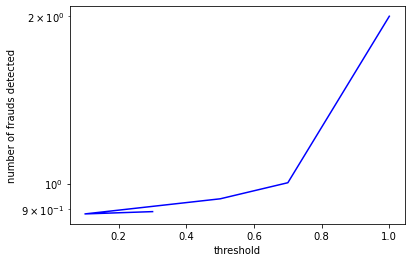

In [180]:
#plot the threshold vs number of detected frauds vs the number of real frauds
import matplotlib.pyplot as plt

#assign the values to plot
thresh, goal = thres_numberf()

plt.plot(thresh, goal, 'b-')
plt.xlabel('threshold')
plt.ylabel('number of frauds detected')

#save to csv
thresh_ratio = np.column_stack((thresh.flatten(), goal.flatten()))
np.savetxt('threshold_ratio.csv', thresh_ratio, goal, delimiter = ',')

#log scale
plt.yscale('log')

plt.show()

#plt.savefig()

In [ ]:
#---------------------------------------------------density matrix------------------------------------------------------------#

#product of the matrices
mproduct = np.matmul(m1, m2.T)
mproduct.shape

In [ ]:
#apply softmax to obtain a matrix with conditional probabilities
conditional_probs = softmax(mproduct)

In [ ]:
#save density matrix 

#option 1
#np.savetxt('3transfers_word2vec_matrix_originalcols_density_matrix.csv', conditional_probs, delimiter = ',')

#option 2
#pd.DataFrame(conditional_probs).to_csv("3transfers_word2vec_matrix_originalcols_density_matrix.csv", header = None)

In [ ]:
#confirm that softmax sum is 1
conditional_probs.sum()

In [ ]:
#maximum value of the conditional probabilities
np.max(conditional_probs)

In [ ]:
#minimum value of the conditional probabilities
np.min(conditional_probs)

In [ ]:
#visualize the 1st 10 lines and the last 10 lines of the density matrix

#1st 10 lines
conditional_aux = conditional_probs[:10].copy() 

#last 10 lines
conditional_aux = np.concatenate((conditional_aux, conditional_probs[-10:].copy())) 

#display setting
from IPython.core.display import HTML
display(HTML("<style>pre { white-space: pre !important; }</style>"))

In [ ]:
#shape of the compressed density matrix 
conditional_aux.shape

In [ ]:
#print the compressed conditional probabilities matrix
print('\n'.join(['\t'.join([str(cell) for cell in row]) for row in conditional_aux]))

In [ ]:
#-------------------------------------------------eigenvalues-----------------------------------------------------------------#

#eingenvalues of the square matrix before softmax (w has the eigenvalues and v the eigenvectors)
w, v = np.linalg.eig(mproduct)  #mproduct is an array of arrays

#separate real and imaginary parts of the eigenvalues
x = w.real  #array
                 
y = w.imag  #array

In [ ]:
#eigenvalues
w

In [ ]:
#eigenvalues plot for the several vector sizes - square of the numbers in mproduct (product of the matrices before softmax)  
import matplotlib.pyplot as plt

#plot complex numbers 
def plot_eigenvalues(model, vec_size):                        
    x_r = np.square(x)
    y_i = np.square(y)

    plt.plot(x_r, 'b-')
    plt.ylabel('Imaginary')
    plt.xlabel('Real')

    #plt.ylim(0, 250e6)
    #plt.xlim(0, 15)
    
    fig_name = "vec_size_" + vec_size + "_best_comb.png"  
    plt.savefig(fig_name)
    
    return x_r

In [ ]:
#train the model with the optimized parameters for different vector sizes  

#dictionary of results
result_dic = {}

#vector sizes to try
vec_sizes = [3, 4]

#train the model
for curr_vec in vec_sizes:
    curr_model = w2v.Word2Vec (
    sg = 1, #skip-gram 
    workers = multiprocessing.cpu_count(), #use all cores 
    vector_size = curr_vec, #dimension of the embedding space   
    window = 9, #words befores and after the center word
    sample = 0, #whithout subsampling 
    min_count = 1, #use every word
    negative = 5, #noise-words
    hs = 0, #negative sampling
    ns_exponent = 0, #exponent to shape negative sampling 
    alpha = 0.025, #initial learning rate
    min_alpha = 0.0001 #final learning rate 
    )

    #vocabulary creation
    model.build_vocab(sentences_series) 

    #model training
    model.train(sentences_series, epochs = 5, total_examples = model.corpus_count, compute_loss = True, callbacks = [callback()])
    
    #save results in the dictionary 
    result_dic[curr_vec_size] = plot_eigenvalues(curr_model, curr_vec)

In [ ]:
#option 1 - export result_dic and plot in excel
#convert the dictionary to dataframe
result_dic = pd.DataFrame(data = result_dic, index = [0])
result_dic = (result_dic.T)
result_dic.to_excel('3transfers_word2vec_matrix_originalcols_eingenvalues.xlsx')


#option 2 - plot result_dic with matplotlib
plt.plot(list(result_dic.keys()), list(result_dic.values()))
plt.legend(['3', '4'], loc = 'upper left')
plt.savefig('3transfers_word2vec_matrix_originalcols_eingenvalues.png')

In [ ]:
#------------------------------------------operations with word vectors-------------------------------------------------------#

#topn most similar words 
model.wv.most_similar('fraud')[:10]

#another alternative - same output
#model.wv.similar_by_word('fraud', topn = 10)

In [ ]:
#word from the word's list most similar to the 1st word given
model.wv.most_similar_to_given('c29814', ['windows', 'c29814'])

In [ ]:
#cosine similarity between two words
model.wv.similarity('nfraud', 'windows')

In [ ]:
#cosine similarity between two sets of words
model.wv.n_similarity(['pc', 'windows'], ['tablet', 'android'])

In [ ]:
#cosine similarities between one vector and a set of other vectors
c = np.array([0.15340006,  0.2575258 ,  0.94247705,  0.27604532, -0.5088184])
d = np.array([[ 0.15340006,  0.2575258 ,  0.94247705,  0.27604532, -0.5088185], 
             [ 0.15340006,  0.2575258 ,  0.94247705,  0.27604532, -0.5088186],
             [ 0.15340006,  0.2575258 ,  0.94247705,  0.27604532, -1.5088186]])

model.wv.cosine_similarities(c, d)

In [ ]:
#cosine distances from given word or vector to all words in other_words
#if other_words is empty it returns the distance between word_or_vectors and all words in vocab
model.wv.distances('pc', other_words = ('tablet', 'mobile'))

In [ ]:
#cosine distance between two words
model.wv.distance('nfraud', 'windows')

In [ ]:
#positive contribute positively towards the similarity and negative keys negatively
#cosine similarity
model.wv.most_similar(positive = ['pc', 'windows'], negative = ['android'])

In [ ]:
#topn most similar words using the multiplicative combination objective
#additional positive or negative examples contribute to the numerator or denominator respectively
#a single positive example is the same as most_similar()
model.wv.most_similar_cosmul(positive = ['pc', 'windows'], negative = ['android'])

In [ ]:
#relative cosine similarity between two words given topn similar words
#1st word - word for which we have to look topn similar word
#2nd word - word for which we are evaluating relative cosine similarity with the 1st word
model.wv.relative_cosine_similarity('windows', 'c29814')

In [ ]:
#word from the given list that doesn’t go with the others
model.wv.doesnt_match(['nbe', 'trfint', 'e3', 'r3', 'ntrusted', 'io4', 'id875448', 'ueabbl', 'pinka', 'ip17218224251', 
                       'nmobile', 'ntablet', 'pc', 'ntouch', 'nbot', 'chrome', 'windows', 'ncd1', 'nid2796', 'niod1', 'nidd0', 
                       'ctd690877', 'idtd-1', 'cdarbe', 'eyagbr', 'ncid1', 'nciod1', 'ncidd1', 'd20190814', 'h0', 'cfi1'])

In [ ]:
#topn most similar keys
#when topn is None the similarities for all words are returned as a one-dimensional numpy array with the size of the vocabulary
model.wv.similar_by_key('windows', topn = None)

In [ ]:
#topn most similar keys by vector
a = np.array([0.15340006,  0.2575258 ,  0.94247705,  0.27604532, -0.5088185])
model.wv.similar_by_vector(a, topn = None)

In [ ]:
#rank of the distance of word2 from word1 in relation to distances of all words from the word1
model.wv.rank('c29814','windows')

In [ ]:
#rank the given words by similarity to the centroid of all the words
model.wv.rank_by_centrality(['windows', 'c29814'])